# MAG Analysis for AR Water Age Project

In [1]:
# Libraries
library(phyloseq); packageVersion("phyloseq")
library(ggplot2); packageVersion("ggplot2")
library(tidyr)
library(ggpubr)
library(tidyverse)
library(dplyr)
library(tibble)
library(vegan); packageVersion("vegan")
library(scales)
library(repr)
library(reshape2)
library(genefilter)
library(microbiome)
library(VennDiagram)
library(svglite)
#library(gridExtra)
library(DESeq2); packageVersion("DESeq2")
library(stringr)
library(RColorBrewer)
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))
library('pheatmap')
library("viridis")
library(vegan)
# BiocManager::install("mia")
library(mia)

library(BiodiversityR) # also loads vegan
library(readxl)
library(ggsci)
library(ggrepel)
library(ggforce)

# install.packages("ggfortify")
library(ggfortify)
library(MASS)

# set.seed(1995)

library("DESeq2")
packageVersion("DESeq2")

# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")
# BiocManager::install("DESeq2")

library(googlesheets4)
library(googledrive)

set.seed(100)

[1] ‘1.38.0’

[1] ‘3.3.6’

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ readr   2.1.2     ✔ stringr 1.4.1
✔ purrr   0.3.4     ✔ forcats 0.5.2

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4



[1] ‘2.6.4’


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘genefilter’


The following object is masked from ‘package:readr’:

    spec



microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2021 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:scales’:

    alpha


The following object is masked from ‘package:vegan’:

    diversity


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


Loading required package: grid

Loading required package: futile.logger


Attaching package: ‘VennDiagram’


The following object is masked from ‘package:ggpubr’:

    rotate


L

[1] ‘1.34.0’

Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal


Loading required package: SingleCellExperiment

Loading required package: TreeSummarizedExperiment

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘XVector’


The following object is masked from ‘package:purrr’:

    compact



Attaching package: ‘Biostrings’


The following object is masked from ‘package:grid’:

    pattern


The following object is masked from ‘package:base’:

    strsplit


Loading required package: MultiAssayExperiment

Loading required package: tcltk

BiodiversityR 2.15-1: Use command BiodiversityRGUI() to launch the Graphical User Interface; 
to see changes use BiodiversityRGUI(changeLog=TRUE, backward.compatibility.messages=TRUE)



Attaching package: ‘MASS’


The following object is masked from ‘package:genefilter’:

    area


The following object is masked from ‘package:dp

[1] ‘1.34.0’


Attaching package: ‘googledrive’


The following objects are masked from ‘package:googlesheets4’:

    request_generate, request_make




In [2]:
# Papertheme 
papertheme <- function(ggplotobject){
  library(ggplot2)  
  ggplotnewobject <- ggplotobject + 
    theme(text = element_text(size = 14),
          axis.ticks.x = element_line(colour = "#696969",size=0.5), 
          axis.ticks.y =element_line(colour = "#696969",size=0.5),
          axis.ticks.length=unit(0.2,"cm"),
          panel.background = element_rect(fill = "white"),
          panel.grid.major=element_blank(),
          panel.grid.minor=element_blank(),
          axis.line.x  = element_blank(),
          axis.line.y  = element_blank(),
          plot.title = element_text(size = 16, family="sans", face="plain", colour = "#696969"),
          axis.text.x = element_text(size = 14,colour="#696969",family="sans"),
          axis.text.y = element_text(size = 14,colour="#696969",family="sans"),
          axis.title.x = element_text(size =16,color="#696969",family="sans"),
          axis.title.y = element_text(size=16,color="#696969",family="sans"),
          strip.text.x = element_text(size = 14),
          legend.key = element_blank(),
          legend.text = element_text(size=12,family="sans", color="#696969"),
          legend.title=element_text(size=13,family="sans", color="#696969", face = "bold"),
          strip.background = element_blank(),
          axis.line=element_blank(),
          panel.border = element_rect(colour = "#696969",size=0.5, fill = "transparent"),
          plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm"))+
    guides(shape = guide_legend(override.aes = list(size = 1.5)),
           color = guide_legend(override.aes = list(size = 1.5))) +
    theme(legend.title = element_text(size = 14), 
          legend.text  = element_text(size = 14),
          legend.key.size = unit(1, "lines"))
  return(ggplotnewobject)}

# High resolution for export
dpi <- 300

In [3]:
# Colour palette
values <- brewer.pal(11, "RdYlBu")

# Randomize colours for visibility
colors2 <- sample(colorRampPalette(brewer.pal(11, "RdYlBu"))(27))
values2 <- sample(colorRampPalette(brewer.pal(11, "RdYlBu"))(10))

# Colour selection for when colouring according to location
# In order = c("Tertiary_WW", "BAC","MF", "RO_biofilm_feed","RO_biofilm_permeate" ,"RO")
locations_colors <- c(values[1],values[11],values[3],values[10],values[4],values[5],values[2],values[6])
palette(c(values[1],values[11],values[3],values[10],values[4],values[5],values[2],values[6]))

# Colour selection for when colouring according to location
# In order = c("Tertiary_WW", "BAC","MF", "RO")
locations_colors_bulk <- c(values[1],values[11],values[3],values[5],values[2],values[6])

# General colour set PhD
colors3 <- c("#BF0000","#fdc5bc","#0b5394","#feb803","#fffac9","#3f7ead","#104c7a","#afdbee","#f7d7b7","#e06666",
             "#9fc5e8", "#b01414","#c06401","#ffe399","#600808","#faf0e5","#e6c2c2","#e4f2ff","#ffc79d","#e87803",
             #"#999999","#eeeeee","#bcbcbc","#5b5b5b", #16-20 rearrange, 31 change from grey
             #nice set until here - others are extra
            "#4d3434", "#cb8989","#fecfcf", "#dfd2c9","#f46d43","#ffcdaa","#EA8484","#dfd2c9","#525564","#aa4f4b",
             "#0c4973","#f46d43","#313695","#fee090","#4575b4","#96c0ce", "#fdae61","#c25b56","#ffc6c6","#525564",
             "#fecfcf","#a4d1fb","#999999", "#dfd2c9","#c25b56","#313695","#D73027","#313695","#FEE090","#F46D43",
             "#E4DFB6","#858585","#B78A8A","#d7eff5", "#CE6924","#2B2F7D","#FEF6EB","#a50026", "#74828f") 

na.color <- "#fef6eb"

In [4]:
fig_dir <- '/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/AR_metagenomics/figures/'

# Read files and make table

In [5]:
# Path
path <- c('/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/AR_metagenomics/')

#read in table created in python
coverage_df <- read_delim( "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/AR_metagenomics/MAGs/mean_coverage.txt", delim = "\t", col_names = TRUE) 
detection_df <- read_delim( "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/AR_metagenomics/detection.txt", delim = "\t", col_names = TRUE) 
bin_info <- read_delim( "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/AR_metagenomics/MAGs/bins_summary.txt", delim = "\t", col_names = TRUE) 

#add in taxonomy for missing bin
bin_info$t_phylum[bin_info$bins == "ARSTAG_ARBF_2_post_bin_29_1"] <- "Acidobacteriota"
bin_info$t_class[bin_info$bins == "ARSTAG_ARBF_2_post_bin_29_1"] <- "Acidobacteriae"
bin_info$t_order[bin_info$bins == "ARSTAG_ARBF_2_post_bin_29_1"] <- "Bryobacterales"
bin_info$t_family[bin_info$bins == "ARSTAG_ARBF_2_post_bin_29_1"] <- "Bryobacteraceae"

# import csv with bins and modules
kegg_df <- read_delim( "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/AR_metagenomics/kegg-metabolism_modules.txt", delim = "\t", col_names = TRUE) 
# head(kegg_df)

#import metagenomics quality table, by sample
quality_samp <- read_delim('/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/AR_metagenomics/figures/sample_quality_table_postderep.csv', delim = ",", col_names = TRUE)


Rows: 90 Columns: 39
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): bins
dbl (38): ARSTAG_AR_1_23, ARSTAG_AR_1_27, ARSTAG_AR_1_40, ARSTAG_AR_1_41, AR...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 90 Columns: 39
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): bins
dbl (38): ARSTAG_AR_1_23, ARSTAG_AR_1_27, ARSTAG_AR_1_40, ARSTAG_AR_1_41, AR...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 90 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (8): bins, t_domain, t_phylum, t_class, t_order, t_family, t_genus, t_sp...
dbl (6): total_length, num_contigs, N50, GC_content, percent_compl

In [6]:
# Set a threshold of 1x coverage over 50% of the genome (50% detection)

coverage_df[detection_df < 0.5] <- 0
coverage_df

bins                                   ARSTAG_AR_1_23 ARSTAG_AR_1_27
1  ARSTAG_ARBF_12345_pre_bin_16_2           7.768991       6.640341    
2  ARSTAG_ARBF_12345_pre_bin_26             1.695019       3.043916    
3  ARSTAG_ARBF_12345_pre_bin_2_2           25.961168      12.997640    
4  ARSTAG_ARBF_12345_pre_bin_30             0.000000       0.000000    
5  ARSTAG_ARBF_12345_pre_bin_40_2           1.797642       0.000000    
6  ARSTAG_ARBF_12345_pre_bin_4_1           48.320489      11.079160    
7  ARSTAG_ARBF_12345_pre_bin_nitr_1         0.000000       0.000000    
8  ARSTAG_ARBF_1_post_bin_10                0.000000       0.000000    
9  ARSTAG_ARBF_1_post_bin_18_1              0.000000       0.000000    
10 ARSTAG_ARBF_1_post_bin_26_2              0.000000       0.000000    
11 ARSTAG_ARBF_1_post_bin_27                0.000000       0.000000    
12 ARSTAG_ARBF_1_post_bin_2_3              20.358959      14.128886    
13 ARSTAG_ARBF_1_post_bin_3                 0.000000       0.000000    
14 ARSTAG_ARBF_1_post_bin_31_1              0.000000       0.000000    
15 ARSTAG_ARBF_1_post_bin_36_2              2.659808      75.340476    
16 ARSTAG_ARBF_1_post_bin_mycob_7         127.496674     162.499956    
17 ARSTAG_ARBF_2_post_bin_13_1              0.000000       0.000000    
18 ARSTAG_ARBF_2_post_bin_13_2              0.000000       0.000000    
19 ARSTAG_ARBF_2_post_bin_16_2             91.164301     237.153730    
20 ARSTAG_ARBF_2_post_bin_29_1              0.000000       0.000000    
21 ARSTAG_ARBF_2_post_bin_31_2              0.000000       0.000000    
22 ARSTAG_ARBF_2_post_bin_3_2               0.000000       0.000000    
23 ARSTAG_ARBF_2_post_bin_43_1              0.000000       0.000000    
24 ARSTAG_ARBF_2_post_bin_5_1               9.396507       6.709146    
25 ARSTAG_ARBF_2_post_bin_8_1               0.000000       0.000000    
26 ARSTAG_ARBF_3_post_bin_1                 0.000000       0.000000    
27 ARSTAG_ARBF_3_post_bin_30_2              0.000000       0.000000    
28 ARSTAG_ARBF_3_post_bin_38_2              1.222189       4.970368    
29 ARSTAG_ARBF_3_post_bin_43_4              0.000000       0.000000    
30 ARSTAG_ARBF_3_post_bin_44_4             24.176673      22.173144    
⋮  ⋮                                      ⋮              ⋮             
61 ARSTAG_CONTROL_MOCK1E10_111821_bin_1   0.000000       0.000000      
62 ARSTAG_CONTROL_MOCK1E10_111821_bin_1_2 0.000000       0.000000      
63 ARSTAG_CONTROL_MOCK1E10_111821_bin_3   0.000000       0.000000      
64 ARSTAG_CONTROL_MOCK1E8_111821_bin_0    0.000000       0.000000      
65 ARSTAG_CONTROL_MOCK1E8_111821_bin_1    0.000000       0.000000      
66 ARSTAG_CONTROL_MOCK1E8_111821_bin_9    0.000000       0.000000      
67 ARSTAG_TAPRES_TAPRES_23_bin_11         0.000000       0.000000      
68 ARSTAG_TAPRES_TAPRES_23_bin_31_4       0.000000       0.000000      
69 ARSTAG_TAPRES_TAPRES_23_bin_40_1       0.000000       0.000000      
70 ARSTAG_TAPRES_TAPRES_23_bin_8_1        2.489865       1.576244      
71 ARSTAG_TAPRES_TAPRES_23_bin_mycob_1_3  0.000000       0.000000      
72 ARSTAG_TAPRES_TAPRES_23_bin_unknown_1  0.000000       0.000000      
73 ARSTAG_TAPRES_TAPRES_40_bin_11         0.000000       0.000000      
74 ARSTAG_TAPRES_TAPRES_40_bin_13_3       1.810426       1.690935      
75 ARSTAG_TAPRES_TAPRES_40_bin_1_5        0.000000       0.000000      
76 ARSTAG_TAPRES_TAPRES_40_bin_29_1       0.000000       0.000000      
77 ARSTAG_TAPRES_TAPRES_40_bin_33_1       1.151734       0.000000      
78 ARSTAG_TAPRES_TAPRES_40_bin_35_2       0.000000       0.000000      
79 ARSTAG_TAPRES_TAPRES_41_bin_0_1        0.000000       0.000000      
80 ARSTAG_TAPRES_TAPRES_41_bin_0_4        0.000000       0.000000      
81 ARSTAG_TAPRES_TAPRES_41_bin_1          0.000000       0.000000      
82 ARSTAG_TAPRES_TAPRES_41_bin_21_1       0.000000       0.000000      
83 ARSTAG_TAPRES_TAPRES_41_bin_21_2       0.000000       0.000000      
84 ARSTAG_TAPRES_TAPRES_41_bin_21_3       0

In [7]:
#metadata from google sheets
drive_auth(path="/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/AR-Water-Quality-Data/access-to-jupyter-21919fd4c701.json", cache=TRUE)
gs4_auth(path="/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/AR-Water-Quality-Data/access-to-jupyter-21919fd4c701.json")

#import dfs 
master_sampling <- drive_get("AR MasterDataSheet") 
id2code <- master_sampling %>% read_sheet(sheet= "ggkbase_names")
kegg_modules <- master_sampling %>% read_sheet(sheet= "kegg_modules")
bin_renames <- master_sampling %>% read_sheet(sheet= "bin_names")
# arbf <- master_sampling %>% read_sheet(sheet= "ARBF_data") %>% subset(replicate == 'A')
arbf<- read_delim( "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/AR_metagenomics/arbf_polished.csv", delim = ",", col_names = TRUE) %>% subset(replicate == 'A')



✔ The input `path` resolved to exactly 1 file.

✔ Reading from AR MasterDataSheet.

✔ Range ''ggkbase_names''.

✔ Reading from AR MasterDataSheet.

✔ Range ''kegg_modules''.

✔ Reading from AR MasterDataSheet.

✔ Range ''bin_names''.

Rows: 340 Columns: 89
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): sample_id, ARBF, type, sample_id_old, AR_num, AR, replicate, extr_...
dbl (76): day, month_date, sample_date, sampling_week, phase, sampling_event...
lgl  (4): ICC_cells.mL, TCC_cells.mL, 8/27/2019, 9/30/2019

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Normalize coverage df

In [8]:
# normalize to calculate relative abundance based on the sum of coverages in each sample

# we first remove the id columns since they aren't numerical, then merge them back on afterward
coverage_matrix <- coverage_df %>% dplyr::select(-bins)

#normalize by total coverage of each sample to get percent abundance
perc_coverage_df <- 100*sweep(coverage_matrix,2,colSums(coverage_matrix),`/`)
# colSums(m)




In [9]:
#Account for the unbinned reads, add a "bin" for "unbinned" reads to deflate the other coverages
quality_samp <- quality_samp %>% mutate(frac_reads_mapped_to_drep_genomes = percent_reads_mapped_to_drep_genomes/ 100, frac_reads_unmapped = 1- frac_reads_mapped_to_drep_genomes)
unmapped_row <- t(quality_samp$frac_reads_unmapped*100)
colnames(unmapped_row) <- quality_samp$sample_id
# quality_samp
perc_coverage_df_unbin <- sweep(perc_coverage_df,2,quality_samp$frac_reads_mapped_to_drep_genomes ,`*`)
perc_coverage_df_unbin <- rbind(perc_coverage_df_unbin, unmapped_row)
perc_coverage_df_unbin



ARSTAG_AR_1_23 ARSTAG_AR_1_27 ARSTAG_AR_1_40 ARSTAG_AR_1_41 ARSTAG_AR_2_23
1   0.61312673     0.5401821      0.00000000     0.00000000    3.7907520     
2   0.13377044     0.2476181      0.00000000     0.00000000    0.0000000     
3   2.04884853     1.0573392      0.27755015     0.19424163    0.0000000     
4   0.00000000     0.0000000      0.00000000     0.00000000    1.2281239     
5   0.14186946     0.0000000      0.00000000     0.00000000    3.0565669     
6   3.81344023     0.9012737      0.46161660     0.29153371    0.7889077     
7   0.00000000     0.0000000      0.00000000     0.00000000    0.0000000     
8   0.00000000     0.0000000      0.06894863     0.09075877    0.0000000     
9   0.00000000     0.0000000      0.06457755     0.09040529    0.0000000     
10  0.00000000     0.0000000      1.07664442     3.40159926    0.2618627     
11  0.00000000     0.0000000      0.00000000     0.27281697    0.0000000     
12  1.60672369     1.1493645      0.44104903     0.86453701    0.5882280     
13  0.00000000     0.0000000      0.16183415     0.27659260    0.0000000     
14  0.00000000     0.0000000      0.17280500     0.29841282    0.0000000     
15  0.20991132     6.1288388     54.16489597    20.52775358    3.4896279     
16 10.06200391    13.2191366      3.09365775     2.54623080    1.0555551     
17  0.00000000     0.0000000      0.00000000     0.52615873    0.0000000     
18  0.00000000     0.0000000      0.00000000     0.33773555    0.0000000     
19  7.19466262    19.2921132      8.67397513    18.17444345    4.9025526     
20  0.00000000     0.0000000      0.40650420     0.64529599    0.0000000     
21  0.00000000     0.0000000      0.00000000     0.00000000    0.0000000     
22  0.00000000     0.0000000      0.00000000     0.00000000    0.0000000     
23  0.00000000     0.0000000      0.52259114     0.42581513    0.0000000     
24  0.74156987     0.5457794      0.00000000     0.00000000    2.8455134     
25  0.00000000     0.0000000      0.00000000     0.00000000    0.0000000     
26  0.00000000     0.0000000      0.00000000     1.09528982    0.0000000     
27  0.00000000     0.0000000      0.00000000     0.00000000    0.0000000     
28  0.09645481     0.4043323      0.08007322     0.12569354    0.3866333     
29  0.00000000     0.0000000      0.17659221     4.06145137    0.0000000     
30  1.90801665     1.8037532      0.10549517     0.18145933    0.1935356     
⋮  ⋮              ⋮              ⋮              ⋮              ⋮             
62  0.00000000     0.0000000      0.0000000      0.000000       0.00000000   
63  0.00000000     0.0000000      0.0000000      0.000000       0.00000000   
64  0.00000000     0.0000000      0.0000000      0.000000       0.00000000   
65  0.00000000     0.0000000      0.0000000      0.000000       0.00000000   
66  0.00000000     0.0000000      0.0000000      0.000000       0.00000000   
67  0.00000000     0.0000000      0.0000000      0.000000       0.00000000   
68  0.00000000     0.0000000      0.0000000      0.000000       0.00000000   
69  0.00000000     0.0000000      0.0000000      0.000000       0.00000000   
70  0.19649949     0.1282252      0.0000000      0.000000       0.07786476   
71  0.00000000     0.0000000      0.0000000      0.000000       0.00000000   
72  0.00000000     0.0000000      0.0000000      0.000000       0.00000000   
73  0.00000000     0.0000000      0.0000000      0.000000       0.00000000   
74  0.14287830     0.1375551      0.0000000      0.000000       0.07582996   
75  0.00000000     0.0000000      0.0000000      0.000000       0.00000000   
76  0.00000000     0.0000000      0.0000000      0.000000       0.00000000   
77  0.09089455     0.0000000      0.0000000      0.000000       0.05288211   
78  0.00000000     0.0000000      0.0000000      0.000000       0.00000000   
79  0.00000000     0.0000000      0.0000000      0.000000       0.00000000   
80  0.00000000     0.0000000      0.0000000      0.000000       0.00000000   
81  0.00000000     0.0000

In [10]:
#add back the bins column
perc_coverage_df["bins"] <- coverage_df$bins
perc_coverage_df_unbin["bins"] <- c(coverage_df$bins, "unbinned")

#add in taxonomy information
tax_coverage_df <- merge(bin_info, perc_coverage_df, by= "bins", all=T)
tax_coverage_df_unbin <- merge(bin_info, perc_coverage_df_unbin, by= "bins", all=T)


### Create Legible Bin Names

In [11]:
# Create column for short bin taxonomy name in tax_coverage_df and tax_coverage_df_unbin

tax_coverage_df <- merge(bin_renames, tax_coverage_df, by= "bins", all=T)
tax_coverage_df_unbin <- merge(bin_renames, tax_coverage_df_unbin, by= "bins", all=T)
tax_coverage_df_unbin$bin_tax_name[tax_coverage_df_unbin$bins == "unbinned"]<- "Unbinned"



In [12]:
# Add legible names to bin info
# bin_name_df <- tax_coverage_df %>% dplyr::select(bins, bin_tax_name)
bin_info <- merge(bin_info, bin_renames, by= "bins")

In [13]:
#change sample_id to match updated names (swap sample event for sampling day)
coverage_df <- coverage_df %>% dplyr::rename(AR2_134=ARSTAG_AR_2_23, AR3_134=ARSTAG_AR_3_23, AR4_134=ARSTAG_AR_4_23, AR5_134=ARSTAG_AR_5_23, 
                                             AR3_162=ARSTAG_AR_3_27, AR4_162=ARSTAG_AR_4_27, AR5_162=ARSTAG_AR_5_27, AR1_372=ARSTAG_AR_1_40,
                                            AR2_372=ARSTAG_AR_2_40, AR3_372=ARSTAG_AR_3_40, AR4_372=ARSTAG_AR_4_40, AR5_372=ARSTAG_AR_5_40,
                                            BF1_372=ARSTAG_BF_1_40, BF2_372=ARSTAG_BF_2_40, BF3_372=ARSTAG_BF_3_40, BF4_372=ARSTAG_BF_4_40, BF5_372=ARSTAG_BF_5_40,
                                            AR1_387=ARSTAG_AR_1_41, AR2_387=ARSTAG_AR_2_41, AR3_387=ARSTAG_AR_3_41, AR4_387=ARSTAG_AR_4_41, AR5_387=ARSTAG_AR_5_41, 
                                            BF1_387=ARSTAG_BF_1_41, BF2_387=ARSTAG_BF_2_41, BF3_387=ARSTAG_BF_3_41, BF4_387=ARSTAG_BF_4_41, BF5_387=ARSTAG_BF_5_41,
                                            tapres_134= ARSTAG_TAPRES_TAPRES_23, tapres_162= ARSTAG_TAPRES_TAPRES_27, tapres_372= ARSTAG_TAPRES_TAPRES_40, tapres_387= ARSTAG_TAPRES_TAPRES_41, 
                                             AR1_134=ARSTAG_AR_1_23, AR1_162=ARSTAG_AR_1_27, AR2_162=ARSTAG_AR_2_27,
                                            slidecontrol_387= ARSTAG_CONTROL_BFSLIDECONTROL_41, manifcontrol_387=ARSTAG_CONTROL_MANIFB_41, control_mock1e10= ARSTAG_CONTROL_MOCK1E10_111821,control_mock1e8=ARSTAG_CONTROL_MOCK1E8_111821) 

tax_coverage_df <- tax_coverage_df %>% dplyr::rename(AR2_134=ARSTAG_AR_2_23, AR3_134=ARSTAG_AR_3_23, AR4_134=ARSTAG_AR_4_23, AR5_134=ARSTAG_AR_5_23, 
                                             AR3_162=ARSTAG_AR_3_27, AR4_162=ARSTAG_AR_4_27, AR5_162=ARSTAG_AR_5_27, AR1_372=ARSTAG_AR_1_40,
                                            AR2_372=ARSTAG_AR_2_40, AR3_372=ARSTAG_AR_3_40, AR4_372=ARSTAG_AR_4_40, AR5_372=ARSTAG_AR_5_40,
                                            BF1_372=ARSTAG_BF_1_40, BF2_372=ARSTAG_BF_2_40, BF3_372=ARSTAG_BF_3_40, BF4_372=ARSTAG_BF_4_40, BF5_372=ARSTAG_BF_5_40,
                                            AR1_387=ARSTAG_AR_1_41, AR2_387=ARSTAG_AR_2_41, AR3_387=ARSTAG_AR_3_41, AR4_387=ARSTAG_AR_4_41, AR5_387=ARSTAG_AR_5_41, 
                                            BF1_387=ARSTAG_BF_1_41, BF2_387=ARSTAG_BF_2_41, BF3_387=ARSTAG_BF_3_41, BF4_387=ARSTAG_BF_4_41, BF5_387=ARSTAG_BF_5_41,
                                            tapres_134= ARSTAG_TAPRES_TAPRES_23, tapres_162= ARSTAG_TAPRES_TAPRES_27, tapres_372= ARSTAG_TAPRES_TAPRES_40, tapres_387= ARSTAG_TAPRES_TAPRES_41, 
                                             AR1_134=ARSTAG_AR_1_23, AR1_162=ARSTAG_AR_1_27, AR2_162=ARSTAG_AR_2_27, slidecontrol_387= ARSTAG_CONTROL_BFSLIDECONTROL_41, manifcontrol_387=ARSTAG_CONTROL_MANIFB_41, control_mock1e10= ARSTAG_CONTROL_MOCK1E10_111821,control_mock1e8=ARSTAG_CONTROL_MOCK1E8_111821) 


tax_coverage_df_unbin<- tax_coverage_df_unbin %>% dplyr::rename(AR2_134=ARSTAG_AR_2_23, AR3_134=ARSTAG_AR_3_23, AR4_134=ARSTAG_AR_4_23, AR5_134=ARSTAG_AR_5_23, 
                                             AR3_162=ARSTAG_AR_3_27, AR4_162=ARSTAG_AR_4_27, AR5_162=ARSTAG_AR_5_27, AR1_372=ARSTAG_AR_1_40,
                                            AR2_372=ARSTAG_AR_2_40, AR3_372=ARSTAG_AR_3_40, AR4_372=ARSTAG_AR_4_40, AR5_372=ARSTAG_AR_5_40,
                                            BF1_372=ARSTAG_BF_1_40, BF2_372=ARSTAG_BF_2_40, BF3_372=ARSTAG_BF_3_40, BF4_372=ARSTAG_BF_4_40, BF5_372=ARSTAG_BF_5_40,
                                            AR1_387=ARSTAG_AR_1_41, AR2_387=ARSTAG_AR_2_41, AR3_387=ARSTAG_AR_3_41, AR4_387=ARSTAG_AR_4_41, AR5_387=ARSTAG_AR_5_41, 
                                            BF1_387=ARSTAG_BF_1_41, BF2_387=ARSTAG_BF_2_41, BF3_387=ARSTAG_BF_3_41, BF4_387=ARSTAG_BF_4_41, BF5_387=ARSTAG_BF_5_41,
                                            tapres_134= ARSTAG_TAPRES_TAPRES_23, tapres_162= ARSTAG_TAPRES_TAPRES_27, tapres_372= ARSTAG_TAPRES_TAPRES_40, tapres_387= ARSTAG_TAPRES_TAPRES_41, 
                                             AR1_134=ARSTAG_AR_1_23, AR1_162=ARSTAG_AR_1_27, AR2_162=ARSTAG_AR_2_27, slidecontrol_387= ARSTAG_CONTROL_BFSLIDECONTROL_41, manifcontrol_387=ARSTAG_CONTROL_MANIFB_41, control_mock1e10= ARSTAG_CONTROL_MOCK1E10_111821,control_mock1e8=ARSTAG_CONTROL_MOCK1E8_111821) 


perc_coverage_df<- perc_coverage_df %>% dplyr::rename(AR2_134=ARSTAG_AR_2_23, AR3_134=ARSTAG_AR_3_23, AR4_134=ARSTAG_AR_4_23, AR5_134=ARSTAG_AR_5_23, 
                                             AR3_162=ARSTAG_AR_3_27, AR4_162=ARSTAG_AR_4_27, AR5_162=ARSTAG_AR_5_27, AR1_372=ARSTAG_AR_1_40,
                                            AR2_372=ARSTAG_AR_2_40, AR3_372=ARSTAG_AR_3_40, AR4_372=ARSTAG_AR_4_40, AR5_372=ARSTAG_AR_5_40,
                                            BF1_372=ARSTAG_BF_1_40, BF2_372=ARSTAG_BF_2_40, BF3_372=ARSTAG_BF_3_40, BF4_372=ARSTAG_BF_4_40, BF5_372=ARSTAG_BF_5_40,
                                            AR1_387=ARSTAG_AR_1_41, AR2_387=ARSTAG_AR_2_41, AR3_387=ARSTAG_AR_3_41, AR4_387=ARSTAG_AR_4_41, AR5_387=ARSTAG_AR_5_41, 
                                            BF1_387=ARSTAG_BF_1_41, BF2_387=ARSTAG_BF_2_41, BF3_387=ARSTAG_BF_3_41, BF4_387=ARSTAG_BF_4_41, BF5_387=ARSTAG_BF_5_41,
                                            tapres_134= ARSTAG_TAPRES_TAPRES_23, tapres_162= ARSTAG_TAPRES_TAPRES_27, tapres_372= ARSTAG_TAPRES_TAPRES_40, tapres_387= ARSTAG_TAPRES_TAPRES_41, 
                                             AR1_134=ARSTAG_AR_1_23, AR1_162=ARSTAG_AR_1_27, AR2_162=ARSTAG_AR_2_27, slidecontrol_387= ARSTAG_CONTROL_BFSLIDECONTROL_41, manifcontrol_387=ARSTAG_CONTROL_MANIFB_41, control_mock1e10= ARSTAG_CONTROL_MOCK1E10_111821,control_mock1e8=ARSTAG_CONTROL_MOCK1E8_111821) 


perc_coverage_df_unbin<- perc_coverage_df_unbin %>% dplyr::rename(AR2_134=ARSTAG_AR_2_23, AR3_134=ARSTAG_AR_3_23, AR4_134=ARSTAG_AR_4_23, AR5_134=ARSTAG_AR_5_23, 
                                             AR3_162=ARSTAG_AR_3_27, AR4_162=ARSTAG_AR_4_27, AR5_162=ARSTAG_AR_5_27, AR1_372=ARSTAG_AR_1_40,
                                            AR2_372=ARSTAG_AR_2_40, AR3_372=ARSTAG_AR_3_40, AR4_372=ARSTAG_AR_4_40, AR5_372=ARSTAG_AR_5_40,
                                            BF1_372=ARSTAG_BF_1_40, BF2_372=ARSTAG_BF_2_40, BF3_372=ARSTAG_BF_3_40, BF4_372=ARSTAG_BF_4_40, BF5_372=ARSTAG_BF_5_40,
                                            AR1_387=ARSTAG_AR_1_41, AR2_387=ARSTAG_AR_2_41, AR3_387=ARSTAG_AR_3_41, AR4_387=ARSTAG_AR_4_41, AR5_387=ARSTAG_AR_5_41, 
                                            BF1_387=ARSTAG_BF_1_41, BF2_387=ARSTAG_BF_2_41, BF3_387=ARSTAG_BF_3_41, BF4_387=ARSTAG_BF_4_41, BF5_387=ARSTAG_BF_5_41,
                                            tapres_134= ARSTAG_TAPRES_TAPRES_23, tapres_162= ARSTAG_TAPRES_TAPRES_27, tapres_372= ARSTAG_TAPRES_TAPRES_40, tapres_387= ARSTAG_TAPRES_TAPRES_41, 
                                             AR1_134=ARSTAG_AR_1_23, AR1_162=ARSTAG_AR_1_27, AR2_162=ARSTAG_AR_2_27, slidecontrol_387= ARSTAG_CONTROL_BFSLIDECONTROL_41, manifcontrol_387=ARSTAG_CONTROL_MANIFB_41, control_mock1e10= ARSTAG_CONTROL_MOCK1E10_111821,control_mock1e8=ARSTAG_CONTROL_MOCK1E8_111821) 
 



In [14]:
#sample_ids (UPDATE)
ids_old <- c('ARSTAG_TAPRES_TAPRES_23', 'ARSTAG_AR_1_23', 'ARSTAG_AR_2_23', 'ARSTAG_AR_3_23', 'ARSTAG_AR_4_23', 'ARSTAG_AR_5_23', 
             'ARSTAG_TAPRES_TAPRES_27', 'ARSTAG_AR_1_27','ARSTAG_AR_2_27','ARSTAG_AR_3_27','ARSTAG_AR_4_27','ARSTAG_AR_5_27',
             'ARSTAG_TAPRES_TAPRES_40', 'ARSTAG_AR_1_40', 'ARSTAG_AR_2_40', 'ARSTAG_AR_3_40', 'ARSTAG_AR_4_40', 'ARSTAG_AR_5_40',
            'ARSTAG_BF_1_40', 'ARSTAG_BF_2_40', 'ARSTAG_BF_3_40', 'ARSTAG_BF_4_40', 'ARSTAG_BF_5_40',
            'ARSTAG_TAPRES_TAPRES_41', 'ARSTAG_AR_1_41', 'ARSTAG_AR_2_41', 'ARSTAG_AR_3_41', 'ARSTAG_AR_4_41', 'ARSTAG_AR_5_41',
            'ARSTAG_BF_1_41','ARSTAG_BF_2_41', 'ARSTAG_BF_3_41', 'ARSTAG_BF_4_41', 'ARSTAG_BF_5_41',
             'ARSTAG_CONTROL_BFSLIDECONTROL_41', 'ARSTAG_CONTROL_MANIFB_41', 'ARSTAG_CONTROL_MOCK1E10_111821','ARSTAG_CONTROL_MOCK1E8_111821')

ids <- c('tapres_134','AR1_134','AR2_134','AR3_134','AR4_134','AR5_134' ,
         'tapres_162', 'AR1_162','AR2_162','AR3_162','AR4_162','AR5_162',
         'tapres_372','AR1_372','AR2_372','AR3_372','AR4_372','AR5_372','BF1_372','BF2_372','BF3_372','BF4_372','BF5_372',
         'tapres_387','AR1_387','AR2_387','AR3_387','AR4_387','AR5_387','BF1_387','BF2_387','BF3_387','BF4_387','BF5_387',
         'control_mock1e10','control_mock1e8','manifcontrol_387','slidecontrol_387')

In [15]:
# melt data to long format for plotting
tax_coverage_df_long <- pivot_longer(tax_coverage_df,
                        cols = all_of(ids), names_to = 'sample_id', values_to = 'coverage')
tax_coverage_df_long['log_cov'] = log10(tax_coverage_df_long$coverage)

#also for one with unbinned
tax_coverage_df_long_unbin <- pivot_longer(tax_coverage_df_unbin,
                        cols = all_of(ids), names_to = 'sample_id', values_to = 'coverage')
tax_coverage_df_long_unbin['log_cov'] = log10(tax_coverage_df_long_unbin$coverage)



In [16]:
#check that normalization worked correctly (each sample should sum to 100)
tax_coverage_df_long %>% group_by(sample_id) %>% dplyr::summarise(coverage_total=sum(coverage)) %>% ungroup()
tax_coverage_df_long_unbin %>% group_by(sample_id) %>% dplyr::summarise(coverage_total=sum(coverage)) %>% ungroup()

sample_id        coverage_total
1  AR1_134          100           
2  AR1_162          100           
3  AR1_372          100           
4  AR1_387          100           
5  AR2_134          100           
6  AR2_162          100           
7  AR2_372          100           
8  AR2_387          100           
9  AR3_134          100           
10 AR3_162          100           
11 AR3_372          100           
12 AR3_387          100           
13 AR4_134          100           
14 AR4_162          100           
15 AR4_372          100           
16 AR4_387          100           
17 AR5_134          100           
18 AR5_162          100           
19 AR5_372          100           
20 AR5_387          100           
21 BF1_372          100           
22 BF1_387          100           
23 BF2_372          100           
24 BF2_387          100           
25 BF3_372          100           
26 BF3_387          100           
27 BF4_372          100           
28 BF4_387          100           
29 BF5_372          100           
30 BF5_387          100           
31 control_mock1e10 100           
32 control_mock1e8  100           
33 manifcontrol_387 NaN           
34 slidecontrol_387 100           
35 tapres_134       100           
36 tapres_162       100           
37 tapres_372       100           
38 tapres_387       100

sample_id        coverage_total
1  AR1_134          100           
2  AR1_162          100           
3  AR1_372          100           
4  AR1_387          100           
5  AR2_134          100           
6  AR2_162          100           
7  AR2_372          100           
8  AR2_387          100           
9  AR3_134          100           
10 AR3_162          100           
11 AR3_372          100           
12 AR3_387          100           
13 AR4_134          100           
14 AR4_162          100           
15 AR4_372          100           
16 AR4_387          100           
17 AR5_134          100           
18 AR5_162          100           
19 AR5_372          100           
20 AR5_387          100           
21 BF1_372          100           
22 BF1_387          100           
23 BF2_372          100           
24 BF2_387          100           
25 BF3_372          100           
26 BF3_387          100           
27 BF4_372          100           
28 BF4_387          100           
29 BF5_372          100           
30 BF5_387          100           
31 control_mock1e10 100           
32 control_mock1e8  100           
33 manifcontrol_387 NaN           
34 slidecontrol_387 100           
35 tapres_134       100           
36 tapres_162       100           
37 tapres_372       100           
38 tapres_387       100

# Diversity

In [17]:
#Number of dereplicated bins = 90
length(unique(bin_info$bins))
unique(bin_info$bins) #6 are from mock positive control, Burkholderia_1 only appears in slide control
# coverage_df

# 90 total derep bins but 83 were detected in samples (others were from controls)

[1] 90

[1] "ARSTAG_AR_4_27_bin_23_1"                    
 [2] "ARSTAG_AR_4_27_bin_26_4"                    
 [3] "ARSTAG_AR_4_27_bin_3_2"                     
 [4] "ARSTAG_AR_4_27_bin_5_5"                     
 [5] "ARSTAG_ARBF_1_post_bin_10"                  
 [6] "ARSTAG_ARBF_1_post_bin_18_1"                
 [7] "ARSTAG_ARBF_1_post_bin_2_3"                 
 [8] "ARSTAG_ARBF_1_post_bin_26_2"                
 [9] "ARSTAG_ARBF_1_post_bin_27"                  
[10] "ARSTAG_ARBF_1_post_bin_3"                   
[11] "ARSTAG_ARBF_1_post_bin_31_1"                
[12] "ARSTAG_ARBF_1_post_bin_36_2"                
[13] "ARSTAG_ARBF_1_post_bin_mycob_7"             
[14] "ARSTAG_ARBF_12345_pre_bin_16_2"             
[15] "ARSTAG_ARBF_12345_pre_bin_2_2"              
[16] "ARSTAG_ARBF_12345_pre_bin_26"               
[17] "ARSTAG_ARBF_12345_pre_bin_30"               
[18] "ARSTAG_ARBF_12345_pre_bin_4_1"              
[19] "ARSTAG_ARBF_12345_pre_bin_40_2"             
[20] "ARSTAG_ARBF_12345_pre_bin_nitr_1"           
[21] "ARSTAG_ARBF_2_post_bin_13_1"                
[22] "ARSTAG_ARBF_2_post_bin_13_2"                
[23] "ARSTAG_ARBF_2_post_bin_16_2"                
[24] "ARSTAG_ARBF_2_post_bin_29_1"                
[25] "ARSTAG_ARBF_2_post_bin_3_2"                 
[26] "ARSTAG_ARBF_2_post_bin_31_2"                
[27] "ARSTAG_ARBF_2_post_bin_43_1"                
[28] "ARSTAG_ARBF_2_post_bin_5_1"                 
[29] "ARSTAG_ARBF_2_post_bin_8_1"                 
[30] "ARSTAG_ARBF_3_post_bin_1"                   
[31] "ARSTAG_ARBF_3_post_bin_30_2"                
[32] "ARSTAG_ARBF_3_post_bin_38_2"                
[33] "ARSTAG_ARBF_3_post_bin_43_4"                
[34] "ARSTAG_ARBF_3_post_bin_44_4"                
[35] "ARSTAG_ARBF_3_post_bin_9_1"                 
[36] "ARSTAG_ARBF_3_post_bin_9_2"                 
[37] "ARSTAG_ARBF_4_post_bin_0_2"                 
[38] "ARSTAG_ARBF_4_post_bin_1_2"                 
[39] "ARSTAG_ARBF_4_post_bin_1_3"                 
[40] "ARSTAG_ARBF_4_post_bin_12_1"                
[41] "ARSTAG_ARBF_4_post_bin_18_3"                
[42] "ARSTAG_ARBF_4_post_bin_18_5"                
[43] "ARSTAG_ARBF_4_post_bin_20"                  
[44] "ARSTAG_ARBF_4_post_bin_21_1"                
[45] "ARSTAG_ARBF_4_post_bin_22"                  
[46] "ARSTAG_ARBF_4_post_bin_26"                  
[47] "ARSTAG_ARBF_4_post_bin_33"                  
[48] "ARSTAG_ARBF_4_post_bin_7"                   
[49] "ARSTAG_ARBF_5_post_bin_12"                  
[50] "ARSTAG_ARBF_5_post_bin_15_2"                
[51] "ARSTAG_ARBF_5_post_bin_20_5"                
[52] "ARSTAG_ARBF_5_post_bin_21_2"                
[53] "ARSTAG_ARBF_5_post_bin_21_3"                
[54] "ARSTAG_ARBF_5_post_bin_39_3"                
[55] "ARSTAG_ARBF_5_post_bin_43_2"                
[56] "ARSTAG_ARBF_5_post_bin_5"                   
[57] "ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_18"    
[58] "ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_20_3"  
[59] "ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_meth_1"
[60] "ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_n_1"   
[61] "ARSTAG_CONTROL_MOCK1E10_111821_bin_1"       
[62] "ARSTAG_CONTROL_MOCK1E10_111821_bin_1_2"     
[63] "ARSTAG_CONTROL_MOCK1E10_111821_bin_3"       
[64] "ARSTAG_CONTROL_MOCK1E8_111821_bin_0"        
[65] "ARSTAG_CONTROL_MOCK1E8_111821_bin_1"        
[66] "ARSTAG_CONTROL_MOCK1E8_111821_bin_9"        
[67] "ARSTAG_TAPRES_TAPRES_23_bin_11"             
[68] "ARSTAG_TAPRES_TAPRES_23_bin_31_4"           
[69] "ARSTAG_TAPRES_TAPRES_23_bin_40_1"           
[70] "ARSTAG_TAPRES_TAPRES_23_bin_8_1"            
[71] "ARSTAG_TAPRES_TAPRES_23_bin_mycob_1_3"      
[72] "ARSTAG_TAPRES_TAPRES_23_bin_unknown_1"      
[73] "ARSTAG_TAPRES_TAPRES_40_bin_1_5"            
[74] "ARSTAG_TAPRES_TAPRES_40_bin_11"             
[75] "ARSTAG_TAPRES_TAPRES_40_bin_13_3"           
[76] "ARSTAG_TAPRES_TAPRES_40_bin_29_1"           
[77] "ARSTAG_TAPRES_TAPRES_40_bin_33_1"           
[78] "ARSTAG_TAPRES_TAPRES_40_bin_35_2"           
[79] "ARSTAG_TAPRES_TAP

In [18]:
#alpha diversity

coverage_df3 <- (subset(coverage_df, select= -c(bins)))
rownames(coverage_df3) <- rownames(coverage_df)
alpha_data <- diversity(coverage_df3, index = "shannon")
# alpha_data
# hist(alpha_data$shannon)


Warning message:
“Setting row names on a tibble is deprecated.”


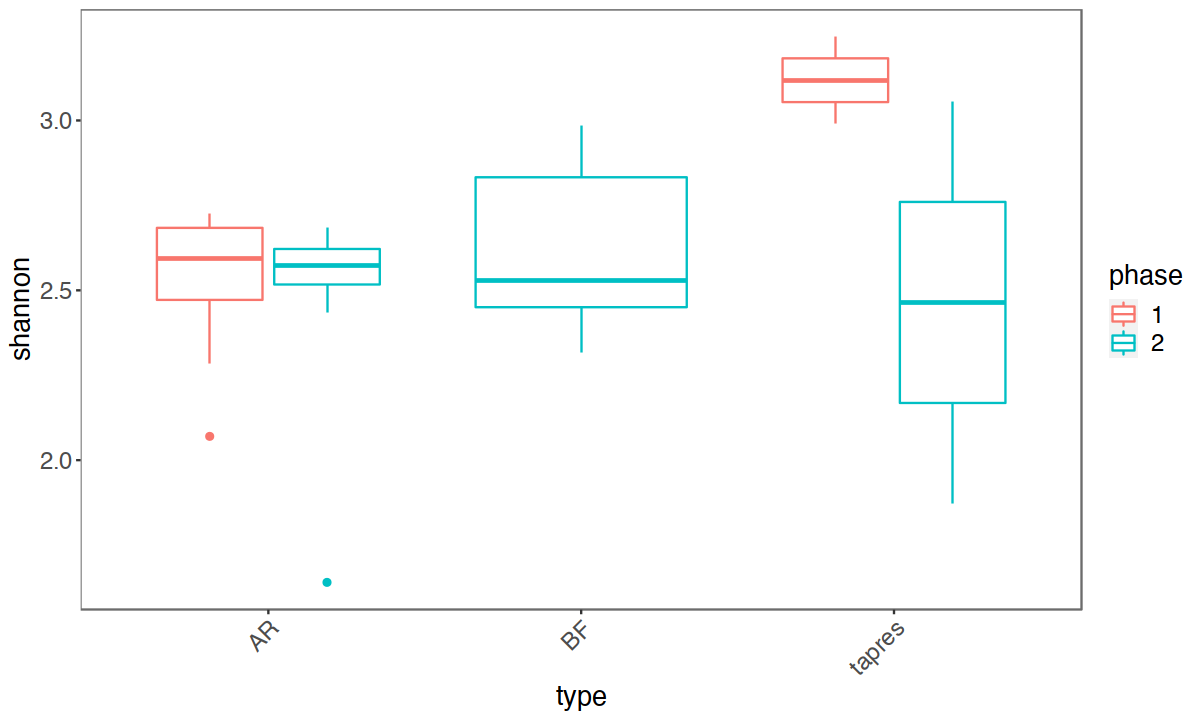

In [19]:
alpha_data["type"] <- "AR"
alpha_data$type[(str_detect(rownames(alpha_data), "BF"))] <- "BF"
alpha_data$type[(str_detect(rownames(alpha_data), "tapres"))] <- "tapres"
alpha_data$phase[(str_detect(rownames(alpha_data), "134"))|(str_detect(rownames(alpha_data), "162"))] <- "1"
alpha_data$phase[(str_detect(rownames(alpha_data), "372"))|(str_detect(rownames(alpha_data), "387"))] <- "2"
alpha_data <- alpha_data[rownames(alpha_data) != 'slidecontrol_387' & rownames(alpha_data) != 'manifcontrol_387' & 
                         rownames(alpha_data) != 'control_mock1e10'& rownames(alpha_data) != 'control_mock1e8', ]

 # n_fun <- function(x){return(data.frame(y = max(x), label = paste0("n=",length(x))))}
# alpha_data
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(alpha_data)+
geom_boxplot(aes(x= type, colour= phase, y= shannon))+
# stat_summary(fun.data = n_fun, geom = "text", vjust=-1)+
theme(panel.background=element_blank(), panel.border = element_rect(color = "#6c6c6c", fill = NA),
        axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=14),
        axis.text.y = element_text(size = 14),
        legend.text = element_text(size = 14),
        axis.title.x = element_text(size =16),
        axis.title.y = element_text(size=16),
        strip.text.x=element_text(size = 14),
        legend.title = element_text(size = 16))




In [20]:
#significance of differences in alpha diversity

alpha_data <- alpha_data %>% add_column(phase_type = paste(alpha_data$type, alpha_data$phase))
# alpha_data$shannon<- estimate_richness(alpha_data,  split= TRUE, measure= "Shannon")

kruskal.test(shannon ~ phase_type, data = alpha_data)
kruskal.test(shannon ~ phase, data = alpha_data)
kruskal.test(shannon ~ type, data = alpha_data)

pairwise.wilcox.test(as.matrix(alpha_data$shannon[alpha_data$type == "AR"]), as.matrix(alpha_data$phase[ alpha_data$type == "AR"]),
                 p.adjust.method = "BH") #p value > 0.05 for both AR and tapres across the phases


	Kruskal-Wallis rank sum test

data:  shannon by phase_type
Kruskal-Wallis chi-squared = 5.3224, df = 4, p-value = 0.2558



	Kruskal-Wallis rank sum test

data:  shannon by phase
Kruskal-Wallis chi-squared = 0.68701, df = 1, p-value = 0.4072



	Kruskal-Wallis rank sum test

data:  shannon by type
Kruskal-Wallis chi-squared = 2.8271, df = 2, p-value = 0.2433



	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  as.matrix(alpha_data$shannon[alpha_data$type == "AR"]) and as.matrix(alpha_data$phase[alpha_data$type == "AR"]) 

  1   
2 0.63

P value adjustment method: BH 

# Taxonomy Heatmaps

In [22]:
# tax_coverage_df %>% group_by(t_phylum) %>% dplyr::summarise(cov= sum()) #%>% dplyr::mutate(perc = round(count/sum(count)*100,1))#%>% dplyr::summarise(sum(count))
# # tax_coverage_df[is.na(tax_coverage_df$t_phylum), ]
# tax_coverage_df

tax_coverage_df_long_arbf <- merge(tax_coverage_df_long_unbin, arbf, by= "sample_id", all.x =T)

#coverage of each genus for plotting
genus_df <- tax_coverage_df_long_arbf %>% filter(type != "control") %>% group_by(type, t_phylum) %>% dplyr::summarise(coverage=sum(coverage)) %>% dplyr::mutate(perc = round(coverage/sum(coverage)*100,1))%>% ungroup() %>% filter(perc > 5)
genus_df

#coverage of each genus for plotting
genus_df <- tax_coverage_df_long_arbf %>% filter(type != "control") %>% group_by(  type, t_genus) %>% dplyr::summarise(coverage=sum(coverage)) %>% dplyr::mutate(perc = round(coverage/sum(coverage)*100,1))%>% ungroup() %>% filter(perc > 5)
genus_df

`summarise()` has grouped output by 'type'. You can override using the
`.groups` argument.


type   t_phylum         coverage  perc
1 AR     Actinobacteriota  179.7325  9.0
2 AR     Nitrospirota      114.1435  5.7
3 AR     Proteobacteria   1141.2909 57.1
4 AR     NA                465.3626 23.3
5 BF     Nitrospirota      194.5625 19.5
6 BF     Proteobacteria    449.2126 44.9
7 BF     NA                240.5778 24.1
8 tapres Proteobacteria    166.6929 41.7
9 tapres NA                184.9443 46.2

`summarise()` has grouped output by 'type'. You can override using the
`.groups` argument.


type   t_genus          coverage  perc
1  AR     Ga0077527        104.95707  5.2
2  AR     Hyphomicrobium   301.52832 15.1
3  AR     Mycobacterium    179.73251  9.0
4  AR     Nitrosomonas     137.62254  6.9
5  AR     Nitrospira       114.14346  5.7
6  AR     Reyranella       179.58690  9.0
7  AR     Sphingopyxis     105.83276  5.3
8  AR     NA               505.13904 25.3
9  BF     Hyphomicrobium   171.83123 17.2
10 BF     Nitrospira       194.56249 19.5
11 BF     Reyranella        55.69805  5.6
12 BF     NA               286.83055 28.7
13 tapres Methylobacterium  49.97177 12.5
14 tapres Nitrosomonas      37.18189  9.3
15 tapres NA               192.56122 48.1

In [24]:

ids <- c('tapres_134','tapres_162','tapres_372', 'tapres_387',
         'AR1_134','AR2_134','AR3_134','AR4_134','AR5_134' ,
          'AR1_162','AR2_162','AR3_162','AR4_162','AR5_162',
         'AR1_372','AR2_372','AR3_372','AR4_372','AR5_372',
        'AR1_387','AR2_387','AR3_387','AR4_387','AR5_387',
         'BF1_372','BF2_372','BF3_372','BF4_372','BF5_372',
         'BF1_387','BF2_387','BF3_387','BF4_387','BF5_387')

ids_no427 <- c('tapres_134','tapres_162','tapres_372', 'tapres_387',
         'AR1_134','AR2_134','AR3_134','AR4_134','AR5_134' ,
          'AR1_162','AR2_162','AR3_162','AR5_162',
         'AR1_372','AR2_372','AR3_372','AR4_372','AR5_372',
        'AR1_387','AR2_387','AR3_387','AR4_387','AR5_387',
         'BF1_372','BF2_372','BF3_372','BF4_372','BF5_372',
         'BF1_387','BF2_387','BF3_387','BF4_387','BF5_387')

ids2 <- c('tapres_134','tapres_162','tapres_372', 'tapres_387',
         'AR1_134','AR3_134','AR4_134','AR2_134','AR5_134' ,
          'AR1_162','AR3_162','AR4_162','AR2_162','AR5_162',
         'AR1_372','AR3_372','AR4_372','AR2_372','AR5_372',
        'AR1_387','AR3_387','AR4_387','AR2_387','AR5_387',
         'BF1_372','BF3_372','BF4_372','BF2_372','BF5_372',
         'BF1_387','BF3_387','BF4_387','BF2_387','BF5_387')


In [25]:
#long to wide format for correlation

cov_wide <- pivot_wider(tax_coverage_df_long_unbin, id_cols= sample_id,  names_from = bin_tax_name, values_from = coverage)
rownames <- cov_wide$sample_id
cov_wide <- subset(cov_wide, select= -c(sample_id))
row.names(cov_wide) <- rownames
cov_wide <- as.matrix(cov_wide) #convert to matrix
cov_wide <- subset(cov_wide, select= -c(Unbinned))

# head(cov_wide)

#also without controls
cov_wide_nocontrols <- pivot_wider(tax_coverage_df_long_unbin, id_cols= sample_id,  names_from = bin_tax_name, values_from = coverage)
cov_wide_nocontrols <- cov_wide_nocontrols %>% filter(sample_id != "slidecontrol_387") %>% filter(sample_id != "manifcontrol_387") %>% filter(sample_id != "control_mock1e8") %>% filter(sample_id != "control_mock1e10") #%>% filter(sample_id != "tapres_134")%>% filter(sample_id != "tapres_162")%>% filter(sample_id != "tapres_372") %>% filter(sample_id != "tapres_387")
#drop columns that now sum to zero 
cov_wide_nocontrols <- cov_wide_nocontrols %>% select_if(negate(function(col) is.numeric(col) && sum(col) == 0 ))
#remove bins associated with positive controls
# cov_wide_nocontrols <- cov_wide_nocontrols %>% dplyr::select(-c(Limosilactobacillus_1,Enterococcus_1)) #Bacillus_1, Listeria_1, Pseudomonas_1, Staphylococcus_1,
#set sample id column as row names
cov_wide_nocontrols$sample_id <- factor(cov_wide_nocontrols$sample_id ,order= TRUE, levels=ids)
cov_wide_nocontrols <- cov_wide_nocontrols[order(cov_wide_nocontrols$sample_id), ]
rownames_nocontrols <- cov_wide_nocontrols$sample_id
cov_wide_nocontrols <- subset(cov_wide_nocontrols, select= -c(sample_id))
row.names(cov_wide_nocontrols) <- rownames_nocontrols
cov_wide_nocontrols <- as.matrix(cov_wide_nocontrols) #convert to matrix
cov_wide_nocontrols <- subset(cov_wide_nocontrols, select= -c(Unbinned))
cov_wide_nocontrols

#also without controls and top 10 abundance in each sample
cov_nocontrol10 <- tax_coverage_df_long_unbin %>% filter(sample_id != "slidecontrol_387") %>% filter(sample_id != "manifcontrol_387") %>% filter(sample_id != "control_mock1e8") %>% filter(sample_id != "control_mock1e10")      
abu_data <- cov_nocontrol10 %>% group_by(sample_id) %>%top_n(coverage,n=10) %>% ungroup()
cov_wide_nocontrols10 <- pivot_wider(abu_data, id_cols= sample_id,  names_from = bin_tax_name, values_from = coverage)
#drop columns that now sum to zero 
# cov_wide_nocontrols10 <- cov_wide_nocontrols10 %>% select_if(negate(function(col) is.numeric(col) && sum(col) == 0 ))
cov_wide_nocontrols10$sample_id <- factor(cov_wide_nocontrols10$sample_id ,order= TRUE, levels=ids)
cov_wide_nocontrols10 <- cov_wide_nocontrols10[order(cov_wide_nocontrols10$sample_id), ]
rownames_nocontrols <- cov_wide_nocontrols10$sample_id
cov_wide_nocontrols10 <- subset(cov_wide_nocontrols10, select= -c(sample_id))
row.names(cov_wide_nocontrols10) <- rownames_nocontrols
cov_wide_nocontrols10 <- as.matrix(cov_wide_nocontrols10) #convert to matrix
cov_wide_nocontrols10 <- subset(cov_wide_nocontrols10, select= -c(Unbinned))
                                                                 
#also without controls and tapres
cov_wide_notap <- pivot_wider(tax_coverage_df_long_unbin, id_cols= sample_id,  names_from = bin_tax_name, values_from = coverage)
cov_wide_notap <- cov_wide_notap %>% filter(sample_id != "slidecontrol_387") %>% filter(sample_id != "manifcontrol_387") %>% filter(sample_id != "control_mock1e8") %>% filter(sample_id != "control_mock1e10") %>% filter(sample_id != "tapres_134")%>% filter(sample_id != "tapres_162")%>% filter(sample_id != "tapres_372") %>% filter(sample_id != "tapres_387")
#drop columns that now sum to zero 
cov_wide_notap<- cov_wide_notap %>% select_if(negate(function(col) is.numeric(col) && sum(col) == 0 ))
rownames_notap <- cov_wide_notap$sample_id 
cov_wide_notap <- subset(cov_wide_notap, select= -c(sample_id))
row.names(cov_wide_notap) <- rownames_notap
cov_wide_notap <- as.matrix(cov_wide_notap) #convert to matrix
cov_wide_notap <- subset(cov_wide_notap, select= -c(Unbinned))
                                                     
#also without controls and bf
cov_wide_nobf <- pivot_wider(tax_coverage_df_long_unbin, id_cols= sample_id,  names_from = bin_tax_name, values_from = coverage)
cov_wide_nobf <- cov_wide_nobf %>% filter(sample_id != "slidecontrol_387") %>% filter(sample_id != "manifcontrol_387") %>% filter(sample_id != "control_mock1e8") %>% filter(sample_id != "control_mock1e10") %>% filter(!str_detect(sample_id, "BF"))
#drop columns that now sum to zero 
cov_wide_nobf<- cov_wide_nobf %>% select_if(negate(function(col) is.numeric(col) && sum(col) == 0 ))
rownames_nobf <- cov_wide_nobf$sample_id
cov_wide_nobf <- subset(cov_wide_nobf, select= -c(sample_id))
row.names(cov_wide_nobf) <- rownames_nobf
cov_wide_nobf <- as.matrix(cov_wide_nobf) #convert to matrix
cov_wide_nobf <- subset(cov_wide_nobf, select= -c(Unbinned))
                                                   


Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”


Xanthobacteraceae_1 Hyphomicrobium_3 Nitrosomonas oligotropha_1
tapres_134  0.12392574         0.00000000        2.21896690               
tapres_162  0.22231166         0.00000000        2.70015961               
tapres_372  0.00000000         0.00000000        4.55936477               
tapres_387  0.13415969         0.03879759        2.49372661               
AR1_134     2.44871321         0.74626301        1.91910068               
AR2_134    12.86151998         0.68453219       15.87256668               
AR3_134     0.00000000         0.23651865        1.98125212               
AR4_134     0.00000000         0.21207316       36.12714600               
AR5_134     0.19624662         0.11397604       28.09312545               
AR1_162     2.45386396         1.17914050        0.72438176               
AR2_162     8.74841600         0.77504373        8.40984560               
AR3_162     0.00000000         0.69682533        1.94529933               
AR4_162     2.65840367         0.33025433        0.78153231               
AR5_162     0.44086786         0.32015954       15.61079190               
AR1_372     1.21046256         0.32129256        0.14677894               
AR2_372     0.31071701         0.11823160        0.00000000               
AR3_372     0.32631498         0.41296120        0.20769356               
AR4_372    10.39215021         0.16500777        0.40321937               
AR5_372     0.49259418         0.08011882        0.07245744               
AR1_387     0.92930312         0.20098441        0.25333085               
AR2_387     0.19449176         0.05404414        0.00000000               
AR3_387     0.11256728         0.16789335        0.17446320               
AR4_387     5.88359265         0.19002377        0.23686517               
AR5_387     0.65385854         0.00000000        0.09657400               
BF1_372     2.32141749         0.42892083        0.77551634               
BF2_372     1.77530689         1.55747890        0.11898408               
BF3_372     0.09477189         1.74701670        0.14229884               
BF4_372     4.94863842         0.25700247        0.59681846               
BF5_372     3.27716525         0.93438957        0.14253194               
BF1_387     2.71638914         0.32281013        0.70664316               
BF2_387     1.36708176         1.33270050        0.18233427               
BF3_387     0.10911202         0.96720010        0.15612500               
BF4_387     2.93617624         0.25749986        0.55339198               
BF5_387     2.32311400         0.62347200        0.22186648               
           Rhodovarius_1 Bryobacteraceae_1 Pirellulales_1 Bradyrhizobium_1
tapres_134 0.17833542    0.00000000        0.00000000     0.06805323      
tapres_162 0.00000000    0.00000000        0.00000000     0.00000000      
tapres_372 0.00000000    0.00000000        0.00000000     0.04144667      
tapres_387 0.04977348    0.08855444        0.00000000     0.13942557      
AR1_134    0.00000000    0.00000000        0.00000000     1.60672369      
AR2_134    0.00000000    0.00000000        0.00000000     0.58822803      
AR3_134    0.00000000    0.00000000        0.00000000     2.12867756      
AR4_134    0.00000000    0.00000000        0.00000000     1.26566348      
AR5_134    0.00000000    0.00000000        0.00000000     0.00000000      
AR1_162    0.00000000    0.00000000        0.00000000     1.14936449      
AR2_162    0.00000000    0.00000000        0.00000000     0.30594155      
AR3_162    0.00000000    0.00000000        0.00000000     0.69180970      
AR4_162    1.96118563    0.15126922        0.40102272     1.85479075      
AR5_162    0.00000000    0.00000000        0.00000000     0.20198561      
AR1_372    0.69521051    0.06894863        0.06457755     0.44104903      
AR2_372    0.00000000    0.00000000        0.00000000     1.15036611      
AR3_372    0.16262491    0.04570745        0.00000000     4.39784965      
AR4_372    0.55287349    0.00000000 

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”


In [26]:
#clustering samples and scaffolds for clustered heatmap (make sure NAs are zeros)

#cluster samples by bray curtis (first turn NA to zero)
cov_wide_for_clust <- ifelse(is.na(cov_wide), 0, cov_wide)

#cluster scaffolds by occurrence, using Spearman rank correlation converted to distance matrix
corrdist_dissimilarity <- as.dist(1 - cor(cov_wide_for_clust, method="spearman")) 
scaff_clust <- hclust(corrdist_dissimilarity)


pdf 
  2

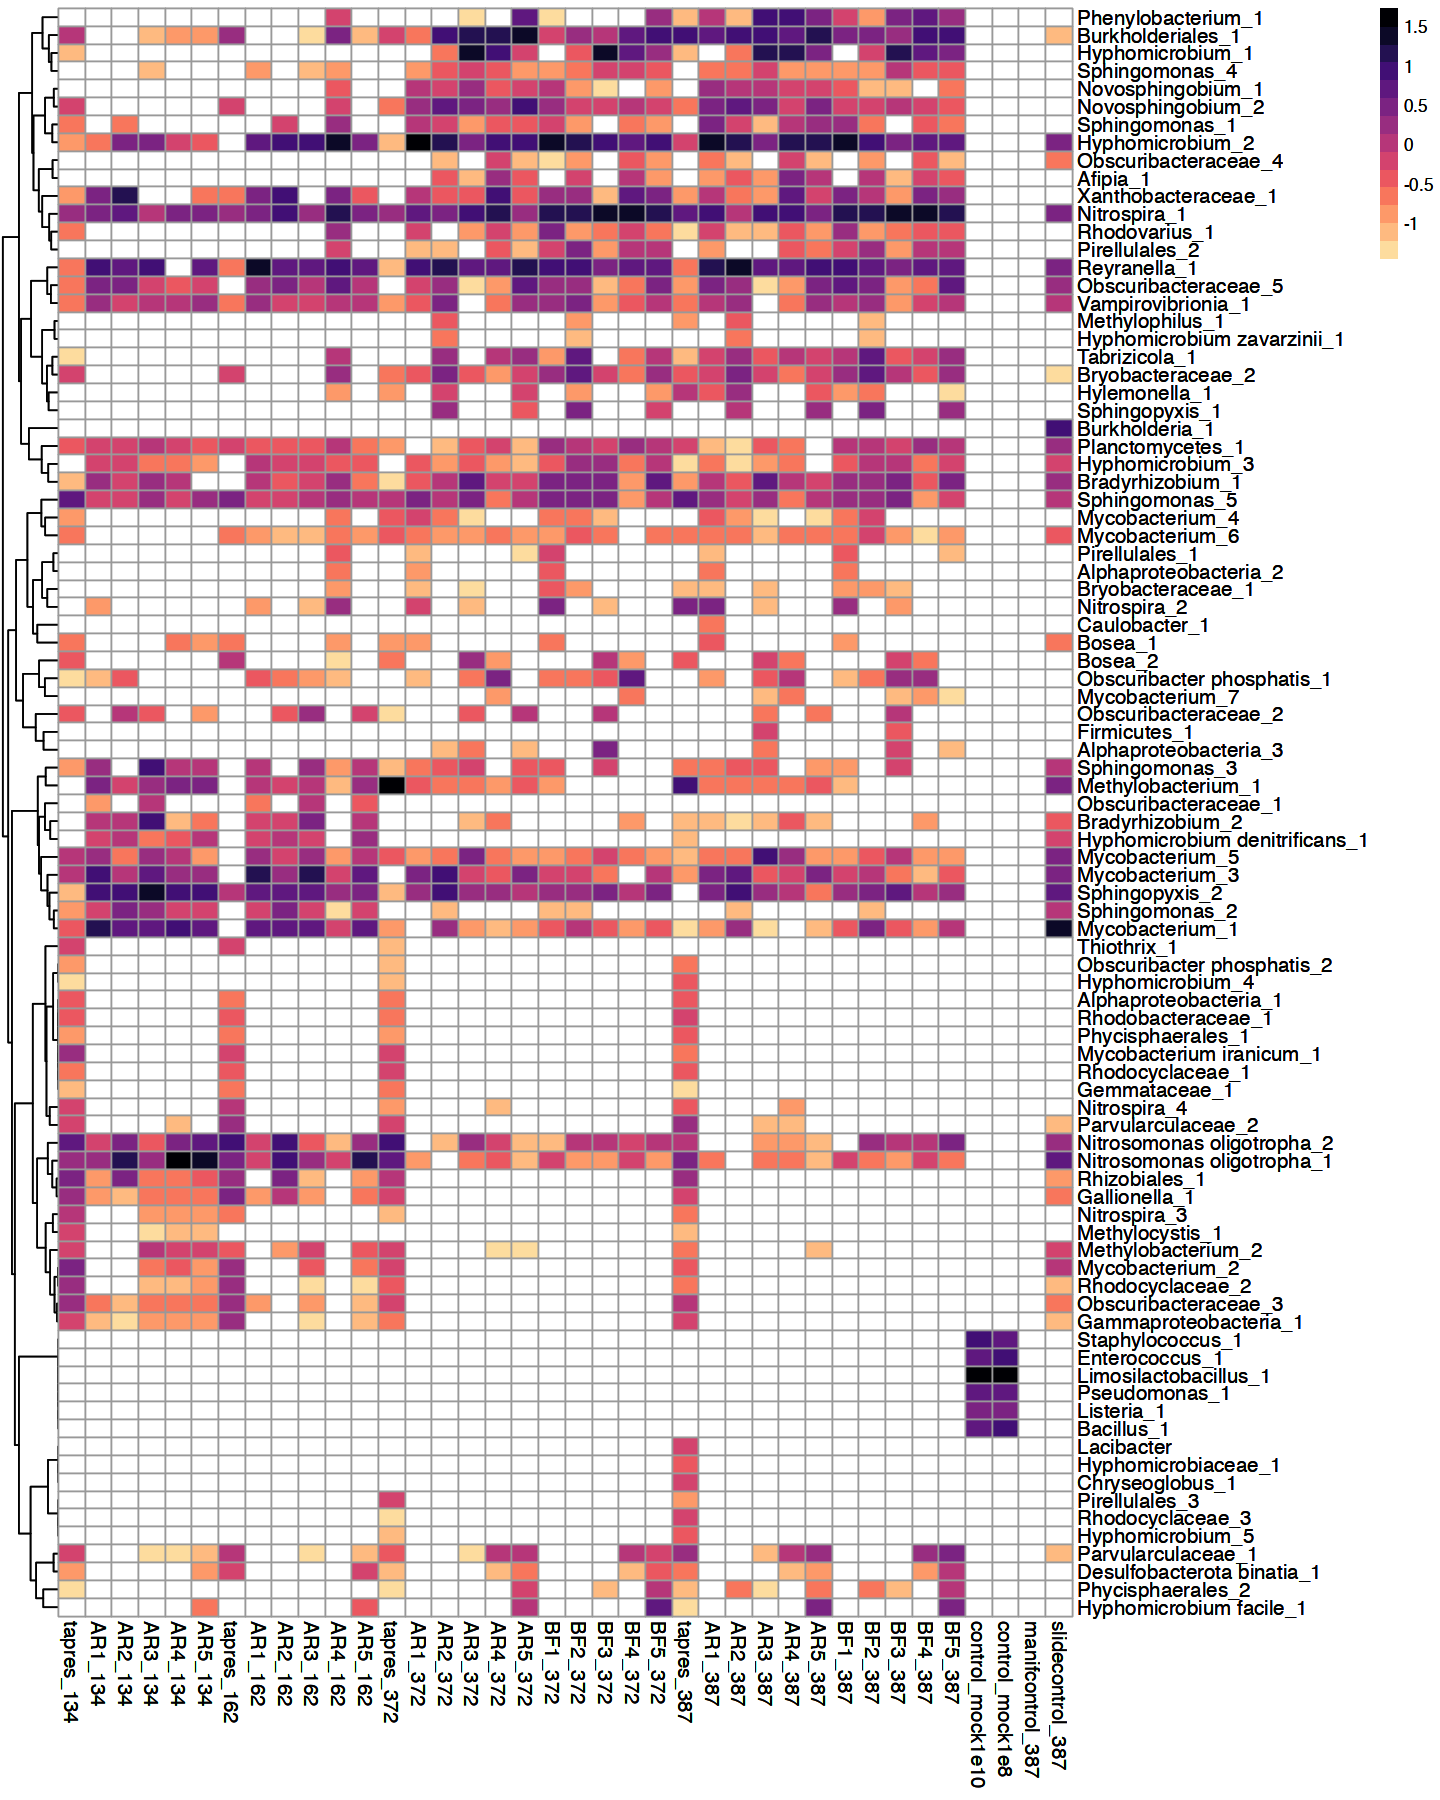

In [27]:
#Log-scale and plot heatmaps
cov_wide <- ifelse(cov_wide==0, NA, cov_wide) #make sure zeros are NAs for non-detects
cov_wide.logabundance <- log10(cov_wide)

options(repr.plot.width = 12, repr.plot.height = 15)

all_bins_heatmap <- pheatmap(t(cov_wide.logabundance), 
         color=rev(magma(15)[1:14]), 
         #cluster_cols=sample_clust, 
         cluster_cols=FALSE,
         cluster_rows=scaff_clust,
         na_col="white",
         # labels_row=as.character(colnames(cov_wide)),
         #labels_col=as.character(metagenome_info$Sample_code), #to change col names
         fontsize_row=12, fontsize_col=12,
         treeheight_row=30)

#save as pdf (uncomment these lines)
        # filename="/SCIENCE/Nelson_lab/data_files_nelson/el_paso_metagenomics/rps3_analyses/rps3_heatmap.pdf", width=4.5, height=7)

#save as pdf (uncomment these lines)
save_pheatmap_pdf <- function(x, filename, width=12, height=15) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}
save_pheatmap_pdf(all_bins_heatmap, paste0(fig_dir, 'all-bins-heatmap.jpeg'))

all_bins_heatmap

### No controls

In [28]:
#clustering samples and scaffolds for clustered heatmap (make sure NAs are zeros)

#cluster samples by bray curtis (first turn NA to zero)
cov_wide_for_clust <- ifelse(is.na(cov_wide_nocontrols), 0, cov_wide_nocontrols)

#cluster scaffolds by occurrence, using Spearman rank correlation converted to distance matrix
corrdist_dissimilarity <- as.dist(1 - cor(cov_wide_for_clust, method="spearman")) 
scaff_clust <- hclust(corrdist_dissimilarity)


Xanthobacteraceae_1 Hyphomicrobium_3 Nitrosomonas oligotropha_1
tapres_134 -0.90683846                  NA       0.3461508                
tapres_162 -0.65303775                  NA       0.4313894                
tapres_372          NA                  NA       0.6589043                
tapres_387 -0.87237794         -1.41119520       0.3968488                
AR1_134     0.38893792         -0.12710808       0.2830978                
AR2_134     1.10929230         -0.16460613       1.2006472                
AR3_134             NA         -0.62613460       0.2969397                
AR4_134             NA         -0.67351429       1.5578337                
AR5_134    -0.70719782         -0.94318643       1.4486001                
AR1_162     0.38985048          0.07156556      -0.1400325                
AR2_162     0.94192943         -0.11067379       0.9247880                
AR3_162             NA         -0.15687607       0.2889864                
AR4_162     0.42462093         -0.48115148      -0.1070531                
AR5_162    -0.35569156         -0.49463356       1.1934249                
AR1_372     0.08295136         -0.49309933      -0.8333363                
AR2_372    -0.50763497         -0.92726643              NA                
AR3_372    -0.48636299         -0.38409075      -0.6825770                
AR4_372     1.01670542         -0.78249560      -0.3944586                
AR5_372    -0.30751073         -1.09626546      -1.1399170                
AR1_387    -0.03184261         -0.69683762      -0.5963119                
AR2_387    -0.71109880         -1.26725137              NA                
AR3_387    -0.94858784         -0.77496650      -0.7582962                
AR4_387     0.76964260         -0.72119207      -0.6254988                
AR5_387    -0.18451620                  NA      -1.0151398                
BF1_372     0.36575325         -0.36762286      -0.1104090                
BF2_372     0.24927344          0.19242217      -0.9245111                
BF3_372    -1.02332044          0.24229706      -0.8467986                
BF4_372     0.69448572         -0.59006271      -0.2241578                
BF5_372     0.51549834         -0.02947202      -0.8460878                
BF1_387     0.43399199         -0.49105285      -0.1507998                
BF2_387     0.13579449          0.12473256      -0.7391317                
BF3_387    -0.96212741         -0.01448367      -0.8065276                
BF4_387     0.46778212         -0.58922300      -0.2569671                
BF5_387     0.36607052         -0.20518304      -0.6539083                
           Rhodovarius_1 Bryobacteraceae_1 Pirellulales_1 Bradyrhizobium_1
tapres_134 -0.74876238           NA               NA      -1.16715127     
tapres_162          NA           NA               NA               NA     
tapres_372          NA           NA               NA      -1.38251032     
tapres_387 -1.30300195   -1.0527897               NA      -0.85565758     
AR1_134             NA           NA               NA       0.20594120     
AR2_134             NA           NA               NA      -0.23045429     
AR3_134             NA           NA               NA       0.32810988     
AR4_134             NA           NA               NA       0.10231825     
AR5_134             NA           NA               NA               NA     
AR1_162             NA           NA               NA       0.06045777     
AR2_162             NA           NA               NA      -0.51436154     
AR3_162             NA           NA               NA      -0.16001335     
AR4_162     0.29251870   -0.8202494        -0.396831       0.26829492     
AR5_162             NA           NA               NA      -0.69467957     
AR1_372    -0.15788367   -1.1614743        -1.189918      -0.35551313     
AR2_372             NA           NA               NA       0.06083608     
AR3_372    -0.78881292   -1.3400130               NA       0.64324038     
AR4_372    -0.25737423           NA 

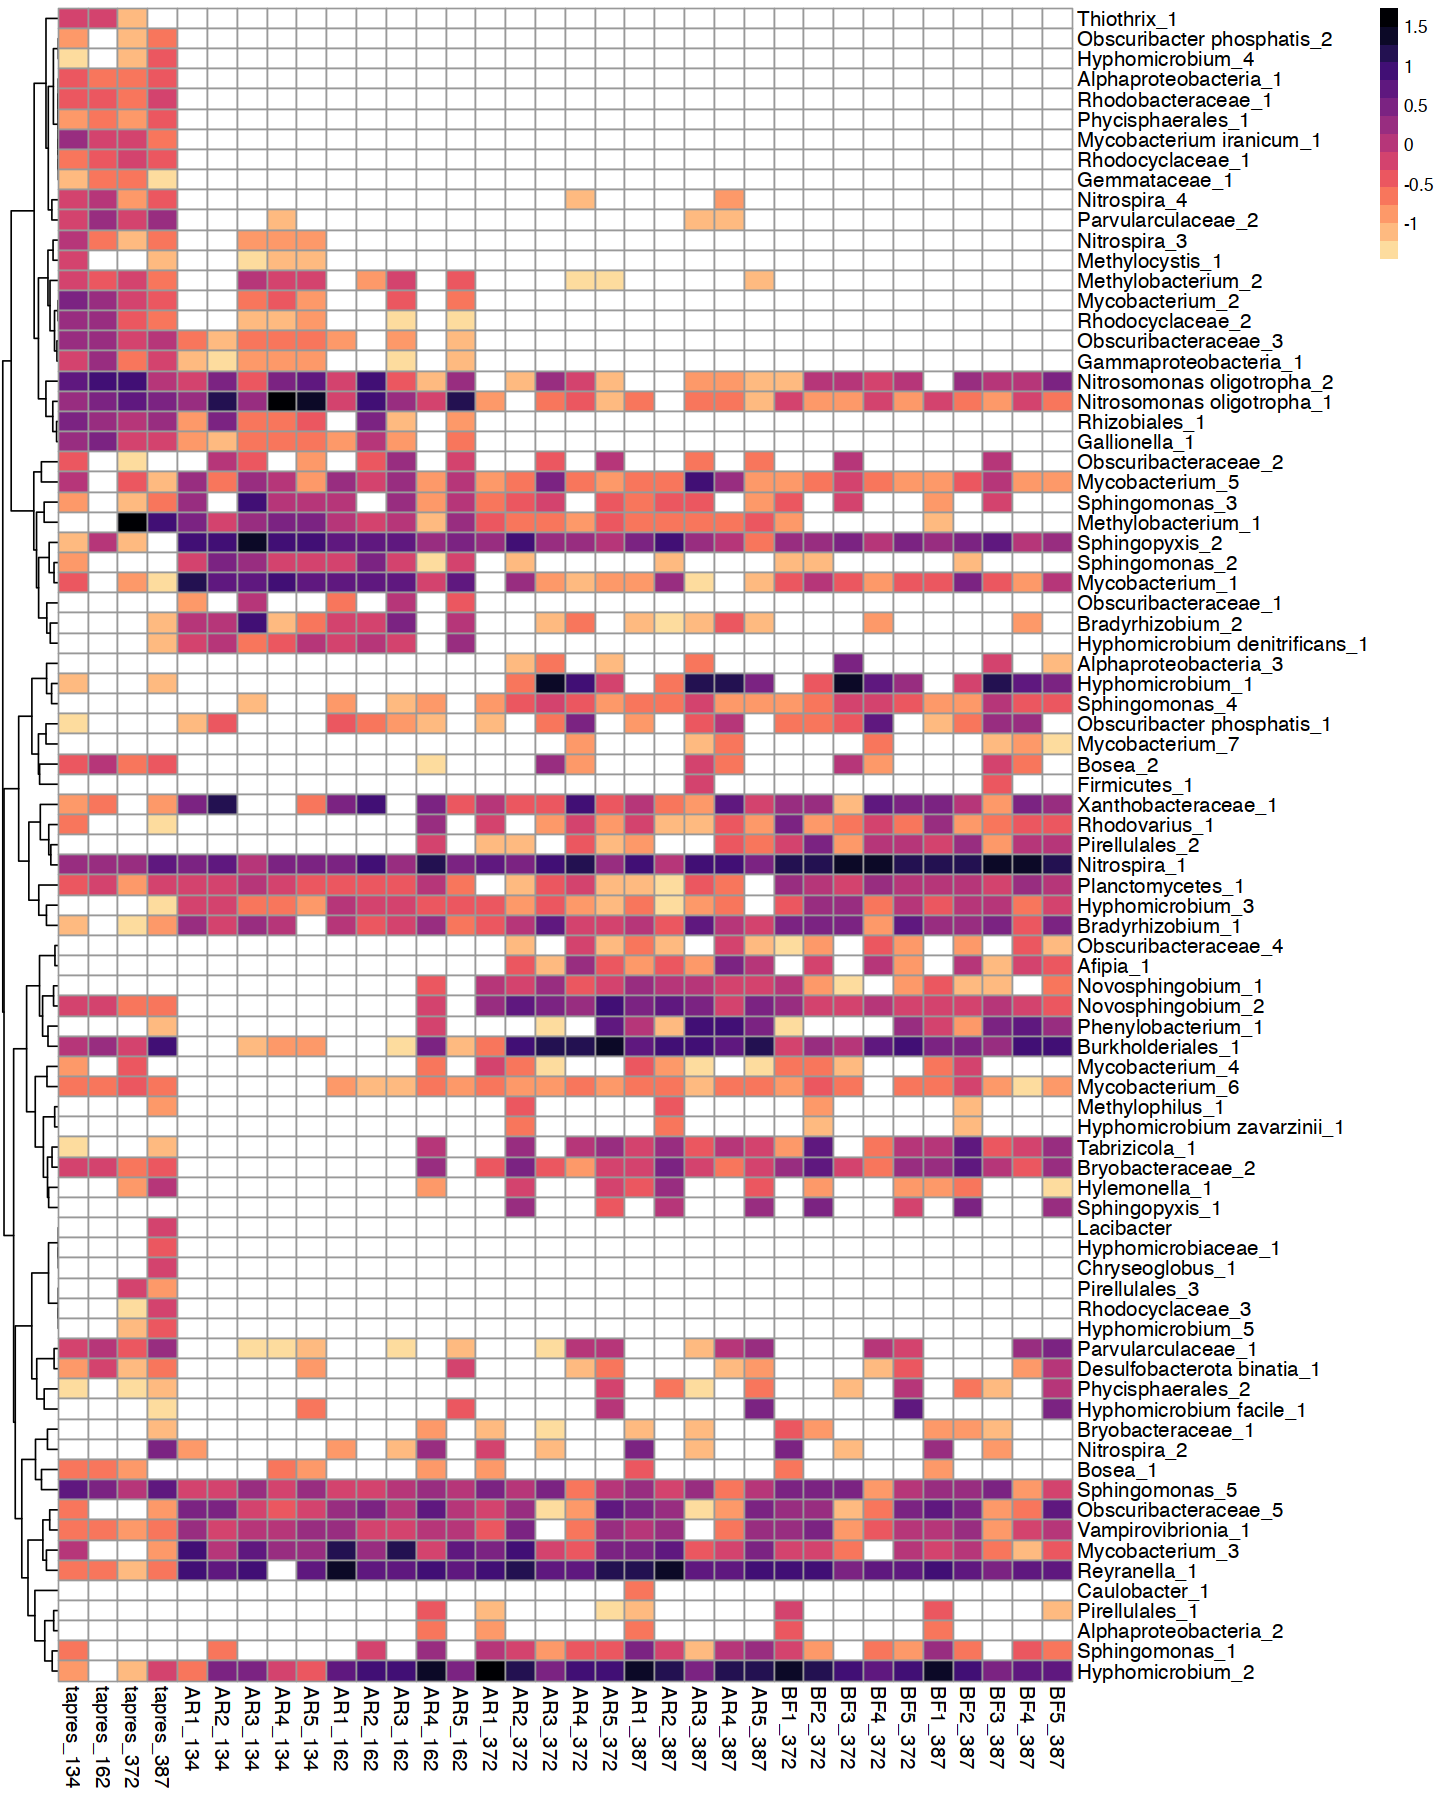

In [29]:
#Log-scale and plot heatmaps 

cov_wide_nocontrols <- ifelse(cov_wide_nocontrols==0, NA, cov_wide_nocontrols) #make sure zeros are NAs for non-detects
logabundance <- log10(cov_wide_nocontrols)

options(repr.plot.width = 12, repr.plot.height = 15)
pheatmap(t(logabundance), 
         color=rev(magma(15)[1:14]), 
         # cluster_cols=ids, 
         cluster_cols=FALSE,
         cluster_rows=scaff_clust,
         na_col="white",
         # labels_row=as.character(tax_coverage_df_long$bin_tax_name),
         #labels_col=as.character(metagenome_info$Sample_code), #to change col names
         fontsize_row=12, fontsize_col=12,
         treeheight_row=30)

#save as pdf (uncomment these lines)
        # filename="/SCIENCE/Nelson_lab/data_files_nelson/el_paso_metagenomics/rps3_analyses/rps3_heatmap.pdf", width=4.5, height=7)
logabundance

### No controls, subset of bins

Need to run section 'DESEQ across phases, AR only' before can run this section to get variable 'AR_deseq_bins'

In [30]:
bins_top10 <- unique(c(colnames(cov_wide_nocontrols10), AR_deseq_bins, 'Methylobacterium_1', bf_deseq_bins))

cov_wide_nocontrols_subset <- subset(cov_wide_nocontrols, select=bins_top10)
cov_wide_nocontrols_subset <- cov_wide_nocontrols_subset[rownames(cov_wide_nocontrols_subset) != "AR4_162", ]
# cov_wide_nocontrols_subset

# arbf_phasetype <- arbf %>%  dplyr::select(sample_id, phase) #%>% mutate(phase_type= paste0(type, phase)) 
# arbf_phasetype_sample_id<- arbf_phasetype$sample_id
# arbf_phasetype <- subset(arbf_phasetype, select= -sample_id)
# rownames(arbf_phasetype) <- arbf_phasetype_sample_id


ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'unique': object 'AR_deseq_bins' not found


In [31]:
#cluster samples by bray curtis (first turn NA to zero)
cov_wide_for_clust_subset <- ifelse(is.na(cov_wide_nocontrols_subset), 0, cov_wide_nocontrols_subset)

#cluster scaffolds by occurrence, using Spearman rank correlation converted to distance matrix
corrdist_dissimilarity_subset <- as.dist(1 - cor(cov_wide_for_clust_subset, method="spearman")) 
scaff_clust_subset <- hclust(corrdist_dissimilarity_subset)


ERROR: Error in ifelse(is.na(cov_wide_nocontrols_subset), 0, cov_wide_nocontrols_subset): object 'cov_wide_nocontrols_subset' not found


In [32]:
#Log-scale and plot heatmaps

cov_wide_nocontrols_subset <- ifelse(cov_wide_nocontrols_subset==0, NA, cov_wide_nocontrols_subset) #make sure zeros are NAs for non-detects
logabundance <- log2(cov_wide_nocontrols_subset)
bins_for_fig <- colnames(logabundance)

options(repr.plot.width = 12, repr.plot.height = 15)
MAG_heatmap <- pheatmap(t(logabundance), 
         color=rev(magma(15)[1:14]), 
         cluster_cols=FALSE, 
         # annotation_col = arbf_phasetype, 
         # cluster_rows=scaff_clust_subset,
        cluster_rows = FALSE,
         # clustering_distance_rows = "euclidean", 
         na_col="white",
         # labels_row=as.character(tax_coverage_df_long$bin_tax_name),
         #labels_col=as.character(metagenome_info$Sample_code), #to change col names
         fontsize_row=12, fontsize_col=12,
         treeheight_row=30)
MAG_heatmap

#save as pdf (uncomment these lines)
save_pheatmap_pdf <- function(x, filename, width=12, height=15) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}
save_pheatmap_pdf(MAG_heatmap, paste0(fig_dir, 'MAG-heatmap.jpeg'))

logabundance

ERROR: Error in ifelse(cov_wide_nocontrols_subset == 0, NA, cov_wide_nocontrols_subset): object 'cov_wide_nocontrols_subset' not found


### Manuscript heatmap

In [33]:
heatmap2 <- bin_info %>% subset(bin_tax_name %in% bins_for_fig)
heatmap2["amoA_pmoA"] <- ifelse(heatmap2$bins %in% amoA_bins, 10, NA)

enrichedp1p2['enriched_p1_or_p2'] <- enrichedp1p2$log2FoldChange #ifelse(enrichedp1p2$padj > 0.01, NA, enrichedp1p2$log2FoldChange) 
enrichedbulkbf['enriched_bulk_or_bf'] <- enrichedbulkbf$log2FoldChange #ifelse(enrichedbulkbf$padj > 0.01, NA, enrichedbulkbf$log2FoldChange) 
module_df <- deseq_module_table_full
colnames(module_df) <- make.names(names(module_df))
module_df <- module_df %>% mutate(Tyrosine_deg = Tyrosine.degradation..tyrosine....homogentisate * 10) %>% mutate(Leucine_deg = Leucine.degradation..leucine....acetoacetate...acetyl.CoA * 10) %>% 
     mutate(Histidine_deg = Histidine.degradation..histidine....N.formiminoglutamate....glutamate * 10) %>% 
     mutate(Pyrimidine_deg = Pyrimidine.degradation..uracil....beta.alanine..thymine....3.aminoisobutanoate * 10) %>% 
     mutate(Purine_deg = Purine.degradation..xanthine....urea * 10) %>% 
     mutate(Methionine_deg = Methionine.degradation * 10)

hm2 <- merge(heatmap2, enrichedp1p2, by='bins', all.x= TRUE)
hm2 <- merge(hm2, enrichedbulkbf, by='bins', all.x= TRUE)
hm2 <- merge(hm2, module_df, by.x= 'bins', by.y= 'bin_name', all.x= TRUE)

#set order of rows
hm2$bin_tax_name <- factor(hm2$bin_tax_name, levels= bins_for_fig)
hm2<- hm2[order(hm2$bin_tax_name),]

hm2_rows <- hm2$bin_tax_name
hm2 <- hm2 %>% dplyr::select( enriched_p1_or_p2, enriched_bulk_or_bf, amoA_pmoA, Tyrosine_deg, Leucine_deg, Histidine_deg, Pyrimidine_deg, Purine_deg, Methionine_deg)
rownames(hm2) <- hm2_rows


ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'table' in selecting a method for function '%in%': object 'bins_for_fig' not found


In [34]:
options(repr.plot.width = 5.5, repr.plot.height = 15)
MAG_heatmap2 <- pheatmap(hm2, 
         # color=rev(magma(15)[1:14]), 
         cluster_cols=FALSE, 
         # cluster_cols=FALSE,
         # annotation_col = arbf_phasetype, 
         # cluster_rows=scaff_clust_subset,
        cluster_rows = FALSE,
        # display_numbers= TRUE,  number_color = "black", 
         # clustering_distance_rows = "euclidean", 
         na_col="white",
        legend= 2, 
         # labels_row=as.character(tax_coverage_df_long$bin_tax_name),
         #labels_col=as.character(metagenome_info$Sample_code), #to change col names
         fontsize_row=12, fontsize_col=12,
         treeheight_row=30)
MAG_heatmap2

#save as pdf (uncomment these lines)
#save as pdf (uncomment these lines)
save_pheatmap_pdf <- function(x, filename, width=5.5, height=15) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()}
save_pheatmap_pdf(MAG_heatmap2, paste0(fig_dir, 'MAG-heatmap2.jpeg'))

ERROR: Error in rownames(mat): object 'hm2' not found


### No tapres

In [35]:
#clustering samples and scaffolds for clustered heatmap (make sure NAs are zeros)

#cluster samples by bray curtis (first turn NA to zero)
cov_wide_for_clust <- ifelse(is.na(cov_wide_notap), 0, cov_wide_notap)

#cluster scaffolds by occurrence, using Spearman rank correlation converted to distance matrix
corrdist_dissimilarity <- as.dist(1 - cor(cov_wide_for_clust, method="spearman")) 
scaff_clust <- hclust(corrdist_dissimilarity)

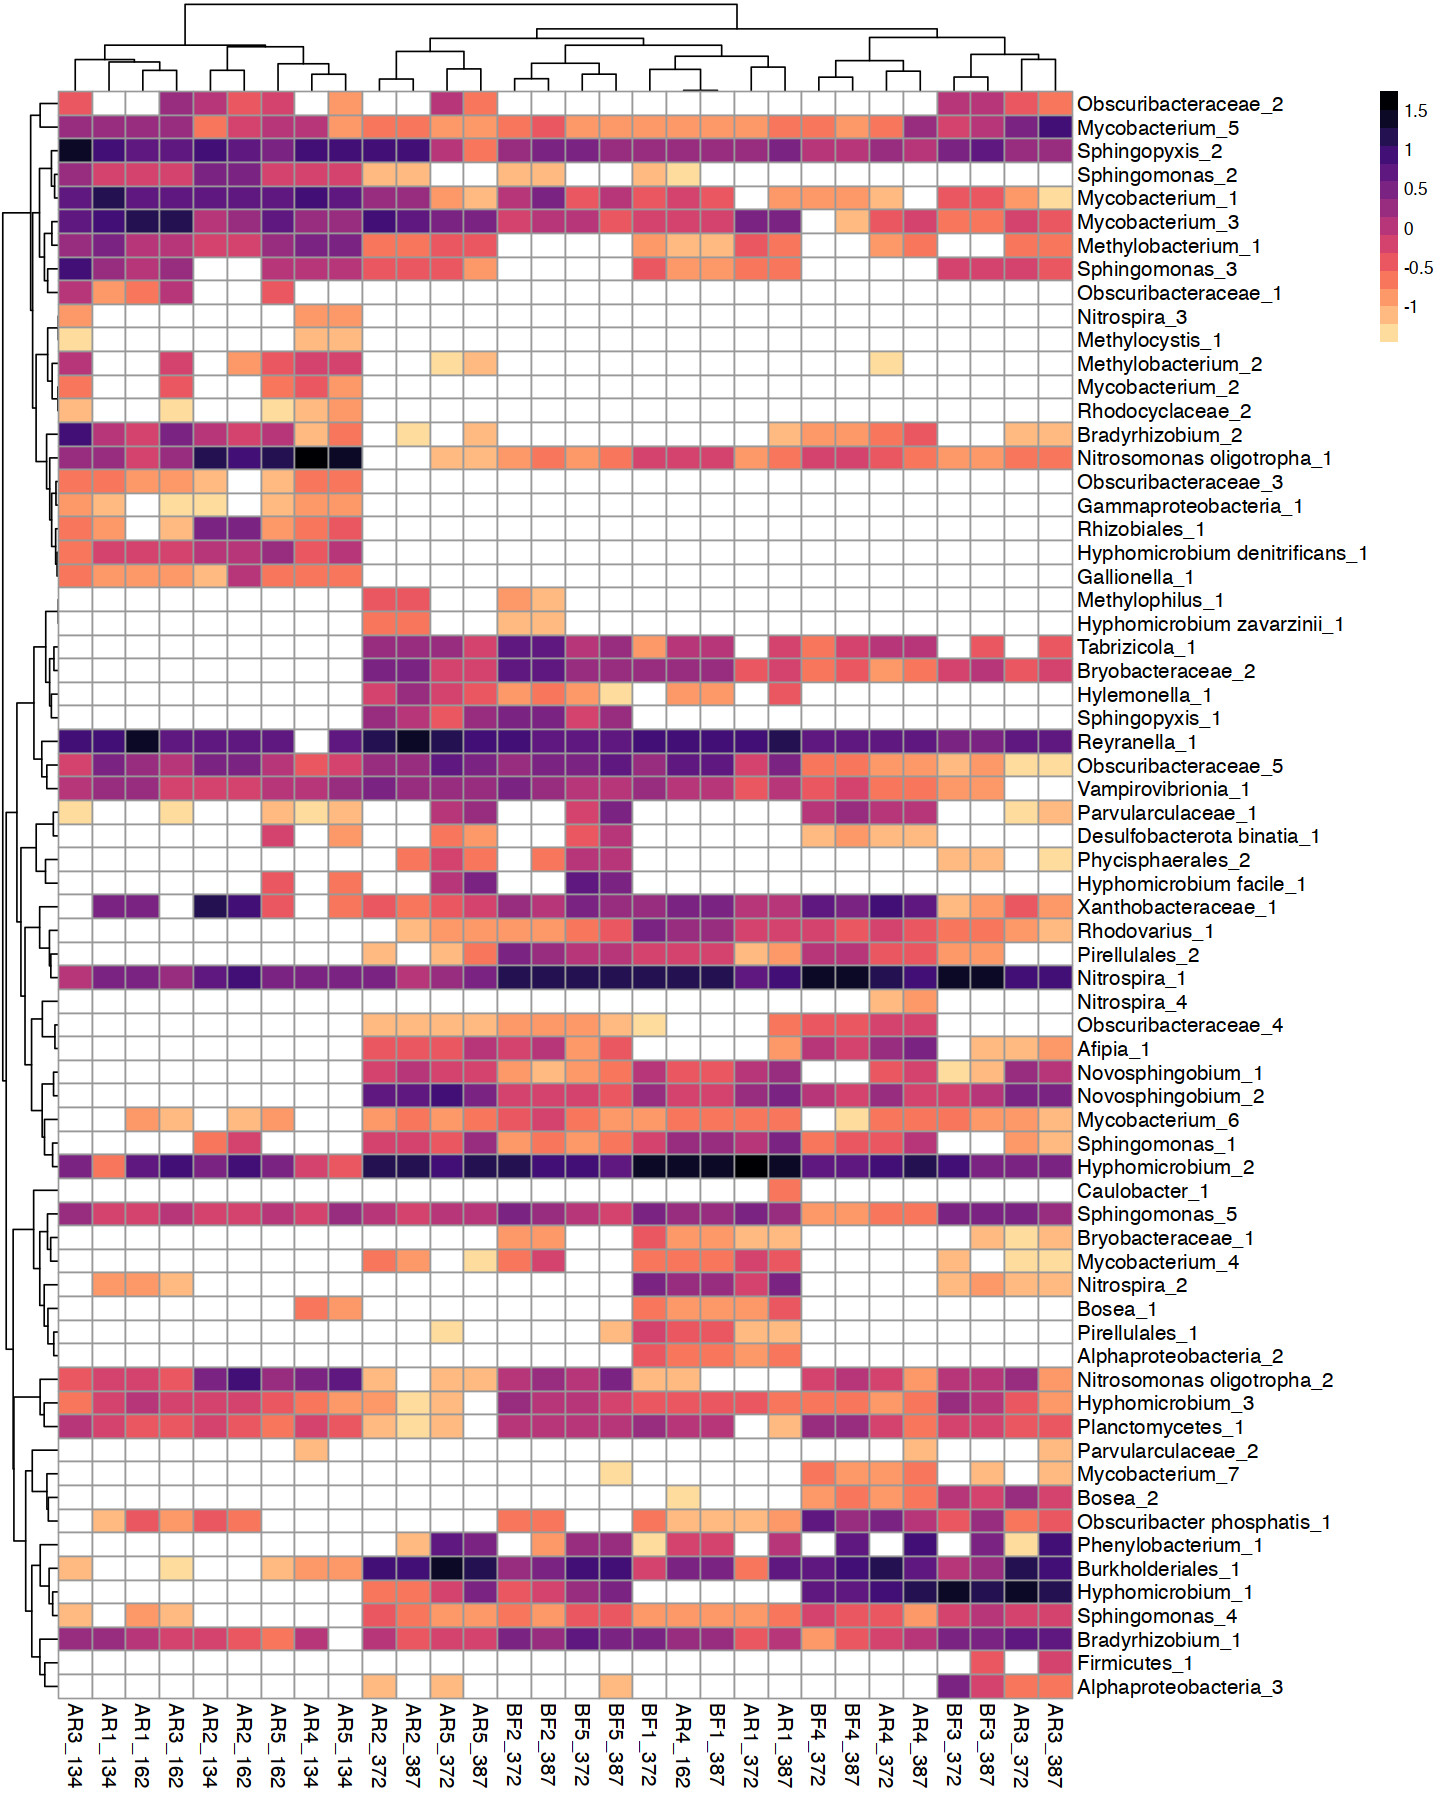

In [36]:
#Log-scale and plot heatmaps
cov_wide_notap <- ifelse(cov_wide_notap==0, NA, cov_wide_notap) #make sure zeros are NAs for non-detects
rps2.logabundance <- log10(cov_wide_notap)

options(repr.plot.width = 12, repr.plot.height = 15)

pheatmap(t(rps2.logabundance), 
         color=rev(magma(15)[1:14]), 
         #cluster_cols=sample_clust, 
         # cluster_cols=FALSE,
         cluster_rows=scaff_clust,
         na_col="white",
         # labels_row=as.character(cov_wide_notap$bin_tax_name),
         #labels_col=as.character(metagenome_info$Sample_code), #to change col names
         fontsize_row=12, fontsize_col=12,
         treeheight_row=30)

#save as pdf (uncomment these lines)
        # filename="/SCIENCE/Nelson_lab/data_files_nelson/el_paso_metagenomics/rps3_analyses/rps3_heatmap.pdf", width=4.5, height=7)

# Barplots

### Create new df with metadata

In [37]:
#manipulate df

#merge with metadata table
tax_arbf <- merge(tax_coverage_df_long_unbin, arbf, by.x='sample_id', by.y='sample_id')
# tax_arbf <- subset(tax_coverage_df_long, select= -c(sample_id_old, ggkbase_id))
head(tax_arbf)

#remove contols
tax_nocontrols <- tax_arbf %>% filter(sample_id != "slidecontrol_387") %>% filter(sample_id != "manifcontrol_387") %>% filter(sample_id != "control_mock1e8") %>% filter(sample_id != "control_mock1e10") 
# Change level order
new_levels <- c('tapres_134', 'tapres_162', 'tapres_372', 'tapres_387', 'AR1_134', 'AR2_134','AR3_134','AR4_134','AR5_134', 'AR1_162', 'AR2_162','AR3_162','AR4_162','AR5_162',
                'AR1_372', 'AR2_372','AR3_372','AR4_372','AR5_372', 'AR1_387', 'AR2_387','AR3_387','AR4_387','AR5_387',
                'BF1_372', 'BF2_372','BF3_372','BF4_372','BF5_372', 'BF1_387', 'BF2_387','BF3_387','BF4_387','BF5_387')
tax_nocontrols$sample_id <- factor(tax_nocontrols$sample_id, levels=new_levels)
head(tax_nocontrols)

sample_id bins                                       
1 AR1_134   ARSTAG_CONTROL_MOCK1E10_111821_bin_1       
2 AR1_134   ARSTAG_ARBF_1_post_bin_31_1                
3 AR1_134   ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_meth_1
4 AR1_134   ARSTAG_CONTROL_MOCK1E10_111821_bin_3       
5 AR1_134   ARSTAG_ARBF_3_post_bin_30_2                
6 AR1_134   ARSTAG_ARBF_5_post_bin_12                  
  bin_tax_name               total_length num_contigs N50    GC_content
1 Listeria_1                 2866754       19         475945 37.94745  
2 Bosea_1                    5643005      118          78172 66.53874  
3 Methylobacterium_2         6366832      269          42453 69.51993  
4 Pseudomonas_1              6709546       83         215458 66.27187  
5 Bosea_2                    4529685       36         239422 66.98337  
6 Desulfobacterota binatia_1 7054206       60         236306 69.54973  
  percent_completion percent_redundancy t_domain ⋯ TCC1_cells.cm2
1  98.59155          4.225352           Bacteria ⋯ NA            
2 100.00000          0.000000           Bacteria ⋯ NA            
3  97.18310          4.225352           Bacteria ⋯ NA            
4  98.59155          1.408451           Bacteria ⋯ NA            
5  98.59155          5.633803           Bacteria ⋯ NA            
6  98.59155          4.225352           Bacteria ⋯ NA            
  TCC2_cells.cm2 TCC3_cells.cm2 ICC1_cells.cm2 ICC2_cells.cm2 ICC3_cells.cm2
1 NA             NA             NA             NA             NA            
2 NA             NA             NA             NA             NA            
3 NA             NA             NA             NA             NA            
4 NA             NA             NA             NA             NA            
5 NA             NA             NA             NA             NA            
6 NA             NA             NA             NA             NA            
  bf_TCC_gmean bf_TCC_gstdv bf_ICC_gmean bf_ICC_gstdv
1 NaN          NA           NaN          NA          
2 NaN          NA           NaN          NA          
3 NaN          NA           NaN          NA          
4 NaN          NA           NaN          NA          
5 NaN          NA           NaN          NA          
6 NaN          NA           NaN          NA

sample_id bins                                       
1 AR1_134   ARSTAG_CONTROL_MOCK1E10_111821_bin_1       
2 AR1_134   ARSTAG_ARBF_1_post_bin_31_1                
3 AR1_134   ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_meth_1
4 AR1_134   ARSTAG_CONTROL_MOCK1E10_111821_bin_3       
5 AR1_134   ARSTAG_ARBF_3_post_bin_30_2                
6 AR1_134   ARSTAG_ARBF_5_post_bin_12                  
  bin_tax_name               total_length num_contigs N50    GC_content
1 Listeria_1                 2866754       19         475945 37.94745  
2 Bosea_1                    5643005      118          78172 66.53874  
3 Methylobacterium_2         6366832      269          42453 69.51993  
4 Pseudomonas_1              6709546       83         215458 66.27187  
5 Bosea_2                    4529685       36         239422 66.98337  
6 Desulfobacterota binatia_1 7054206       60         236306 69.54973  
  percent_completion percent_redundancy t_domain ⋯ TCC1_cells.cm2
1  98.59155          4.225352           Bacteria ⋯ NA            
2 100.00000          0.000000           Bacteria ⋯ NA            
3  97.18310          4.225352           Bacteria ⋯ NA            
4  98.59155          1.408451           Bacteria ⋯ NA            
5  98.59155          5.633803           Bacteria ⋯ NA            
6  98.59155          4.225352           Bacteria ⋯ NA            
  TCC2_cells.cm2 TCC3_cells.cm2 ICC1_cells.cm2 ICC2_cells.cm2 ICC3_cells.cm2
1 NA             NA             NA             NA             NA            
2 NA             NA             NA             NA             NA            
3 NA             NA             NA             NA             NA            
4 NA             NA             NA             NA             NA            
5 NA             NA             NA             NA             NA            
6 NA             NA             NA             NA             NA            
  bf_TCC_gmean bf_TCC_gstdv bf_ICC_gmean bf_ICC_gstdv
1 NaN          NA           NaN          NA          
2 NaN          NA           NaN          NA          
3 NaN          NA           NaN          NA          
4 NaN          NA           NaN          NA          
5 NaN          NA           NaN          NA          
6 NaN          NA           NaN          NA

In [38]:
#verify that coverage sums to 100
# tax_nocontrols %>% group_by(sample_id) %>% dplyr::summarise(coverage_total=sum(coverage)) %>% ungroup()

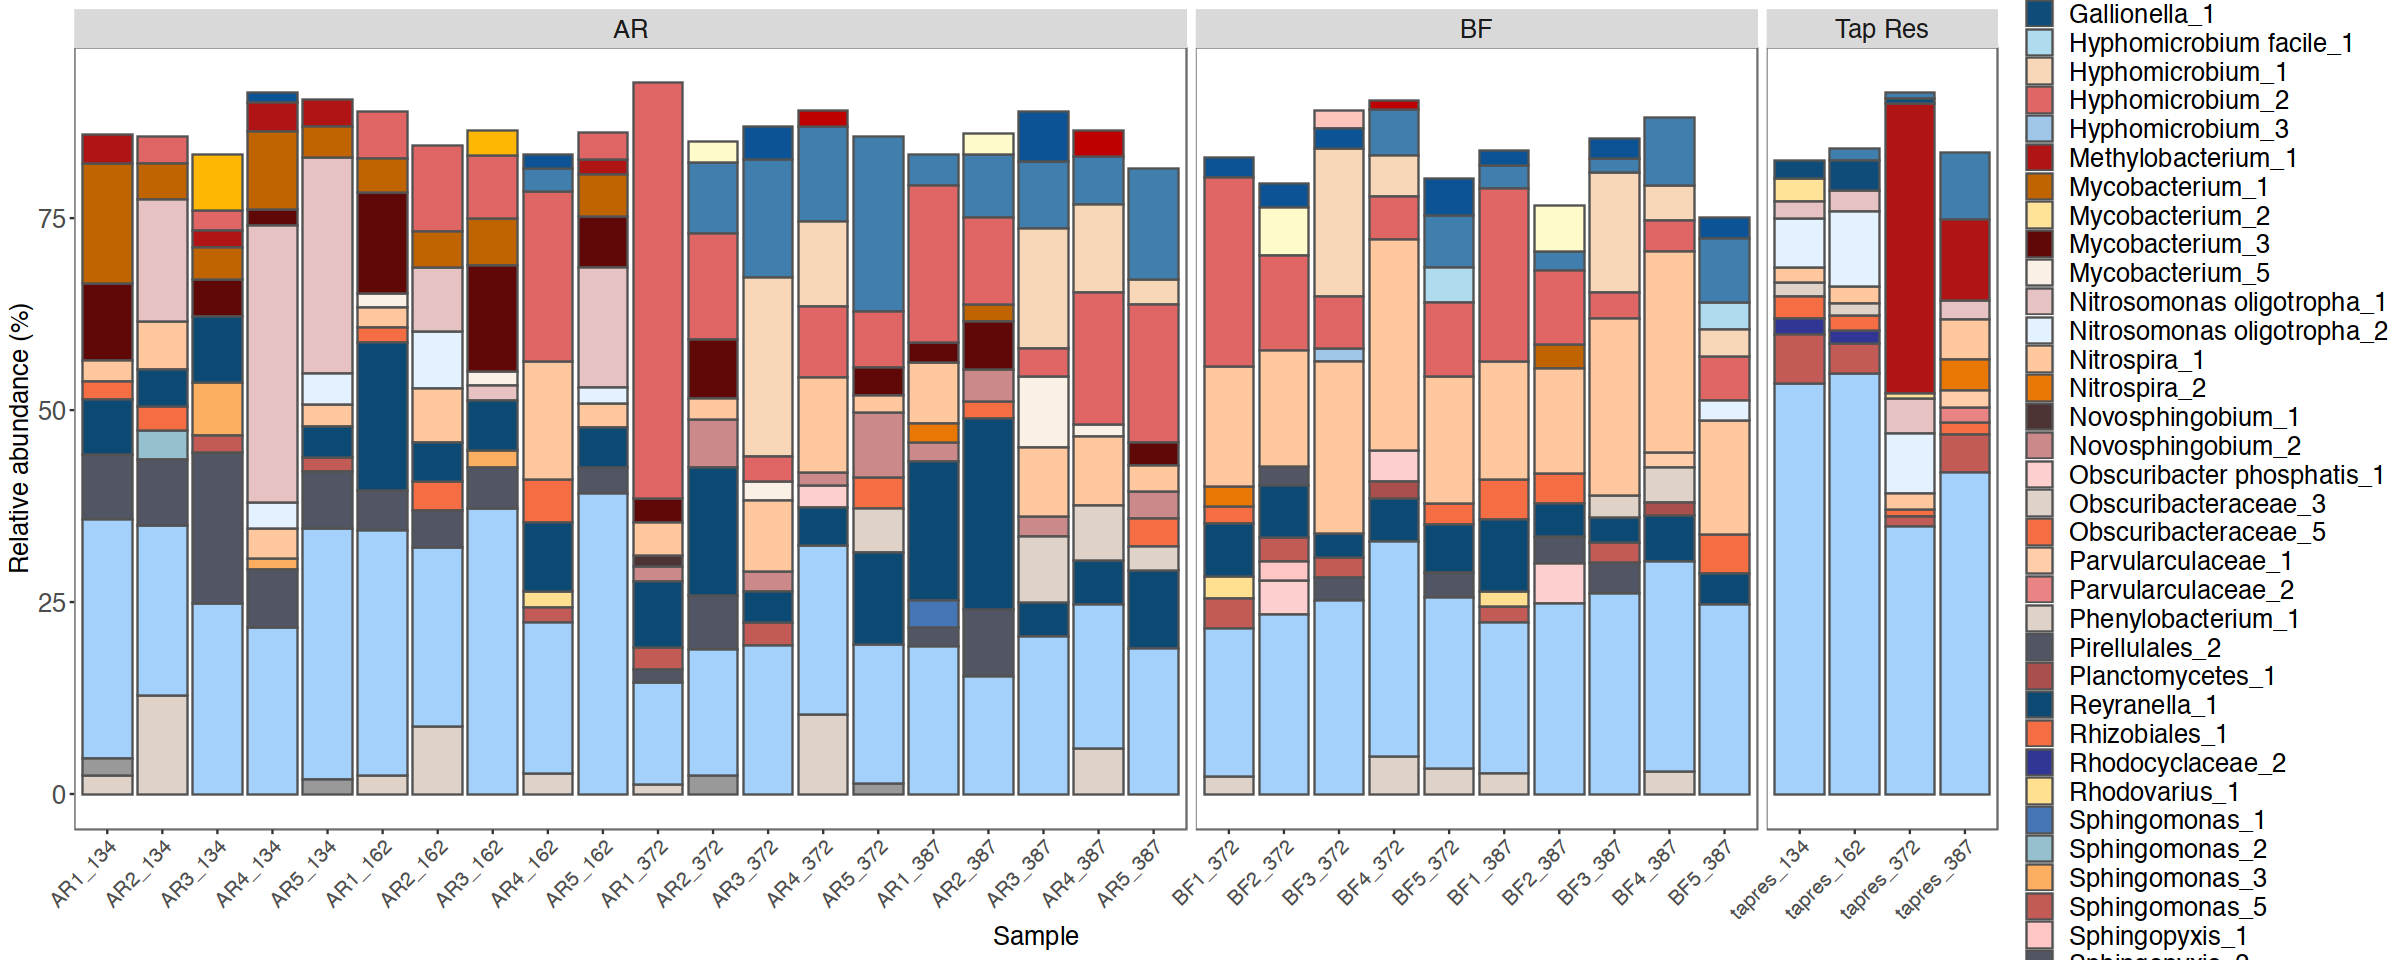

In [39]:
# Plot relative abundance by Bin

type.labs<- c("AR", "BF", "Tap Res")
options(repr.plot.width = 20, repr.plot.height = 8)

# Only 10 most abundant per location 
abu_data <- tax_nocontrols %>%
  group_by(sample_id) %>%
  top_n(coverage,n=10)

abu_data$type[abu_data$type == "tapres"] <- "Tap Res"

barplot_bin <- ggplot(abu_data, aes(fill = bin_tax_name,x=sample_id,y=coverage)) +
geom_bar(stat = "identity",color = "#525252")+
  scale_fill_manual(values = colors3, na.value = na.color) + 
  theme(panel.background=element_blank(), panel.border = element_rect(color = "#6c6c6c", fill = NA),
        axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=12),
        axis.text.y = element_text(size = 15),
        axis.title.y= element_text(size = 15),
        axis.title.x= element_text(size = 15),
        legend.text = element_text(size = 15),
        legend.title = element_text(size = 18), strip.text.x= element_text(size=15))+
    facet_grid(cols= vars(type), scale="free_x", space="free_x")+
#    facet_grid(.~type, scale = "free_x", space = "free_x",
#               labeller = labeller(x = tbl$id_short))+
   ylab("Relative abundance (%)") +
   xlab("Sample")+ 
   guides(fill=guide_legend(ncol=1,title = 'Bin'), labeller = labeller(type=type.labs ))


barplot_bin

In [40]:
# Create absolute abundance version of df

tax_nocontrols["TCC_all"] <- tax_nocontrols$TCC_gmean
tax_nocontrols$TCC_all[tax_nocontrols$type == "BF"] <- tax_nocontrols$bf_TCC_gmean[tax_nocontrols$type == "BF"]

tax_nocontrols["coverage_abs"] <- (tax_nocontrols$coverage) * (tax_nocontrols$TCC_all)


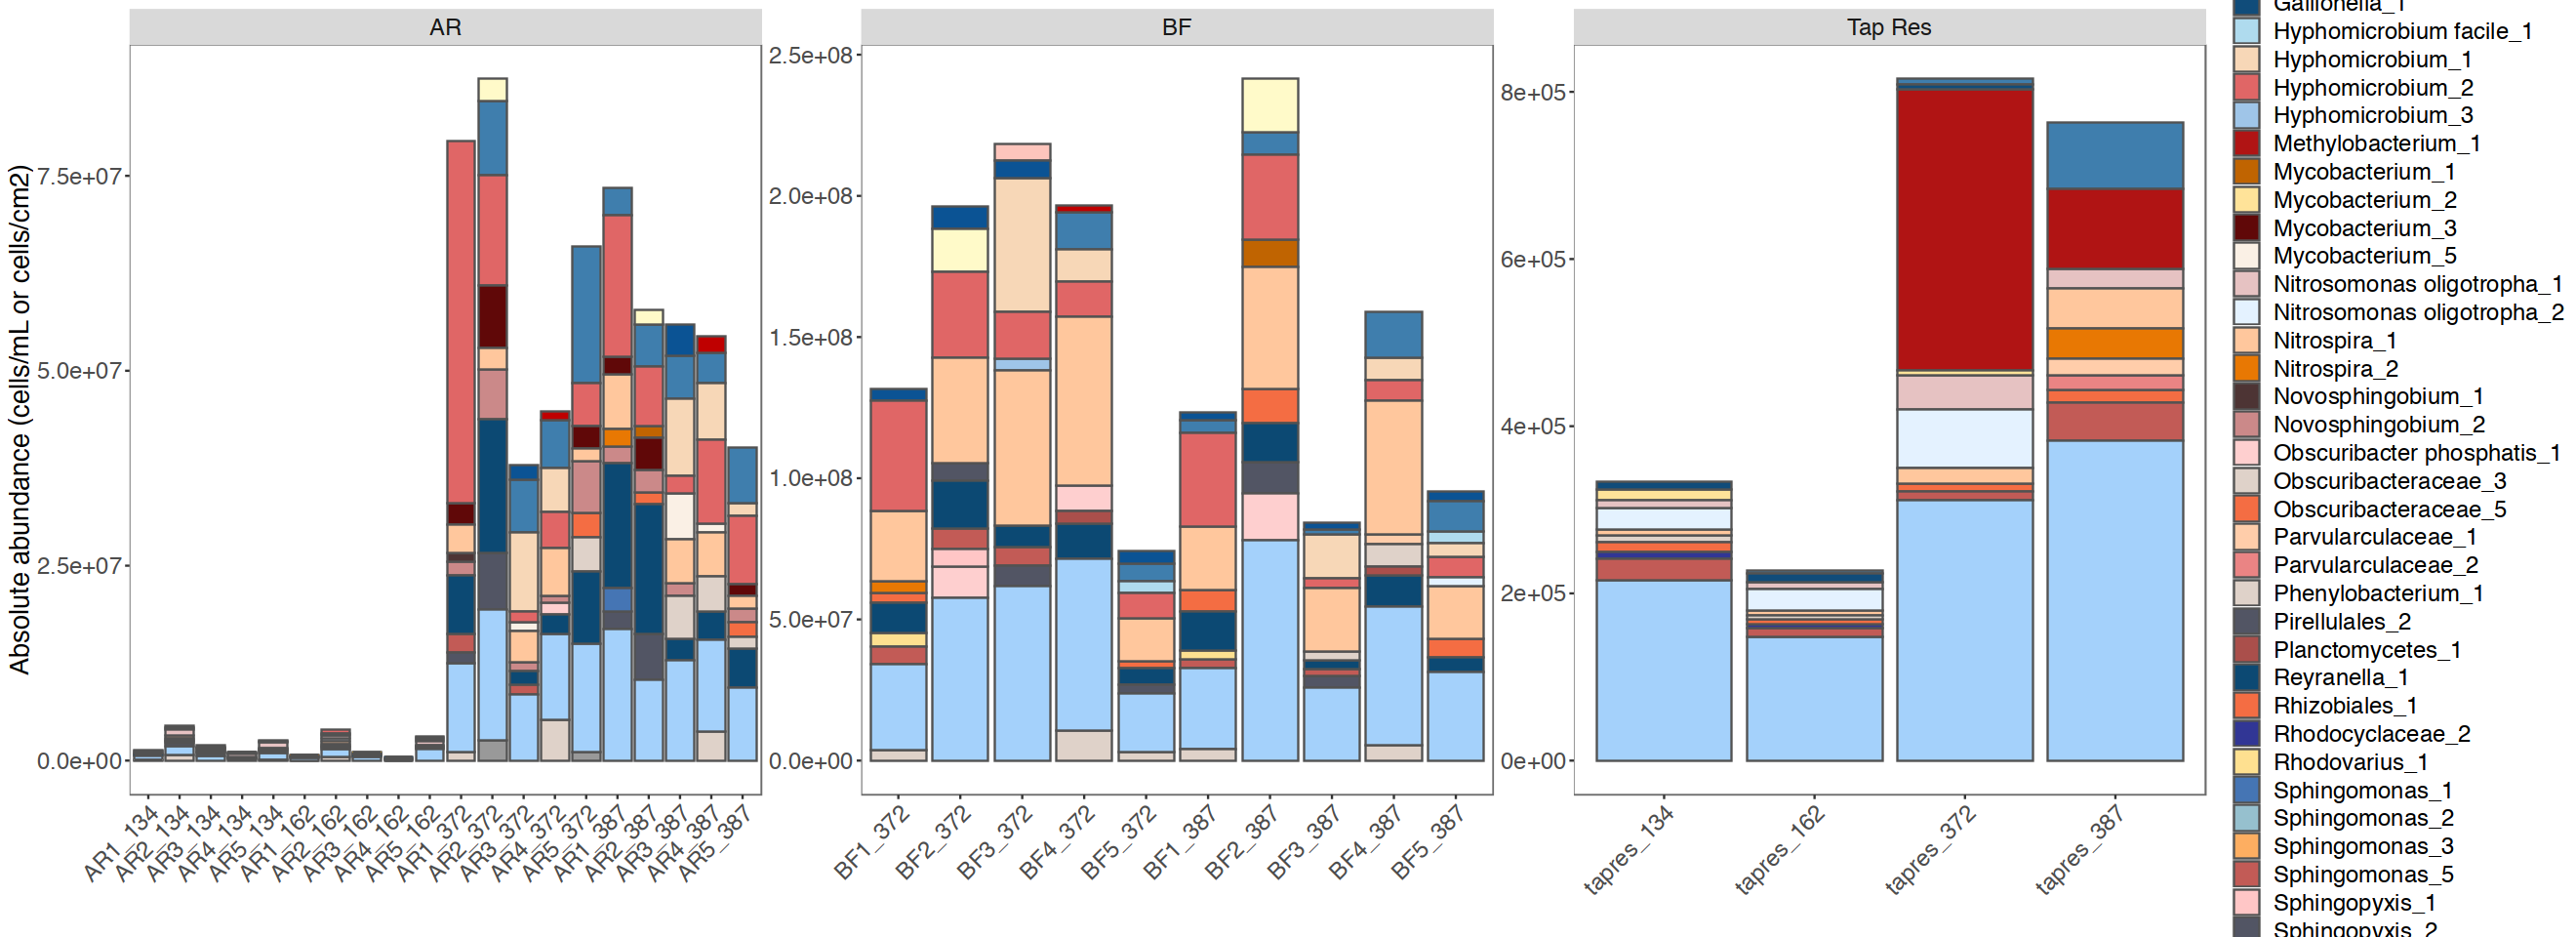

In [41]:
# Plot absolute abundance by Bin

# Only 10 most abundant per location 
abu_data <- tax_nocontrols %>%
  group_by(sample_id) %>%
  top_n(coverage_abs,n=10)

options(repr.plot.width = 22, repr.plot.height = 8)
abu_data$type[abu_data$type == "tapres"] <- "Tap Res"
fig_bar1 <- ggplot(abu_data, aes(fill = bin_tax_name,x=sample_id,y=coverage_abs)) +
    geom_bar(stat = "identity",color = "#525252")+
      scale_fill_manual(values = colors3, na.value = na.color) + 
      theme(panel.background=element_blank(), panel.border = element_rect(color = "#6c6c6c", fill = NA),
        axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=14),
        axis.text.y = element_text(size = 14),
        legend.text = element_text(size = 14),
        axis.title.x = element_text(size =16),
        axis.title.y = element_text(size=16),
        strip.text.x=element_text(size = 14),
        legend.title = element_text(size = 16))+
    facet_wrap( ~type, scales= "free", ncol=3)+
#    facet_grid(.~type, scale = "free_x", space = "free_x",
#               labeller = labeller(x = tbl$id_short))+
   ylab("Absolute abundance (cells/mL or cells/cm2)") +
   xlab("")+ 
   guides(fill=guide_legend(ncol=1,title = 'Bin'))

fig_bar1

`summarise()` has grouped output by 'bin_tax_name'. You can override using the
`.groups` argument.


bin_tax_name             type   max_conc mean_conc
1 Mycobacterium iranicum_1 AR        0.000    0.000 
2 Mycobacterium iranicum_1 BF        0.000    0.000 
3 Mycobacterium iranicum_1 tapres 6941.931 3954.794 
4 Rhodocyclaceae_1         AR        0.000    0.000 
5 Rhodocyclaceae_1         BF        0.000    0.000 
6 Rhodocyclaceae_1         tapres 5170.948 2631.513

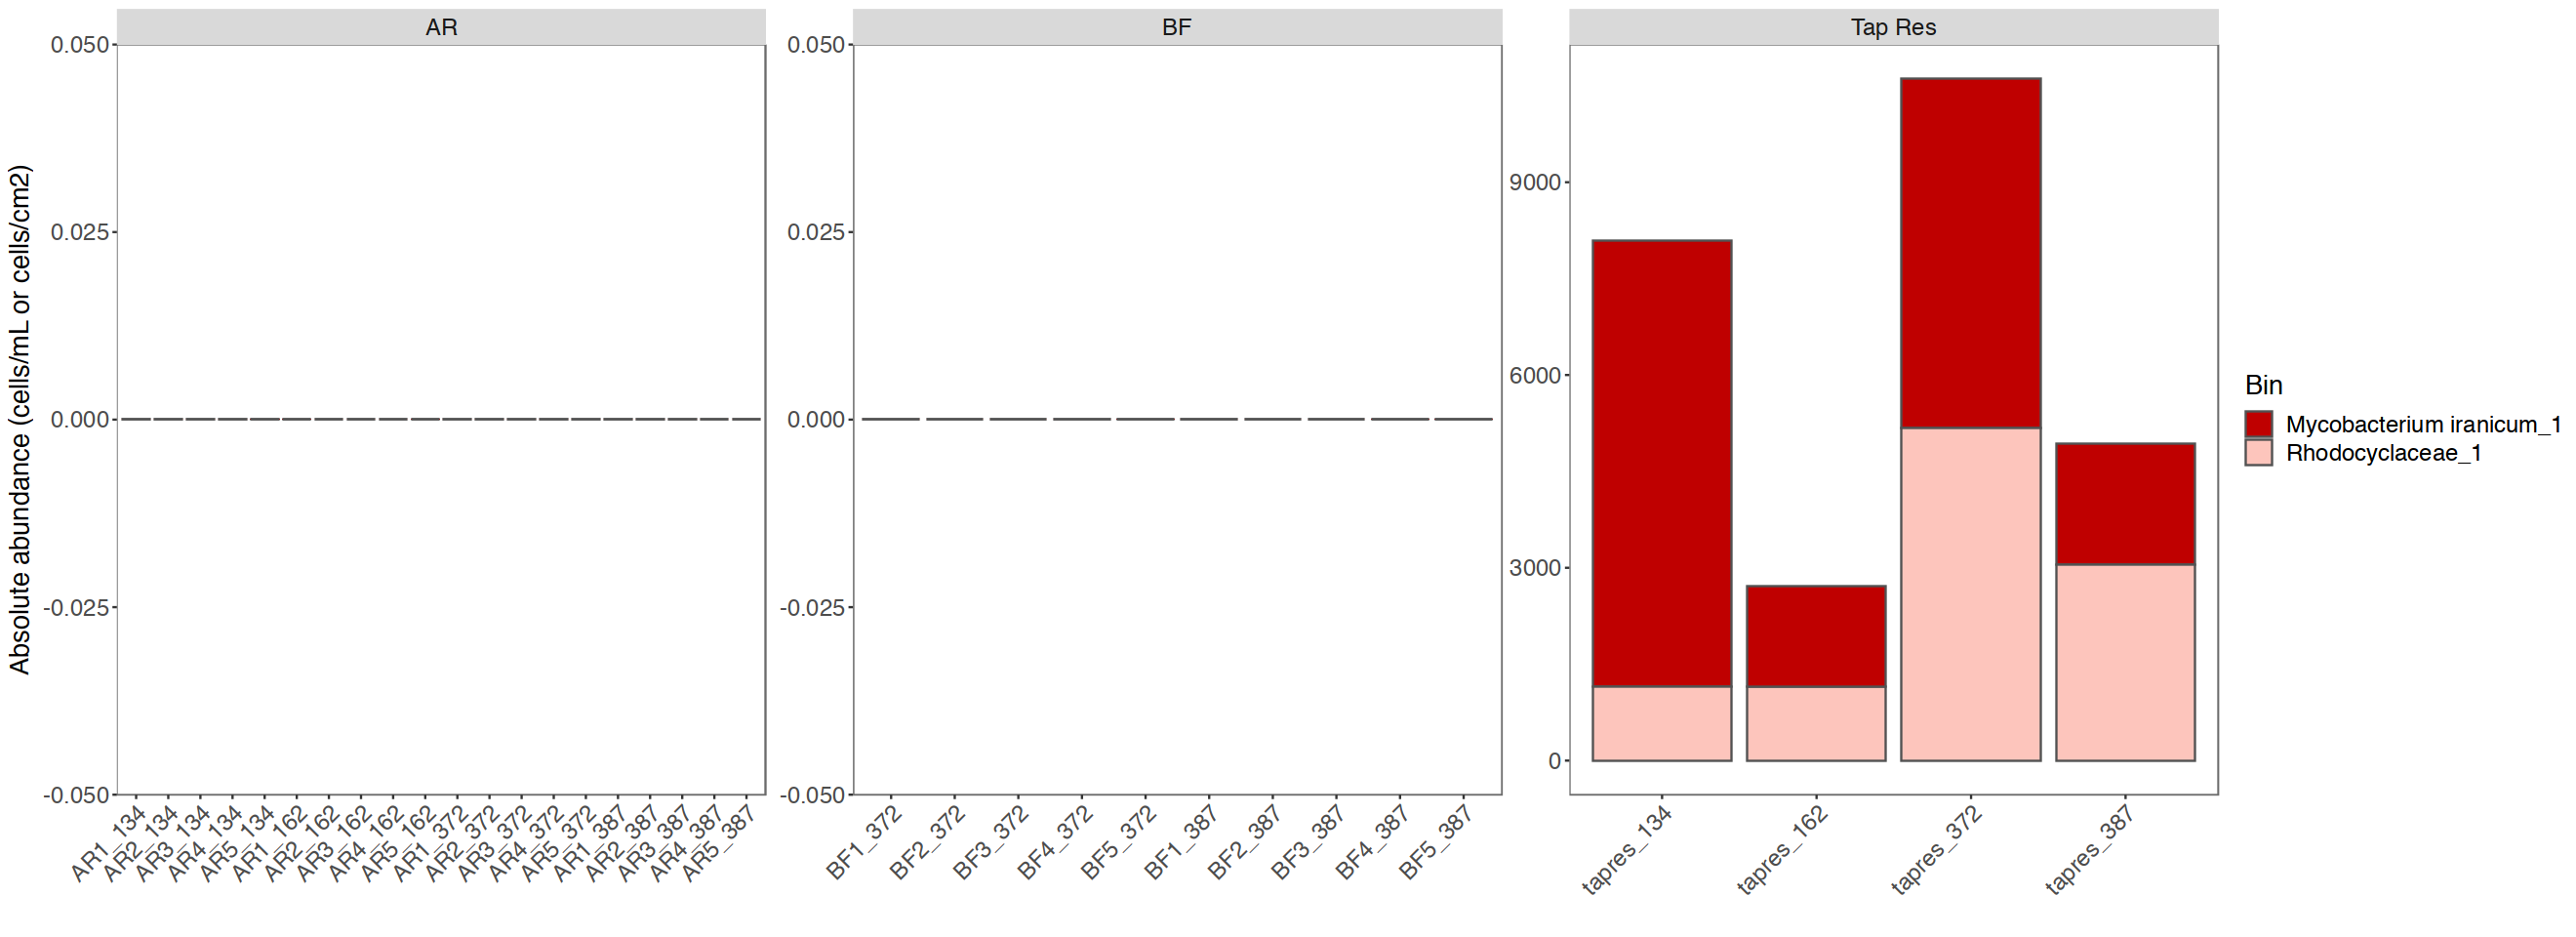

In [42]:
# Find absolute abundance of the opportunistic pathogens 

# Only 10 most abundant per location 
abu_data <- tax_nocontrols %>% filter(bin_tax_name == "Mycobacterium iranicum_1" | bin_tax_name == 'Rhodocyclaceae_1')
abu_data %>% group_by(bin_tax_name, type) %>% dplyr::summarise(max_conc = max(coverage_abs), mean_conc = mean(coverage_abs, na.rm= TRUE))

options(repr.plot.width = 22, repr.plot.height = 8)
abu_data$type[abu_data$type == "tapres"] <- "Tap Res"
fig_pathogen <- ggplot(abu_data, aes(fill = bin_tax_name,x=sample_id,y=coverage_abs)) +
    geom_bar(stat = "identity",color = "#525252")+
      scale_fill_manual(values = colors3, na.value = na.color) + 
      theme(panel.background=element_blank(), panel.border = element_rect(color = "#6c6c6c", fill = NA),
        axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=14),
        axis.text.y = element_text(size = 14),
        legend.text = element_text(size = 14),
        axis.title.x = element_text(size =16),
        axis.title.y = element_text(size=16),
        strip.text.x=element_text(size = 14),
        legend.title = element_text(size = 16))+
    facet_wrap( ~type, scales= "free", ncol=3)+
#    facet_grid(.~type, scale = "free_x", space = "free_x",
#               labeller = labeller(x = tbl$id_short))+
   ylab("Absolute abundance (cells/mL or cells/cm2)") +
   xlab("")+ 
   guides(fill=guide_legend(ncol=1,title = 'Bin'))

fig_pathogen

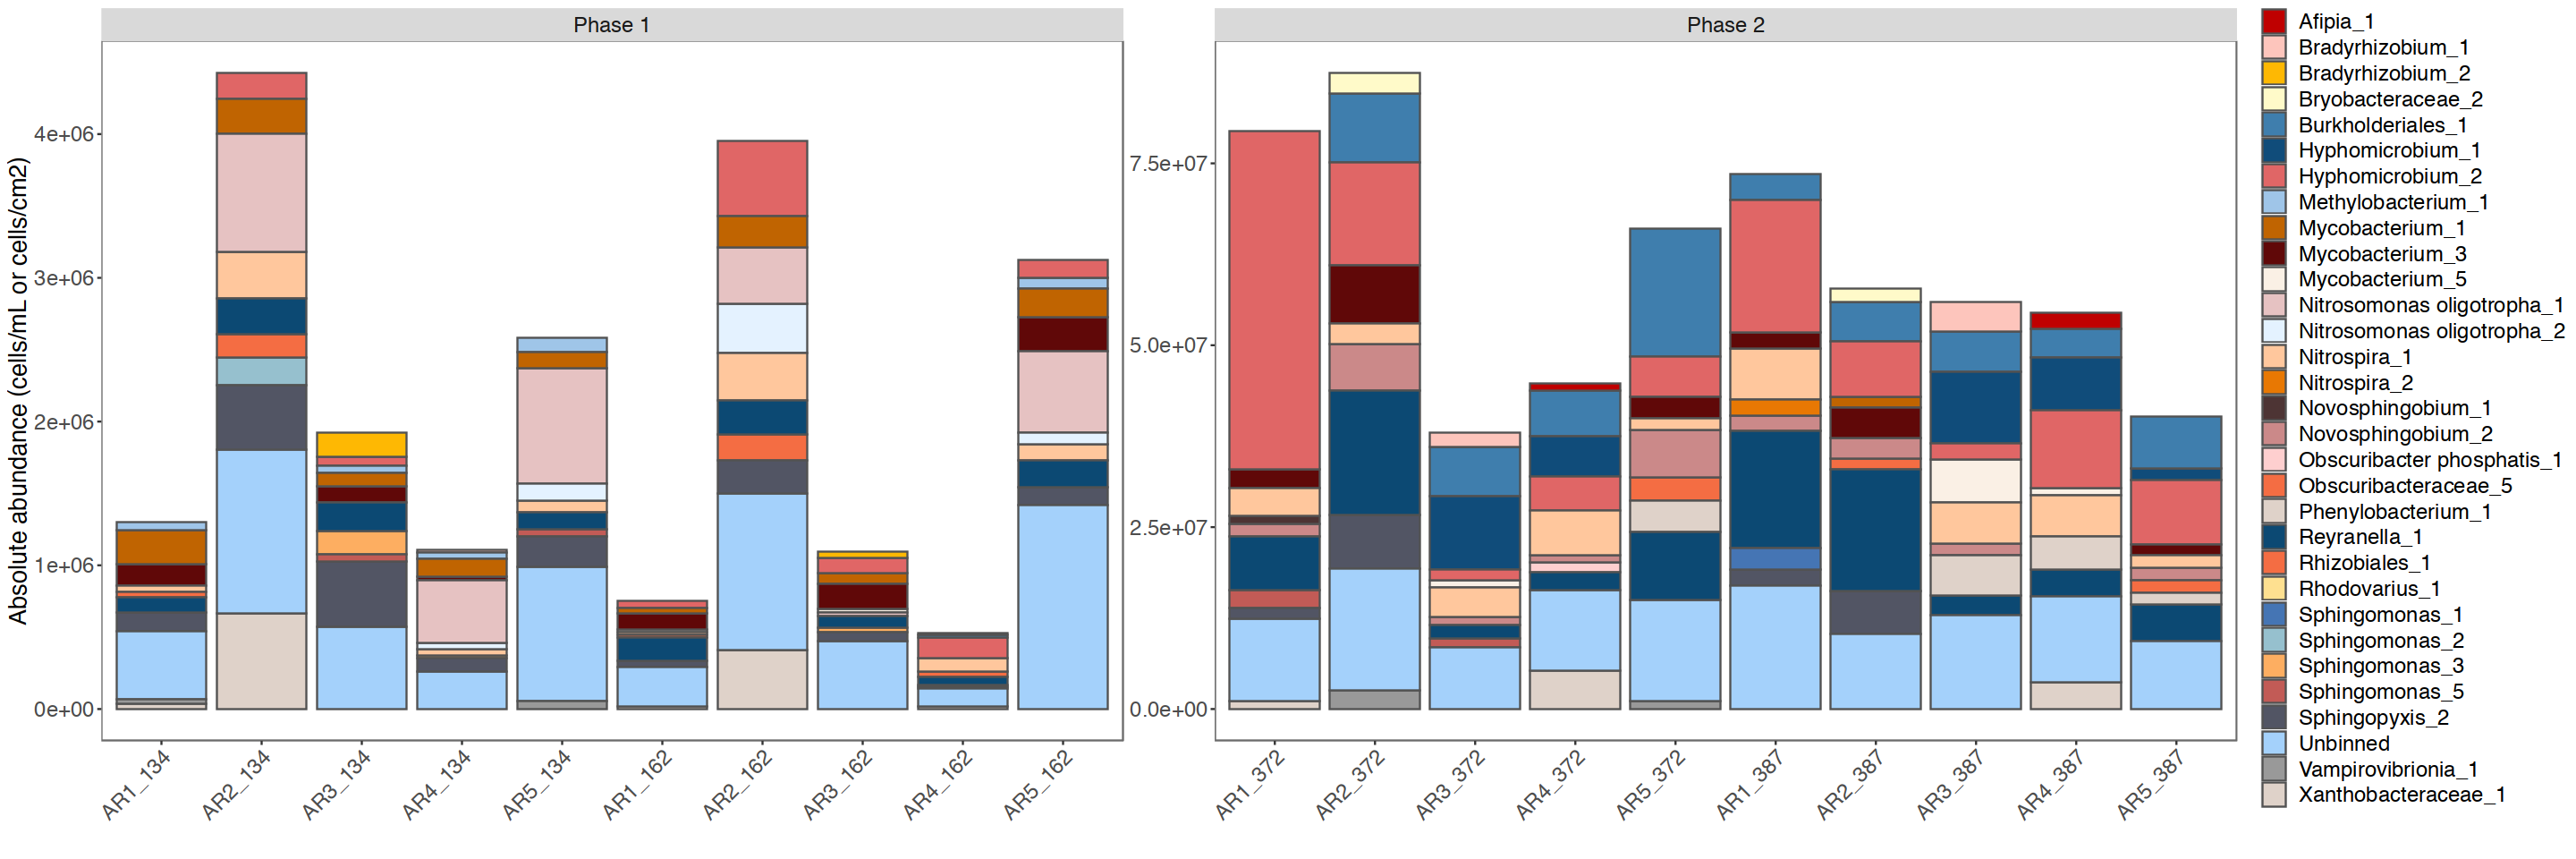

In [43]:
# Plot absolute abundance by Bin of only AR 

genus_ARonly <- tax_nocontrols %>% subset(type == "AR")

# Only 10 most abundant per location 
abu_data <- genus_ARonly %>%
  group_by(sample_id) %>%
  top_n(coverage_abs,n=10)

colors3 <- c("#BF0000","#fdc5bc","#0b5394","#feb803","#fffac9","#3f7ead","#104c7a","#afdbee","#f7d7b7","#e06666",
             "#9fc5e8", "#b01414","#c06401","#ffe399","#600808","#faf0e5","#e6c2c2","#e4f2ff","#ffc79d","#e87803",
             #"#999999","#eeeeee","#bcbcbc","#5b5b5b", #16-20 rearrange, 31 change from grey
             #nice set until here - others are extra
            "#4d3434", "#cb8989","#fecfcf", "#dfd2c9","#f46d43","#ffcdaa","#EA8484","#dfd2c9","#525564","#aa4f4b",
             "#0c4973","#f46d43","#313695","#fee090","#4575b4","#96c0ce", "#fdae61","#c25b56","#ffc6c6","#525564",
             "#fecfcf","#a4d1fb","#999999", "#dfd2c9","#c25b56","#313695","#D73027","#313695","#FEE090","#F46D43",
             "#E4DFB6","#858585","#B78A8A","#d7eff5", "#CE6924","#2B2F7D","#FEF6EB","#a50026", "#74828f") 

colors4 <- c("#BF0000","#fdc5bc","#feb803","#fffac9","#3f7ead","#104c7a", "#e06666","#9fc5e8","#c06401","#600808",
             "#faf0e5","#e6c2c2","#e4f2ff","#ffc79d","#e87803","#4d3434", "#cb8989","#fecfcf", "#f46d43","#dfd2c9",
             "#0c4973","#f46d43","#fee090","#4575b4","#96c0ce", "#fdae61","#c25b56","#525564",
             "#a4d1fb","#999999", "#dfd2c9","#c25b56","#313695","#D73027","#313695","#FEE090","#F46D43",
             "#E4DFB6","#858585","#B78A8A","#d7eff5", "#CE6924","#2B2F7D","#FEF6EB","#a50026", "#74828f") 

options(repr.plot.width = 24, repr.plot.height = 8)
abu_data$type[abu_data$type == "tapres"] <- "Tap Res"
abu_data$phase[abu_data$phase == "1"] <- "Phase 1"
abu_data$phase[abu_data$phase == "2"] <- "Phase 2"
fig_bar2 <- ggplot(abu_data, aes(fill = bin_tax_name,x=sample_id,y=coverage_abs)) +
    geom_bar(stat = "identity",color = "#525252")+
      scale_fill_manual(values = colors4, na.value = na.color) + 
      theme(panel.background=element_blank(), panel.border = element_rect(color = "#6c6c6c", fill = NA),
        axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=14),
        axis.text.y = element_text(size = 14),
        legend.text = element_text(size = 14),
        axis.title.x = element_text(size =16),
        axis.title.y = element_text(size=16),
        strip.text.x=element_text(size = 14),
        legend.title = element_text(size = 16))+
    facet_wrap( ~phase, scales= "free", ncol=2)+
#    facet_grid(.~type, scale = "free_x", space = "free_x",
#               labeller = labeller(x = tbl$id_short))+
   ylab("Absolute abundance (cells/mL or cells/cm2)") +
   xlab("")+ 
   guides(fill=guide_legend(ncol=1,title = 'Bin'))

fig_bar2

#NEED TO FIX COLORS SO THEY'RE THE SAME AS ABOVE

Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”


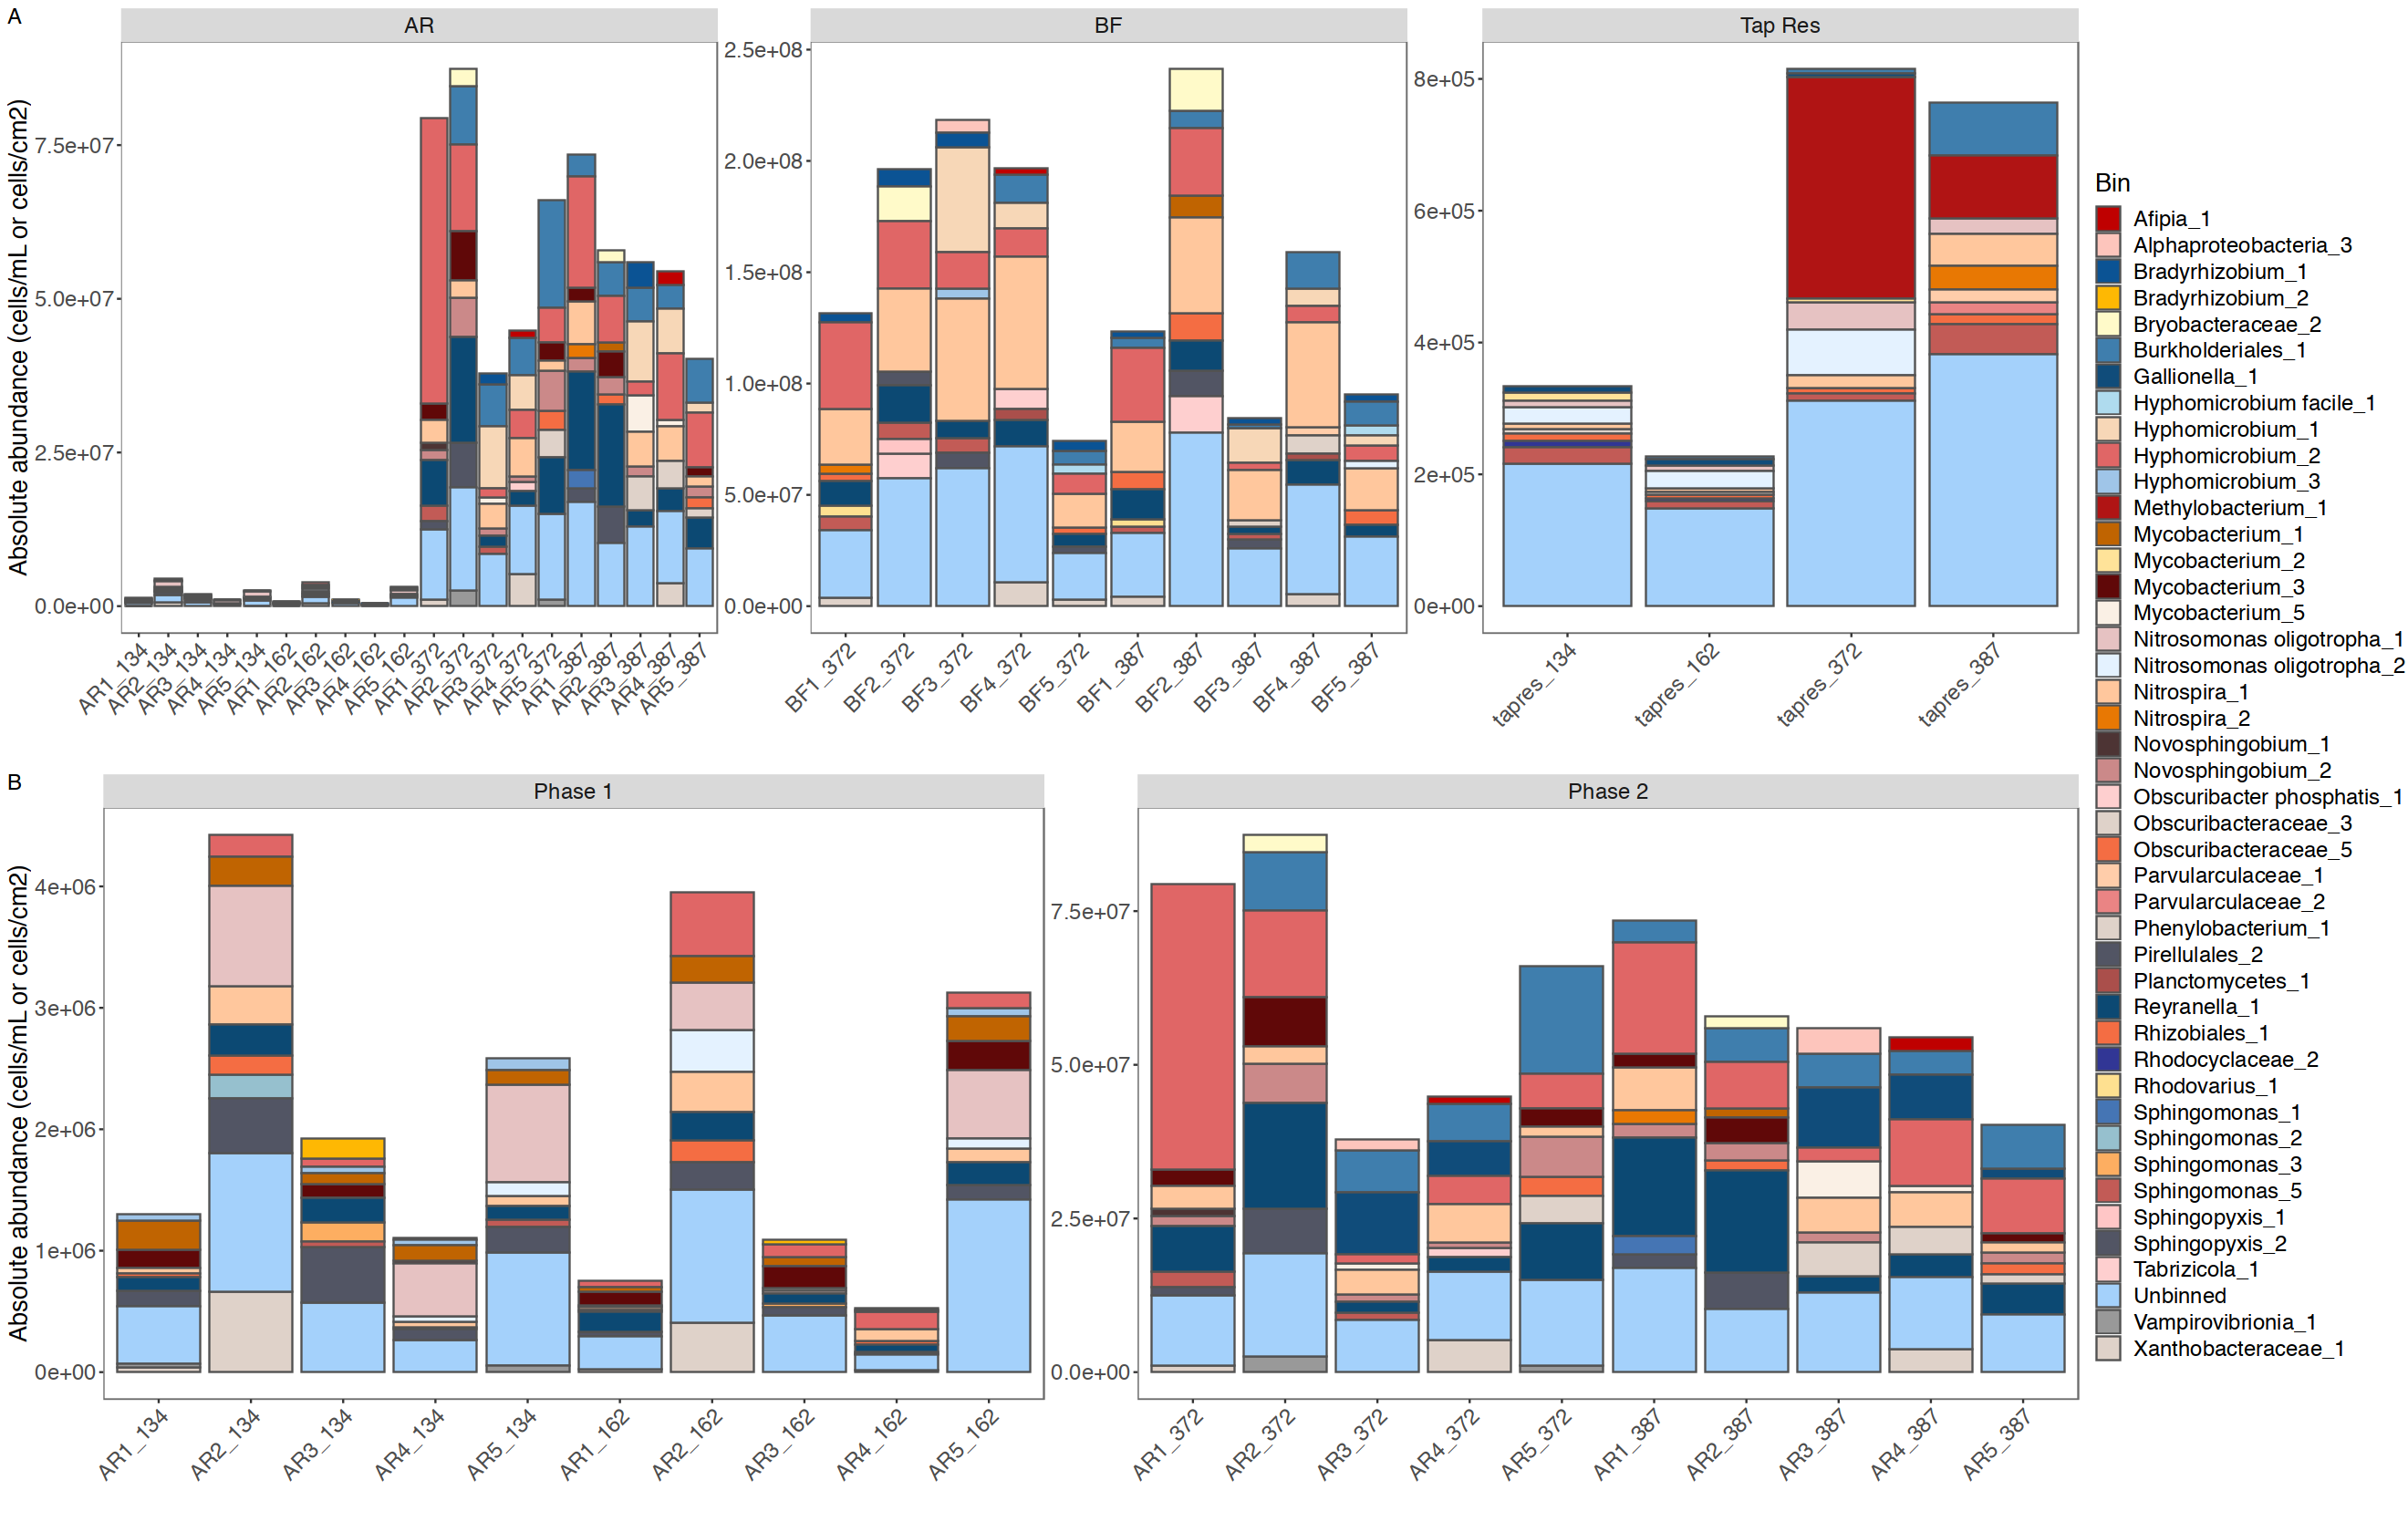

In [44]:
#arrange plots for figure together
options(repr.plot.width = 22, repr.plot.height = 14)
fig_5<- ggarrange(fig_bar1,fig_bar2, ncol=1, nrow=2, labels= c("A", "B"), font.label = list(size = 14, color = "black", face = "bold", family = NULL), legend = "right", common.legend = T, align = c("hv"))
fig_5

# ggsave(paste0(fig_dir, 'qpcr.jpeg'), width=12, height=10)

In [45]:
# Export
# ggsave("/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/AR_metagenomics/figures/MAG_barplot.png",barplot_genus, 
#        device="png", dpi = dpi, width=10, height=7)


# Venn diagrams

In [46]:
getwd()

[1] "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/AR-Water-Quality-Data"

In [47]:
# all dates

# colnames(tax_nocontrols)

# tax_nocontrols %>% group_by(type, day, bin_tax_name) %>% dplyr::select(type, day, bin_tax_name, coverage) %>% subset(coverage > 0) %>% subset(bin_tax_name != 'Unbinned') %>% 
#     group_by(type, day) %>% dplyr::summarise(count= n())

#MAGs in tap reservoir
res_MAGs <- tax_nocontrols  %>% dplyr::select(type, day, bin_tax_name, coverage) %>% subset(coverage > 0) %>% subset(bin_tax_name != 'Unbinned') %>% subset(type== 'tapres')
set1 <- res_MAGs$bin_tax_name

#MAGs in AR bulk
bulk_MAGs <- tax_nocontrols  %>% dplyr::select(type, day, bin_tax_name, coverage) %>% subset(coverage > 0) %>% subset(bin_tax_name != 'Unbinned') %>% subset(type== 'AR')
set2 <- bulk_MAGs$bin_tax_name

#Mags in bf
bf_MAGs <- tax_nocontrols  %>% dplyr::select(type, day, bin_tax_name, coverage) %>% subset(coverage > 0) %>% subset(bin_tax_name != 'Unbinned') %>% subset(type== 'BF')
set3 <- bf_MAGs$bin_tax_name

myCol <- brewer.pal(3, "Pastel2")

venn.diagram(
  x = list(set1, set2, set3),
  category.names = c("Tap Res" , "AR Bulk " , "AR BF"),
  filename = '#14_venn_diagramm.png',
    # Circles
        lwd = 2,
        lty = 'blank',
        fill = myCol,
  output=TRUE
)

[1] 1

In [48]:
# sampling event 1

#MAGs in tap reservoir
res_MAGs <- tax_nocontrols  %>% dplyr::select(type, day, bin_tax_name, coverage) %>% subset(coverage > 0) %>% subset(bin_tax_name != 'Unbinned') %>% subset(type== 'tapres') %>% subset(day== 134)
set1 <- res_MAGs$bin_tax_name

#MAGs in AR bulk
bulk_MAGs <- tax_nocontrols  %>% dplyr::select(type, day, bin_tax_name, coverage) %>% subset(coverage > 0) %>% subset(bin_tax_name != 'Unbinned') %>% subset(type== 'AR') %>% subset(day== 134)
set2 <- bulk_MAGs$bin_tax_name

venn.diagram(
  x = list(set1, set2),
  category.names = c("Tap\nRes\n" , "AR\nBulk\n"),
  filename = '#14_venn_diagramm.png',
    cex= 2, cat.cex=2, 
  output=TRUE
)

[1] 1

In [49]:
# sampling event 2

#MAGs in tap reservoir
res_MAGs <- tax_nocontrols  %>% dplyr::select(type, day, bin_tax_name, coverage) %>% subset(coverage > 0) %>% subset(bin_tax_name != 'Unbinned') %>% subset(type== 'tapres') %>% subset(day== 162)
set1 <- res_MAGs$bin_tax_name

#MAGs in AR bulk
bulk_MAGs <- tax_nocontrols  %>% dplyr::select(type, day, bin_tax_name, coverage) %>% subset(coverage > 0) %>% subset(bin_tax_name != 'Unbinned') %>% subset(type== 'AR') %>% subset(day== 162)
set2 <- bulk_MAGs$bin_tax_name

venn.diagram(
  x = list(set1, set2),
  category.names = c("\nTap\nRes" , "\nAR\nBulk"),
  filename = '#14_venn_diagramm.png',
    cex= 2, cat.cex=2, 
  output=TRUE
)

[1] 1

In [50]:
# sampling event 3

#MAGs in tap reservoir
res_MAGs <- tax_nocontrols  %>% dplyr::select(type, day, bin_tax_name, coverage) %>% subset(coverage > 0) %>% subset(bin_tax_name != 'Unbinned') %>% subset(type== 'tapres') %>% subset(day== 372)
set1 <- res_MAGs$bin_tax_name

#MAGs in AR bulk
bulk_MAGs <- tax_nocontrols  %>% dplyr::select(type, day, bin_tax_name, coverage) %>% subset(coverage > 0) %>% subset(bin_tax_name != 'Unbinned') %>% subset(type== 'AR') %>% subset(day== 372)
set2 <- bulk_MAGs$bin_tax_name

venn.diagram(
  x = list(set1, set2),
  category.names = c("\nTap\nRes" , "\nAR\nBulk"),
  filename = '#14_venn_diagramm.png',
    cex= 2, cat.cex=2, 
  output=TRUE
)

[1] 1

In [51]:
# sampling event 4

#MAGs in tap reservoir
res_MAGs <- tax_nocontrols  %>% dplyr::select(type, day, bin_tax_name, coverage) %>% subset(coverage > 0) %>% subset(bin_tax_name != 'Unbinned') %>% subset(type== 'tapres') %>% subset(day== 387)
set1 <- res_MAGs$bin_tax_name

#MAGs in AR bulk
bulk_MAGs <- tax_nocontrols  %>% dplyr::select(type, day, bin_tax_name, coverage) %>% subset(coverage > 0) %>% subset(bin_tax_name != 'Unbinned') %>% subset(type== 'AR') %>% subset(day== 387)
set2 <- bulk_MAGs$bin_tax_name

venn.diagram(
  x = list(set1, set2),
  category.names = c("Tap\nRes\n" , "AR\nBulk\n"),
  filename = '#14_venn_diagramm.png',
    cex= 2, cat.cex=2, 
  output=TRUE
)

[1] 1

In [52]:
unique(tax_nocontrols$day)

[1] 134 162 372 387

# PERMANOVA analysis 

https://stats.stackexchange.com/questions/188519/adonis-in-vegan-order-of-variables-or-use-of-strata

In [53]:
#Manipulate the metadata df

arbf_nocontrols <- arbf %>% filter(replicate != "B") %>% filter(replicate != "C") %>% filter(sample_id != "slidecontrol_387") %>% 
                filter(sample_id != "manifcontrol_387") %>% filter(sample_id != "control_mock1e8") %>% filter(sample_id != "control_mock1e10") 
arbf2 <- subset(arbf_nocontrols, select= c(sample_id, ARBF, type, day, phase, AR, sampling_event, AR_num, cl_total, temp, pH)) %>% subset(sample_id %in% ids)
arbf2$phase <- unlist(arbf2$phase)
rownames <- arbf2$sample_id
arbf2 <- subset(arbf2, select= -c(sample_id))
row.names(arbf2) <- rownames
head(arbf2)

cov_wide_nocontrols[is.na(cov_wide_nocontrols)] <- 0

ar_df <- arbf2 %>% filter(type == "AR")
tax_aronly <- cov_wide_nocontrols[!str_detect(rownames(cov_wide_nocontrols), "tapres") & !str_detect(rownames(cov_wide_nocontrols), "BF"), ]
# ar_df

arbf_notap <- arbf2 %>% filter(type != "tapres")

coverage_norm_nocontrols <- cov_wide_nocontrols


Warning message:
“Setting row names on a tibble is deprecated.”


ARBF type   day phase AR     sampling_event AR_num cl_total temp pH  
1 AR   AR     134 1     AR1    23             1      1.18     22.3 7.92
2 AR   AR     134 1     AR2    23             2      0.65     22.3 7.55
3 AR   AR     134 1     AR3    23             3      1.09     22.3 8.09
4 AR   AR     134 1     AR4    23             4      1.07     22.3 8.01
5 AR   AR     134 1     AR5    23             5      1.00     22.2 7.98
6 AR   tapres 134 1     tapres 23             tapres 1.64     22.8 8.47

In [54]:
#by phase, no controls, no tap
coverage_p1_notap <- cov_wide_notap[str_detect(rownames(cov_wide_notap), "134") | str_detect(rownames(cov_wide_notap), "162"), ]
coverage_p2_notap <- cov_wide_notap[str_detect(rownames(cov_wide_notap), "372") | str_detect(rownames(cov_wide_notap), "387"), ]

arbf_p1_notap <- arbf2 %>% filter(phase == 1) %>% filter(type != "tapres")
arbf_p2_notap <- arbf2 %>% filter(phase == 2)%>% filter(type != "tapres")
# kegg_table[label][str_detect(kegg_table$kofam_hits_in_module, as.character(KO)),] <- 1

In [55]:
# phase 2, no bf
coverage_p2_nobf <- cov_wide_nobf[str_detect(rownames(cov_wide_nobf), "372") | str_detect(rownames(cov_wide_nobf), "387"), ]
arbf_p2_nobf <- arbf2 %>% filter(phase == 2)%>% filter(type != "BF")

#phase 2, ar only
coverage_p2_aronly <- tax_aronly[str_detect(rownames(tax_aronly), "372") | str_detect(rownames(tax_aronly), "387"), ]
arbf_p2_aronly <- arbf2 %>% filter(phase == 2)%>% filter(type == "AR")

coverage_p2_aronly
arbf_p2_aronly

Xanthobacteraceae_1 Hyphomicrobium_3 Nitrosomonas oligotropha_1
AR1_372  1.2104626          0.32129256       0.14677894                
AR2_372  0.3107170          0.11823160       0.00000000                
AR3_372  0.3263150          0.41296120       0.20769356                
AR4_372 10.3921502          0.16500777       0.40321937                
AR5_372  0.4925942          0.08011882       0.07245744                
AR1_387  0.9293031          0.20098441       0.25333085                
AR2_387  0.1944918          0.05404414       0.00000000                
AR3_387  0.1125673          0.16789335       0.17446320                
AR4_387  5.8835927          0.19002377       0.23686517                
AR5_387  0.6538585          0.00000000       0.09657400                
        Rhodovarius_1 Bryobacteraceae_1 Pirellulales_1 Bradyrhizobium_1
AR1_372 0.69521051    0.06894863        0.06457755     0.4410490       
AR2_372 0.00000000    0.00000000        0.00000000     1.1503661       
AR3_372 0.16262491    0.04570745        0.00000000     4.3978496       
AR4_372 0.55287349    0.00000000        0.00000000     0.5407142       
AR5_372 0.12435172    0.00000000        0.05172555     0.6331886       
AR1_387 0.81097911    0.09075877        0.09040529     0.8645370       
AR2_387 0.08130246    0.00000000        0.00000000     0.3243956       
AR3_387 0.06888066    0.09672661        0.00000000     6.4341300       
AR4_387 0.29387642    0.00000000        0.00000000     0.8461567       
AR5_387 0.17081087    0.00000000        0.00000000     0.6631976       
        Sphingomonas_1 Caulobacter_1 Alphaproteobacteria_2 ⋯
AR1_372 1.07664442     0.000000      0.1618341             ⋯
AR2_372 0.52157290     0.000000      0.0000000             ⋯
AR3_372 0.16845927     0.000000      0.0000000             ⋯
AR4_372 0.43397717     0.000000      0.0000000             ⋯
AR5_372 0.46953086     0.000000      0.0000000             ⋯
AR1_387 3.40159926     0.272817      0.2765926             ⋯
AR2_387 0.65304539     0.000000      0.0000000             ⋯
AR3_387 0.07322807     0.000000      0.0000000             ⋯
AR4_387 1.39868028     0.000000      0.0000000             ⋯
AR5_387 1.88871126     0.000000      0.0000000             ⋯
        Obscuribacter phosphatis_2 Hyphomicrobiaceae_1 Hyphomicrobium_4
AR1_372 0                          0                   0               
AR2_372 0                          0                   0               
AR3_372 0                          0                   0               
AR4_372 0                          0                   0               
AR5_372 0                          0                   0               
AR1_387 0                          0                   0               
AR2_387 0                          0                   0               
AR3_387 0                          0                   0               
AR4_387 0                          0                   0               
AR5_387 0                          0                   0               
        Hyphomicrobium_5 Chryseoglobus_1 Lacibacter Sphingomonas_5
AR1_372 0                0               0          2.8377150     
AR2_372 0                0               0          1.2173189     
AR3_372 0                0               0          2.9766436     
AR4_372 0                0               0          0.2826231     
AR5_372 0                0               0          0.8980479     
AR1_387 0                0               0          2.1449849     
AR2_387 0                0               0          0.7195700     
AR3_387 0                0               0          1.8924964     
AR4_387 0                0               0          0.2571769     
AR5_387 0                0               0          0.8591189     
        Parvularculaceae_2 Phycisphaerales_1 Nitrospira_2
AR1_372 0.00000000         0                 0.74535172  
AR2_372 0.00000000         0                 0.00000000  
AR3_372 0.00000000         0                 0.064

ARBF type day phase AR  sampling_event AR_num cl_total temp pH  
1  AR   AR   372 2     AR1 40             1      0.04     24.4 7.56
2  AR   AR   372 2     AR2 40             2      0.01     24.5 7.42
3  AR   AR   372 2     AR3 40             3      0.05     24.5 7.40
4  AR   AR   372 2     AR4 40             4      0.00     24.4 7.38
5  AR   AR   372 2     AR5 40             5      0.00     24.6 7.40
6  AR   AR   387 2     AR1 41             1      0.00     23.1 7.69
7  AR   AR   387 2     AR2 41             2      0.01     23.4 7.52
8  AR   AR   387 2     AR3 41             3      0.00     23.3 7.38
9  AR   AR   387 2     AR4 41             4      0.07     23.3 7.41
10 AR   AR   387 2     AR5 41             5      0.06     23.5 7.40

In [56]:
#by phase, no controls
coverage_p1 <- cov_wide_nocontrols[str_detect(rownames(cov_wide_nocontrols), "134") | str_detect(rownames(cov_wide_nocontrols), "162"), ]
coverage_p2 <- cov_wide_nocontrols[str_detect(rownames(cov_wide_nocontrols), "372") | str_detect(rownames(cov_wide_nocontrols), "387"), ]

arbf_p1 <- arbf2 %>% filter(phase == 1) 
arbf_p2 <- arbf2 %>% filter(phase == 2)
# kegg_table[label][str_detect(kegg_table$kofam_hits_in_module, as.character(KO)),] <- 1

In [57]:
##CLR-transformed Euclidean distance (Aitchison distance) 
##Suggested in Gloor et al 2017: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5695134/

cov_clr <- microbiome::transform(coverage_norm_nocontrols, transform='clr')
stag.dist <- vegdist(cov_clr, method="euclidean")

#run adonis2 on variables individually then order for combined permanova
# stag.div <- adonis2(stag.dist ~ AR_num,  data = arbf2, permutations = 999, method="euclidean") #32%
# stag.div <- adonis2(stag.dist ~ AR,  data = arbf2, permutations = 999, method="euclidean")  #54%
# stag.div <- adonis2(stag.dist ~ phase,  data = arbf2, permutations = 999, method="euclidean")  #R2= 27%
# stag.div <- adonis2(stag.dist ~ day,  data = arbf2, permutations = 999, method="euclidean")  #R2= 28%
# stag.div <- adonis2(stag.dist ~ type,  data = arbf2, permutations = 999, method="euclidean")  #16%
# stag.div <- adonis2(stag.dist ~ ARBF,  data = arbf2, permutations = 999, method="euclidean")  #12.8%

stag.div <- adonis2(stag.dist ~ AR_num + phase/day+ type  ,  data = arbf2, permutations = 999, method="euclidean") #strata= arbf2$phase,

stag.div



Df SumOfSqs   R2         F          Pr(>F)
AR_num     5  2045.5161 0.12009494  1.0762298 0.353 
phase      1  4630.8538 0.27188352 12.1824086 0.001 
type       1   223.6788 0.01313248  0.5884329 0.806 
phase:day  1   629.2855 0.03694618  1.6554644 0.111 
Residual  25  9503.1572 0.55794287         NA    NA 
Total     33 17032.4915 1.00000000         NA    NA

In [58]:
# same analysis as above but with Bray-Curtis
stag.dist <- vegdist(coverage_norm_nocontrols, method="bray")

#run adonis2 on variables individually then order for combined permanova
# stag.div <- adonis2(stag.dist ~ AR_num,  data = arbf2, permutations = 999, method="bray") #30%
# stag.div <- adonis2(stag.dist ~ AR,  data = arbf2, permutations = 999, method="bray") 
# stag.div <- adonis2(stag.dist ~ phase,  data = arbf2, permutations = 999, method="bray") 
# stag.div <- adonis2(stag.dist ~ day,  data = arbf2, permutations = 999, method="bray")  
# stag.div <- adonis2(stag.dist ~ type,  data = arbf2, permutations = 999, method="bray")  
# stag.div <- adonis2(stag.dist ~ ARBF,  data = arbf2, permutations = 999, method="bray")  

stag.div <- adonis2(stag.dist ~ AR/type + phase/day,  data = arbf2, permutations = 999, method="bray") #strata= arbf2$phase,
stag.div



Df SumOfSqs R2         F         Pr(>F)
AR        10 1.703152 0.24249660 0.9540446 0.555 
phase      1 1.234994 0.17583978 6.9179936 0.001 
phase:day  1 0.336358 0.04789101 1.8841567 0.087 
Residual  21 3.748902 0.53377260        NA    NA 
Total     33 7.023406 1.00000000        NA    NA

Note: The order in which you include your variables are actually important. Essentially, whatever variance is not explained by the first term is passed on to the second term, and then the remainder from that to the 3rd and so on. If your terms are uncorrelated then the order may not be as a big of an issue but just so you are aware, it can have an effect on the results interpretation.

In [60]:
# PERMANOVA, AR only (no BF or tapres)

stag.dist <- vegdist(tax_aronly, method="bray")

# stag.div <- adonis2(stag.dist ~ AR_num,  data = ar_df, permutations = 999, method="bray") #not sig
# stag.div <- adonis2(stag.dist ~ AR,  data = ar_df, permutations = 999, method="bray") 
# stag.div <- adonis2(stag.dist ~ phase,  data = ar_df, permutations = 999, method="bray") #18%
# stag.div <- adonis2(stag.dist ~ day,  data = ar_df, permutations = 999, method="bray")  #18.8%

stag.div <- adonis2(stag.dist ~ phase + AR_num, data = ar_df, permutations = 999, method="bray")

stag.div #For just ARs, phase is significant but only contributes to 18% of differences

Df SumOfSqs  R2        F         Pr(>F)
phase     1 1.1886544 0.3289938 10.234419 0.001 
AR_num    4 0.7983455 0.2209647  1.718456 0.054 
Residual 14 1.6259997 0.4500415        NA    NA 
Total    19 3.6129997 1.0000000        NA    NA

In [61]:
# PERMANOVA, AR only (no BF or tapres)

cov_clr <- microbiome::transform(tax_aronly, transform='clr')
stag.dist <- vegdist(cov_clr, method="euclidean")

#run adonis2 on variables individually then order for combined permanova
# stag.div <- adonis2(stag.dist ~ AR_num,  data = ar_df, permutations = 999, method="euclidean") #notsig
# stag.div <- adonis2(stag.dist ~ AR,  data = ar_df, permutations = 999, method="euclidean")  #
# stag.div <- adonis2(stag.dist ~ phase,  data = ar_df, permutations = 999, method="euclidean")  #R2= 27%
# stag.div <- adonis2(stag.dist ~ day,  data = ar_df, permutations = 999, method="euclidean")  #R2= 28%

stag.div <- adonis2(stag.dist ~ phase + AR_num ,  data = ar_df, permutations = 999, method="euclidean") #strata= arbf2$phase,

stag.div


Df SumOfSqs R2        F         Pr(>F)
phase     1 2864.292 0.3454046 12.324129 0.001 
AR_num    4 2174.492 0.2622218  2.339036 0.005 
Residual 14 3253.786 0.3923737        NA    NA 
Total    19 8292.570 1.0000000        NA    NA

In [62]:
# PERMANOVA, AR and BF only (no tapres)
cov_wide_notap[is.na(cov_wide_notap)] <- 0
cov_clr <- microbiome::transform(cov_wide_notap, transform='clr')
stag.dist <- vegdist(cov_clr, method="euclidean")

#run adonis2 on variables individually then order for combined permanova
# stag.div <- adonis2(stag.dist ~ AR_num,  data = arbf_notap, permutations = 999, method="euclidean") #25.3%
# stag.div <- adonis2(stag.dist ~ AR,  data = arbf_notap, permutations = 999, method="euclidean")  #
# stag.div <- adonis2(stag.dist ~ phase,  data = arbf_notap, permutations = 999, method="euclidean")  #R2= 37.3%
# stag.div <- adonis2(stag.dist ~ day,  data = arbf_notap, permutations = 999, method="euclidean")  #R2= 37.9%
 # stag.div <- adonis2(stag.dist ~ type,  data = arbf_notap, permutations = 999, method="euclidean")  #R2= 15.7%


stag.div <- adonis2(stag.dist ~ phase/day + AR_num + type ,  data = arbf_notap, permutations = 999, method="euclidean") #strata= arbf2$phase,

stag.div


Df SumOfSqs   R2         F         Pr(>F)
phase      1  3670.0328 0.31423581 20.517000 0.001 
AR_num     4  3394.7136 0.29066241  4.744463 0.001 
type       1   406.3345 0.03479120  2.271578 0.043 
phase:day  1   272.8424 0.02336133  1.525302 0.151 
Residual  22  3935.3082 0.33694924        NA    NA 
Total     29 11679.2316 1.00000000        NA    NA

In [63]:
# PERMANOVA, AR and BF only (no tapres)
stag.dist <- vegdist(cov_wide_notap, method="bray")
# default test by terms
stag.div <- adonis2(stag.dist ~ phase +type + AR , data = arbf_notap, permutations = 999, method="bray")
stag.div

Df SumOfSqs  R2        F         Pr(>F)
phase     1 1.4890543 0.2858130 16.789970 0.001 
type      1 0.5495846 0.1054887  6.196892 0.001 
AR        8 1.4861948 0.2852642  2.094716 0.003 
Residual 19 1.6850556 0.3234340        NA    NA 
Total    29 5.2098893 1.0000000        NA    NA

In [64]:
# PERMANOVA, AR for phase 1
stag.dist <- vegdist(coverage_p1, method="bray")
# default test by terms
stag.div <- adonis2(stag.dist ~ AR + day, data = arbf_p1, permutations = 999, method="bray")

stag.div

Df SumOfSqs  R2        F         Pr(>F)
AR        5 0.8149181 0.3913334 0.7935372 0.749 
day       1 0.2405517 0.1155158 1.1712020 0.392 
Residual  5 1.0269438 0.4931507        NA    NA 
Total    11 2.0824137 1.0000000        NA    NA

In [65]:
# PERMANOVA, phase 1 only, AR only
coverage_p1_notap[is.na(coverage_p1_notap)] <- 0
cov_clr <- microbiome::transform(coverage_p1_notap, transform='clr')
stag.dist <- vegdist(cov_clr, method="euclidean")

#run adonis2 on variables individually then order for combined permanova
# stag.div <- adonis2(stag.dist ~ AR_num,  data = arbf_p1_notap, permutations = 999, method="euclidean") #59.9%
# stag.div <- adonis2(stag.dist ~ AR,  data = arbf_p1_notap, permutations = 999, method="euclidean")  #59.9%
# stag.div <- adonis2(stag.dist ~ day,  data = arbf_p1_notap, permutations = 999, method="euclidean")  #not sig

stag.div <- adonis2(stag.dist ~ AR_num ,  data = arbf_p1_notap, permutations = 999, method="euclidean") #strata= arbf2$phase,

stag.div


Df SumOfSqs  R2       F        Pr(>F)
AR_num   4  1027.9523 0.580766 1.731628 0.023 
Residual 5   742.0417 0.419234       NA    NA 
Total    9  1769.9940 1.000000       NA    NA

In [66]:
# PERMANOVA, phase 1 only, all types

cov_clr <- microbiome::transform(coverage_p1, transform='clr')
stag.dist <- vegdist(cov_clr, method="euclidean")

#run adonis2 on variables individually then order for combined permanova
# stag.div <- adonis2(stag.dist ~ AR_num,  data = arbf_p1, permutations = 999, method="euclidean") #75.2%
# stag.div <- adonis2(stag.dist ~ AR,  data = arbf_p1, permutations = 999, method="euclidean")  #75.2%
# stag.div <- adonis2(stag.dist ~ day,  data = arbf_p1, permutations = 999, method="euclidean")  #not sig
# stag.div <- adonis2(stag.dist ~ type,  data = arbf_p1, permutations = 999, method="euclidean")  #not sig

stag.div <- adonis2(stag.dist ~ type + AR_num  ,  data = arbf_p1, permutations = 999, method="euclidean") #strata= arbf2$phase,

stag.div


Df SumOfSqs  R2         F         Pr(>F)
type      1  193.9241 0.04782819 0.4838466 0.861 
AR_num    4 1455.8941 0.35907238 0.9081253 0.561 
Residual  6 2404.7797 0.59309943        NA    NA 
Total    11 4054.5979 1.00000000        NA    NA

In [67]:
# PERMANOVA, phase 2 only, AR and BF only
coverage_p2_notap[is.na(coverage_p2_notap)] <- 0
cov_clr <- microbiome::transform(coverage_p2_notap, transform='clr')
stag.dist <- vegdist(cov_clr, method="euclidean")

#run adonis2 on variables individually then order for combined permanova
# stag.div <- adonis2(stag.dist ~ AR_num,  data = arbf_p2, permutations = 999, method="euclidean") #67.5% (groups AR and BF together)
# stag.div <- adonis2(stag.dist ~ AR,  data = arbf_p2, permutations = 999, method="euclidean")  #86.7% (this is really sample type by AR)
# stag.div <- adonis2(stag.dist ~ day,  data = arbf_p2, permutations = 999, method="euclidean")  #not sig
# stag.div <- adonis2(stag.dist ~ type,  data = arbf_p2, permutations = 999, method="euclidean")  #13.2%

stag.div <- adonis2(stag.dist ~ AR_num + type ,  data = arbf_p2_notap, permutations = 999, method="euclidean") #strata= arbf2$phase,
stag.div


Df SumOfSqs  R2         F         Pr(>F)
AR_num    4 3149.5763 0.70021143 11.904862 0.001 
type      1  422.4922 0.09392814  6.387794 0.001 
Residual 14  925.9676 0.20586043        NA    NA 
Total    19 4498.0361 1.00000000        NA    NA

In [68]:
# PERMANOVA, phase 2 only, AR only

cov_clr <- microbiome::transform(coverage_p2_aronly, transform='clr')
stag.dist <- vegdist(cov_clr, method="euclidean")

#run adonis2 on variables individually then order for combined permanova
# stag.div <- adonis2(stag.dist ~ AR_num,  data = arbf_p2_aronly, permutations = 999, method="euclidean") #67.5% (groups AR and BF together)
# stag.div <- adonis2(stag.dist ~ day,  data = arbf_p2_aronly, permutations = 999, method="euclidean")  #not sig

stag.div <- adonis2(stag.dist ~ AR_num + day ,  data = arbf_p2_aronly, permutations = 999, method="euclidean") #strata= arbf2$phase,
stag.div


Df SumOfSqs  R2         F        Pr(>F)
AR_num   4  2040.3280 0.83830727 7.642754 0.001 
day      1   126.5761 0.05200618 1.896538 0.070 
Residual 4   266.9624 0.10968655       NA    NA 
Total    9  2433.8665 1.00000000       NA    NA

In [69]:
# PERMANOVA, phase 2 only, AR and tapres only

cov_clr <- microbiome::transform(coverage_p2_nobf, transform='clr')
stag.dist <- vegdist(cov_clr, method="euclidean")

#run adonis2 on variables individually then order for combined permanova
# stag.div <- adonis2(stag.dist ~ AR_num,  data = arbf_p2_nobf, permutations = 999, method="euclidean") #86% (groups AR and BF together)
# stag.div <- adonis2(stag.dist ~ AR,  data = arbf_p2_nobf, permutations = 999, method="euclidean")  #86% (this is really sample type by AR)
# stag.div <- adonis2(stag.dist ~ day,  data = arbf_p2_nobf, permutations = 999, method="euclidean")  #not sig
# stag.div <- adonis2(stag.dist ~ type,  data = arbf_p2_nobf, permutations = 999, method="euclidean")  #not sig

stag.div <- adonis2(stag.dist ~ AR_num + type ,  data = arbf_p2_nobf, permutations = 999, method="euclidean") #strata= arbf2$phase,
stag.div


Df SumOfSqs  R2        F        Pr(>F)
AR_num    5 5529.9589 0.8492929 6.762464 0.001 
Residual  6  981.2918 0.1507071       NA    NA 
Total    11 6511.2507 1.0000000       NA    NA

In [70]:
# PERMANOVA, phase 2 only, all types

cov_clr <- microbiome::transform(coverage_p2, transform='clr')
stag.dist <- vegdist(cov_clr, method="euclidean")

#run adonis2 on variables individually then order for combined permanova
# stag.div <- adonis2(stag.dist ~ AR_num,  data = arbf_p2, permutations = 999, method="euclidean") #64% (groups AR and BF together)
# stag.div <- adonis2(stag.dist ~ AR,  data = arbf_p2, permutations = 999, method="euclidean")  #87.8% (this is really sample type by AR)
# stag.div <- adonis2(stag.dist ~ day,  data = arbf_p2, permutations = 999, method="euclidean")  #not sig
# stag.div <- adonis2(stag.dist ~ type,  data = arbf_p2, permutations = 999, method="euclidean")  #18.6%

stag.div <- adonis2(stag.dist ~ AR_num + type,  data = arbf_p2, permutations = 999, method="euclidean") #strata= arbf2$phase,
stag.div


Df SumOfSqs   R2         F        Pr(>F)
AR_num    5  2979.3657 0.29619127 1.371479 0.083 
type      1   562.4371 0.05591423 1.294522 0.247 
Residual 15  6517.1222 0.64789450       NA    NA 
Total    21 10058.9250 1.00000000       NA    NA

In [71]:
# PERMANOVA, just AR and BF for phase 2
stag.dist <- vegdist(coverage_p2, method="bray")
# default test by terms
stag.div <- adonis2(stag.dist ~ type + AR+ day, data = arbf_p2, permutations = 999, method="bray")

stag.div

Df SumOfSqs  R2         F         Pr(>F)
type      2 0.2319337 0.06580403 0.7049299 0.754 
AR        8 1.1704542 0.33208022 0.8893577 0.685 
day       1 0.4771414 0.13537412 2.9004081 0.010 
Residual 10 1.6450835 0.46674164        NA    NA 
Total    21 3.5246127 1.00000000        NA    NA

# Coordinate Plots

Links:
https://rstudio-pubs-static.s3.amazonaws.com/694016_e2d53d65858d4a1985616fa3855d237f.html#41_Step_1
cca https://stats.oarc.ucla.edu/r/dae/canonical-correlation-analysis/


In [72]:
#set up sorted dfs 
cov_wide_nocontrols <-cov_wide_nocontrols[order(row.names(cov_wide_nocontrols)), ]
cov_wide_nocontrols[is.na(cov_wide_nocontrols)] <- 0

arbf.env <- arbf2
rn <- sort(rownames(arbf.env))
arbf.env <- arbf.env[order(row.names(arbf.env)),,drop = FALSE ]
rownames(arbf.env) <- rn


Warning message:
“Setting row names on a tibble is deprecated.”


### RDA with Phase/Type
great tutorial: https://rstudio-pubs-static.s3.amazonaws.com/694016_e2d53d65858d4a1985616fa3855d237f.html#41_Step_1 

In [73]:

dune.Hellinger <- disttransform(cov_wide_nocontrols, method='hellinger')
Ordination.model <- rda(dune.Hellinger ~ type + phase, data=arbf.env, scaling="species")
summary(Ordination.model)


Call:
rda(formula = dune.Hellinger ~ type + phase, data = arbf.env,      scaling = "species") 

Partitioning of variance:
              Inertia Proportion
Total          0.3948     1.0000
Constrained    0.1760     0.4458
Unconstrained  0.2188     0.5542

Eigenvalues, and their contribution to the variance 

Importance of components:
                         RDA1    RDA2    RDA3     PC1     PC2     PC3     PC4
Eigenvalue            0.09742 0.05553 0.02302 0.05016 0.04115 0.02708 0.02220
Proportion Explained  0.24678 0.14066 0.05832 0.12705 0.10423 0.06858 0.05623
Cumulative Proportion 0.24678 0.38744 0.44576 0.57281 0.67704 0.74562 0.80185
                          PC5     PC6      PC7      PC8      PC9     PC10
Eigenvalue            0.01423 0.01214 0.008058 0.007642 0.005685 0.005099
Proportion Explained  0.03604 0.03076 0.020411 0.019358 0.014400 0.012916
Cumulative Proportion 0.83789 0.86865 0.889063 0.908420 0.922820 0.935737
                          PC11     PC12     PC13     PC1

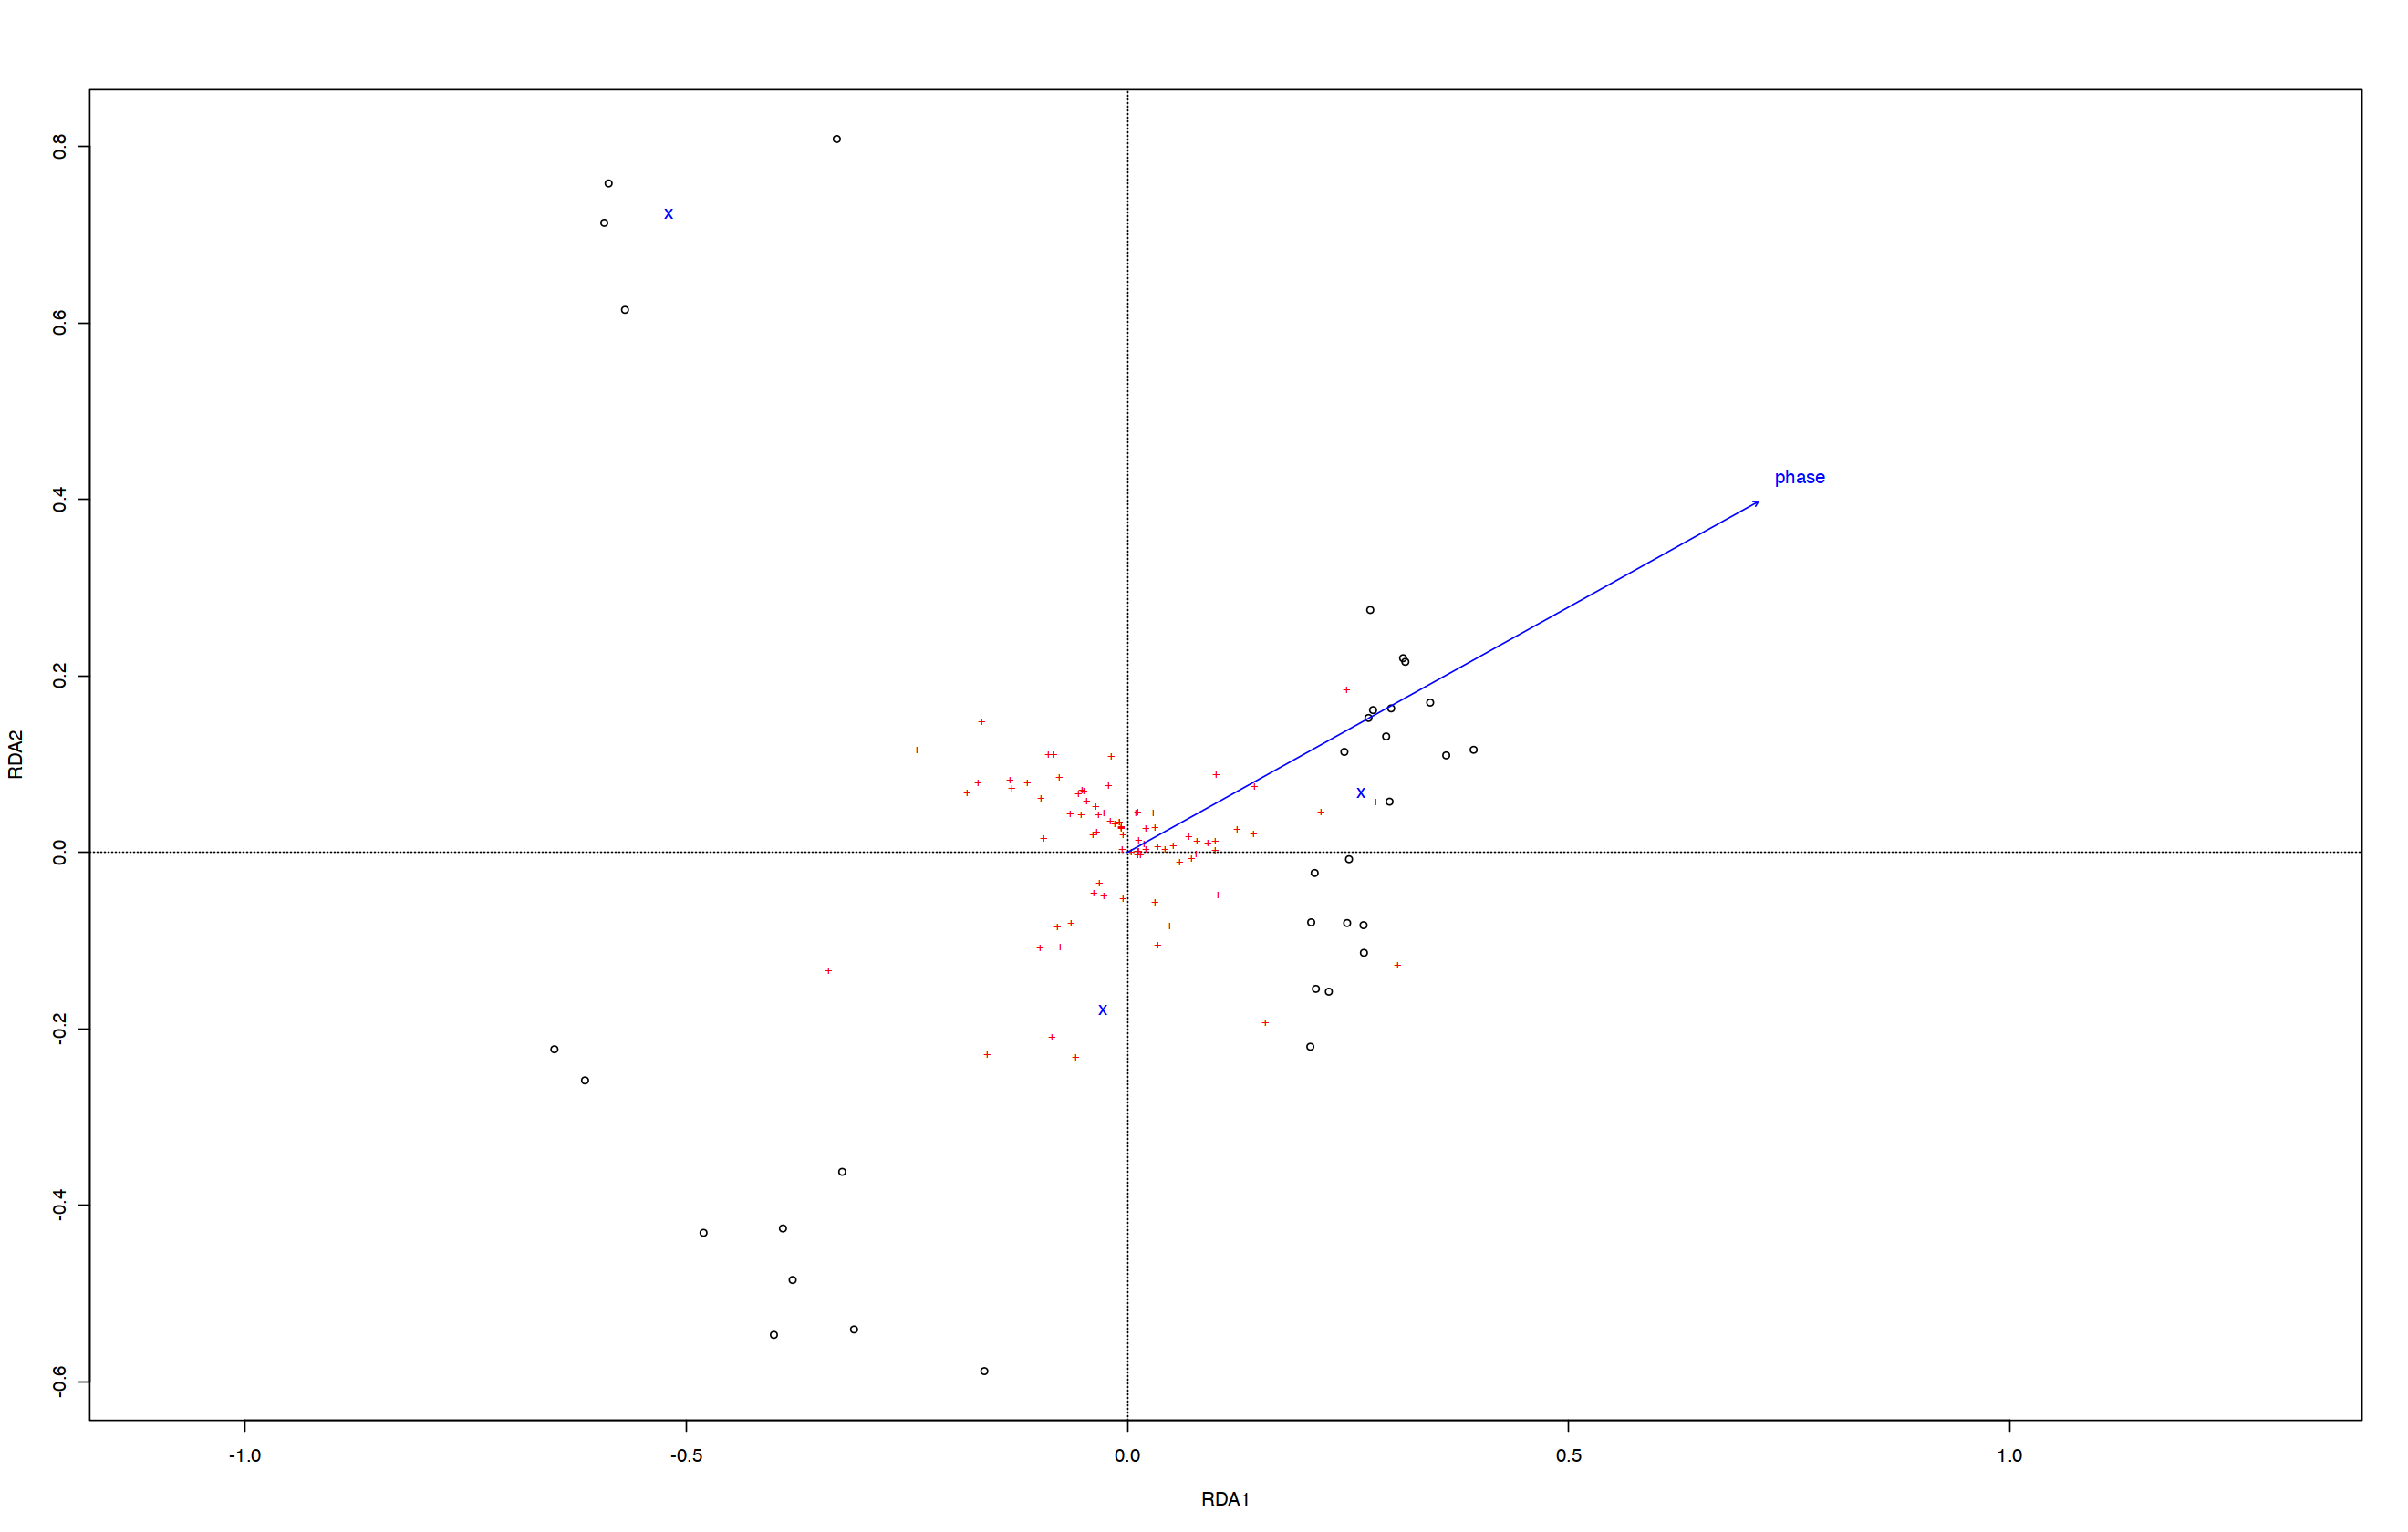

In [74]:
plot1 <- ordiplot(Ordination.model, choices=c(1,2))

In [75]:
sites.long1 <- sites.long(plot1, env.data=arbf.env)
species.long1 <- species.long(plot1)
axis.long1 <- axis.long(Ordination.model, choices=c(1, 2))
spec.envfit <- envfit(plot1, env=dune.Hellinger)
spec.data.envfit <- data.frame(r=spec.envfit$vectors$r, p=spec.envfit$vectors$pvals)
species.long1 <- species.long(plot1, spec.data=spec.data.envfit)
species.long3 <- species.long1[species.long1$r >= 0.63, ]
species.long3 <- species.long3 %>% filter((abs(axis1) + abs(axis2)) > 0.17)#filter(labels != "Rhodocyclaceae.Fen.999" & labels != "Alphaproteobacteria_1"& labels !=  "Rhodocyclaceae.66.26" & 
                                         #  labels !="Gammaproteobacteria.SURF.13" & labels != "Gemmataceae" & labels !="Obscuribacter.phosphatis_2" &
                                         # labels != "Phycisphaerales_1") #need to remove small arrows for legibility
species.long3 #taxa that explain at least 60% of the variance

r         p     axis1       axis2      
Nitrosomonas.oligotropha_1 0.6828131 0.001 -0.33919032 -0.13468488
Sphingomonas_2             0.7770420 0.001 -0.09960683 -0.10839379
Rhizobiales_1              0.6722637 0.001 -0.18222370  0.06694459
Reyranella_1               0.6593153 0.001  0.15612699 -0.19308342
Nitrosomonas.oligotropha_2 0.7048217 0.001 -0.23868255  0.11578641
Burkholderiales_1          0.6531281 0.001  0.24816057  0.18439355
Sphingopyxis_2             0.6797929 0.001 -0.05922158 -0.23223450
Mycobacterium_1            0.8125068 0.001 -0.15932811 -0.22893818
Obscuribacteraceae_3       0.8380915 0.001 -0.13097497  0.07305503
Mycobacterium_2            0.7455253 0.001 -0.13325420  0.08204962
Rhodocyclaceae_2           0.7379844 0.001 -0.11347105  0.07928843
Gallionella_1              0.7592978 0.001 -0.16968769  0.07840794
Parvularculaceae_2         0.8250799 0.001 -0.08410777  0.11087195
                           labels                    
Nitrosomonas.oligotropha_1 Nitrosomonas.oligotropha_1
Sphingomonas_2             Sphingomonas_2            
Rhizobiales_1              Rhizobiales_1             
Reyranella_1               Reyranella_1              
Nitrosomonas.oligotropha_2 Nitrosomonas.oligotropha_2
Burkholderiales_1          Burkholderiales_1         
Sphingopyxis_2             Sphingopyxis_2            
Mycobacterium_1            Mycobacterium_1           
Obscuribacteraceae_3       Obscuribacteraceae_3      
Mycobacterium_2            Mycobacterium_2           
Rhodocyclaceae_2           Rhodocyclaceae_2          
Gallionella_1              Gallionella_1             
Parvularculaceae_2         Parvularculaceae_2

In [76]:
sites.long1["type_phase"] <- paste(sites.long1$type, sites.long1$phase)

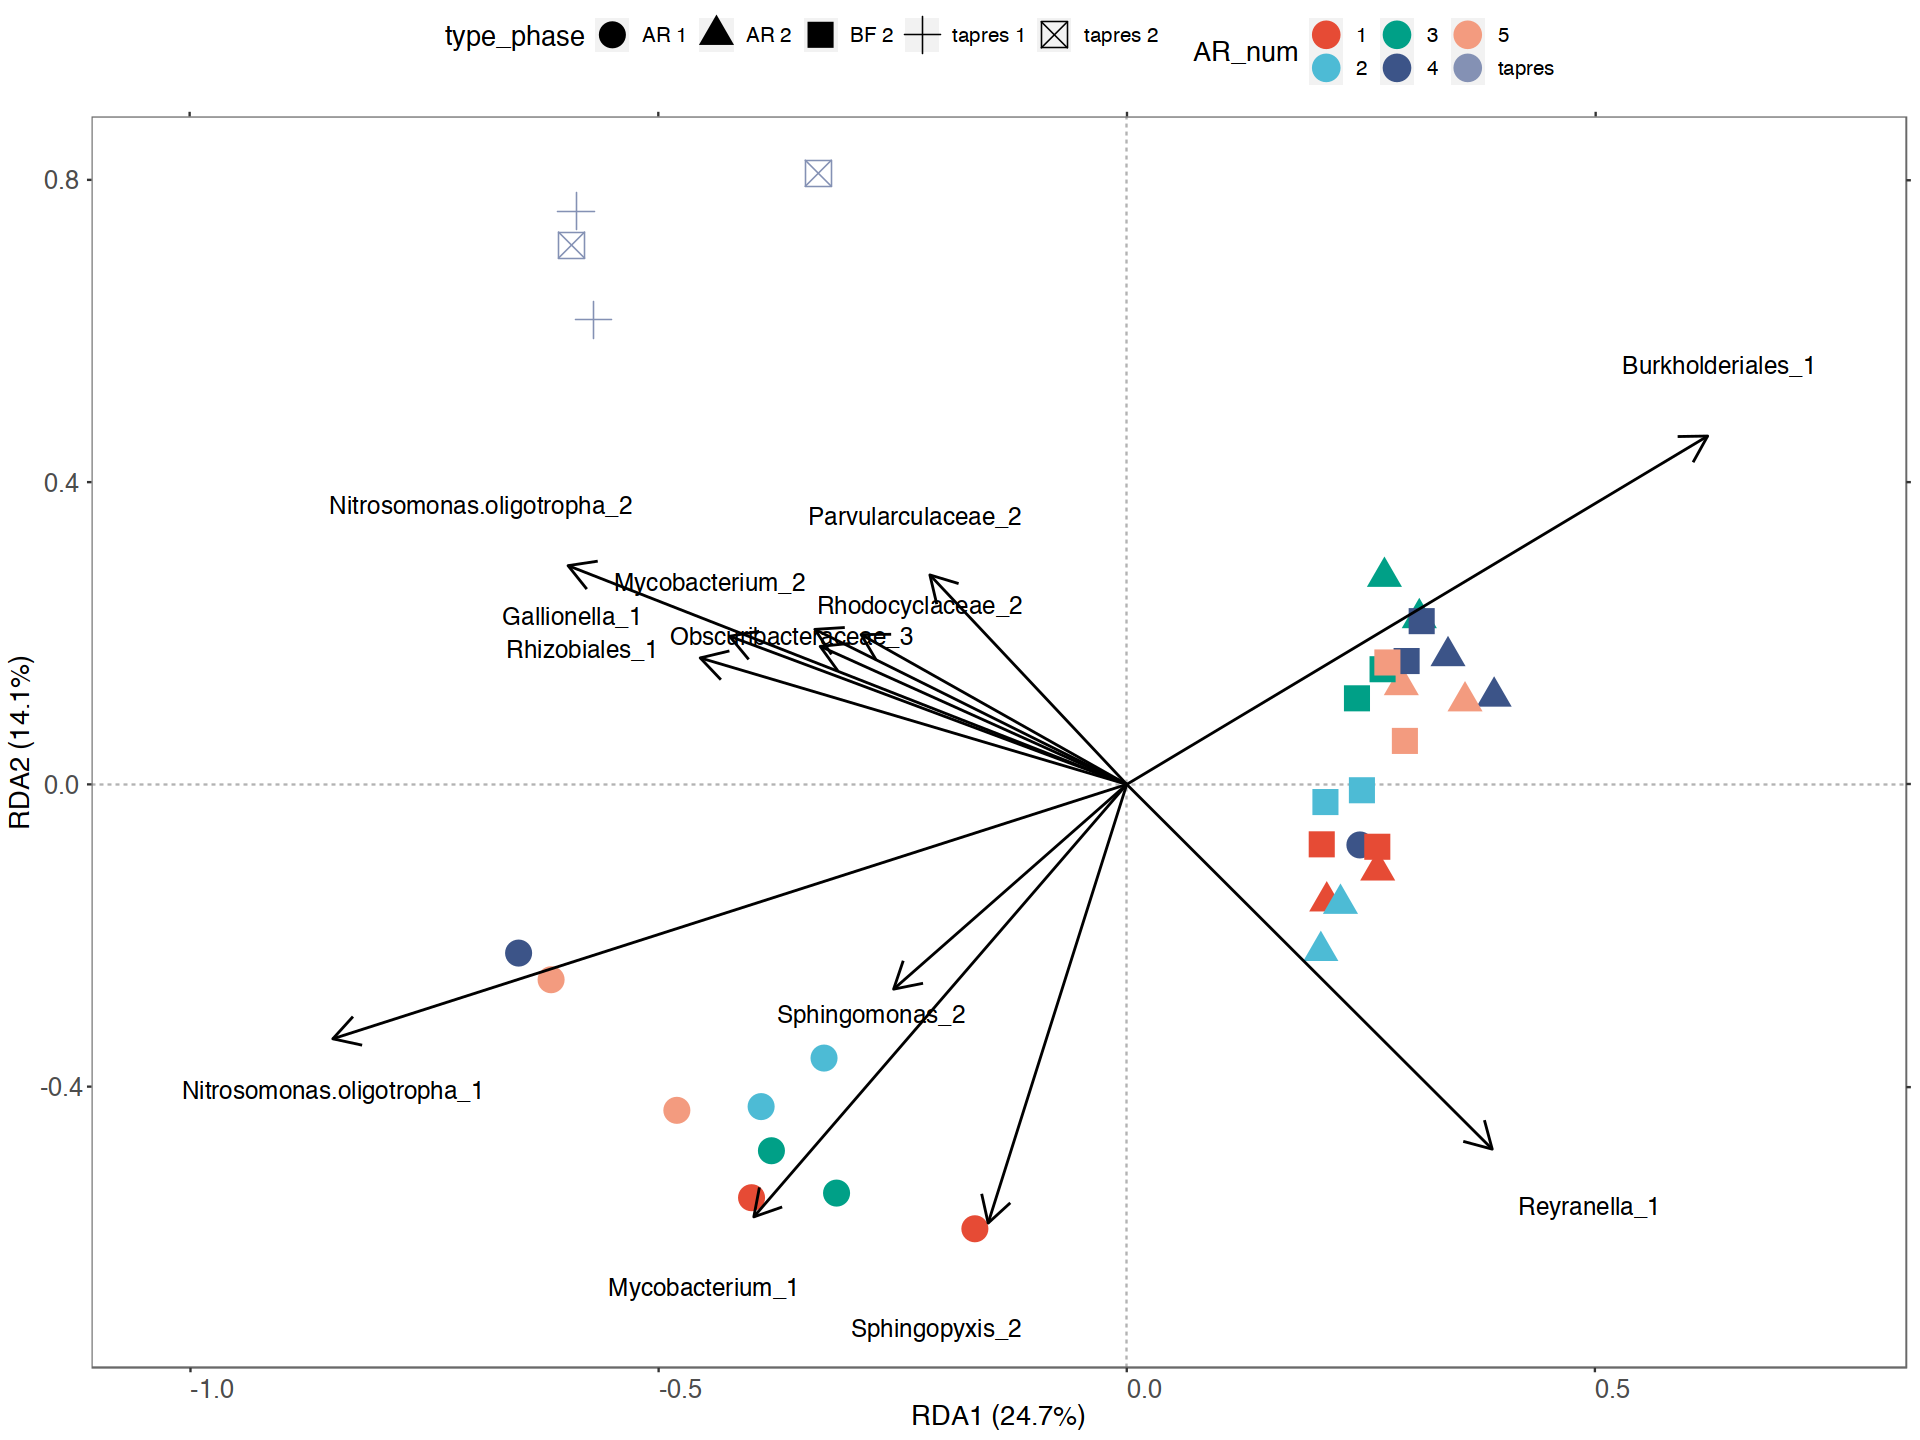

In [77]:

options(repr.plot.width = 16, repr.plot.height = 12)
plotgg2 <- ggplot() + 
    geom_vline(xintercept = c(0), color = "grey70", linetype = 2) +
    geom_hline(yintercept = c(0), color = "grey70", linetype = 2) +  
    xlab(axis.long1[1, "label"]) +
    ylab(axis.long1[2, "label"]) +  
    scale_x_continuous(sec.axis = dup_axis(labels=NULL, name=NULL)) +
    scale_y_continuous(sec.axis = dup_axis(labels=NULL, name=NULL)) +    
    geom_point(data=sites.long1, 
               aes(x=axis1, y=axis2, colour=AR_num, shape=type_phase), 
               size=7) +
    geom_segment(data=species.long3, 
                 aes(x=0, y=0, xend=axis1*2.5, yend=axis2*2.5), 
                 colour="black", size=0.6, arrow=arrow()) +
    geom_text_repel(data=species.long3, 
                    aes(x=axis1*3, y=axis2*3, label=labels),
                    colour="black", size= 5) +
theme(axis.text.x = element_text(angle = 0, hjust = 0, vjust=0.5, size= 15),
      axis.title.x = element_text(size =16), 
      legend.title= element_text(size=16), legend.position= "top", legend.text= element_text(size=12),
       axis.text.y = element_text( hjust = 0.5, vjust=0.5, size= 15),
       axis.title.y = element_text(size =16), 
       panel.background = element_rect(fill = "white"),panel.border = element_rect(colour = "#696969",size=0.5, fill = "transparent"))+
    # BioR.theme +
    ggsci::scale_colour_npg() 
    # coord_fixed(ratio=1)

plotgg2
# super low axes
# phase 1 samples kind of group together while phase 2 is partially overlapping but also spread out

In [78]:
ggsave(paste0(fig_dir, 'rda.pdf'), width=16, height=12)

### RDA with type, no Tap, only phase II

In [79]:
#need to remove tapres 
notap.env <- arbf.env %>% filter(type != "tapres") %>% filter(phase == 2)
cov_wide_notapres <- cov_wide_nocontrols[str_detect(rownames(cov_wide_nocontrols), "AR") | str_detect(rownames(cov_wide_nocontrols), "BF"), ]
cov_wide_notapres <- cov_wide_notapres[str_detect(rownames(cov_wide_notapres), "372") | str_detect(rownames(cov_wide_notapres), "387"), ]



In [80]:
dune.Hellinger <- disttransform(cov_wide_notapres, method='hellinger')
Ordination.model <- rda(dune.Hellinger ~ type + AR_num, data=notap.env, scaling="species")
summary(Ordination.model)


Call:
rda(formula = dune.Hellinger ~ type + AR_num, data = notap.env,      scaling = "species") 

Partitioning of variance:
              Inertia Proportion
Total         0.23934     1.0000
Constrained   0.19112     0.7985
Unconstrained 0.04823     0.2015

Eigenvalues, and their contribution to the variance 

Importance of components:
                         RDA1    RDA2    RDA3    RDA4    RDA5     PC1     PC2
Eigenvalue            0.08129 0.04009 0.02988 0.02637 0.01350 0.01335 0.01135
Proportion Explained  0.33962 0.16750 0.12484 0.11016 0.05638 0.05577 0.04743
Cumulative Proportion 0.33962 0.50711 0.63195 0.74211 0.79850 0.85426 0.90169
                           PC3      PC4      PC5      PC6      PC7      PC8
Eigenvalue            0.008357 0.003213 0.002681 0.002064 0.001839 0.001532
Proportion Explained  0.034917 0.013426 0.011200 0.008623 0.007682 0.006401
Cumulative Proportion 0.936610 0.950035 0.961235 0.969858 0.977540 0.983940
                           PC9      PC10      

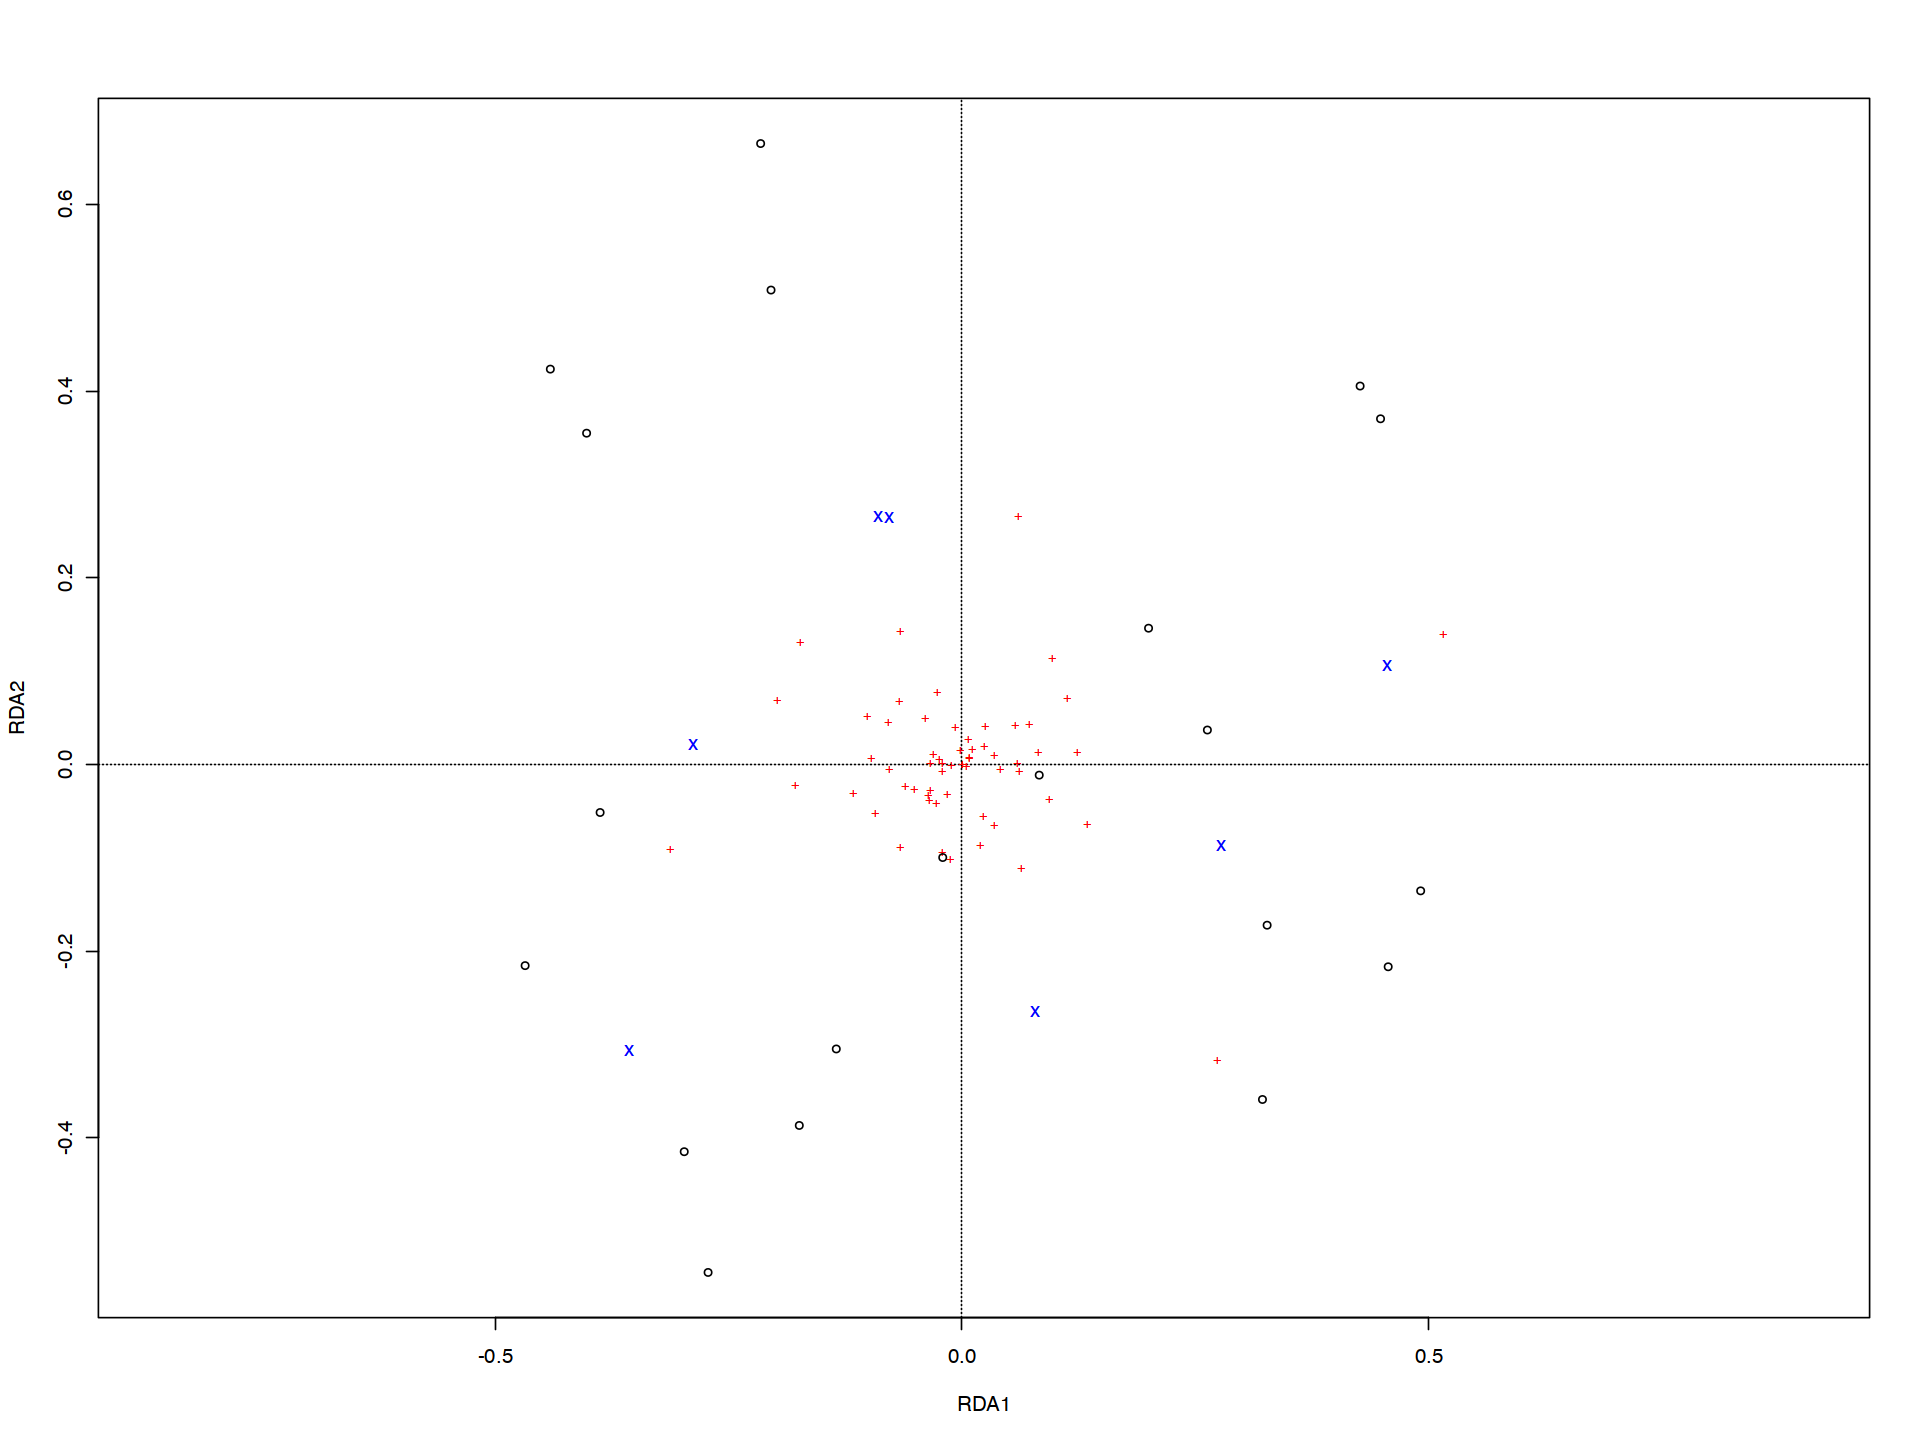

In [81]:
plot1 <- ordiplot(Ordination.model, choices=c(1,2))

In [82]:
sites.long1 <- sites.long(plot1, env.data=notap.env)
species.long1 <- species.long(plot1)
axis.long1 <- axis.long(Ordination.model, choices=c(1, 2))
spec.envfit <- envfit(plot1, env=dune.Hellinger)
spec.data.envfit <- data.frame(r=spec.envfit$vectors$r, p=spec.envfit$vectors$pvals)
species.long1 <- species.long(plot1, spec.data=spec.data.envfit)
species.long3 <- species.long1[species.long1$r >= 0.63, ]
species.long3 <- species.long3[(abs(species.long3$axis1) + abs(species.long3$axis2)) >= 0.05, ]
# species.long3 <- species.long3 %>% filter(labels != "Rhodocyclaceae.Fen.999" & labels != "Alphaproteobacteria_1"& labels !=  "Rhodocyclaceae.66.26" & 
#                                           labels !="Gammaproteobacteria.SURF.13" & labels != "Gemmataceae" & labels !="Obscuribacter.phosphatis_2" &
#                                          labels != "Phycisphaerales_1") #need to remove small arrows for legibility
species.long3 #taxa that explain at least 60% of the variance

Warning message in cor(H, Pw):
“the standard deviation is zero”
Warning message in cor(Hperm, take):
“the standard deviation is zero”
Warning message in cor(Hperm, take):
“the standard deviation is zero”
Warning message in cor(Hperm, take):
“the standard deviation is zero”
Warning message in cor(Hperm, take):
“the standard deviation is zero”
Warning message in cor(Hperm, take):
“the standard deviation is zero”
Warning message in cor(Hperm, take):
“the standard deviation is zero”
Warning message in cor(Hperm, take):
“the standard deviation is zero”
Warning message in cor(Hperm, take):
“the standard deviation is zero”
Warning message in cor(Hperm, take):
“the standard deviation is zero”
Warning message in cor(Hperm, take):
“the standard deviation is zero”
Warning message in cor(Hperm, take):
“the standard deviation is zero”
Warning message in cor(Hperm, take):
“the standard deviation is zero”
Warning message in cor(Hperm, take):
“the standard deviation is zero”
Warning message in cor(Hpe

r         p     axis1       axis2       labels           
Hyphomicrobium_2  0.6364179 0.001 -0.31267111 -0.09118895 Hyphomicrobium_2 
Mycobacterium_3   0.8862239 0.001 -0.17306097  0.13075373 Mycobacterium_3  
Hylemonella_1     0.7022058 0.001 -0.07900800  0.04525185 Hylemonella_1    
Reyranella_1      0.7073786 0.001 -0.19781759  0.06840856 Reyranella_1     
Bosea_2           0.7714058 0.001  0.12282064  0.01265091 Bosea_2          
Burkholderiales_1 0.6485140 0.001  0.05962451  0.26530570 Burkholderiales_1
Hyphomicrobium_1  0.9258156 0.001  0.51512175  0.13953376 Hyphomicrobium_1 
Planctomycetes_1  0.6633436 0.002  0.06282000 -0.11139385 Planctomycetes_1 
Novosphingobium_2 0.7478849 0.001 -0.06628607  0.14266031 Novosphingobium_2
Nitrospira_1      0.9125341 0.001  0.27294202 -0.31685778 Nitrospira_1

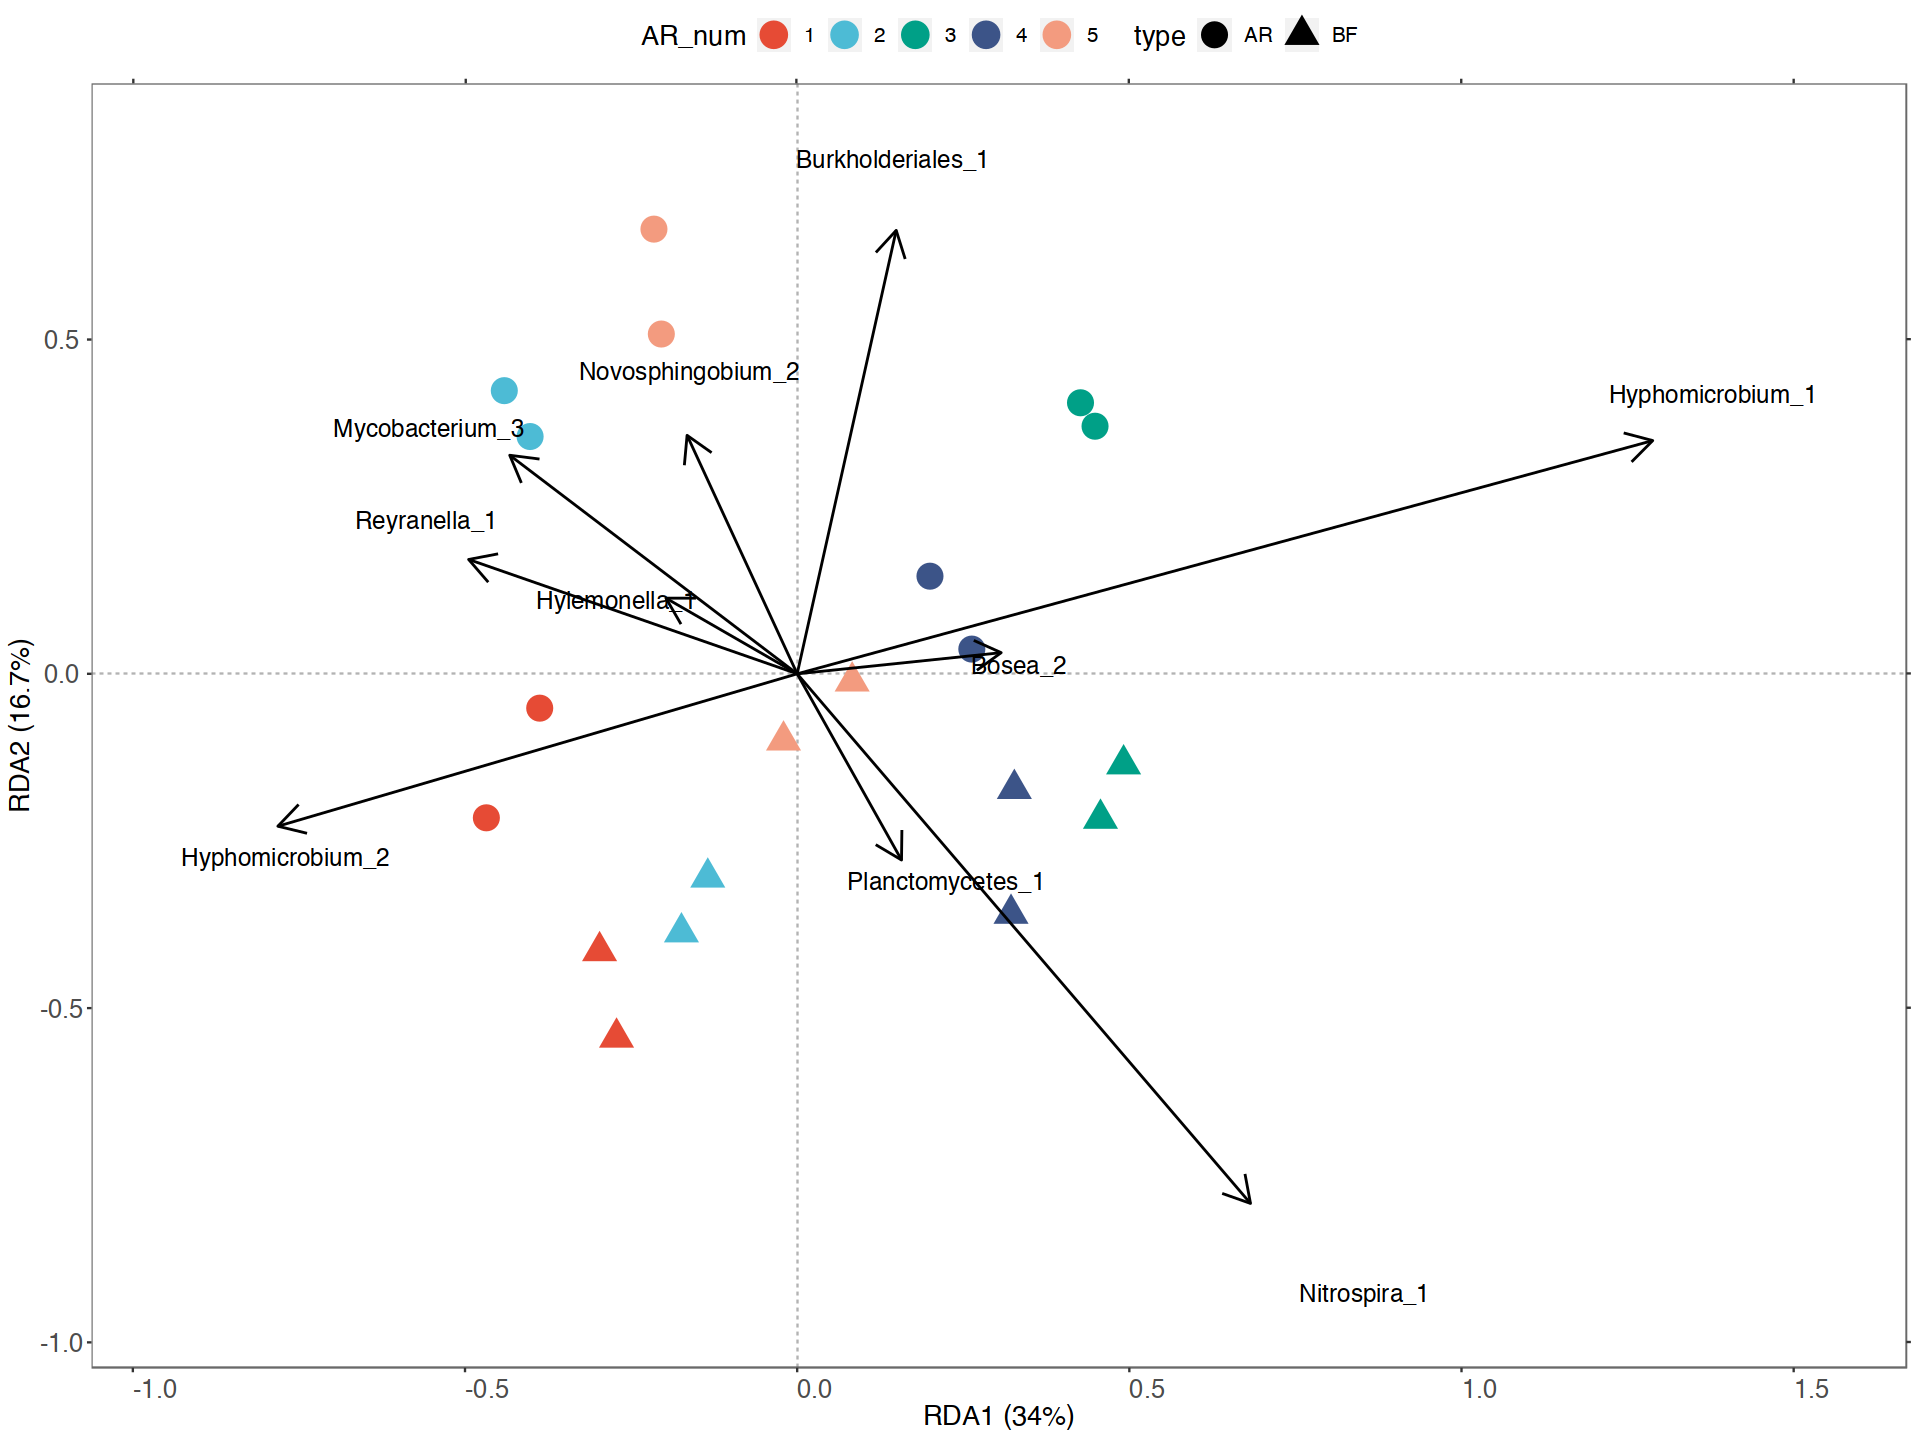

In [83]:

options(repr.plot.width = 16, repr.plot.height = 12)
plotgg2 <- ggplot() + 
    geom_vline(xintercept = c(0), color = "grey70", linetype = 2) +
    geom_hline(yintercept = c(0), color = "grey70", linetype = 2) +  
    xlab(axis.long1[1, "label"]) +
    ylab(axis.long1[2, "label"]) +  
    scale_x_continuous(sec.axis = dup_axis(labels=NULL, name=NULL)) +
    scale_y_continuous(sec.axis = dup_axis(labels=NULL, name=NULL)) +    
    geom_point(data=sites.long1, 
               aes(x=axis1, y=axis2, colour=AR_num, shape=type), 
               size=7) +
    geom_segment(data=species.long3, 
                 aes(x=0, y=0, xend=axis1*2.5, yend=axis2*2.5), 
                 colour="black", size=0.6, arrow=arrow()) +
    geom_text_repel(data=species.long3, 
                    aes(x=axis1*3, y=axis2*3, label=labels),
                    colour="black", size= 5) +
theme(axis.text.x = element_text(angle = 0, hjust = 0, vjust=0.5, size= 15),
      axis.title.x = element_text(size =16), 
      legend.title= element_text(size=16), legend.position= "top", legend.text= element_text(size=12),
       axis.text.y = element_text( hjust = 0.5, vjust=0.5, size= 15),
       axis.title.y = element_text(size =16), 
       panel.background = element_rect(fill = "white"),panel.border = element_rect(colour = "#696969",size=0.5, fill = "transparent"))+
    # BioR.theme +
    ggsci::scale_colour_npg() 
    # coord_fixed(ratio=1)

plotgg2
# super low axes
# phase 1 samples kind of group together while phase 2 is partially overlapping but also spread out

In [84]:
ggsave(paste0(fig_dir, 'bulk_bf_rda.pdf'), width=16, height=12)

### RDA with Env Variables

In [110]:
#need to remove BF because doesn't have metadata
ar.env <- arbf.env %>% filter(type != "BF")
cov_wide_noBF <- cov_wide_nocontrols[str_detect(rownames(cov_wide_nocontrols), "AR") | str_detect(rownames(cov_wide_nocontrols), "tapres"), ]


In [111]:
dune.Hellinger <- disttransform(cov_wide_noBF, method='hellinger')
Ordination.model2 <- rda(dune.Hellinger ~ cl_total+temp+pH, data=ar.env, scaling="species")
summary(Ordination.model2)


Call:
rda(formula = dune.Hellinger ~ cl_total + temp + pH, data = ar.env,      scaling = "species") 

Partitioning of variance:
              Inertia Proportion
Total          0.4320     1.0000
Constrained    0.1489     0.3446
Unconstrained  0.2831     0.6554

Eigenvalues, and their contribution to the variance 

Importance of components:
                         RDA1    RDA2     RDA3     PC1     PC2     PC3     PC4
Eigenvalue            0.09048 0.05196 0.006418 0.07513 0.06371 0.03365 0.02810
Proportion Explained  0.20945 0.12029 0.014859 0.17393 0.14748 0.07789 0.06505
Cumulative Proportion 0.20945 0.32975 0.344605 0.51853 0.66602 0.74391 0.80896
                          PC5     PC6     PC7      PC8      PC9     PC10
Eigenvalue            0.01563 0.01500 0.01124 0.008704 0.007214 0.005377
Proportion Explained  0.03618 0.03472 0.02602 0.020150 0.016701 0.012446
Cumulative Proportion 0.84514 0.87986 0.90588 0.926029 0.942730 0.955177
                         PC11     PC12     PC13   

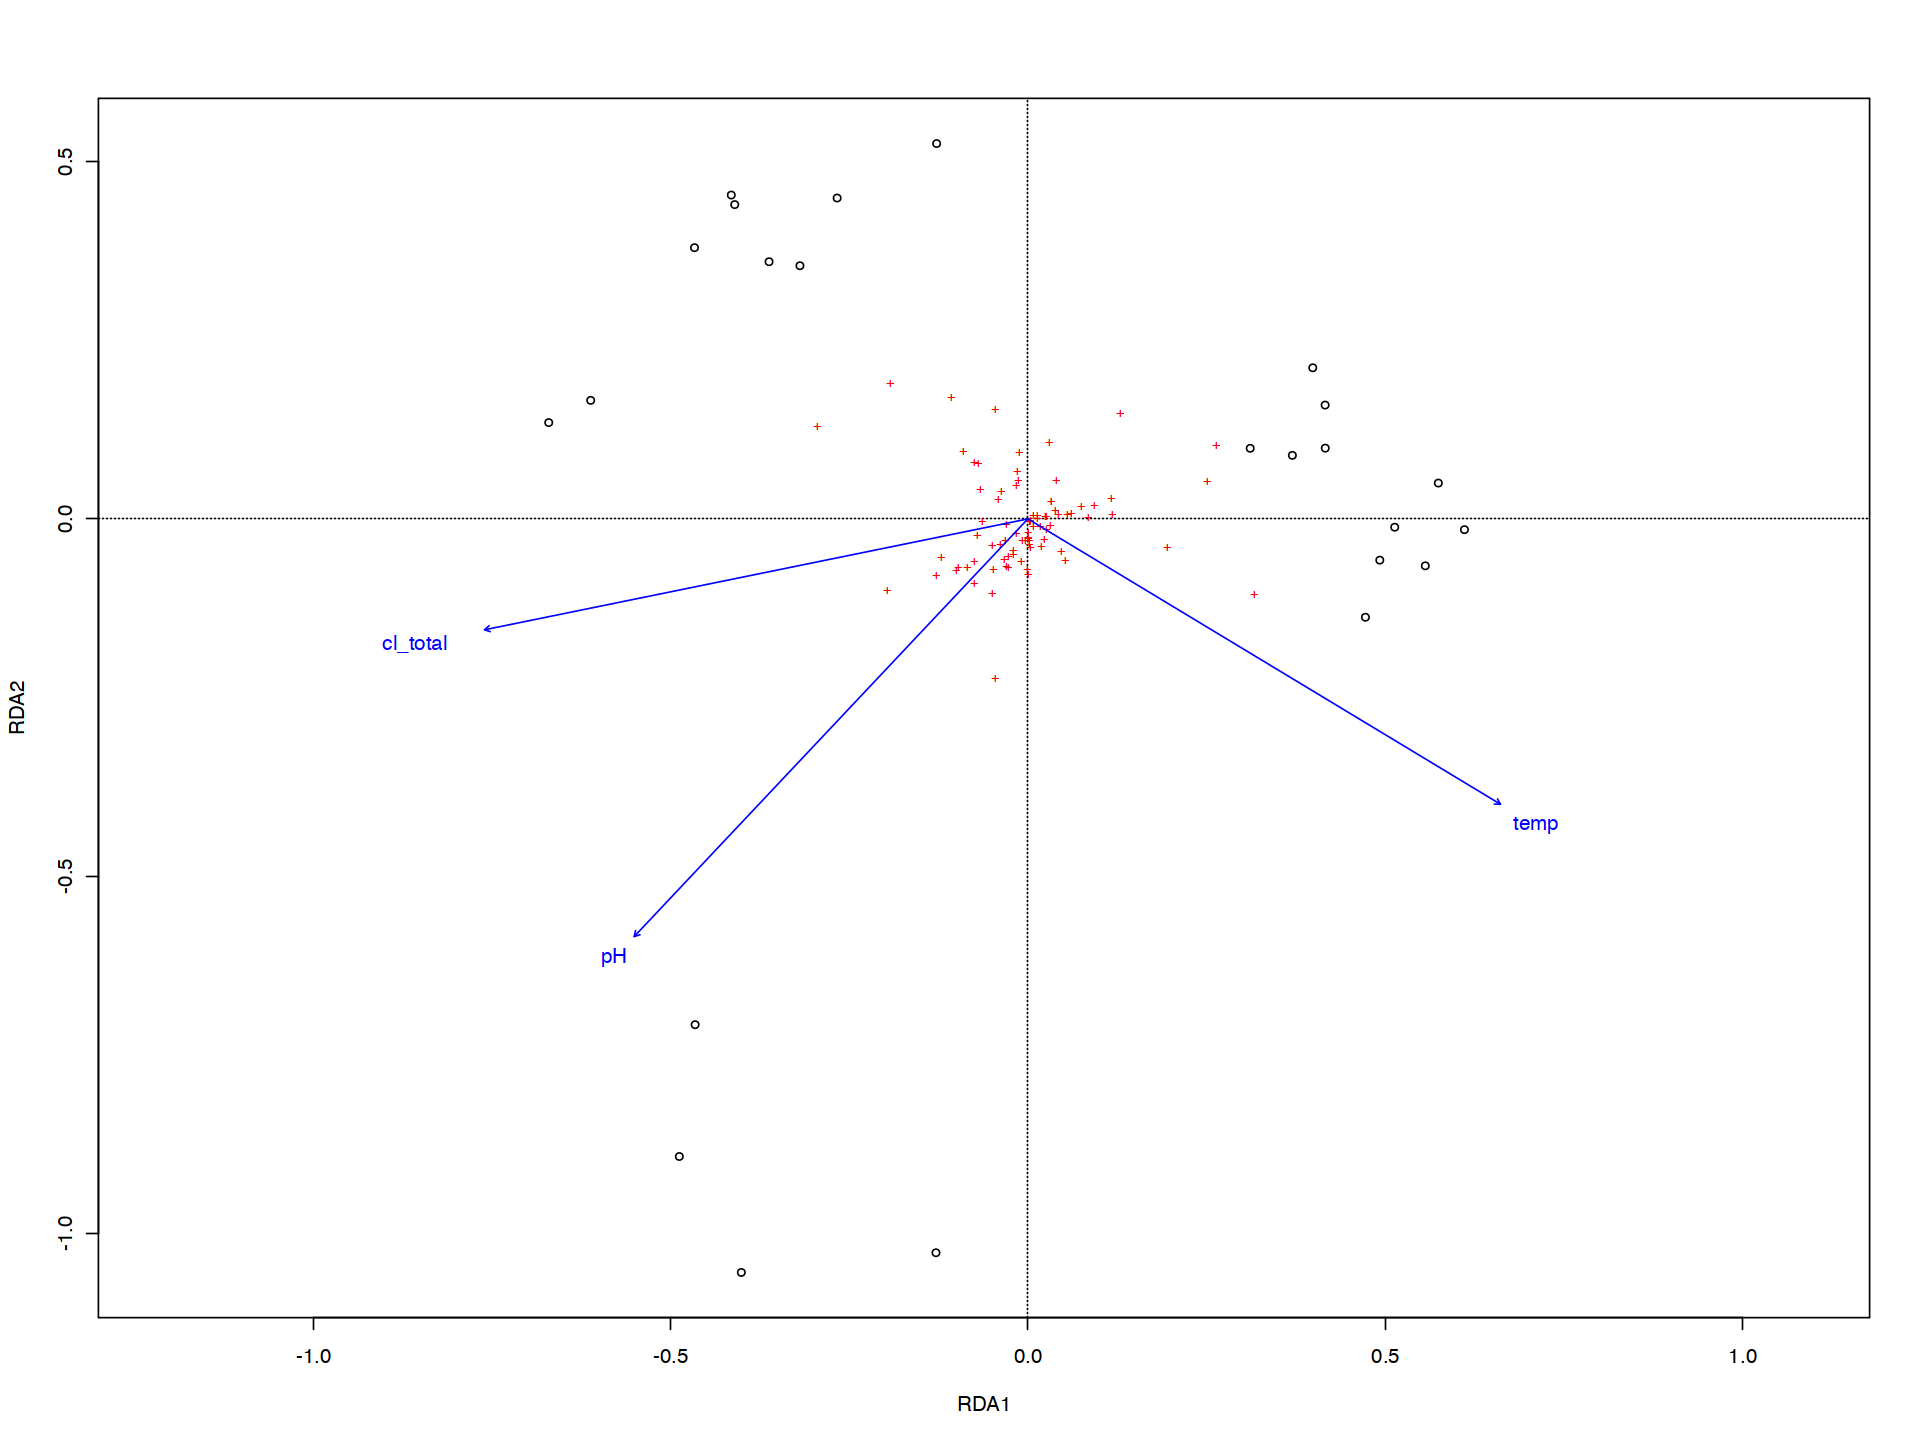

In [112]:
plot2 <- ordiplot(Ordination.model2, choices=c(1,2))

In [113]:
vectors.envfit <- envfit(plot2, env=ar.env)
vectors.long2 <- vectorfit.long(vectors.envfit)
vectors.long2

vector         axis1      axis2      r         p    
day            day             0.9159574 -0.4012754 0.8009405 0.001
phase          phase           0.9117744 -0.4106915 0.7764129 0.001
sampling_event sampling_event  0.9192551 -0.3936623 0.8133200 0.001
cl_total       cl_total       -0.9899957 -0.1410972 0.5940871 0.001
temp           temp            0.8466137 -0.5322079 0.6318479 0.002
pH             pH             -0.6908258 -0.7230213 0.6066607 0.001

In [114]:
sites.long2 <- sites.long(plot2, env.data=ar.env)
species.long2 <- species.long(plot2)
axis.long2 <- axis.long(Ordination.model2, choices=c(1, 2))
spec.envfit <- envfit(plot2, env=dune.Hellinger)
spec.data.envfit <- data.frame(r=spec.envfit$vectors$r, p=spec.envfit$vectors$pvals)
species.long2 <- species.long(plot2, spec.data=spec.data.envfit)
species.long3 <- species.long2[species.long2$r >= 0.8, ]
# species.long3 <- species.long3 %>% filter(labels != "Rhodocyclaceae.Fen.999" & labels != "Alphaproteobacteria_1"& labels !=  "Rhodocyclaceae.66.26" & 
#                                           labels !="Gammaproteobacteria.SURF.13" & labels != "Gemmataceae" & labels !="Obscuribacter.phosphatis_2" &
#                                          labels != "Phycisphaerales_1") #need to remove small arrows for legibility
species.long3 #taxa that explain at least 70% of the variance

r         p     axis1       axis2      
Mycobacterium_1       0.8439073 0.001 -0.19316036  0.18957541
Alphaproteobacteria_1 0.8687172 0.001 -0.02754630 -0.05307595
Obscuribacteraceae_3  0.8176502 0.001 -0.10031739 -0.07189988
Rhodocyclaceae_1      0.9274237 0.001 -0.02812516 -0.06819044
Gemmataceae_1         0.8416359 0.001 -0.02025127 -0.04383640
Gammaproteobacteria_1 0.8125098 0.001 -0.07540673 -0.05892456
Rhodobacteraceae_1    0.8629042 0.001 -0.03020104 -0.06675969
Parvularculaceae_2    0.8435577 0.001 -0.05028876 -0.10403100
Phycisphaerales_1     0.8581146 0.001 -0.02102620 -0.04984224
                      labels               
Mycobacterium_1       Mycobacterium_1      
Alphaproteobacteria_1 Alphaproteobacteria_1
Obscuribacteraceae_3  Obscuribacteraceae_3 
Rhodocyclaceae_1      Rhodocyclaceae_1     
Gemmataceae_1         Gemmataceae_1        
Gammaproteobacteria_1 Gammaproteobacteria_1
Rhodobacteraceae_1    Rhodobacteraceae_1   
Parvularculaceae_2    Parvularculaceae_2   
Phycisphaerales_1     Phycisphaerales_1

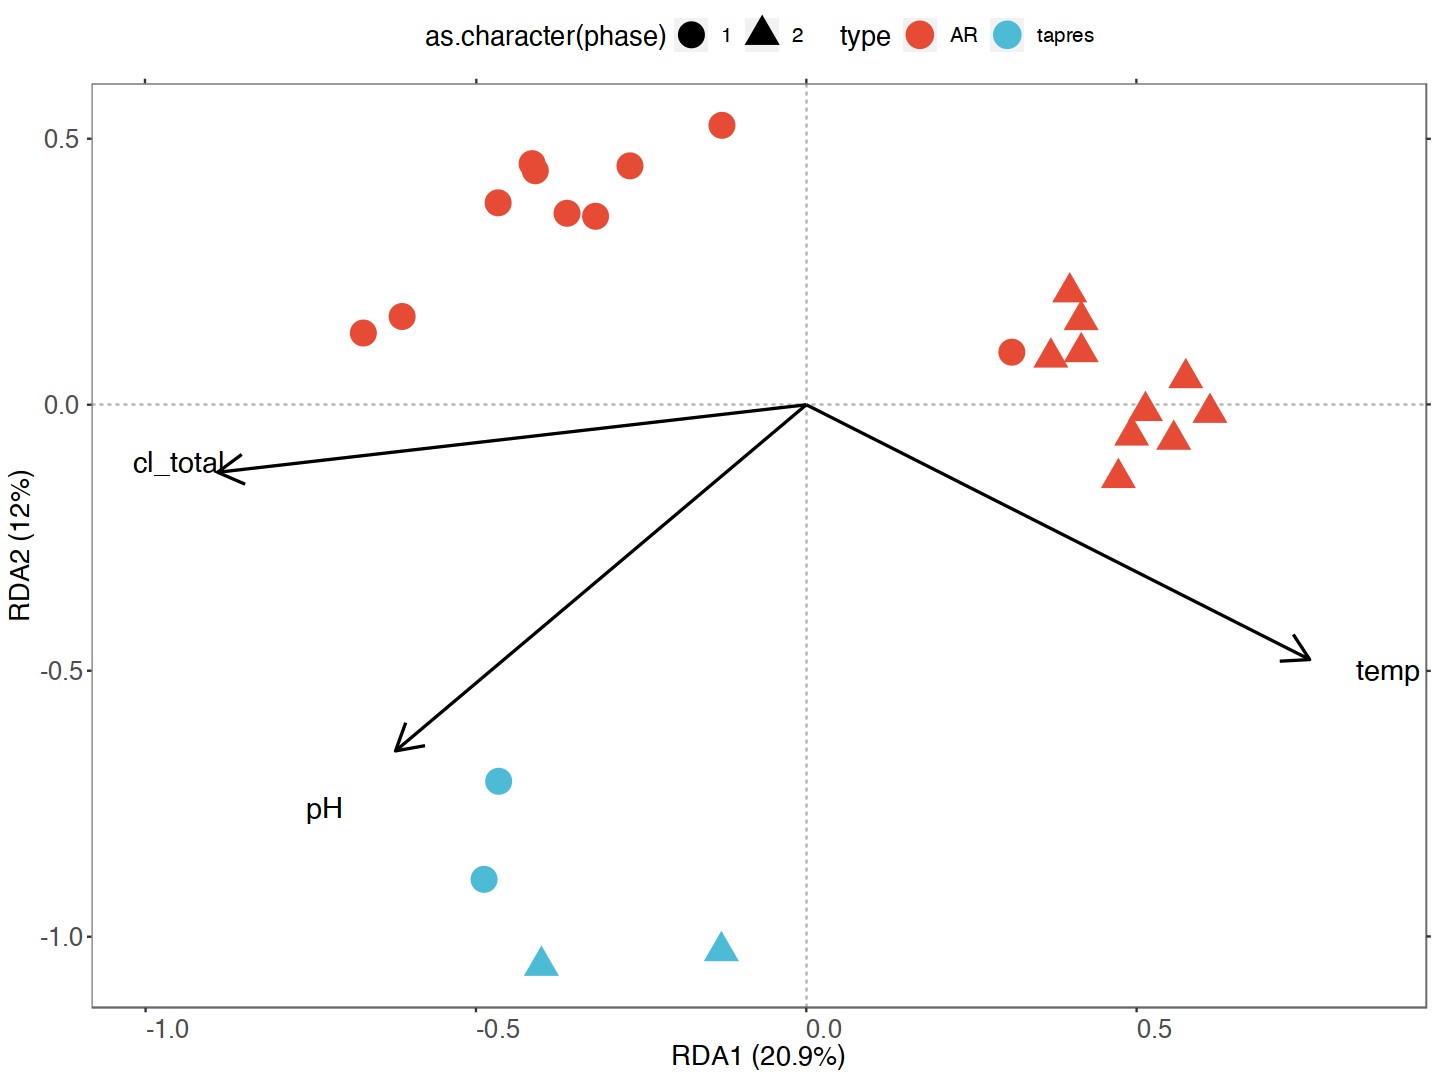

In [115]:
options(repr.plot.width = 12, repr.plot.height = 9)
plotgg2 <- ggplot() + 
    geom_vline(xintercept = c(0), color = "grey70", linetype = 2) +
    geom_hline(yintercept = c(0), color = "grey70", linetype = 2) +  
    xlab(axis.long2[1, "label"]) +
    ylab(axis.long2[2, "label"]) +  
    scale_x_continuous(sec.axis = dup_axis(labels=NULL, name=NULL)) +
    scale_y_continuous(sec.axis = dup_axis(labels=NULL, name=NULL)) +    
    geom_point(data=sites.long2, 
               aes(x=axis1, y=axis2, colour=type, shape=as.character(phase)), 
               size=7) +
    # geom_segment(data=species.long3, 
    #              aes(x=0, y=0, xend=axis1*2.5, yend=axis2*2.5), 
    #              colour="red", size=0.6, arrow=arrow()) +
    # geom_text_repel(data=species.long3, 
    #                 aes(x=axis1*3, y=axis2*3, label=labels),
    #                 colour="red", size= 5) +
geom_segment(data=subset(vectors.long2, vector %in% c("cl_total", "pH", "temp")),
                 aes(x=0, y=0, xend=axis1*0.9, yend=axis2*0.9), 
                 colour="black", size=0.7, arrow=arrow()) +
    geom_text_repel(data=subset(vectors.long2, vector %in% c("cl_total", "pH", "temp")), 
                    aes(x=axis1*1, y=axis2*1, label=vector),
                    colour="black", size = 6) +
theme(axis.text.x = element_text(angle = 0, hjust = 0, vjust=0.5, size= 15), 
      legend.title= element_text(size=16), legend.position= "top", legend.text= element_text(size=12),
      axis.title.x = element_text(size =16), 
       axis.text.y = element_text( hjust = 0.5, vjust=0.5, size= 15),
       axis.title.y = element_text(size =16), 
       panel.background = element_rect(fill = "white"),panel.border = element_rect(colour = "#696969",size=0.5, fill = "transparent"))+
    # BioR.theme +
    ggsci::scale_colour_npg() 
    # coord_fixed(ratio=1)

plotgg2
# super low axes
# phase 1 samples kind of group together while phase 2 is partially overlapping but also spread out

### PCA
https://cran.r-project.org/web/packages/ggfortify/vignettes/plot_pca.html


In [116]:
rowSums(cov_wide_nocontrols) == 0

AR1_134    AR1_162    AR1_372    AR1_387    AR2_134    AR2_162    AR2_372 
     FALSE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
   AR2_387    AR3_134    AR3_162    AR3_372    AR3_387    AR4_134    AR4_162 
     FALSE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
   AR4_372    AR4_387    AR5_134    AR5_162    AR5_372    AR5_387    BF1_372 
     FALSE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
   BF1_387    BF2_372    BF2_387    BF3_372    BF3_387    BF4_372    BF4_387 
     FALSE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
   BF5_372    BF5_387 tapres_134 tapres_162 tapres_372 tapres_387 
     FALSE      FALSE      FALSE      FALSE      FALSE      FALSE

In [117]:
# PCA

#full dataset (no controls)
cov_wide_nocontrols <-cov_wide_nocontrols[order(row.names(cov_wide_nocontrols)), ]
cov_wide_nocontrols[is.na(cov_wide_nocontrols)] <- 0
# df <- cov_wide_nocontrols

rn <- sort(rownames(arbf2))
arbf2 <- arbf2[order(row.names(arbf2)),,drop = FALSE ]
rownames(arbf2) <- rn
# metadata <- arbf2

#take out day 387 (no controls)
# df <- cov_wide_nocontrols[str_detect(rownames(cov_wide_nocontrols), "372") | str_detect(rownames(cov_wide_nocontrols), "134") | str_detect(rownames(cov_wide_nocontrols), "162"), ]
# metadata <- arbf2 %>% filter(day != 387)

# ar only
# df <- cov_wide_nocontrols[0:20, ] #ar only
# metadata <- arbf2 %>% filter(type == "AR")

# no tap
# df <- cov_wide_notap
df <- cov_wide_nocontrols[str_detect(rownames(cov_wide_nocontrols), "AR") | str_detect(rownames(cov_wide_nocontrols), "BF"), ]
metadata <- arbf2 %>% filter(type != "tapres")

# no tap, phase 1 ar only -- this has decently high axes (20%, 40%)
# df <- cov_wide_notap[str_detect(rownames(cov_wide_notap), "134") | str_detect(rownames(cov_wide_notap), "162"), ]
# metadata <- arbf2 %>% filter(phase == 1) %>% filter(type != "tapres")

# no tap, phase 2 ar and bf only 
# df <- cov_wide_notap[str_detect(rownames(cov_wide_notap), "372") | str_detect(rownames(cov_wide_notap), "387"), ]
# metadata <- arbf2 %>% filter(phase == 2) %>% filter(type != "tapres")

#tap, ar from phase 1 only
# df <- cov_wide_nocontrols[str_detect(rownames(cov_wide_nocontrols), "134") | str_detect(rownames(cov_wide_nocontrols), "162"), ]
# metadata <- arbf2 %>% filter(phase == 1)

#tap, ar and bf from phase 2 only
# df <- cov_wide_nocontrols[str_detect(rownames(cov_wide_nocontrols), "372") | str_detect(rownames(cov_wide_nocontrols), "387"), ]
# metadata <- arbf2 %>% filter(phase == 2)

metadata$phase <- as.character(metadata$phase)
metadata$day <- as.character(metadata$day)

options(repr.plot.width = 12, repr.plot.height = 8)
pca_res <- prcomp(df, scale. = TRUE)
# autoplot(pca_res)
autoplot(pca_res, data = metadata, colour = 'cl_total',shape= 'phase', size= 4)+
theme(axis.text.x = element_text(angle = 0, hjust = 0, vjust=0.5, size= 15),
      axis.title.x = element_text(size =16), 
       axis.text.y = element_text( hjust = 0.5, vjust=0.5, size= 15),
       axis.title.y = element_text(size =16), 
       panel.background = element_rect(fill = "white"),panel.border = element_rect(colour = "#696969",size=0.5, fill = "transparent"))

Warning message:
“Setting row names on a tibble is deprecated.”


ERROR: Error in prcomp.default(df, scale. = TRUE): cannot rescale a constant/zero column to unit variance


### NMDS

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1138632 
Run 1 stress 0.1229771 
Run 2 stress 0.2059342 
Run 3 stress 0.1138632 
... Procrustes: rmse 9.674754e-06  max resid 2.820765e-05 
... Similar to previous best
Run 4 stress 0.1138632 
... New best solution
... Procrustes: rmse 9.916596e-06  max resid 2.856218e-05 
... Similar to previous best
Run 5 stress 0.1227291 
Run 6 stress 0.1139821 
... Procrustes: rmse 0.007045567  max resid 0.03267699 
Run 7 stress 0.1229771 
Run 8 stress 0.1312618 
Run 9 stress 0.1139821 
... Procrustes: rmse 0.007043546  max resid 0.03265884 
Run 10 stress 0.1138632 
... Procrustes: rmse 2.071994e-06  max resid 7.183645e-06 
... Similar to previous best
Run 11 stress 0.1226226 
Run 12 stress 0.1138632 
... New best solution
... Procrustes: rmse 2.453047e-06  max resid 6.700158e-06 
... Similar to previous best
Run 13 stress 0.1138632 
... Procrustes: rmse 6.134369e-06  max resid 1.65177e-05 
... Similar to previous best
Run 1

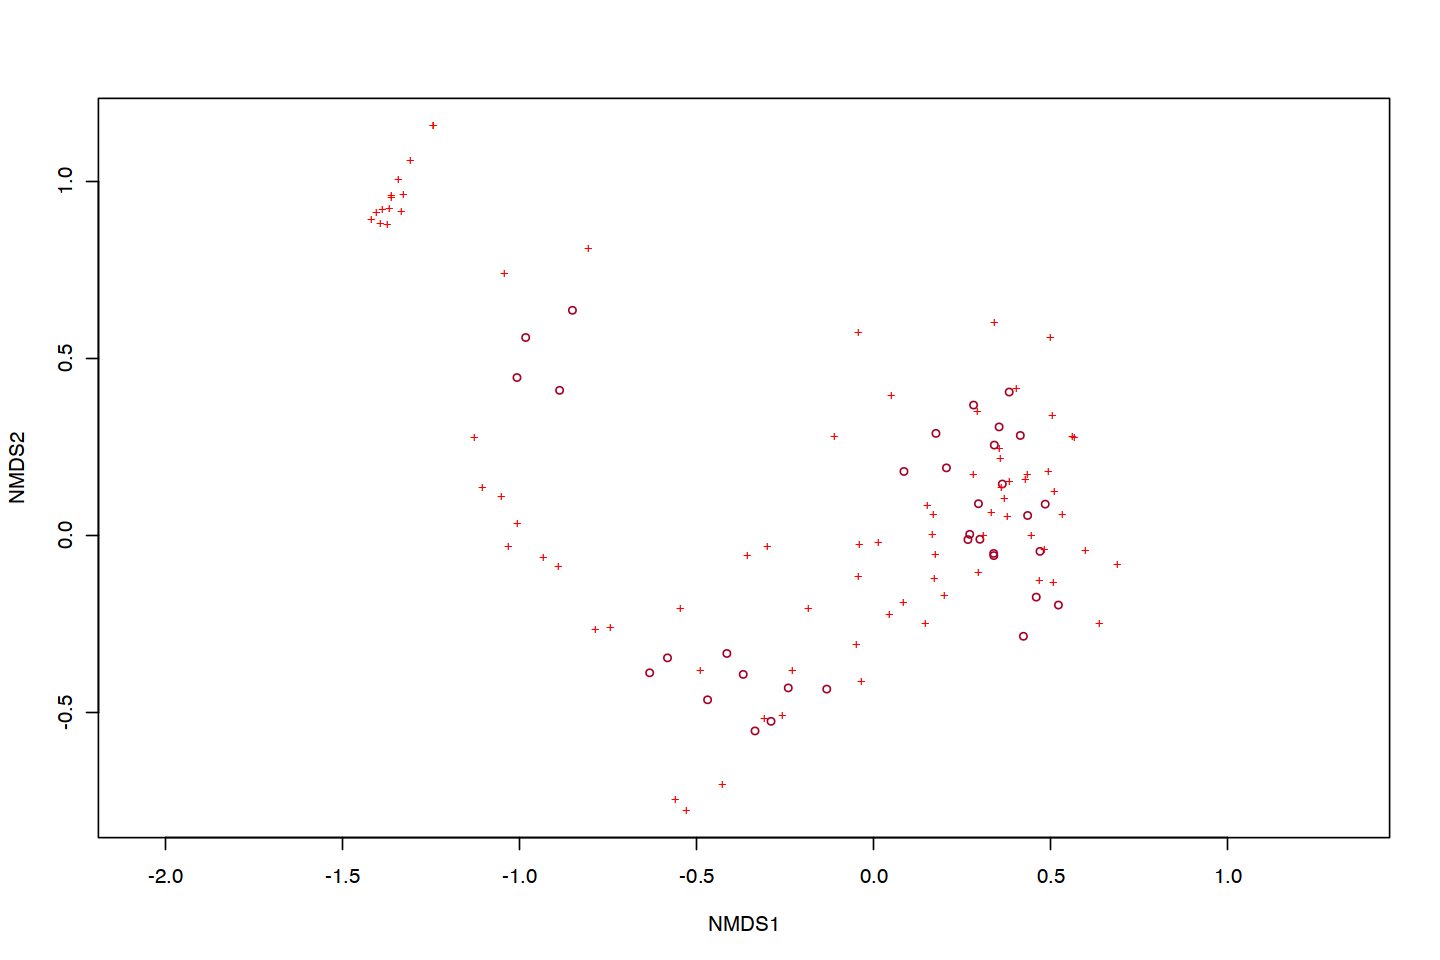

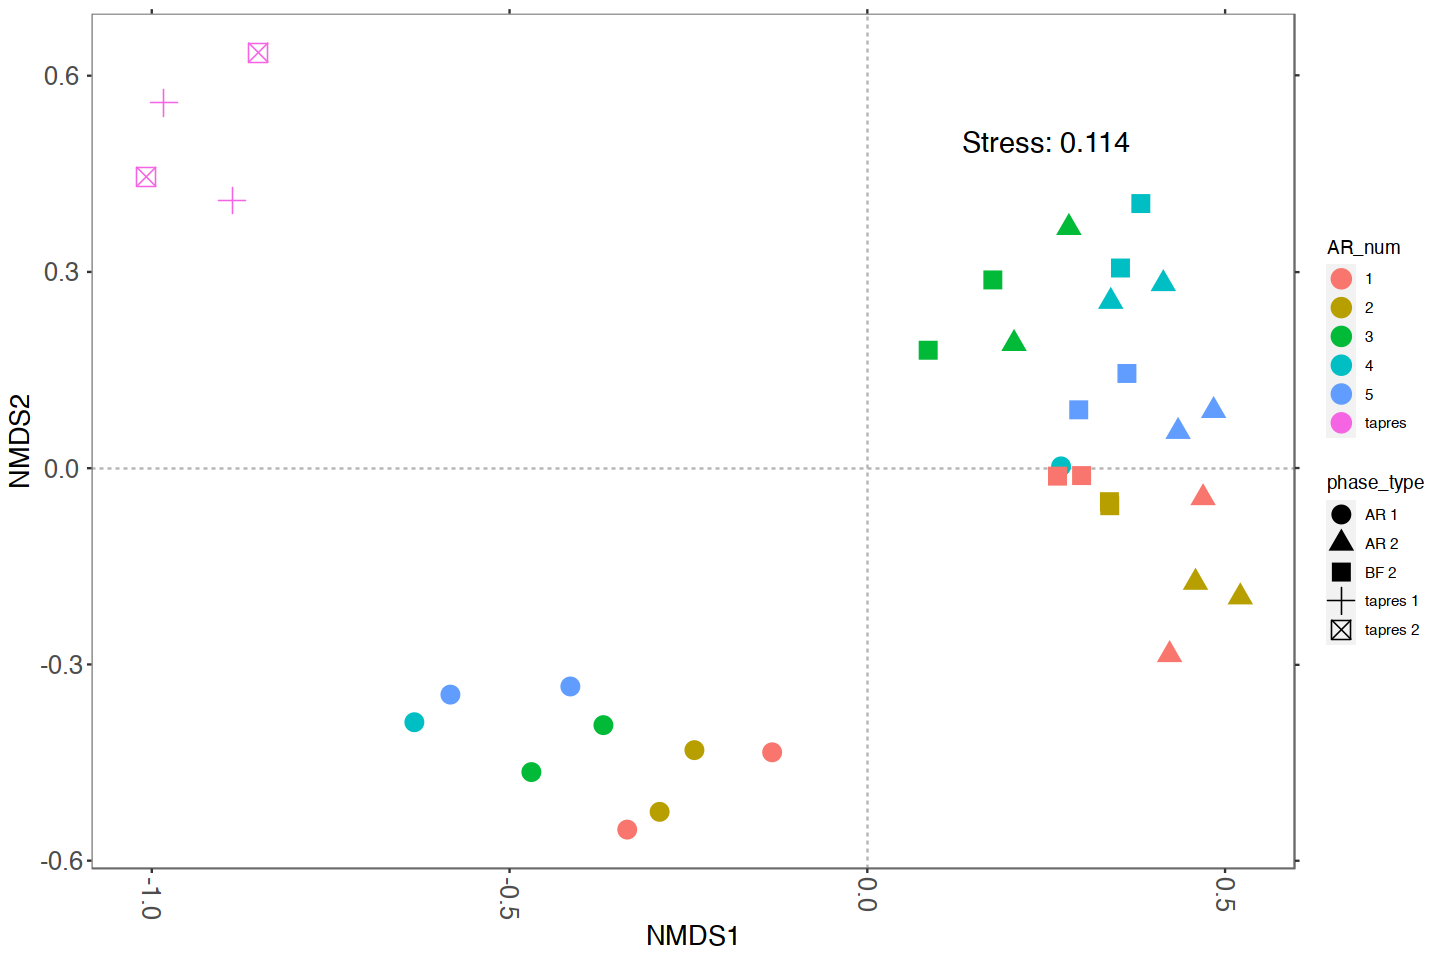

In [118]:
#NMDS all data 
# arbf.env["ARBF2"] <- arbf.env$ARBF
# arbf.env$ARBF2[arbf.env$ARBF2== "BF"] <- NA
arbf.env <- arbf.env %>% add_column(phase_type = paste(arbf.env$type, arbf.env$phase))

Ordination.model1 <- metaMDS(cov_wide_nocontrols, distance='bray', k=2, #trymax=1, 
  autotransform=TRUE, noshare=0.1, expand=TRUE, trace=1, plot=FALSE)
stress <- Ordination.model1$stress
# stress = 0.12 which is less than 0.15 so it's considered good

plot1 <- ordiplot(Ordination.model1, choices=c(1,2))
sites.long1 <- sites.long(plot1, env.data=arbf.env)

options(repr.plot.width = 12, repr.plot.height = 8)
plotgg1 <- ggplot() + 
    geom_vline(xintercept = c(0), color = "grey70", linetype = 2) +
    geom_hline(yintercept = c(0), color = "grey70", linetype = 2) +  
    xlab("NMDS1") +
    ylab("NMDS2") +  
    scale_x_continuous(sec.axis = dup_axis(labels=NULL, name=NULL)) +
    scale_y_continuous(sec.axis = dup_axis(labels=NULL, name=NULL)) +    
    geom_point(data=sites.long1, 
               aes(x=axis1, y=axis2, colour=AR_num, shape=phase_type), size=5) + #fill= ifelse(ARBF2== "AR", AR_num, "BF")
    # scale_fill_manual(values= c("blue", "green", "red", "yellow", "pink", "purple", "transparent"))+
    # scale_colour_manual(values=c('yellow', 'black'))+
    # scale_shape_manual(values=c(21,23))+
    # BioR.theme +
    annotate("text", x=0.25, y=0.5, size= 6, label= paste("Stress:", round(stress, 3))) + 
    # ggsci::scale_colour_npg() +
     theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5, size= 15),
       axis.text.y = element_text( hjust = 0.5, vjust=0.5, size= 15),
       axis.title.y = element_text(size =16), axis.title.x = element_text(size =16), 
       panel.background = element_rect(fill = "white"),panel.border = element_rect(colour = "#696969",size=0.5, fill = "transparent"))

plotgg1 

ggsave(paste0(fig_dir, 'nmds-mag.pdf'), width=12, height=8)

In [ ]:
#NMDS no tap
cov_wide_notap <- cov_wide_nocontrols[0:30, ] 
Ordination.model1 <- metaMDS(cov_wide_notap, distance='bray', k=2, #trymax=1, 
  autotransform=TRUE, noshare=0.1, expand=TRUE, trace=1, plot=FALSE)
stress <- Ordination.model1$stress
# stress = 0.12 which is less than 0.15 so it's considered good

notap.env <- arbf.env %>% filter(type != "tapres")
plot1 <- ordiplot(Ordination.model1, choices=c(1,2))
sites.long1 <- sites.long(plot1, env.data=notap.env)

options(repr.plot.width = 8, repr.plot.height = 5)
plotgg1 <- ggplot() + 
    geom_vline(xintercept = c(0), color = "grey70", linetype = 2) +
    geom_hline(yintercept = c(0), color = "grey70", linetype = 2) +  
    xlab("NMDS1") +
    ylab("NMDS2") +  
    scale_x_continuous(sec.axis = dup_axis(labels=NULL, name=NULL)) +
    scale_y_continuous(sec.axis = dup_axis(labels=NULL, name=NULL)) +    
    geom_point(data=sites.long1, 
               aes(x=axis1, y=axis2, colour=AR, shape=as.character(phase)), 
               size=5) +
    # BioR.theme +
    ggsci::scale_colour_npg() +
annotate("text", x=-0.25, y=0.2, size= 6, label= paste("Stress:", round(stress, 3))) + 
     theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5, size= 15),
       axis.text.y = element_text( hjust = 0.5, vjust=0.5, size= 15),
       axis.title.y = element_text(size =16), 
       panel.background = element_rect(fill = "white"),panel.border = element_rect(colour = "#696969",size=0.5, fill = "transparent"))

plotgg1

#phase 1 is more clustered. phase 2 is spread out

In [ ]:
#NMDS ar only
tax_aronly <- cov_wide_nocontrols[0:20, ] #or coverage_p2

Ordination.model1 <- metaMDS(tax_aronly, distance='bray', k=2, #trymax=1, 
  autotransform=TRUE, noshare=0.1, expand=TRUE, trace=1, plot=FALSE)
stress <- Ordination.model1$stress
# stress = 0.12 which is less than 0.15 so it's considered good

aronly.env <- arbf.env %>% filter(type == "AR")
plot1 <- ordiplot(Ordination.model1, choices=c(1,2))
sites.long1 <- sites.long(plot1, env.data=aronly.env)

options(repr.plot.width = 8, repr.plot.height = 5)
plotgg1 <- ggplot() + 
    geom_vline(xintercept = c(0), color = "grey70", linetype = 2) +
    geom_hline(yintercept = c(0), color = "grey70", linetype = 2) +  
    xlab("NMDS1") +
    ylab("NMDS2") +  
    scale_x_continuous(sec.axis = dup_axis(labels=NULL, name=NULL)) +
    scale_y_continuous(sec.axis = dup_axis(labels=NULL, name=NULL)) +    
    geom_point(data=sites.long1, 
               aes(x=axis1, y=axis2, colour=AR, shape=as.character(day)), 
               size=5) +
    # BioR.theme +
annotate("text", x=0.0, y=0.0, size= 6, label= paste("Stress:", round(stress, 3))) + 

    ggsci::scale_colour_npg() +
     theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5, size= 15),
       axis.text.y = element_text( hjust = 0.5, vjust=0.5, size= 15),
       axis.title.y = element_text(size =16), 
       panel.background = element_rect(fill = "white"),panel.border = element_rect(colour = "#696969",size=0.5, fill = "transparent"))

plotgg1

#phase 1 is more clustered. phase 2 is spread out

# DESEQ2: 

In [93]:
# http://bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#note-on-factor-levels

### DESEQ across phases, AR only (no AR4_162)

In [129]:
#change sample_id to match updated names (swap sample event for sampling day)
quality_samp2 <- merge(quality_samp, id2code, by.x='sample_id', by.y='ggkbase_project_name')
quality_samp2 <- subset(quality_samp2, select= -c(sample_id_old,sample_id))
quality_samp2 <- quality_samp2 %>% dplyr::rename("sample_id"="sample_id.y") 
quality_samp2["read_norm_factor"] <- median(quality_samp2$trim_num_seq_F) / (quality_samp2$trim_num_seq_F)

# head(quality_samp2)
r <- quality_samp2$read_norm_factor

bins <- coverage_df$bins
coverage_df2 <- subset(coverage_df, select= -c(bins))

colnames(coverage_df2)
quality_samp2$sample_id # check order

#Create normalized coverage table. Coverages have been multiplied by the median F read count across alll samples and divided by the F read count of that sample
coverage_df2 <- as.matrix(coverage_df2)
coverage_norm_table <- coverage_df2 %*% diag(r)
coverage_norm_table <- as.data.frame(coverage_norm_table)
colnames(coverage_norm_table) <- colnames(coverage_df2)
coverage_norm_table["bins"] <- bins



[1] "AR1_134"          "AR1_162"          "AR1_372"          "AR1_387"         
 [5] "AR2_134"          "AR2_162"          "AR2_372"          "AR2_387"         
 [9] "AR3_134"          "AR3_162"          "AR3_372"          "AR3_387"         
[13] "AR4_134"          "AR4_162"          "AR4_372"          "AR4_387"         
[17] "AR5_134"          "AR5_162"          "AR5_372"          "AR5_387"         
[21] "BF1_372"          "BF1_387"          "BF2_372"          "BF2_387"         
[25] "BF3_372"          "BF3_387"          "BF4_372"          "BF4_387"         
[29] "BF5_372"          "BF5_387"          "slidecontrol_387" "manifcontrol_387"
[33] "control_mock1e10" "control_mock1e8"  "tapres_134"       "tapres_162"      
[37] "tapres_372"       "tapres_387"

[1] "AR1_134"          "AR1_162"          "AR1_372"          "AR1_387"         
 [5] "AR2_134"          "AR2_162"          "AR2_372"          "AR2_387"         
 [9] "AR3_134"          "AR3_162"          "AR3_372"          "AR3_387"         
[13] "AR4_134"          "AR4_162"          "AR4_372"          "AR4_387"         
[17] "AR5_134"          "AR5_162"          "AR5_372"          "AR5_387"         
[21] "BF1_372"          "BF1_387"          "BF2_372"          "BF2_387"         
[25] "BF3_372"          "BF3_387"          "BF4_372"          "BF4_387"         
[29] "BF5_372"          "BF5_387"          "slidecontrol_387" "manifcontrol_387"
[33] "control_mock1e10" "control_mock1e8"  "tapres_134"       "tapres_162"      
[37] "tapres_372"       "tapres_387"

In [130]:
#set up df structure 
coverage_norm_df <- coverage_norm_table

coverage_rounded <- (coverage_norm_df) %>% dplyr::select(-c(bins, control_mock1e10, control_mock1e8, slidecontrol_387, manifcontrol_387, AR4_162,
                                                       BF5_372, BF5_387, BF4_372, BF4_387, BF3_372, BF3_387,BF2_372, BF2_387,BF1_372, BF1_387,
                                                      tapres_134, tapres_162, tapres_372, tapres_387)) %>% round() 
rownames(coverage_rounded) <- coverage_norm_df$bins
coverage_rounded["total"] <- rowSums(coverage_rounded[])
# coverage_rounded["total"] <- coverage_rounded[rowSums(coverage_rounded[])>0,]
coverage_rounded["bins"] <- coverage_norm_df$bins
coverage_rounded <- coverage_rounded %>% subset(total != 0)
bin_order <- coverage_rounded$bins

coverage_rounded <- (coverage_rounded) %>% dplyr::select(-c(bins,total))
rownames(coverage_rounded) <- bin_order


In [131]:
# tax_nocontrols_transp <- t(cov_wide_nocontrols[ order(as.numeric(row.names(cov_wide_nocontrols))), ])#52x34
arbf3 <- arbf2
arbf3["sample_id"] <- rownames(arbf3)
arbf3 <- arbf3 %>% subset(type == "AR") %>% filter(sample_id != 'AR4_162')
rownames(arbf3) <- arbf3$sample_id
arbf3_rows <- sort(rownames(arbf3))
arbf3_order <- arbf3[ sort((row.names(arbf3))), ] # 34x6
rownames(arbf3_order) <- arbf3_rows
# tax_nocontrols_transp

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”


In [132]:
# Construct DESEQDataSet Object
dds <- DESeqDataSetFromMatrix(countData= coverage_rounded, 
                              colData=arbf3_order, ~phase)
dds


converting counts to integer mode

  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function



class: DESeqDataSet 
dim: 68 19 
metadata(1): version
assays(1): counts
rownames(68): ARSTAG_ARBF_12345_pre_bin_16_2
  ARSTAG_ARBF_12345_pre_bin_26 ... ARSTAG_TAPRES_TAPRES_41_bin_28_3
  ARSTAG_TAPRES_TAPRES_41_bin_nitro_3
rowData names(0):
colnames(19): AR1_134 AR1_162 ... AR5_372 AR5_387
colData names(11): ARBF type ... pH sample_id

In [133]:
#Now we’re ready to run DESEQ function
diagdds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 4 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [134]:
res = results(diagdds, cooksCutoff = FALSE)
alpha = 0.01
sigtab = res[which(res$padj < alpha), ]
# sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(kostic)[rownames(sigtab), ], "matrix"))
head(sigtab)

log2 fold change (MLE): phase 
Wald test p-value: phase 
DataFrame with 6 rows and 6 columns
                                baseMean log2FoldChange     lfcSE      stat
                               <numeric>      <numeric> <numeric> <numeric>
ARSTAG_ARBF_12345_pre_bin_16_2  11.42521       -5.54008  0.932384  -5.94185
ARSTAG_ARBF_12345_pre_bin_40_2   7.80406       -6.11438  1.393225  -4.38865
ARSTAG_ARBF_12345_pre_bin_4_1   20.96914       -2.33866  0.498364  -4.69269
ARSTAG_ARBF_1_post_bin_26_2     14.69621        4.07007  1.032202   3.94309
ARSTAG_ARBF_1_post_bin_2_3      34.16709        2.13622  0.728680   2.93164
ARSTAG_ARBF_1_post_bin_36_2    256.97156        2.81950  0.644661   4.37361
                                    pvalue        padj
                                 <numeric>   <numeric>
ARSTAG_ARBF_12345_pre_bin_16_2 2.81828e-09 2.09805e-08
ARSTAG_ARBF_12345_pre_bin_40_2 1.14055e-05 4.77605e-05
ARSTAG_ARBF_12345_pre_bin_4_1  2.69640e-06 1.20439e-05
ARSTAG_ARBF_1_post_bin_2

In [135]:
#manipulate deseq dataframe for species level
deseq_df <- as(sigtab, "data.frame")
deseq_df$bins <- row.names(deseq_df)

deseq_df <- merge(bin_info, deseq_df, by= "bins", all.y= TRUE)
# deseq_df["t_gs"] <- paste(deseq_df$t_genus, deseq_df$t_species)
# sort(deseq_df$t_gs)

deseq_df<- deseq_df[order(deseq_df$log2FoldChange),]
deseq_id <- deseq_df$bin_tax_name

AR_deseq_bins <- deseq_df$bin_tax_name

deseq_df$bin_tax_name = factor(deseq_df$bin_tax_name, levels=deseq_id)



In [136]:
# bin_info
enriched_p1 <- deseq_df$bins[deseq_df$log2FoldChange < 0]
enriched_p2 <- deseq_df$bins[deseq_df$log2FoldChange > 0]

enriched_p1

[1] "ARSTAG_ARBF_12345_pre_bin_40_2"             
[2] "ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_20_3"  
[3] "ARSTAG_ARBF_12345_pre_bin_16_2"             
[4] "ARSTAG_AR_4_27_bin_3_2"                     
[5] "ARSTAG_TAPRES_TAPRES_40_bin_13_3"           
[6] "ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_meth_1"
[7] "ARSTAG_ARBF_5_post_bin_5"                   
[8] "ARSTAG_TAPRES_TAPRES_23_bin_8_1"            
[9] "ARSTAG_ARBF_12345_pre_bin_4_1"

In [137]:
enrichedp1p2 <- deseq_df %>% dplyr::select(bins, log2FoldChange, padj)

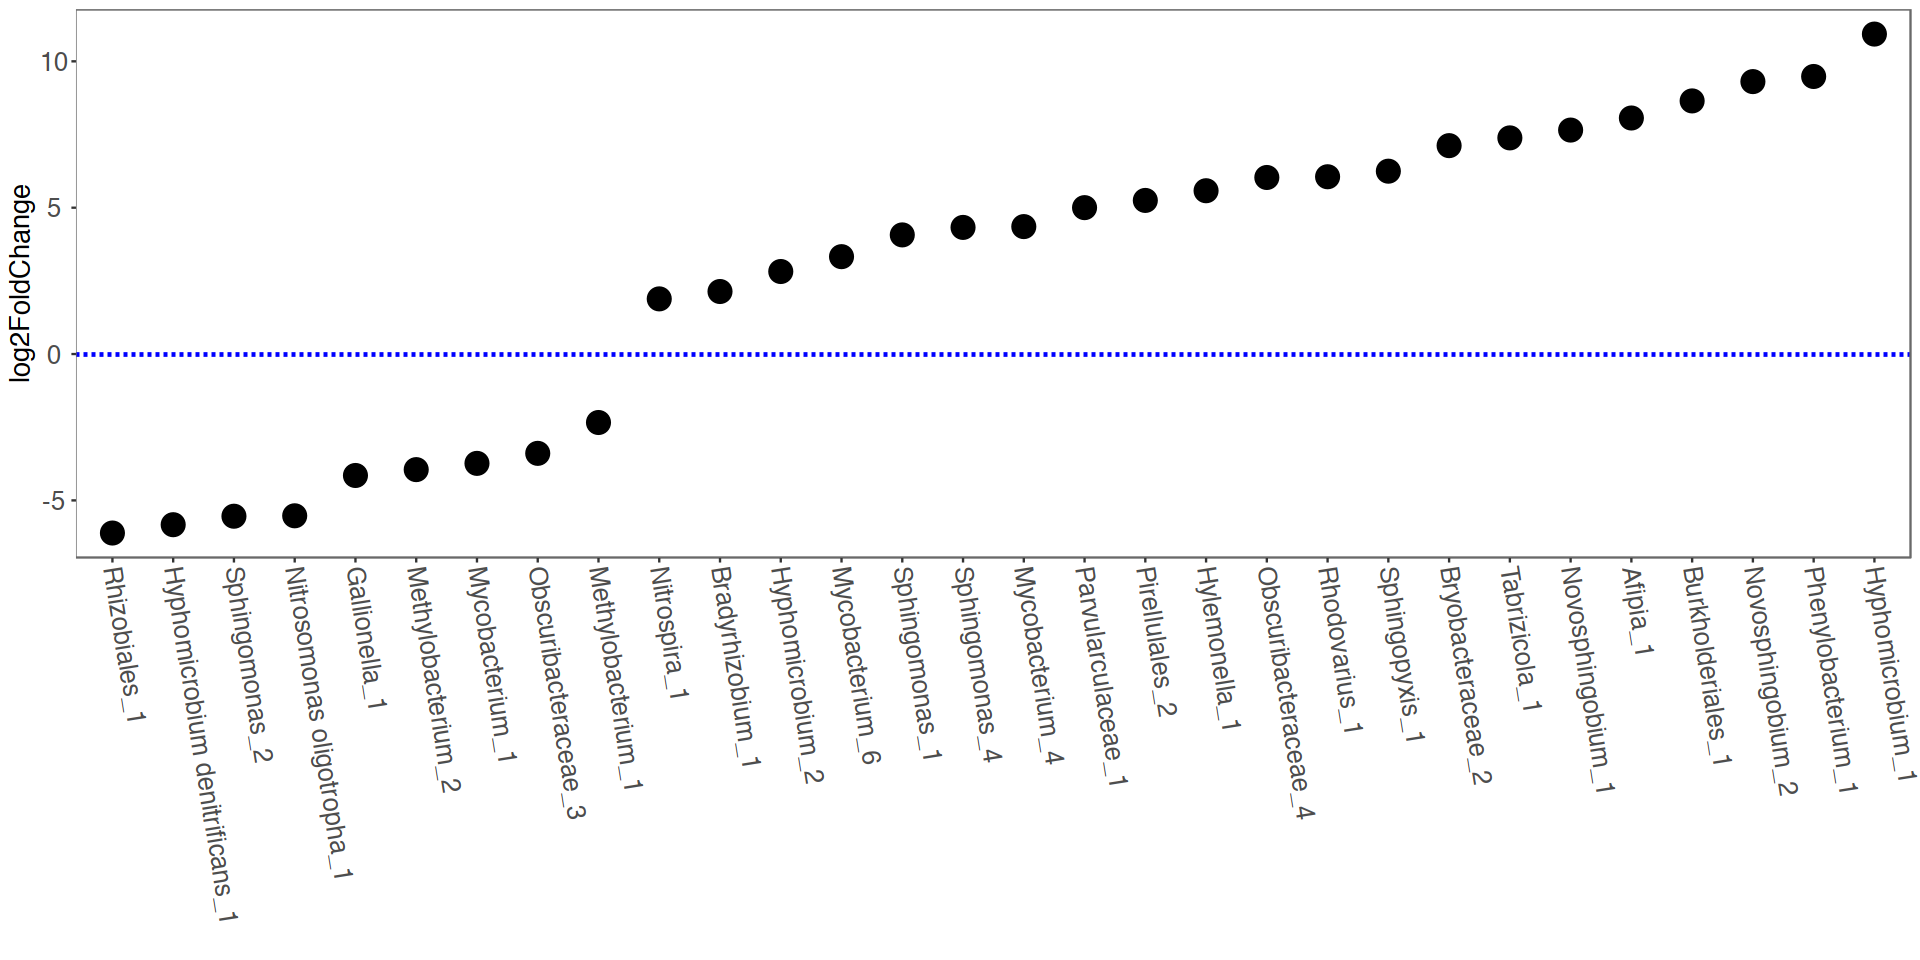

In [139]:
# Plot deseq2 results for species level

options(repr.plot.width = 16, repr.plot.height = 8)
ggplot(deseq_df, aes(x=bin_tax_name, y=log2FoldChange)) + geom_point(size=6) + 
geom_hline(yintercept= 0, linetype= "dashed", size= 1, color= "blue")+
xlab("")+
  theme(axis.text.x = element_text(angle = -81, hjust = 0, vjust=0.5, size= 15),
       axis.text.y = element_text( hjust = 0.5, vjust=0.5, size= 15),
       axis.title.y = element_text(size =16), 
       panel.background = element_rect(fill = "white"),panel.border = element_rect(colour = "#696969",size=0.5, fill = "transparent"))

# If it's <0 (like nitrosomonas), that means it was promoted in phase 1
# Each x label is the genus + species of the bin it represents. An extra label was added if two bins had the same taxonomy.

ggsave(paste0(fig_dir, 'deseq_aronly.pdf'), width=16, height=8)


### DESEQ across phases, tapres only

In [117]:
#set up df structure 

coverage_rounded <- (coverage_norm_df) %>% dplyr::select(c(tapres_134, tapres_162, tapres_372, tapres_387)) %>% round() 
rownames(coverage_rounded) <- coverage_norm_df$bins
coverage_rounded["total"] <- rowSums(coverage_rounded[])
# coverage_rounded["total"] <- coverage_rounded[rowSums(coverage_rounded[])>0,]
coverage_rounded["bins"] <- coverage_norm_df$bins
coverage_rounded <- coverage_rounded %>% subset(total != 0)
bin_order <- coverage_rounded$bins

coverage_rounded <- (coverage_rounded) %>% dplyr::select(-c(bins,total))
rownames(coverage_rounded) <- bin_order


In [118]:
# tax_nocontrols_transp <- t(cov_wide_nocontrols[ order(as.numeric(row.names(cov_wide_nocontrols))), ])#52x34
arbf3 <- arbf2
arbf3["sample_id"] <- rownames(arbf3)
arbf3 <- arbf3 %>% subset(type == "tapres")
rownames(arbf3) <- arbf3$sample_id
arbf3_rows <- sort(rownames(arbf3))
arbf3_order <- arbf3[ sort((row.names(arbf3))), ] # 34x6
rownames(arbf3_order) <- arbf3_rows
# tax_nocontrols_transp
arbf3_order

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”


ARBF type   day phase AR     sampling_event AR_num cl_total temp pH  
1 AR   tapres 134 1     tapres 23             tapres 1.64     22.8 8.47
2 AR   tapres 162 1     tapres 27             tapres 1.75     22.7 9.04
3 AR   tapres 372 2     tapres 40             tapres 0.78     24.6 8.77
4 AR   tapres 387 2     tapres 41             tapres 0.61     23.8 8.56
  sample_id 
1 tapres_134
2 tapres_162
3 tapres_372
4 tapres_387

In [119]:
# Construct DESEQDataSet Object
dds <- DESeqDataSetFromMatrix(countData= coverage_rounded, 
                              colData=arbf3_order, ~phase)
dds


converting counts to integer mode

  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function



class: DESeqDataSet 
dim: 69 4 
metadata(1): version
assays(1): counts
rownames(69): ARSTAG_ARBF_12345_pre_bin_16_2
  ARSTAG_ARBF_12345_pre_bin_2_2 ... ARSTAG_TAPRES_TAPRES_41_bin_33_1
  ARSTAG_TAPRES_TAPRES_41_bin_nitro_3
rowData names(0):
colnames(4): tapres_134 tapres_162 tapres_372 tapres_387
colData names(11): ARBF type ... pH sample_id

In [120]:
#Now we’re ready to run DESEQ function
diagdds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [121]:
res = results(diagdds, cooksCutoff = FALSE)
alpha = 0.01
sigtab = res[which(res$padj < alpha), ]
# sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(kostic)[rownames(sigtab), ], "matrix"))
head(sigtab)

log2 fold change (MLE): phase 
Wald test p-value: phase 
DataFrame with 1 row and 6 columns
                               baseMean log2FoldChange     lfcSE      stat
                              <numeric>      <numeric> <numeric> <numeric>
ARSTAG_ARBF_12345_pre_bin_4_1    494.43        12.7466    2.2146   5.75574
                                   pvalue        padj
                                <numeric>   <numeric>
ARSTAG_ARBF_12345_pre_bin_4_1 8.62634e-09 5.95217e-07

In [122]:
#manipulate deseq dataframe for species level
deseq_df <- as(sigtab, "data.frame")
deseq_df$bins <- row.names(deseq_df)

deseq_df <- merge(bin_info, deseq_df, by= "bins", all.y= TRUE)
# deseq_df["t_gs"] <- paste(deseq_df$t_genus, deseq_df$t_species)
# sort(deseq_df$t_gs)

deseq_df<- deseq_df[order(deseq_df$log2FoldChange),]
deseq_id <- deseq_df$bin_tax_name
deseq_df$bin_tax_name = factor(deseq_df$bin_tax_name, levels=deseq_id)
deseq_df

bins                          total_length num_contigs N50    GC_content
1 ARSTAG_ARBF_12345_pre_bin_4_1 5287748      130         109741 65.40027  
  percent_completion percent_redundancy t_domain t_phylum      
1 100                1.408451           Bacteria Proteobacteria
  t_class             ⋯ t_family         t_genus          t_species
1 Alphaproteobacteria ⋯ Beijerinckiaceae Methylobacterium NA       
  bin_tax_name       baseMean log2FoldChange lfcSE    stat     pvalue      
1 Methylobacterium_1 494.4304 12.74664       2.214596 5.755739 8.626338e-09
  padj        
1 5.952173e-07

In [123]:
# Plot deseq2 results for species level

# options(repr.plot.width = 8, repr.plot.height = 4)
# ggplot(deseq_df, aes(x=bin_tax_name, y=log2FoldChange)) + geom_point(size=6) + 
# geom_hline(yintercept= 0, linetype= "dashed", size= 1, color= "blue")+
# xlab("")+
#   theme(axis.text.x = element_text(angle = -75, hjust = 0, vjust=0.5, size= 15),
#        axis.text.y = element_text( hjust = 0.5, vjust=0.5, size= 15),
#        axis.title.y = element_text(size =16), 
#        panel.background = element_rect(fill = "white"),panel.border = element_rect(colour = "#696969",size=0.5, fill = "transparent"))

# If it's <0 (like nitrosomonas), that means it was promoted in phase 1
# Each x label is the genus + species of the bin it represents. An extra label was added if two bins had the same taxonomy.


### DESEQ AR vs BF Taxonomy

In [124]:
#set up df structure 

coverage_rounded <- (coverage_norm_df) %>% dplyr::select(-c(bins, control_mock1e10, control_mock1e8, slidecontrol_387, manifcontrol_387,
                                                       tapres_372, tapres_387, tapres_134, tapres_162,
                                                      AR1_134,AR2_134,AR3_134,AR4_134,AR5_134,AR1_162,AR2_162,AR3_162,AR4_162,AR5_162 )) %>% round() 
rownames(coverage_rounded) <- coverage_norm_df$bins
coverage_rounded["total"] <- rowSums(coverage_rounded[])
# coverage_rounded["total"] <- coverage_rounded[rowSums(coverage_rounded[])>0,]
coverage_rounded["bins"] <- coverage_norm_df$bins
coverage_rounded <- coverage_rounded %>% subset(total != 0)
bin_order <- coverage_rounded$bins

coverage_rounded <- (coverage_rounded) %>% dplyr::select(-c(bins,total))
rownames(coverage_rounded) <- bin_order

#set up second matrix
arbf3 <- arbf2
arbf3["sample_id"] <- rownames(arbf3)
arbf3 <- arbf3 %>% subset(type != "tapres") %>% subset(phase != 1)
rownames(arbf3) <- arbf3$sample_id
arbf3_rows <- sort(rownames(arbf3))
arbf3_order <- arbf3[ sort((row.names(arbf3))), ] # 34x6
rownames(arbf3_order) <- arbf3_rows
# tax_nocontrols_transp


Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”


In [125]:
# Construct DESEQDataSet Object
dds <- DESeqDataSetFromMatrix(countData= coverage_rounded, 
                              colData=arbf3_order, ~type)
dds

#Now we’re ready to run DESEQ function
diagdds <- DESeq(dds)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 58 20 
metadata(1): version
assays(1): counts
rownames(58): ARSTAG_ARBF_12345_pre_bin_16_2
  ARSTAG_ARBF_12345_pre_bin_2_2 ... ARSTAG_TAPRES_TAPRES_41_bin_28_3
  ARSTAG_TAPRES_TAPRES_41_bin_nitro_3
rowData names(0):
colnames(20): AR1_372 AR1_387 ... BF5_372 BF5_387
colData names(11): ARBF type ... pH sample_id

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 4 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [126]:
#configuring results
res = results(diagdds, cooksCutoff = FALSE)
alpha = 0.01
sigtab = res[which(res$padj < alpha), ]
# sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(kostic)[rownames(sigtab), ], "matrix"))

#manipulate deseq dataframe for species level
deseq_df <- as(sigtab, "data.frame")
deseq_df$bins <- row.names(deseq_df)

deseq_df <- merge(bin_info, deseq_df, by= "bins", all.y= TRUE)
# deseq_df["t_gs"] <- paste(deseq_df$t_genus, deseq_df$t_species)
# sort(deseq_df$t_gs)

deseq_df<- deseq_df[order(deseq_df$log2FoldChange),]
deseq_id <- deseq_df$bin_tax_name
bf_deseq_bins <- deseq_df$bin_tax_name
deseq_df$bin_tax_name = factor(deseq_df$bin_tax_name, levels=deseq_id)

In [127]:
deseq_df

bins                                     total_length num_contigs N50   
3 ARSTAG_ARBF_12345_pre_bin_4_1            5287748      130         109741
2 ARSTAG_ARBF_1_post_bin_mycob_7           5718300      917          10032
5 ARSTAG_ARBF_4_post_bin_26                3288073       74          98654
7 ARSTAG_ARBF_5_post_bin_15_2              4266691       42         203894
8 ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_n_1 3162924      857           5275
1 ARSTAG_AR_4_27_bin_26_4                  3095794      177          22480
6 ARSTAG_ARBF_4_post_bin_7                 7044622      145          84107
4 ARSTAG_ARBF_4_post_bin_20                7054827      187          65259
  GC_content percent_completion percent_redundancy t_domain t_phylum        
3 65.40027   100.00000          1.408451           Bacteria Proteobacteria  
2 67.29149    98.59155          1.408451           Bacteria Actinobacteriota
5 63.87737   100.00000          0.000000           Bacteria Proteobacteria  
7 65.45818   100.00000          1.408451           Bacteria Proteobacteria  
8 58.41427    92.95775          5.633803           Bacteria Nitrospirota    
1 60.00696    94.36620          0.000000           Bacteria Proteobacteria  
6 68.93382    98.59155          4.225352           Bacteria Planctomycetota 
4 72.39187    98.59155          1.408451           Bacteria Planctomycetota 
  t_class             ⋯ t_family          t_genus         
3 Alphaproteobacteria ⋯ Beijerinckiaceae  Methylobacterium
2 Actinomycetia       ⋯ Mycobacteriaceae  Mycobacterium   
5 Alphaproteobacteria ⋯ Sphingomonadaceae Novosphingobium 
7 Alphaproteobacteria ⋯ Sphingomonadaceae Novosphingobium 
8 Nitrospiria         ⋯ Nitrospiraceae    Nitrospira      
1 Alphaproteobacteria ⋯ Hyphomicrobiaceae Hyphomicrobium  
6 Planctomycetes      ⋯ Ga0077529         Ga0077529       
4 Planctomycetes      ⋯ NA                NA              
  t_species                   bin_tax_name       baseMean   log2FoldChange
3 NA                          Methylobacterium_1   3.469294 -3.899830     
2 NA                          Mycobacterium_3     35.678879 -3.038861     
5 NA                          Novosphingobium_1   13.855987 -2.918026     
7 Novosphingobium sp900117425 Novosphingobium_2   50.242071 -2.248280     
8 NA                          Nitrospira_1       319.648149  1.672847     
1 Hyphomicrobium sp002928515  Hyphomicrobium_3    10.877344  2.088079     
6 Ga0077529 sp001464525       Pirellulales_2      12.723949  2.597687     
4 NA                          Planctomycetes_1    18.297580  2.655538     
  lfcSE     stat      pvalue       padj        
3 0.8183381 -4.765549 1.883405e-06 2.071745e-05
2 0.5754471 -5.280869 1.285724e-07 1.885728e-06
5 0.5246079 -5.562299 2.662429e-08 1.171469e-06
7 0.4241984 -5.300068 1.157597e-07 1.885728e-06
8 0.4979501  3.359467 7.809288e-04 4.295108e-03
1 0.5470740  3.816812 1.351871e-04 9.913720e-04
6 0.7407999  3.506598 4.538746e-04 2.852926e-03
4 0.6487733  4.093168 4.255185e-05 3.744563e-04

In [128]:
# bin_info
enriched_bulk <- deseq_df$bins[deseq_df$log2FoldChange < 0]
enriched_bf <- deseq_df$bins[deseq_df$log2FoldChange > 0]

enriched_p1

enrichedbulkbf <- deseq_df %>% dplyr::select(bins, log2FoldChange, padj)
enrichedbulkbf

[1] "ARSTAG_ARBF_12345_pre_bin_40_2"             
[2] "ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_20_3"  
[3] "ARSTAG_ARBF_12345_pre_bin_16_2"             
[4] "ARSTAG_AR_4_27_bin_3_2"                     
[5] "ARSTAG_TAPRES_TAPRES_40_bin_13_3"           
[6] "ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_meth_1"
[7] "ARSTAG_ARBF_5_post_bin_5"                   
[8] "ARSTAG_TAPRES_TAPRES_23_bin_8_1"            
[9] "ARSTAG_ARBF_12345_pre_bin_4_1"

bins                                     log2FoldChange padj        
3 ARSTAG_ARBF_12345_pre_bin_4_1            -3.899830      2.071745e-05
2 ARSTAG_ARBF_1_post_bin_mycob_7           -3.038861      1.885728e-06
5 ARSTAG_ARBF_4_post_bin_26                -2.918026      1.171469e-06
7 ARSTAG_ARBF_5_post_bin_15_2              -2.248280      1.885728e-06
8 ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_n_1  1.672847      4.295108e-03
1 ARSTAG_AR_4_27_bin_26_4                   2.088079      9.913720e-04
6 ARSTAG_ARBF_4_post_bin_7                  2.597687      2.852926e-03
4 ARSTAG_ARBF_4_post_bin_20                 2.655538      3.744563e-04

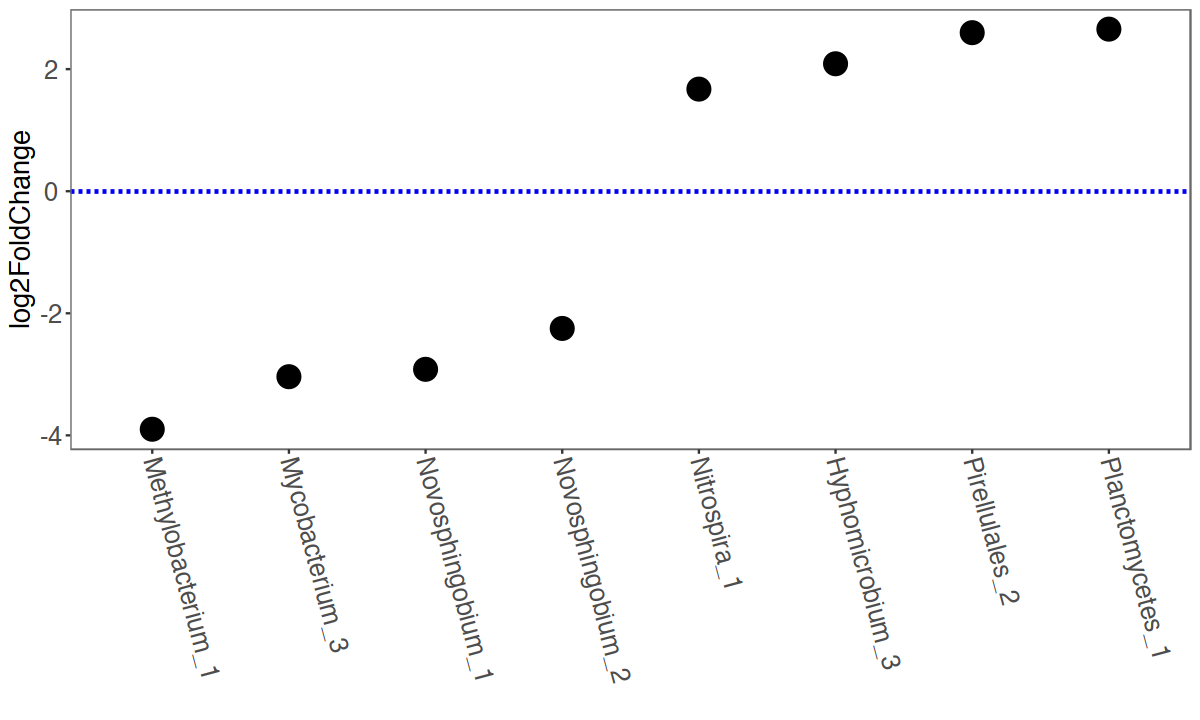

In [129]:
# Plot deseq2 results for species level

options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(deseq_df, aes(x=bin_tax_name, y=log2FoldChange)) + geom_point(size=6) + 
geom_hline(yintercept= 0, linetype= "dashed", size= 1, color= "blue")+
xlab("")+
  theme(axis.text.x = element_text(angle = -75, hjust = 0, vjust=0.5, size= 15),
       axis.text.y = element_text( hjust = 0.5, vjust=0.5, size= 15),
       axis.title.y = element_text(size =16), 
       panel.background = element_rect(fill = "white"),panel.border = element_rect(colour = "#696969",size=0.5, fill = "transparent"))

# If it's <0 , that means it was promoted in bulk water over biofilm
# Each x label is the genus + species of the bin it represents. An extra label was added if two bins had the same taxonomy.


# Kegg Functional Analysis

Kegg database and explanation of pathways can be found here: https://www.genome.jp/brite/query=02026&htext=br08901.keg&option=-a&node_proc=br08901_org&proc_enabled=map&panel=collapse

In [130]:
# unique(kegg_df$module_is_complete)
length(kegg_df$module_subcategory) #17752 modules identified 
length(kegg_df$module_subcategory[kegg_df$module_is_complete == TRUE]) #6556 complete kegg modules
unique(kegg_df$module_subcategory[kegg_df$module_is_complete == TRUE]) 



[1] 17752

[1] 6556

[1] "Central carbohydrate metabolism"          
 [2] "Other carbohydrate metabolism"            
 [3] "Carbon fixation"                          
 [4] "Nitrogen metabolism"                      
 [5] "Sulfur metabolism"                        
 [6] "ATP synthesis"                            
 [7] "Fatty acid metabolism"                    
 [8] "Lipid metabolism"                         
 [9] "Purine metabolism"                        
[10] "Pyrimidine metabolism"                    
[11] "Serine and threonine metabolism"          
[12] "Cysteine and methionine metabolism"       
[13] "Branched-chain amino acid metabolism"     
[14] "Lysine metabolism"                        
[15] "Arginine and proline metabolism"          
[16] "Polyamine biosynthesis"                   
[17] "Histidine metabolism"                     
[18] "Aromatic amino acid metabolism"           
[19] "Lipopolysaccharide metabolism"            
[20] "Cofactor and vitamin metabolism"          
[21] "Terpenoid backbone biosynthesis"          
[22] "Polyketide sugar unit biosynthesis"       
[23] "Pathogenicity"                            
[24] "Photosynthesis"                           
[25] "Other amino acid metabolism"              
[26] "Drug resistance"                          
[27] "Metabolic capacity"                       
[28] "Methane metabolism"                       
[29] "Biosynthesis of other bacterial compounds"
[30] "Aromatics degradation"                    
[31] "Biosynthesis of other antibiotics"

## Pathogens

In [131]:
# Complete Pathogenicity modules
## Only 1 bin had a complete pathogenicity module and it's a fairly novel organism, just named after being constructed from a MAG in 2021 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8086206/ 

kegg_df[(kegg_df$module_subcategory == "Pathogenicity") & (kegg_df$module_is_complete == TRUE),]
bin_info[bin_info$bins == "ARSTAG_TAPRES_TAPRES_40_bin_1_5", ]

unique_id bin_name                        kegg_module
1 176       ARSTAG_TAPRES_TAPRES_40_bin_1_5 M00575     
  module_name                             module_class      module_category
1 Pertussis pathogenicity signature, T1SS Signature modules Gene set       
  module_subcategory module_definition                  module_completeness
1 Pathogenicity      K22944 K11004 K07389 K11003 K12340 0.8                
  module_is_complete kofam_hits_in_module              
1 TRUE               K07389,K11003,K11004,K12340,K12340
  gene_caller_ids_in_module               warnings
1 157,213,157,215,157,000,000,000,000,000 None

bins                            total_length num_contigs N50   GC_content
73 ARSTAG_TAPRES_TAPRES_40_bin_1_5 3699494      143         36774 63.86603  
   percent_completion percent_redundancy t_domain t_phylum      
73 94.3662            2.816901           Bacteria Proteobacteria
   t_class             t_order         t_family       t_genus
73 Gammaproteobacteria Burkholderiales Rhodocyclaceae Fen-999
   t_species           bin_tax_name    
73 Fen-999 sp003158255 Rhodocyclaceae_1

## amoA/pmoA quantification

In [132]:
# AR2_134 was the only sample with quantifiable amoA by qPCR. Did metagenomics confirm?

#import quality table by sample to find number of total reads
    quality_samp2 <- merge(quality_samp, id2code, by.x='sample_id', by.y='ggkbase_project_name')
    quality_samp2 <- subset(quality_samp2, select= -c(sample_id_old,sample_id))
    quality_samp2 <- quality_samp2 %>% dplyr::rename("sample_id"="sample_id.y") 
    quality_samp2["amoA_gc.L"] <- ""

samp_list <- c('tapres_134','AR1_134','AR2_134','AR3_134','AR4_134','AR5_134' ,'tapres_162', 'AR1_162','AR2_162','AR3_162','AR4_162','AR5_162',
         'tapres_372','AR1_372','AR2_372','AR3_372','AR4_372','AR5_372','tapres_387','AR1_387','AR2_387','AR3_387','AR4_387','AR5_387') #,'BF1_387','BF2_387','BF3_387','BF4_387','BF5_387','BF1_372','BF2_372','BF3_372','BF4_372','BF5_372',
for (test_sample in samp_list) {
    if (is.na(arbf$TCC_gmean[arbf$sample_id == test_sample]))
        quality_samp2$amoA_gc.L[quality_samp2$sample_id == test_sample] <- "NC"
    else 
        # test_sample <- "AR2_134"
        AR2_134_Freads <- quality_samp2$trim_num_seq_F[quality_samp2$sample_id == test_sample] 

        #find which bins have amoA = K10944
        amoA_bins <- unique(kegg_df$bin_name[str_detect(kegg_df$kofam_hits_in_module, "K10944")])
        # kegg_df %>% filter(str_detect(kofam_hits_in_module, "K10944")) %>% group_by(bin_name) %>% dplyr::summarise(amoA_count = n()) #shows up 3x in each bin, 3 modules contain amoA

        #find TCC for this sample
        AR2_134_TCC <- arbf$TCC_gmean[arbf$sample_id == test_sample]

        # find coverage of AR2_134 reads for these bins
        AR2_134_df <- coverage_df %>% subset(bins %in% amoA_bins) %>% dplyr::select(c(bins, AR2_134))
        AR2_134_df["cov_frac"] <- AR2_134_df$AR2_134 / (AR2_134_Freads *2) 
        AR2_134_df["cov_cells.mL"] <- AR2_134_df$cov_frac * AR2_134_TCC

        quality_samp2$amoA_gc.L[quality_samp2$sample_id == test_sample] <- round(sum(AR2_134_df$cov_cells.mL)*1000, 2) #detected amoA in gc/L in this sample
    }

quality_samp2 %>% dplyr::select(sample_id, amoA_gc.L) %>% drop_na()


sample_id        amoA_gc.L
1  AR1_134          18.87    
2  AR1_162          10.1     
3  AR1_372          865.46   
4  AR1_387          642.54   
5  AR2_134          45.16    
6  AR2_162          44.22    
7  AR2_372          1146.67  
8  AR2_387          503.35   
9  AR3_134          17.77    
10 AR3_162          8.26     
11 AR3_372          345.5    
12 AR3_387          550.31   
13 AR4_134          13.66    
14 AR4_162          3.71     
15 AR4_372          305.42   
16 AR4_387          573.93   
17 AR5_134          33.49    
18 AR5_162          31.04    
19 AR5_372          596.94   
20 AR5_387          384.98   
21 BF1_372                   
22 BF1_387                   
23 BF2_372                   
24 BF2_387                   
25 BF3_372                   
26 BF3_387                   
27 BF4_372                   
28 BF4_387                   
29 BF5_372                   
30 BF5_387                   
31 slidecontrol_387          
32 manifcontrol_387          
33 control_mock1e10          
34 control_mock1e8           
35 tapres_134       3.42     
36 tapres_162       2.64     
37 tapres_372       6.45     
38 tapres_387       7.6

## DESEQ2 with KEGG modules

In [133]:
# deseq analysis on the pathways by renaming coverage_df bins to pathways and summarizing


kegg_tax <- merge(bin_info, kegg_df, by.x= "bins",by.y= "bin_name", all.y=T)
kegg_cover_all <- merge(kegg_tax, coverage_df, by= "bins", all=T)
kegg_cover <- kegg_cover_all %>% subset(module_is_complete == TRUE) %>% dplyr::select(-c(control_mock1e10, control_mock1e8, slidecontrol_387, manifcontrol_387,
                                             total_length, num_contigs, N50, GC_content, percent_completion, percent_redundancy, t_domain,
                                             t_phylum, t_class, t_order, t_family, unique_id, module_class, module_definition, kofam_hits_in_module,
                                             gene_caller_ids_in_module, warnings, module_is_complete, module_completeness))

head(kegg_cover)
# module_name ~ phase


bins                    t_genus t_species           bin_tax_name       
1  ARSTAG_AR_4_27_bin_23_1 SG-bin9 SG-bin9 sp002083525 Xanthobacteraceae_1
3  ARSTAG_AR_4_27_bin_23_1 SG-bin9 SG-bin9 sp002083525 Xanthobacteraceae_1
5  ARSTAG_AR_4_27_bin_23_1 SG-bin9 SG-bin9 sp002083525 Xanthobacteraceae_1
7  ARSTAG_AR_4_27_bin_23_1 SG-bin9 SG-bin9 sp002083525 Xanthobacteraceae_1
18 ARSTAG_AR_4_27_bin_23_1 SG-bin9 SG-bin9 sp002083525 Xanthobacteraceae_1
19 ARSTAG_AR_4_27_bin_23_1 SG-bin9 SG-bin9 sp002083525 Xanthobacteraceae_1
   kegg_module
1  M00011     
3  M00007     
5  M00005     
7  M00308     
18 M00909     
19 M00012     
   module_name                                                                
1  Citrate cycle, second carbon oxidation, 2-oxoglutarate => oxaloacetate     
3  Pentose phosphate pathway, non-oxidative phase, fructose 6P => ribose 5P   
5  PRPP biosynthesis, ribose 5P => PRPP                                       
7  Semi-phosphorylative Entner-Doudoroff pathway, gluconate => glycerate-3P   
18 UDP-N-acetyl-D-glucosamine biosynthesis, prokaryotes, glucose => UDP-GlcNAc
19 Glyoxylate cycle                                                           
   module_category         module_subcategory              AR1_134  AR1_162  ⋯
1  Carbohydrate metabolism Central carbohydrate metabolism 31.02789 30.16481 ⋯
3  Carbohydrate metabolism Central carbohydrate metabolism 31.02789 30.16481 ⋯
5  Carbohydrate metabolism Central carbohydrate metabolism 31.02789 30.16481 ⋯
7  Carbohydrate metabolism Central carbohydrate metabolism 31.02789 30.16481 ⋯
18 Carbohydrate metabolism Other carbohydrate metabolism   31.02789 30.16481 ⋯
19 Carbohydrate metabolism Other carbohydrate metabolism   31.02789 30.16481 ⋯
   BF3_372 BF3_387  BF4_372  BF4_387  BF5_372  BF5_387  tapres_134 tapres_162
1  2.09313 2.618204 74.53783 69.25243 62.95091 53.38507 3.222733   4.996256  
3  2.09313 2.618204 74.53783 69.25243 62.95091 53.38507 3.222733   4.996256  
5  2.09313 2.618204 74.53783 69.25243 62.95091 53.38507 3.222733   4.996256  
7  2.09313 2.618204 74.53783 69.25243 62.95091 53.38507 3.222733   4.996256  
18 2.09313 2.618204 74.53783 69.25243 62.95091 53.38507 3.222733   4.996256  
19 2.09313 2.618204 74.53783 69.25243 62.95091 53.38507 3.222733   4.996256  
   tapres_372 tapres_387
1  0          3.719477  
3  0          3.719477  
5  0          3.719477  
7  0          3.719477  
18 0          3.719477  
19 0          3.719477

In [134]:
# melt data to long format for plotting
ids <- c('tapres_134','AR1_134','AR2_134','AR3_134','AR4_134','AR5_134' ,
         'tapres_162', 'AR1_162','AR2_162','AR3_162','AR4_162','AR5_162',
         'tapres_372','AR1_372','AR2_372','AR3_372','AR4_372','AR5_372','BF1_372','BF2_372','BF3_372','BF4_372','BF5_372',
         'tapres_387','AR1_387','AR2_387','AR3_387','AR4_387','AR5_387','BF1_387','BF2_387','BF3_387','BF4_387','BF5_387') #'bins','t_genus','t_species','kegg_module','module_name','module_category','module_subcategory')

kegg_cover_long <- pivot_longer(kegg_cover,
                        cols = all_of(ids), names_to = 'sample_id', values_to = 'coverage')

# #coverage of each genus for plotting
kegg_coverage <- kegg_cover_long %>% group_by(sample_id, kegg_module) %>% dplyr::summarise(coverage=round(sum(coverage))) %>% ungroup()

head(kegg_coverage)



`summarise()` has grouped output by 'sample_id'. You can override using the `.groups` argument.


sample_id kegg_module coverage
1 AR1_134   M00001      839     
2 AR1_134   M00002      848     
3 AR1_134   M00003      813     
4 AR1_134   M00004      751     
5 AR1_134   M00005      873     
6 AR1_134   M00006      533

In [135]:
kegg_deseq <- pivot_wider(kegg_coverage, id_cols= kegg_module,  names_from = sample_id, values_from = coverage)
rownames(kegg_deseq) <- kegg_deseq$kegg_module

kegg_order <- kegg_deseq$kegg_module
kegg_deseq <- kegg_deseq %>% dplyr::select(-(kegg_module))
kegg_deseq <- data.matrix(kegg_deseq)
rownames(kegg_deseq) <- kegg_order

# cov_wide <- subset(cov_wide, select= -c(sample_id))
# row.names(cov_wide) <- rownames
# cov_wide <- as.matrix(cov_wide) #convert to matrix
head(kegg_deseq)

Warning message:
“Setting row names on a tibble is deprecated.”


AR1_134 AR1_162 AR1_372 AR1_387 AR2_134 AR2_162 AR2_372 AR2_387 AR3_134
M00001 839     805     1589    1722    1646    1480    1231    1744    1631   
M00002 848     828     1670    1904    1424    1451    1273    1771    1615   
M00003 813     794     1586    1716    1280    1283    1231    1744    1583   
M00004 751     662      508    1187     735     607     989    1451    1501   
M00005 873     837     1673    1910    1789    1629    1273    1771    1659   
M00006 533     454      388    1021     552     541     518     855     896   
       AR3_162 ⋯ BF3_372 BF3_387 BF4_372 BF4_387 BF5_372 BF5_387 tapres_134
M00001 1555    ⋯ 1157    1221     672    1096    1176    1391    1161      
M00002 1545    ⋯ 1648    1769    1076    1700    1489    1726    1154      
M00003 1502    ⋯ 1154    1217     663    1083    1173    1386    1033      
M00004 1253    ⋯  463     693     390     763     850    1032     804      
M00005 1594    ⋯ 1651    1773    1085    1713    1492    1731    1211      
M00006  756    ⋯  767     967     650    1062     882     985     549      
       tapres_162 tapres_372 tapres_387
M00001  965       1764       1458      
M00002  955       1698       1544      
M00003  811       1611       1362      
M00004  630       1381       1225      
M00005 1015       1826       1613      
M00006  422       1338        821

In [136]:
#set second matrix
arbf2_rows <- sort(rownames(arbf2))
arbf2_order <- arbf2[ sort((row.names(arbf2))), ] # 34x6
rownames(arbf2_order) <- arbf2_rows
# tax_nocontrols_transp
arbf2_order

Warning message:
“Setting row names on a tibble is deprecated.”


ARBF type   day phase AR     sampling_event AR_num cl_total temp pH  
1  AR   AR     134 1     AR1    23             1      1.18     22.3 7.92
2  AR   AR     162 1     AR1    27             1      1.21     23.0 8.26
3  AR   AR     372 2     AR1    40             1      0.04     24.4 7.56
4  AR   AR     387 2     AR1    41             1      0.00     23.1 7.69
5  AR   AR     134 1     AR2    23             2      0.65     22.3 7.55
6  AR   AR     162 1     AR2    27             2      0.57     22.7 7.66
7  AR   AR     372 2     AR2    40             2      0.01     24.5 7.42
8  AR   AR     387 2     AR2    41             2      0.01     23.4 7.52
9  AR   AR     134 1     AR3    23             3      1.09     22.3 8.09
10 AR   AR     162 1     AR3    27             3      1.24     22.8 8.20
11 AR   AR     372 2     AR3    40             3      0.05     24.5 7.40
12 AR   AR     387 2     AR3    41             3      0.00     23.3 7.38
13 AR   AR     134 1     AR4    23             4      1.07     22.3 8.01
14 AR   AR     162 1     AR4    27             4      1.37     22.7 8.30
15 AR   AR     372 2     AR4    40             4      0.00     24.4 7.38
16 AR   AR     387 2     AR4    41             4      0.07     23.3 7.41
17 AR   AR     134 1     AR5    23             5      1.00     22.2 7.98
18 AR   AR     162 1     AR5    27             5      0.37     22.1 7.03
19 AR   AR     372 2     AR5    40             5      0.00     24.6 7.40
20 AR   AR     387 2     AR5    41             5      0.06     23.5 7.40
21 BF   BF     372 2     BF1    NA             1        NA       NA   NA
22 BF   BF     387 2     BF1    NA             1        NA       NA   NA
23 BF   BF     372 2     BF2    NA             2        NA       NA   NA
24 BF   BF     387 2     BF2    NA             2        NA       NA   NA
25 BF   BF     372 2     BF3    NA             3        NA       NA   NA
26 BF   BF     387 2     BF3    NA             3        NA       NA   NA
27 BF   BF     372 2     BF4    NA             4        NA       NA   NA
28 BF   BF     387 2     BF4    NA             4        NA       NA   NA
29 BF   BF     372 2     BF5    NA             5        NA       NA   NA
30 BF   BF     387 2     BF5    NA             5        NA       NA   NA
31 AR   tapres 134 1     tapres 23             tapres 1.64     22.8 8.47
32 AR   tapres 162 1     tapres 27             tapres 1.75     22.7 9.04
33 AR   tapres 372 2     tapres 40             tapres 0.78     24.6 8.77
34 AR   tapres 387 2     tapres 41             tapres 0.61     23.8 8.56

In [137]:
# Construct DESEQDataSet Object
dds <- DESeqDataSetFromMatrix(countData= kegg_deseq, 
                              colData=arbf2_order, ~phase)
dds

# #Now we’re ready to run DESEQ function
diagdds <- DESeq(dds)

converting counts to integer mode

  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function



class: DESeqDataSet 
dim: 195 34 
metadata(1): version
assays(1): counts
rownames(195): M00001 M00002 ... M00930 M00931
rowData names(0):
colnames(34): AR1_134 AR1_162 ... tapres_372 tapres_387
colData names(10): ARBF type ... temp pH

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 6 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [138]:
res = results(diagdds, cooksCutoff = FALSE)
alpha = 0.01
sigtab = res[which(res$padj < alpha), ]
# sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(kostic)[rownames(sigtab), ], "matrix"))
head(sigtab)

log2 fold change (MLE): phase 
Wald test p-value: phase 
DataFrame with 6 rows and 6 columns
        baseMean log2FoldChange     lfcSE      stat      pvalue        padj
       <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
M00002 1485.4655       0.327970 0.0741770   4.42145 9.80403e-06 1.00491e-04
M00003 1268.8837       0.195558 0.0589805   3.31564 9.14336e-04 5.99804e-03
M00027   77.2307      -1.989980 0.3787088  -5.25465 1.48310e-07 3.47469e-06
M00033  117.4284      -2.083600 0.4184916  -4.97883 6.39689e-07 9.53718e-06
M00060  895.8988       1.198061 0.1773553   6.75515 1.42689e-11 1.17005e-09
M00063  994.9958       1.052942 0.1796633   5.86064 4.61081e-09 1.51235e-07

In [139]:
#manipulate deseq dataframe
deseq_df <- as(sigtab, "data.frame")
deseq_df$kegg <- row.names(deseq_df)
deseq_df<- deseq_df[order(deseq_df$log2FoldChange),]
deseq_id <- deseq_df$kegg
deseq_df$kegg = factor(deseq_df$kegg, levels=deseq_id)

In [140]:
deseq_df

baseMean    log2FoldChange lfcSE      stat      pvalue      
M00761    1.714961 -4.5065057     1.03374155 -4.359412 1.304122e-05
M00529   28.708487 -3.9855496     0.86927488 -4.584913 4.541757e-06
M00545  111.735797 -2.2544599     0.38339895 -5.880193 4.097879e-09
M00033  117.428391 -2.0835999     0.41849164 -4.978833 6.396887e-07
M00365   65.277712 -2.0660926     0.45330113 -4.557881 5.167233e-06
M00027   77.230715 -1.9899804     0.37870880 -5.254645 1.483101e-07
M00116   86.597500 -1.9641009     0.36376844 -5.399316 6.689533e-08
M00133  282.025100 -1.8179213     0.25702468 -7.072945 1.516801e-12
M00565  269.327297 -1.1037122     0.31897076 -3.460230 5.397141e-04
M00569  167.679891 -1.0723913     0.26796289 -4.002014 6.280550e-05
M00854  525.080715 -0.8604662     0.16865822 -5.101834 3.363779e-07
M00916  180.557561 -0.7501808     0.22998643 -3.261848 1.106885e-03
M00003 1268.883749  0.1955580     0.05898048  3.315640 9.143358e-04
M00002 1485.465541  0.3279701     0.07417704  4.421451 9.804035e-06
M00167  990.147032  0.3410424     0.09539616  3.575012 3.502123e-04
M00165  817.204529  0.3831729     0.10206422  3.754233 1.738732e-04
M00880 1430.885016  0.3973483     0.07935184  5.007423 5.516351e-07
M00595  381.883301  0.7355077     0.22879417  3.214714 1.305747e-03
M00597  350.882245  0.7620259     0.22449904  3.394339 6.879444e-04
M00373  507.651426  0.8842626     0.18912790  4.675474 2.932753e-06
M00612  338.446232  0.9094057     0.23498617  3.870039 1.088178e-04
M00866  978.148155  1.0476950     0.16408354  6.385131 1.712504e-10
M00063  994.995835  1.0529423     0.17966330  5.860642 4.610814e-09
M00156  713.941758  1.0655415     0.21676846  4.915575 8.852238e-07
M00060  895.898795  1.1980615     0.17735530  6.755149 1.426886e-11
M00613  208.489564  1.5207802     0.29160225  5.215255 1.835640e-07
M00153   53.204474  1.9016991     0.56069395  3.391688 6.946343e-04
M00623   32.949119  2.4705494     0.75763157  3.260885 1.110651e-03
       padj         kegg  
M00761 1.258094e-04 M00761
M00529 5.320344e-05 M00529
M00545 1.512347e-07 M00545
M00033 9.537177e-06 M00033
M00365 5.649508e-05 M00365
M00027 3.474693e-06 M00027
M00116 1.828472e-06 M00116
M00133 2.487554e-10 M00133
M00565 4.023323e-03 M00565
M00569 5.722279e-04 M00569
M00854 6.129553e-06 M00854
M00916 6.746177e-03 M00916
M00003 5.998043e-03 M00003
M00002 1.004914e-04 M00002
M00167 2.734991e-03 M00167
M00165 1.425760e-03 M00165
M00880 9.046816e-06 M00880
M00595 7.647947e-03 M00595
M00597 4.746668e-03 M00597
M00373 3.699781e-05 M00373
M00612 9.392695e-04 M00612
M00866 9.361688e-09 M00866
M00063 1.512347e-07 M00063
M00156 1.209806e-05 M00156
M00060 1.170046e-09 M00060
M00613 3.763063e-06 M00613
M00153 4.746668e-03 M00153
M00623 6.746177e-03 M00623

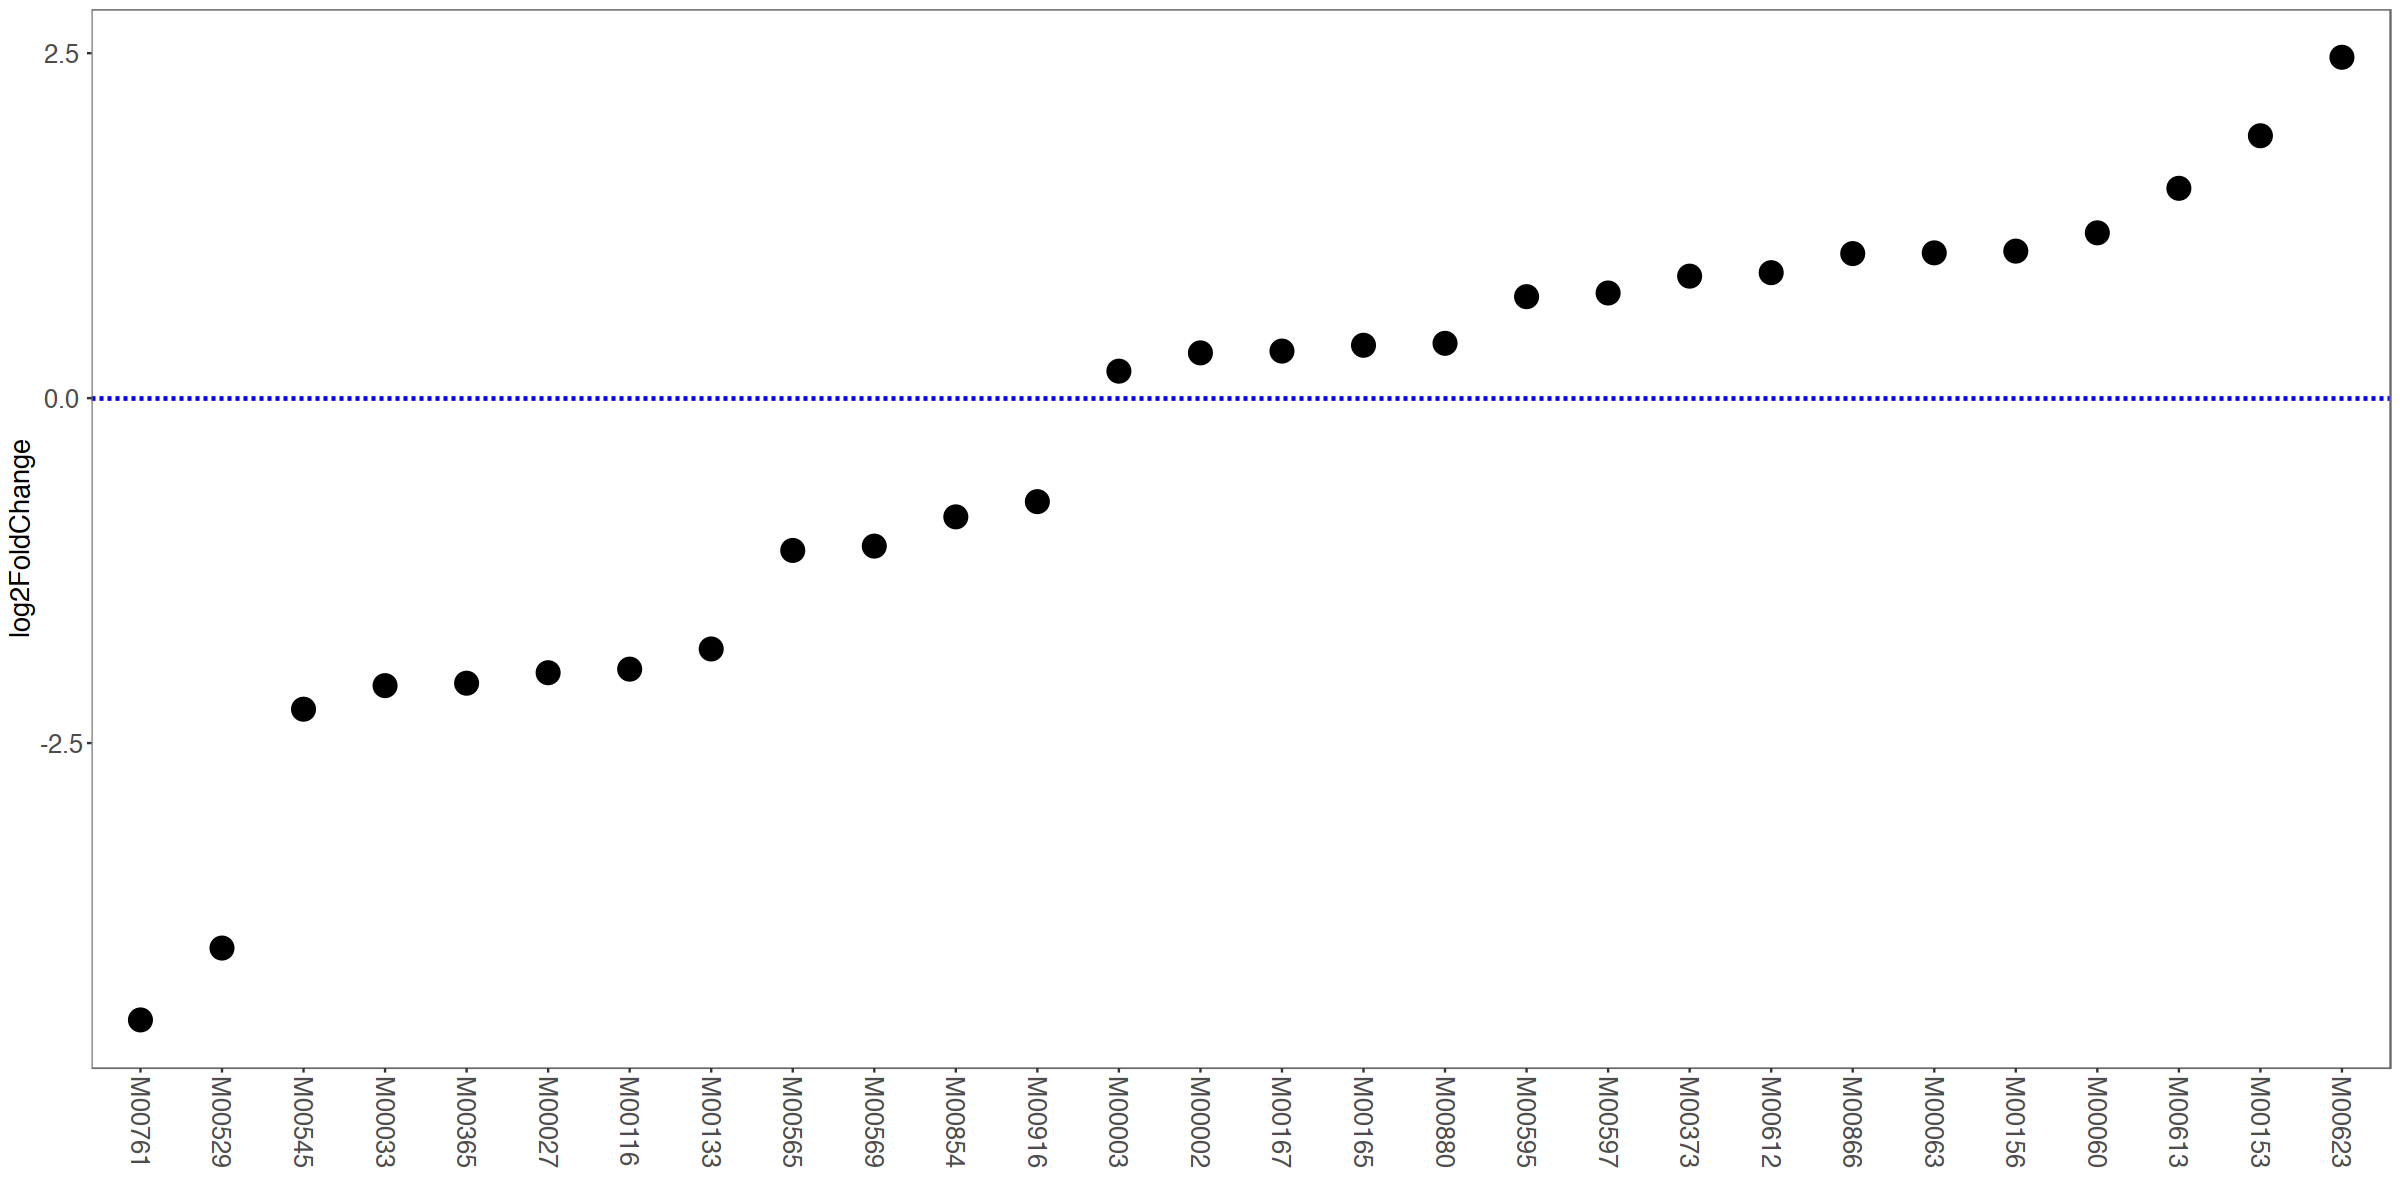

In [141]:
# Plot deseq2 results for species level

options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(deseq_df, aes(x=kegg, y=log2FoldChange)) + geom_point(size=6) + 
geom_hline(yintercept= 0, linetype= "dashed", size= 1, color= "blue")+
xlab("")+
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5, size= 15),
       axis.text.y = element_text( hjust = 0.5, vjust=0.5, size= 15),
       axis.title.y = element_text(size =16), 
       panel.background = element_rect(fill = "white"),panel.border = element_rect(colour = "#696969",size=0.5, fill = "transparent"))


### Kegg deseq2 phase 1 vs phase 2 (no biofilm)

In [142]:
#set up df
kegg_tax <- merge(bin_info, kegg_df, by.x= "bins",by.y= "bin_name", all.y=T)
kegg_cover <- merge(kegg_tax, coverage_df, by= "bins", all=T)
kegg_cover <- kegg_cover %>% subset(module_is_complete == TRUE) %>% dplyr::select(-c(control_mock1e10, control_mock1e8, slidecontrol_387, manifcontrol_387, BF5_372, BF5_387, BF4_372, BF4_387,
                                                      BF3_372, BF3_387,BF2_372, BF2_387,BF1_372, BF1_387,
                                             total_length, num_contigs, N50, GC_content, percent_completion, percent_redundancy, t_domain,
                                             t_phylum, t_class, t_order, t_family, unique_id, module_class, module_definition, kofam_hits_in_module,
                                             gene_caller_ids_in_module, warnings, module_is_complete, module_completeness))

# melt data to long format for plotting
ids <- c('tapres_134','AR1_134','AR2_134','AR3_134','AR4_134','AR5_134' ,
         'tapres_162', 'AR1_162','AR2_162','AR3_162','AR4_162','AR5_162',
         'tapres_372','AR1_372','AR2_372','AR3_372','AR4_372','AR5_372',
         'tapres_387','AR1_387','AR2_387','AR3_387','AR4_387','AR5_387') #'bins','t_genus','t_species','kegg_module','module_name','module_category','module_subcategory')

kegg_cover_long <- pivot_longer(kegg_cover,
                        cols = all_of(ids), names_to = 'sample_id', values_to = 'coverage')

# #coverage of each genus for plotting
kegg_coverage <- kegg_cover_long %>% group_by(sample_id, kegg_module) %>% dplyr::summarise(coverage=round(sum(coverage))) %>% ungroup()

kegg_deseq <- pivot_wider(kegg_coverage, id_cols= kegg_module,  names_from = sample_id, values_from = coverage)
rownames(kegg_deseq) <- kegg_deseq$kegg_module

kegg_order <- kegg_deseq$kegg_module
kegg_deseq <- kegg_deseq %>% dplyr::select(-(kegg_module))
kegg_deseq <- data.matrix(kegg_deseq)
rownames(kegg_deseq) <- kegg_order

head(kegg_deseq)


`summarise()` has grouped output by 'sample_id'. You can override using the `.groups` argument.
Warning message:
“Setting row names on a tibble is deprecated.”


AR1_134 AR1_162 AR1_372 AR1_387 AR2_134 AR2_162 AR2_372 AR2_387 AR3_134
M00001 839     805     1589    1722    1646    1480    1231    1744    1631   
M00002 848     828     1670    1904    1424    1451    1273    1771    1615   
M00003 813     794     1586    1716    1280    1283    1231    1744    1583   
M00004 751     662      508    1187     735     607     989    1451    1501   
M00005 873     837     1673    1910    1789    1629    1273    1771    1659   
M00006 533     454      388    1021     552     541     518     855     896   
       AR3_162 ⋯ AR4_372 AR4_387 AR5_134 AR5_162 AR5_372 AR5_387 tapres_134
M00001 1555    ⋯ 2295    1577    1147    1263    1832    1839    1161      
M00002 1545    ⋯ 2713    1768     697     989    1879    1915    1154      
M00003 1502    ⋯ 2281    1572     643     918    1831    1837    1033      
M00004 1253    ⋯ 1109     739     531     743    1613    1286     804      
M00005 1594    ⋯ 2727    1773    1197    1331    1881    1918    1211      
M00006  756    ⋯  903     709     365     543     777     737     549      
       tapres_162 tapres_372 tapres_387
M00001  965       1764       1458      
M00002  955       1698       1544      
M00003  811       1611       1362      
M00004  630       1381       1225      
M00005 1015       1826       1613      
M00006  422       1338        821

In [143]:
# tax_nocontrols_transp <- t(cov_wide_nocontrols[ order(as.numeric(row.names(cov_wide_nocontrols))), ])#52x34
arbf3 <- arbf2
arbf3["sample_id"] <- rownames(arbf3)
arbf3 <- arbf3 %>% subset(ARBF != "BF")
rownames(arbf3) <- arbf3$sample_id
arbf3_rows <- sort(rownames(arbf3))
arbf3_order <- arbf3[ sort((row.names(arbf3))), ] # 34x6
rownames(arbf3_order) <- arbf3_rows
# tax_nocontrols_transp
arbf3_order

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”


ARBF type   day phase AR     sampling_event AR_num cl_total temp pH  
1  AR   AR     134 1     AR1    23             1      1.18     22.3 7.92
2  AR   AR     162 1     AR1    27             1      1.21     23.0 8.26
3  AR   AR     372 2     AR1    40             1      0.04     24.4 7.56
4  AR   AR     387 2     AR1    41             1      0.00     23.1 7.69
5  AR   AR     134 1     AR2    23             2      0.65     22.3 7.55
6  AR   AR     162 1     AR2    27             2      0.57     22.7 7.66
7  AR   AR     372 2     AR2    40             2      0.01     24.5 7.42
8  AR   AR     387 2     AR2    41             2      0.01     23.4 7.52
9  AR   AR     134 1     AR3    23             3      1.09     22.3 8.09
10 AR   AR     162 1     AR3    27             3      1.24     22.8 8.20
11 AR   AR     372 2     AR3    40             3      0.05     24.5 7.40
12 AR   AR     387 2     AR3    41             3      0.00     23.3 7.38
13 AR   AR     134 1     AR4    23             4      1.07     22.3 8.01
14 AR   AR     162 1     AR4    27             4      1.37     22.7 8.30
15 AR   AR     372 2     AR4    40             4      0.00     24.4 7.38
16 AR   AR     387 2     AR4    41             4      0.07     23.3 7.41
17 AR   AR     134 1     AR5    23             5      1.00     22.2 7.98
18 AR   AR     162 1     AR5    27             5      0.37     22.1 7.03
19 AR   AR     372 2     AR5    40             5      0.00     24.6 7.40
20 AR   AR     387 2     AR5    41             5      0.06     23.5 7.40
21 AR   tapres 134 1     tapres 23             tapres 1.64     22.8 8.47
22 AR   tapres 162 1     tapres 27             tapres 1.75     22.7 9.04
23 AR   tapres 372 2     tapres 40             tapres 0.78     24.6 8.77
24 AR   tapres 387 2     tapres 41             tapres 0.61     23.8 8.56
   sample_id 
1  AR1_134   
2  AR1_162   
3  AR1_372   
4  AR1_387   
5  AR2_134   
6  AR2_162   
7  AR2_372   
8  AR2_387   
9  AR3_134   
10 AR3_162   
11 AR3_372   
12 AR3_387   
13 AR4_134   
14 AR4_162   
15 AR4_372   
16 AR4_387   
17 AR5_134   
18 AR5_162   
19 AR5_372   
20 AR5_387   
21 tapres_134
22 tapres_162
23 tapres_372
24 tapres_387

In [144]:
# Construct DESEQDataSet Object
dds <- DESeqDataSetFromMatrix(countData= kegg_deseq, 
                              colData=arbf3_order, ~phase)
dds

# #Now we’re ready to run DESEQ function
diagdds <- DESeq(dds)

converting counts to integer mode

  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function



class: DESeqDataSet 
dim: 195 24 
metadata(1): version
assays(1): counts
rownames(195): M00001 M00002 ... M00930 M00931
rowData names(0):
colnames(24): AR1_134 AR1_162 ... tapres_372 tapres_387
colData names(11): ARBF type ... pH sample_id

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 6 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [145]:
res = results(diagdds, cooksCutoff = FALSE)
alpha = 0.01
sigtab = res[which(res$padj < alpha), ]
# sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(kostic)[rownames(sigtab), ], "matrix"))
head(sigtab)

#manipulate deseq dataframe
deseq_df <- as(sigtab, "data.frame")
deseq_df$kegg <- row.names(deseq_df)
deseq_df<- deseq_df[order(deseq_df$log2FoldChange),]
deseq_id <- deseq_df$kegg
deseq_df$kegg = factor(deseq_df$kegg, levels=deseq_id)

log2 fold change (MLE): phase 
Wald test p-value: phase 
DataFrame with 6 rows and 6 columns
        baseMean log2FoldChange     lfcSE      stat      pvalue        padj
       <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
M00027   100.919      -1.845581  0.450090  -4.10048 4.12303e-05 0.000845220
M00033   161.708      -1.674458  0.473705  -3.53481 4.08067e-04 0.003936643
M00038   163.225      -1.081106  0.319706  -3.38156 7.20746e-04 0.006566797
M00060   766.681       0.994921  0.227485   4.37356 1.22236e-05 0.000400934
M00063   864.336       0.849645  0.205081   4.14298 3.42828e-05 0.000803196
M00116   113.143      -1.803359  0.434539  -4.15005 3.32402e-05 0.000803196

In [146]:
# create a legend for what each significant module code represents

kegg_legend <- kegg_df[kegg_df$kegg_module %in% deseq_df$kegg, ] %>% subset(module_is_complete == TRUE) %>% dplyr::select(c(kegg_module, module_name, module_category, module_subcategory)) %>% unique()
kegg_legend$kegg_module = factor(kegg_legend$kegg_module, levels=deseq_id)
#re-order data frame based on factor levels for region
kegg_legend <- kegg_legend[order((kegg_legend$kegg_module)),]
kegg_legend

kegg_module
1  M00529     
2  M00365     
3  M00545     
4  M00133     
5  M00027     
6  M00116     
7  M00033     
8  M00916     
9  M00038     
10 M00569     
11 M00854     
12 M00855     
13 M00122     
14 M00165     
15 M00167     
16 M00866     
17 M00063     
18 M00373     
19 M00595     
20 M00060     
21 M00156     
22 M00613     
23 M00153     
   module_name                                                                       
1  Denitrification, nitrate => nitrogen                                              
2  C10-C20 isoprenoid biosynthesis, archaea                                          
3  Trans-cinnamate degradation, trans-cinnamate => acetyl-CoA                        
4  Polyamine biosynthesis, arginine => agmatine => putrescine => spermidine          
5  GABA (gamma-Aminobutyrate) shunt                                                  
6  Menaquinone biosynthesis, chorismate (+ polyprenyl-PP) => menaquinol              
7  Ectoine biosynthesis, aspartate => ectoine                                        
8  Pyridoxal-P biosynthesis, R5P + glyceraldehyde-3P + glutamine => pyridoxal-P      
9  Tryptophan metabolism, tryptophan => kynurenine => 2-aminomuconate                
10 Catechol meta-cleavage, catechol => acetyl-CoA / 4-methylcatechol => propanoyl-CoA
11 Glycogen biosynthesis, glucose-1P => glycogen/starch                              
12 Glycogen degradation, glycogen => glucose-6P                                      
13 Cobalamin biosynthesis, cobyrinate a,c-diamide => cobalamin                       
14 Reductive pentose phosphate cycle (Calvin cycle)                                  
15 Reductive pentose phosphate cycle, glyceraldehyde-3P => ribulose-5P               
16 KDO2-lipid A biosynthesis, Raetz pathway, non-LpxL-LpxM type                      
17 CMP-KDO biosynthesis                                                              
18 Ethylmalonyl pathway                                                              
19 Thiosulfate oxidation by SOX complex, thiosulfate => sulfate                      
20 KDO2-lipid A biosynthesis, Raetz pathway, LpxL-LpxM type                          
21 Cytochrome c oxidase, cbb3-type                                                   
22 Anoxygenic photosynthesis in green nonsulfur bacteria                             
23 Cytochrome bd ubiquinol oxidase                                                   
   module_category                            module_subcategory             
1  Energy metabolism                          Nitrogen metabolism            
2  Biosynthesis of terpenoids and polyketides Terpenoid backbone biosynthesis
3  Xenobiotics biodegradation                 Aromatics degradation          
4  Amino acid metabolism                      Polyamine biosynthesis         
5  Amino acid metabolism                      Other amino acid metabolism    
6  Metabolism of cofactors and vitamins       Cofactor and vitamin metabolism
7  Amino acid metabolism                      Serine and threonine metabolism
8  Metabolism of cofactors and vitamins       Cofactor and vitamin metabolism
9  Amino acid metabolism                      Aromatic amino acid metabolism 
10 Xenobiotics biodegradation                 Aromatics degradation          
11 Carbohydrate metabolism                    Other carbohydrate metabolism  
12 Carbohydrate metabolism                    Other carbohydrate metabolism  
13 Metabolism of cofactors and vitamins       Cofactor and vitamin metabolism
14 Energy metabolism                          Carbon fixation                
15 Energy metabolism                          Carbon fixation                
16 Glycan metabolism                          Lipopolysaccharide metabolism  
17 Glycan metabolism                          Lipopolysaccharide metabolism  
18 Carbohydrate metabolism                    Other carbohydrate metabolism  
19 Energy metabolism                          Sulfur metabolism              
20 Glycan metabolis

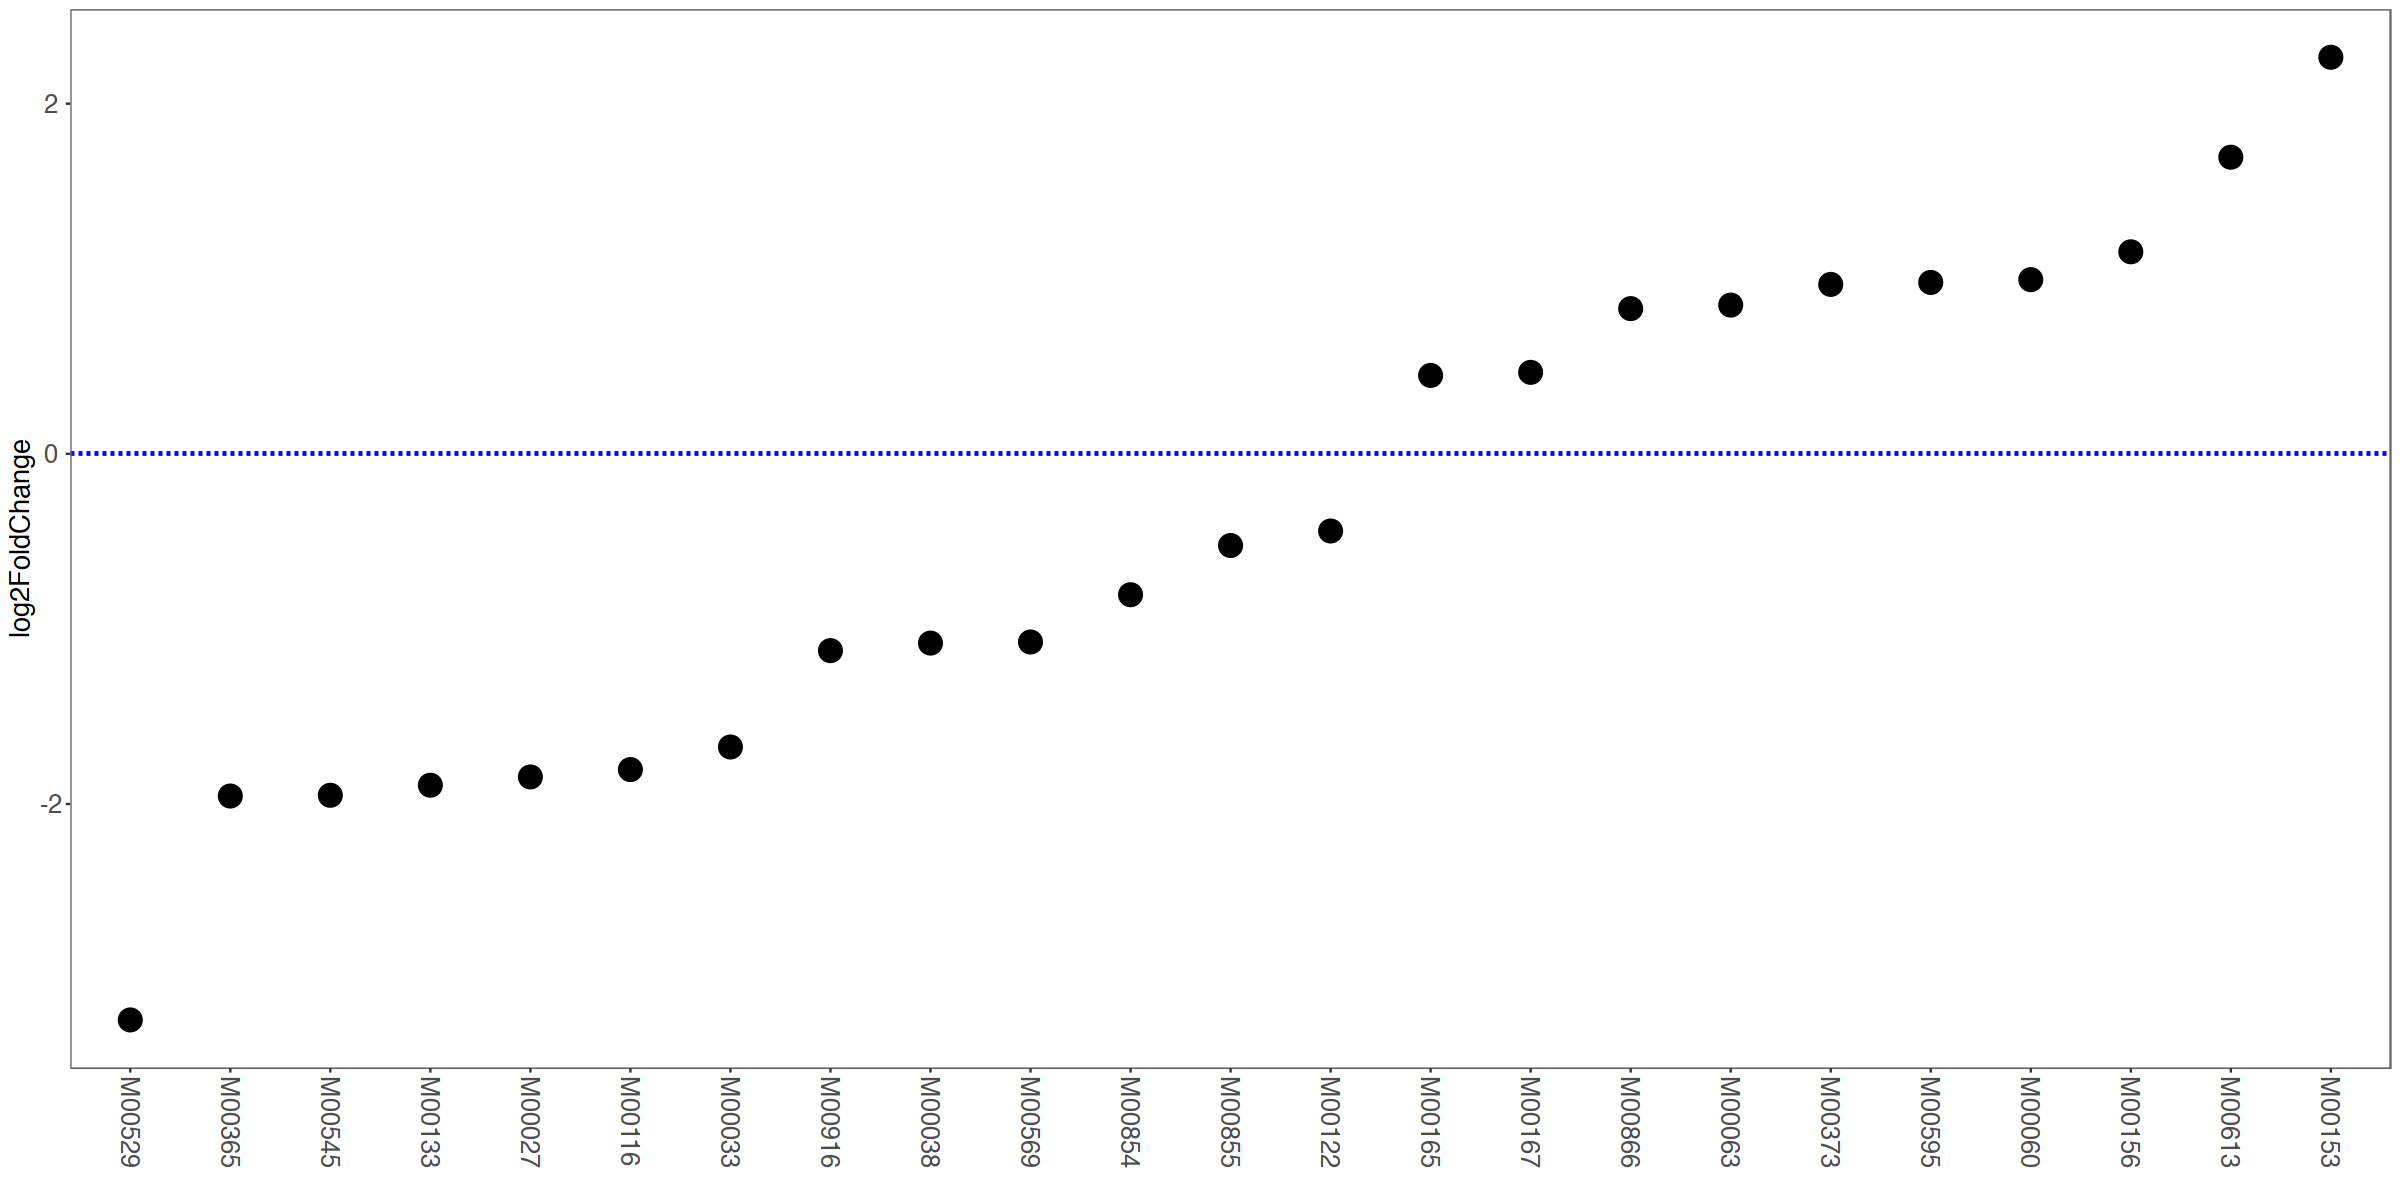

In [147]:
# Plot deseq2 results 

options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(deseq_df, aes(x=kegg, y=log2FoldChange)) + geom_point(size=6) + 
geom_hline(yintercept= 0, linetype= "dashed", size= 1, color= "blue")+
xlab("")+
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5, size= 15),
       axis.text.y = element_text( hjust = 0.5, vjust=0.5, size= 15),
       axis.title.y = element_text(size =16), 
       panel.background = element_rect(fill = "white"),panel.border = element_rect(colour = "#696969",size=0.5, fill = "transparent"))


### Kegg deseq2 bulk vs biofilm (phase 2 only)

In [148]:
#set up df
kegg_tax <- merge(bin_info, kegg_df, by.x= "bins",by.y= "bin_name", all.y=T)
kegg_cover <- merge(kegg_tax, coverage_df, by= "bins", all=T)
kegg_cover <- kegg_cover %>% subset(module_is_complete == TRUE) %>% dplyr::select(-c(control_mock1e10, control_mock1e8, slidecontrol_387, manifcontrol_387, tapres_372, tapres_387, tapres_134, tapres_162,
                                                      AR1_134,AR2_134,AR3_134,AR4_134,AR5_134,AR1_162,AR2_162,AR3_162,AR4_162,AR5_162, 
                                             total_length, num_contigs, N50, GC_content, percent_completion, percent_redundancy, t_domain,
                                             t_phylum, t_class, t_order, t_family, unique_id, module_class, module_definition, kofam_hits_in_module,
                                             gene_caller_ids_in_module, warnings, module_is_complete, module_completeness))

# melt data to long format for plotting
ids <- c('AR1_372','AR2_372','AR3_372','AR4_372','AR5_372',
         'AR1_387','AR2_387','AR3_387','AR4_387','AR5_387',
        'BF1_372','BF2_372','BF3_372','BF4_372','BF5_372',
         'BF1_387','BF2_387','BF3_387','BF4_387','BF5_387') #'bins','t_genus','t_species','kegg_module','module_name','module_category','module_subcategory')

kegg_cover_long <- pivot_longer(kegg_cover,
                        cols = all_of(ids), names_to = 'sample_id', values_to = 'coverage')

# #coverage of each genus for plotting
kegg_coverage <- kegg_cover_long %>% group_by(sample_id, kegg_module) %>% dplyr::summarise(coverage=round(sum(coverage))) %>% ungroup()

kegg_deseq <- pivot_wider(kegg_coverage, id_cols= kegg_module,  names_from = sample_id, values_from = coverage)
rownames(kegg_deseq) <- kegg_deseq$kegg_module

kegg_order <- kegg_deseq$kegg_module
kegg_deseq <- kegg_deseq %>% dplyr::select(-(kegg_module))
kegg_deseq <- data.matrix(kegg_deseq)
rownames(kegg_deseq) <- kegg_order

head(kegg_deseq)


`summarise()` has grouped output by 'sample_id'. You can override using the `.groups` argument.
Warning message:
“Setting row names on a tibble is deprecated.”


AR1_372 AR1_387 AR2_372 AR2_387 AR3_372 AR3_387 AR4_372 AR4_387 AR5_372
M00001 1589    1722    1231    1744    2013    1591    2295    1577    1832   
M00002 1670    1904    1273    1771    2269    1791    2713    1768    1879   
M00003 1586    1716    1231    1744    2007    1587    2281    1572    1831   
M00004  508    1187     989    1451    1183    1134    1109     739    1613   
M00005 1673    1910    1273    1771    2275    1795    2727    1773    1881   
M00006  388    1021     518     855     744     964     903     709     777   
       AR5_387 BF1_372 BF1_387 BF2_372 BF2_387 BF3_372 BF3_387 BF4_372 BF4_387
M00001 1839    1774    1246     984    1074    1157    1221     672    1096   
M00002 1915    2180    1524    1223    1310    1648    1769    1076    1700   
M00003 1837    1753    1232     982    1071    1154    1217     663    1083   
M00004 1286     998     733     693     777     463     693     390     763   
M00005 1918    2201    1538    1225    1313    1651    1773    1085    1713   
M00006  737    1097     833     754     800     767     967     650    1062   
       BF5_372 BF5_387
M00001 1176    1391   
M00002 1489    1726   
M00003 1173    1386   
M00004  850    1032   
M00005 1492    1731   
M00006  882     985

In [149]:
#set up second matrix
arbf3 <- arbf2
arbf3["sample_id"] <- rownames(arbf3)
arbf3 <- arbf3 %>% subset(type != "tapres") %>% subset(phase != 1)
rownames(arbf3) <- arbf3$sample_id
arbf3_rows <- sort(rownames(arbf3))
arbf3_order <- arbf3[ sort((row.names(arbf3))), ] # 34x6
rownames(arbf3_order) <- arbf3_rows
# tax_nocontrols_transp

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”


In [150]:
# Construct DESEQDataSet Object
dds <- DESeqDataSetFromMatrix(countData= kegg_deseq, 
                              colData=arbf3_order, ~type)
dds

dds$type <- factor(dds$type, levels = c("AR","BF"))
# #Now we’re ready to run DESEQ function
diagdds <- DESeq(dds)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 195 20 
metadata(1): version
assays(1): counts
rownames(195): M00001 M00002 ... M00930 M00931
rowData names(0):
colnames(20): AR1_372 AR1_387 ... BF5_372 BF5_387
colData names(11): ARBF type ... pH sample_id

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



In [151]:
diagdds

class: DESeqDataSet 
dim: 195 20 
metadata(1): version
assays(5): counts mu H cooks originalCounts
rownames(195): M00001 M00002 ... M00930 M00931
rowData names(23): baseMean baseVar ... maxCooks replace
colnames(20): AR1_372 AR1_387 ... BF5_372 BF5_387
colData names(13): ARBF type ... sizeFactor replaceable

In [152]:
res = results(diagdds, cooksCutoff = FALSE)
alpha = 0.01
sigtab = res[which(res$padj < alpha), ]
# sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(kostic)[rownames(sigtab), ], "matrix"))
head(sigtab)

log2 fold change (MLE): type BF vs AR 
Wald test p-value: type BF vs AR 
DataFrame with 6 rows and 6 columns
        baseMean log2FoldChange     lfcSE      stat      pvalue        padj
       <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
M00002  1701.317       0.264056 0.0559465   4.71980 2.36074e-06 2.92459e-05
M00005  1707.464       0.268018 0.0564724   4.74600 2.07478e-06 2.92459e-05
M00006   839.059       0.761777 0.1183184   6.43836 1.20770e-10 6.36055e-09
M00015  1253.863      -0.137615 0.0431797  -3.18703 1.43744e-03 6.13827e-03
M00019  1319.321      -0.101742 0.0287085  -3.54396 3.94161e-04 1.94617e-03
M00020  1069.680      -0.310719 0.0911848  -3.40757 6.55442e-04 2.95885e-03

In [153]:
#manipulate deseq dataframe
deseq_df <- as(sigtab, "data.frame")
deseq_df$kegg <- row.names(deseq_df)
deseq_df<- deseq_df[order(deseq_df$log2FoldChange),]
deseq_id <- deseq_df$kegg
deseq_df$kegg = factor(deseq_df$kegg, levels=deseq_id)

In [154]:
# create a legend for what each significant module code represents

kegg_legend <- kegg_df[kegg_df$kegg_module %in% deseq_df$kegg, ] %>% subset(module_is_complete == TRUE) %>% dplyr::select(c(kegg_module, module_name, module_category, module_subcategory)) %>% unique()
kegg_legend$kegg_module = factor(kegg_legend$kegg_module, levels=deseq_id)
#re-order data frame based on factor levels for region
kegg_legend <- kegg_legend[order((kegg_legend$kegg_module)),]
kegg_legend

kegg_module
1  M00033     
2  M00153     
3  M00156     
4  M00167     
5  M00020     
6  M00577     
7  M00123     
8  M00151     
9  M00126     
10 M00053     
11 M00015     
12 M00432     
13 M00155     
14 M00149     
15 M00019     
16 M00570     
17 M00909     
18 M00896     
19 M00880     
20 M00144     
21 M00844     
22 M00307     
23 M00049     
24 M00120     
25 M00051     
26 M00115     
27 M00002     
28 M00868     
29 M00082     
30 M00121     
31 M00005     
32 M00050     
33 M00157     
34 M00083     
35 M00846     
36 M00063     
37 M00866     
38 M00035     
39 M00926     
40 M00855     
41 M00006     
42 M00034     
43 M00632     
44 M00930     
45 M00931     
   module_name                                                                      
1  Ectoine biosynthesis, aspartate => ectoine                                       
2  Cytochrome bd ubiquinol oxidase                                                  
3  Cytochrome c oxidase, cbb3-type                                                  
4  Reductive pentose phosphate cycle, glyceraldehyde-3P => ribulose-5P              
5  Serine biosynthesis, glycerate-3P => serine                                      
6  Biotin biosynthesis, BioW pathway, pimelate => pimeloyl-CoA => biotin            
7  Biotin biosynthesis, pimeloyl-ACP/CoA => biotin                                  
8  Cytochrome bc1 complex respiratory unit                                          
9  Tetrahydrofolate biosynthesis, GTP => THF                                        
10 Pyrimidine deoxyribonuleotide biosynthesis, CDP/CTP => dCDP/dCTP,dTDP/dTTP       
11 Proline biosynthesis, glutamate => proline                                       
12 Leucine biosynthesis, 2-oxoisovalerate => 2-oxoisocaproate                       
13 Cytochrome c oxidase, prokaryotes                                                
14 Succinate dehydrogenase, prokaryotes                                             
15 Valine/isoleucine biosynthesis, pyruvate => valine / 2-oxobutanoate => isoleucine
16 Isoleucine biosynthesis, threonine => 2-oxobutanoate => isoleucine               
17 UDP-N-acetyl-D-glucosamine biosynthesis, prokaryotes, glucose => UDP-GlcNAc      
18 Thiamine biosynthesis, archaea, AIR (+ NAD+) => TMP/TPP                          
19 Molybdenum cofactor biosynthesis, GTP => molybdenum cofactor                     
20 NADH:quinone oxidoreductase, prokaryotes                                         
21 Arginine biosynthesis, ornithine => arginine                                     
22 Pyruvate oxidation, pyruvate => acetyl-CoA                                       
23 Adenine ribonucleotide biosynthesis, IMP => ADP,ATP                              
24 Coenzyme A biosynthesis, pantothenate => CoA                                     
25 Uridine monophosphate biosynthesis, glutamine (+ PRPP) => UMP                    
26 NAD biosynthesis, aspartate => quinolinate => NAD                                
27 Glycolysis, core module involving three-carbon compounds                         
28 Heme biosynthesis, animals and fungi, glycine => heme                            
29 Fatty acid biosynthesis, initiation                                              
30 Heme biosynthesis, plants and bacteria, glutamate => heme                        
31 PRPP biosynthesis, ribose 5P => PRPP                                             
32 Guanine ribonucleotide biosynthesis IMP => GDP,GTP                               
33 F-type ATPase, prokaryotes and chloroplasts                                      
34 Fatty acid biosynthesis, elongation                                              
35 Siroheme biosynthesis, glutamyl-tRNA => siroheme                                 
36 CMP-KDO biosynthesis                                                             
37 KDO2-lipid A biosynthesis, Raetz pathway, non-LpxL-LpxM type                     
38 Methionine degradation                                                          

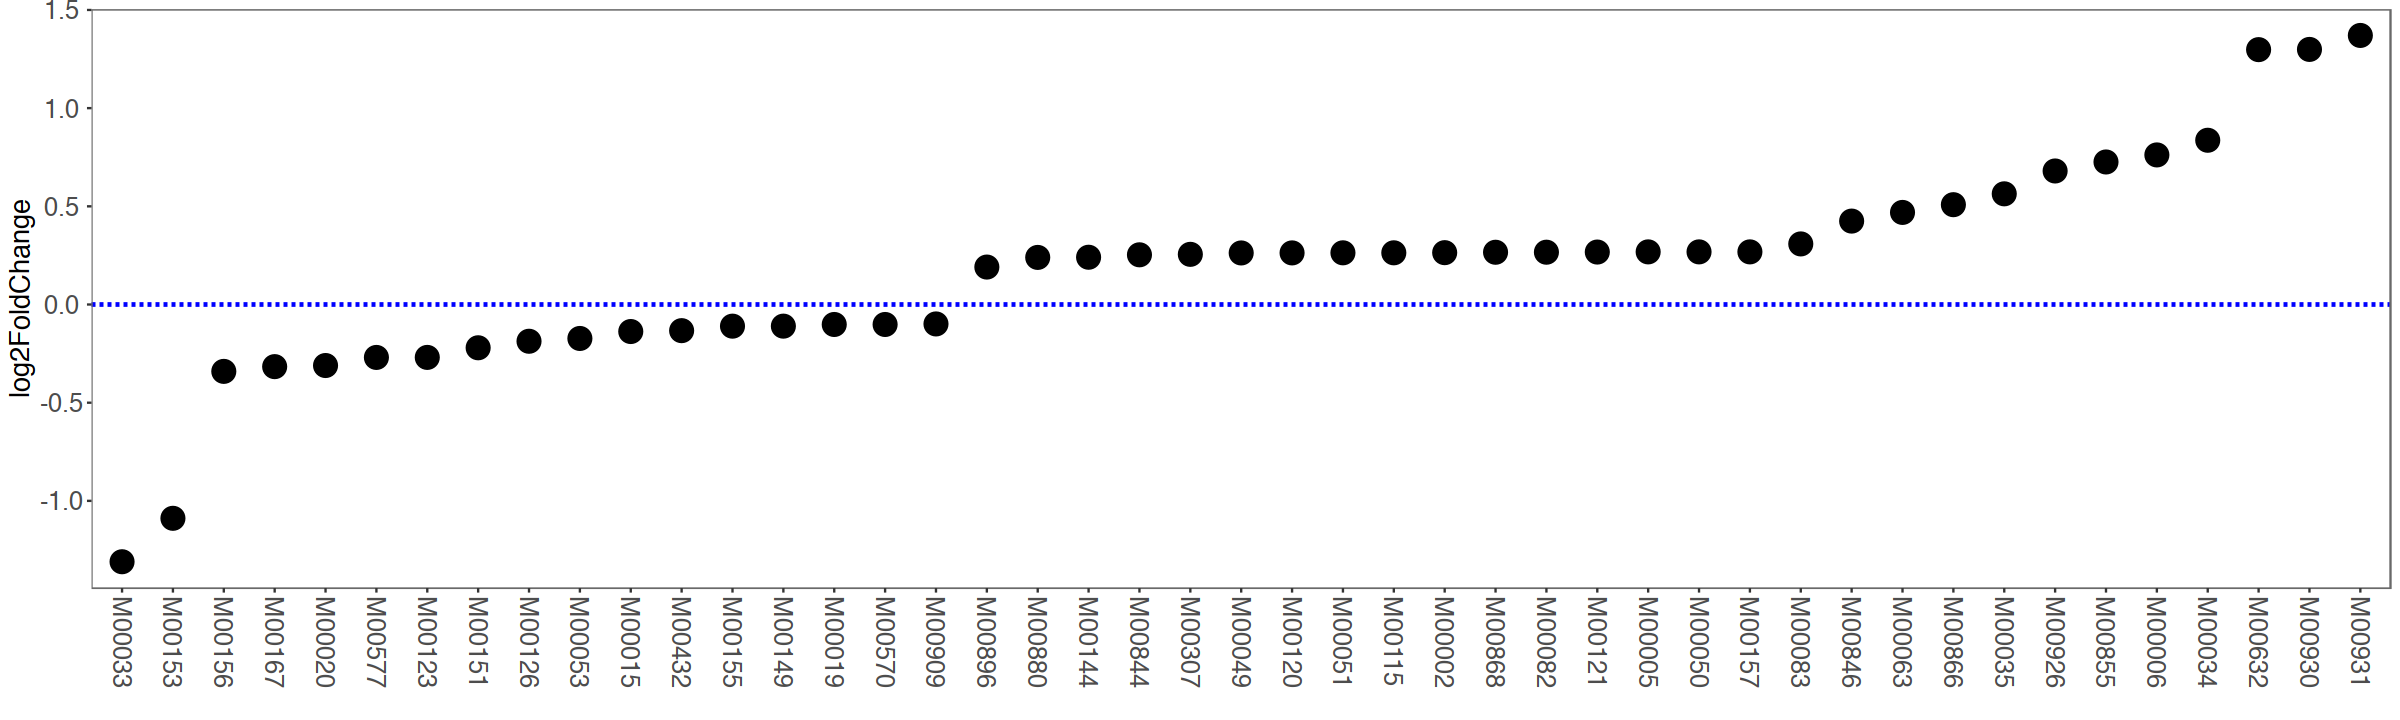

In [155]:
# Plot deseq2 results 

options(repr.plot.width = 20, repr.plot.height = 6)
ggplot(deseq_df, aes(x=kegg, y=log2FoldChange)) + geom_point(size=6) + 
geom_hline(yintercept= 0, linetype= "dashed", size= 1, color= "blue")+
xlab("")+
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5, size= 15),
       axis.text.y = element_text( hjust = 0.5, vjust=0.5, size= 15),
       axis.title.y = element_text(size =16), 
       panel.background = element_rect(fill = "white"),panel.border = element_rect(colour = "#696969",size=0.5, fill = "transparent"))

#this is showing log2(BF/AR); therefore positive means it was enriched in the biofilm

## DESEQ Bins KEGG table

In [160]:
deseq_bins_all_mods <- kegg_tax %>% filter(module_is_complete == TRUE) %>% dplyr::select(bins, module_name) %>% filter(bins %in% enriched_p1 | bins %in% enriched_p2) %>%
            mutate(present = 1) %>% pivot_wider(names_from = module_name, values_from= present)
            # group_by(bins) %>% dplyr::summarise(cluster = toString(unique(module_name)))

write.csv(deseq_bins_all_mods,'/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/AR_metagenomics/figures/deseq_bins_all_mods.csv', row.names=FALSE)


## Giant MAG functional table

### Coverage part of the table

In [161]:
#change sample_id to match updated names (swap sample event for sampling day)
quality_samp2 <- merge(quality_samp, id2code, by.x='sample_id', by.y='ggkbase_project_name')
quality_samp2 <- subset(quality_samp2, select= -c(sample_id_old,sample_id))
quality_samp2 <- quality_samp2 %>% dplyr::rename("sample_id"="sample_id.y") 
quality_samp2["read_norm_factor"] <- median(quality_samp2$trim_num_seq_F) / (quality_samp2$trim_num_seq_F)

# head(quality_samp2)
r <- quality_samp2$read_norm_factor

bins <- coverage_df$bins
coverage_df2 <- subset(coverage_df, select= -c(bins))

colnames(coverage_df2)
quality_samp2$sample_id # check order

#Create normalized coverage table. Coverages have been multiplied by the median F read count across alll samples and divided by the F read count of that sample
coverage_df2 <- as.matrix(coverage_df2)
coverage_norm_table <- coverage_df2 %*% diag(r)
coverage_norm_table <- as.data.frame(coverage_norm_table)
colnames(coverage_norm_table) <- colnames(coverage_df2)
rownames(coverage_norm_table) <- bins
head(coverage_norm_table)

# write df to a CSV
write.csv(coverage_norm_table,'/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/AR_metagenomics/figures/bin_norm_coverage.csv', row.names=FALSE)


[1] "AR1_134"          "AR1_162"          "AR1_372"          "AR1_387"         
 [5] "AR2_134"          "AR2_162"          "AR2_372"          "AR2_387"         
 [9] "AR3_134"          "AR3_162"          "AR3_372"          "AR3_387"         
[13] "AR4_134"          "AR4_162"          "AR4_372"          "AR4_387"         
[17] "AR5_134"          "AR5_162"          "AR5_372"          "AR5_387"         
[21] "BF1_372"          "BF1_387"          "BF2_372"          "BF2_387"         
[25] "BF3_372"          "BF3_387"          "BF4_372"          "BF4_387"         
[29] "BF5_372"          "BF5_387"          "slidecontrol_387" "manifcontrol_387"
[33] "control_mock1e10" "control_mock1e8"  "tapres_134"       "tapres_162"      
[37] "tapres_372"       "tapres_387"

[1] "AR1_134"          "AR1_162"          "AR1_372"          "AR1_387"         
 [5] "AR2_134"          "AR2_162"          "AR2_372"          "AR2_387"         
 [9] "AR3_134"          "AR3_162"          "AR3_372"          "AR3_387"         
[13] "AR4_134"          "AR4_162"          "AR4_372"          "AR4_387"         
[17] "AR5_134"          "AR5_162"          "AR5_372"          "AR5_387"         
[21] "BF1_372"          "BF1_387"          "BF2_372"          "BF2_387"         
[25] "BF3_372"          "BF3_387"          "BF4_372"          "BF4_387"         
[29] "BF5_372"          "BF5_387"          "slidecontrol_387" "manifcontrol_387"
[33] "control_mock1e10" "control_mock1e8"  "tapres_134"       "tapres_162"      
[37] "tapres_372"       "tapres_387"

AR1_134   AR1_162   AR1_372   AR1_387  AR2_134 
ARSTAG_ARBF_12345_pre_bin_16_2 10.792439  8.852586  0.000000 0.000000 84.97464
ARSTAG_ARBF_12345_pre_bin_26    2.354667  4.058004  0.000000 0.000000  0.00000
ARSTAG_ARBF_12345_pre_bin_2_2  36.064440 17.327835  6.040416 3.736296  0.00000
ARSTAG_ARBF_12345_pre_bin_30    0.000000  0.000000  0.000000 0.000000 27.53000
ARSTAG_ARBF_12345_pre_bin_40_2  2.497228  0.000000  0.000000 0.000000 68.51692
ARSTAG_ARBF_12345_pre_bin_4_1  67.125307 14.770210 10.046315 5.607738 17.68439
                               AR2_162  AR2_372  AR2_387  AR3_134    AR3_162  
ARSTAG_ARBF_12345_pre_bin_16_2 58.11889 1.604059 1.504994  29.122655 10.250406
ARSTAG_ARBF_12345_pre_bin_26    0.00000 0.000000 0.000000  23.336462 24.371207
ARSTAG_ARBF_12345_pre_bin_2_2   0.00000 7.655601 6.797636 129.619867 40.858414
ARSTAG_ARBF_12345_pre_bin_30   10.59472 0.000000 0.000000   7.365682 26.752921
ARSTAG_ARBF_12345_pre_bin_40_2 85.39729 0.000000 0.000000   4.226237  1.546507
ARSTAG_ARBF_12345_pre_bin_4_1  18.24802 5.047936 4.395921  43.495829 23.879509
                               ⋯ BF5_372 BF5_387 slidecontrol_387
ARSTAG_ARBF_12345_pre_bin_16_2 ⋯ 0       0       22.210177       
ARSTAG_ARBF_12345_pre_bin_26   ⋯ 0       0        0.000000       
ARSTAG_ARBF_12345_pre_bin_2_2  ⋯ 0       0       20.285041       
ARSTAG_ARBF_12345_pre_bin_30   ⋯ 0       0        0.000000       
ARSTAG_ARBF_12345_pre_bin_40_2 ⋯ 0       0        2.617682       
ARSTAG_ARBF_12345_pre_bin_4_1  ⋯ 0       0       47.729518       
                               manifcontrol_387 control_mock1e10
ARSTAG_ARBF_12345_pre_bin_16_2 0                0               
ARSTAG_ARBF_12345_pre_bin_26   0                0               
ARSTAG_ARBF_12345_pre_bin_2_2  0                0               
ARSTAG_ARBF_12345_pre_bin_30   0                0               
ARSTAG_ARBF_12345_pre_bin_40_2 0                0               
ARSTAG_ARBF_12345_pre_bin_4_1  0                0               
                               control_mock1e8 tapres_134 tapres_162 tapres_372
ARSTAG_ARBF_12345_pre_bin_16_2 0                3.674007   0.00000     0.000000
ARSTAG_ARBF_12345_pre_bin_26   0                0.000000   0.00000     0.000000
ARSTAG_ARBF_12345_pre_bin_2_2  0                4.101056   0.00000     2.074289
ARSTAG_ARBF_12345_pre_bin_30   0                8.282901   0.00000     1.146386
ARSTAG_ARBF_12345_pre_bin_40_2 0               71.242383  48.64731    21.445046
ARSTAG_ARBF_12345_pre_bin_4_1  0                0.000000   0.00000   851.315517
                               tapres_387
ARSTAG_ARBF_12345_pre_bin_16_2   0.000000
ARSTAG_ARBF_12345_pre_bin_26     0.000000
ARSTAG_ARBF_12345_pre_bin_2_2    5.268688
ARSTAG_ARBF_12345_pre_bin_30     0.000000
ARSTAG_ARBF_12345_pre_bin_40_2  41.628988
ARSTAG_ARBF_12345_pre_bin_4_1  271.823818

### Kegg part of the table

https://www.genome.jp/brite/query=00720&htext=br08901.keg&option=-a&node_proc=br08901_org&proc_enabled=map&panel=collapse


In [217]:
#looking at all complete modules present in multiple bins related to degradation 
kegg_df %>% subset(module_is_complete == TRUE) %>% group_by(kegg_module, module_name) %>% dplyr::summarise(module = n()) %>% subset(module >9) %>% subset(str_detect(module_name, "degr"))



`summarise()` has grouped output by 'kegg_module'. You can override using the `.groups` argument.


kegg_module
1  M00035     
2  M00036     
3  M00044     
4  M00045     
5  M00046     
6  M00098     
7  M00546     
8  M00552     
9  M00632     
10 M00855     
   module_name                                                                       
1  Methionine degradation                                                            
2  Leucine degradation, leucine => acetoacetate + acetyl-CoA                         
3  Tyrosine degradation, tyrosine => homogentisate                                   
4  Histidine degradation, histidine => N-formiminoglutamate => glutamate             
5  Pyrimidine degradation, uracil => beta-alanine, thymine => 3-aminoisobutanoate    
6  Acylglycerol degradation                                                          
7  Purine degradation, xanthine => urea                                              
8  D-galactonate degradation, De Ley-Doudoroff pathway, D-galactonate => glycerate-3P
9  Galactose degradation, Leloir pathway, galactose => alpha-D-glucose-1P            
10 Glycogen degradation, glycogen => glucose-6P                                      
   module
1  63    
2  20    
3  21    
4  32    
5  16    
6  29    
7  19    
8  12    
9  30    
10 46

In [162]:
# which kegg modules did the bins have that were enriched in each phase?
length(enriched_p1)
length(enriched_p2)
# kegg_df
kegg_enriched_p1 <- kegg_df %>% subset(module_is_complete == TRUE) %>% subset(bin_name %in% enriched_p1) %>% group_by(kegg_module, module_name) %>% dplyr::summarise(module = n()) %>% subset(module >2) #%>% subset(module >6)#list of bin names
kegg_enriched_p2 <- kegg_df %>% subset(module_is_complete == TRUE) %>% subset(bin_name %in% enriched_p2) %>% group_by(kegg_module, module_name) %>% dplyr::summarise(module = n())%>% subset(module >2) #%>% subset(module >18)#list of bin names
length(kegg_enriched_p1$kegg_module)
length(kegg_enriched_p2$kegg_module)

kegg_p1_modules <- kegg_enriched_p1 %>% subset(!(kegg_module %in% kegg_enriched_p2$kegg_module)) 
kegg_p2_modules <- kegg_enriched_p2 %>% subset(!(kegg_module %in% kegg_enriched_p1$kegg_module))
length(kegg_p1_modules$kegg_module)
length(kegg_p2_modules$kegg_module)

kegg_p1_modules
kegg_p2_modules


[1] 9

[1] 21

`summarise()` has grouped output by 'kegg_module'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'kegg_module'. You can override using the `.groups` argument.


[1] 95

[1] 123

[1] 3

[1] 31

kegg_module
1 M00133     
2 M00417     
3 M00924     
  module_name                                                                                          
1 Polyamine biosynthesis, arginine => agmatine => putrescine => spermidine                             
2 Cytochrome o ubiquinol oxidase                                                                       
3 Cobalamin biosynthesis, anaerobic, uroporphyrinogen III => sirohydrochlorin => cobyrinate a,c-diamide
  module
1 3     
2 3     
3 5

kegg_module
1  M00036     
2  M00044     
3  M00045     
4  M00046     
5  M00064     
6  M00088     
7  M00098     
8  M00134     
9  M00135     
10 M00153     
11 M00169     
12 M00172     
13 M00173     
14 M00308     
15 M00338     
16 M00364     
17 M00378     
18 M00530     
19 M00552     
20 M00554     
21 M00555     
22 M00569     
23 M00579     
24 M00595     
25 M00627     
26 M00632     
27 M00642     
28 M00912     
29 M00913     
30 M00916     
31 M00931     
   module_name                                                                       
1  Leucine degradation, leucine => acetoacetate + acetyl-CoA                         
2  Tyrosine degradation, tyrosine => homogentisate                                   
3  Histidine degradation, histidine => N-formiminoglutamate => glutamate             
4  Pyrimidine degradation, uracil => beta-alanine, thymine => 3-aminoisobutanoate    
5  ADP-L-glycero-D-manno-heptose biosynthesis                                        
6  Ketone body biosynthesis, acetyl-CoA => acetoacetate/3-hydroxybutyrate/acetone    
7  Acylglycerol degradation                                                          
8  Polyamine biosynthesis, arginine => ornithine => putrescine                       
9  GABA biosynthesis, eukaryotes, putrescine => GABA                                 
10 Cytochrome bd ubiquinol oxidase                                                   
11 CAM (Crassulacean acid metabolism), light                                         
12 C4-dicarboxylic acid cycle, NADP - malic enzyme type                              
13 Reductive citrate cycle (Arnon-Buchanan cycle)                                    
14 Semi-phosphorylative Entner-Doudoroff pathway, gluconate => glycerate-3P          
15 Cysteine biosynthesis, homocysteine + serine => cysteine                          
16 C10-C20 isoprenoid biosynthesis, bacteria                                         
17 F420 biosynthesis                                                                 
18 Dissimilatory nitrate reduction, nitrate => ammonia                               
19 D-galactonate degradation, De Ley-Doudoroff pathway, D-galactonate => glycerate-3P
20 Nucleotide sugar biosynthesis, galactose => UDP-galactose                         
21 Betaine biosynthesis, choline => betaine                                          
22 Catechol meta-cleavage, catechol => acetyl-CoA / 4-methylcatechol => propanoyl-CoA
23 Phosphate acetyltransferase-acetate kinase pathway, acetyl-CoA => acetate         
24 Thiosulfate oxidation by SOX complex, thiosulfate => sulfate                      
25 beta-Lactam resistance, Bla system                                                
26 Galactose degradation, Leloir pathway, galactose => alpha-D-glucose-1P            
27 Multidrug resistance, efflux pump MexJK-OprM                                      
28 NAD biosynthesis, tryptophan => quinolinate => NAD                                
29 Pantothenate biosynthesis, 2-oxoisovalerate/spermine => pantothenate              
30 Pyridoxal-P biosynthesis, R5P + glyceraldehyde-3P + glutamine => pyridoxal-P      
31 Menaquinone biosynthesis, modified futalosine pathway                             
   module
1   9    
2   7    
3   8    
4   3    
5   7    
6   4    
7   7    
8   4    
9   5    
10  3    
11 12    
12 10    
13  7    
14  4    
15  4    
16  3    
17  5    
18  5    
19  4    
20  7    
21  3    
22  5    
23  7    
24  4    
25  6    
26  9    
27  3    
28  3    
29  3    
30  3    
31  3

In [163]:
# which kegg modules did the bins have that were enriched in bulk or biofilm?
length(enriched_bulk)
length(enriched_bf)
# kegg_df
kegg_enriched_bulk <- kegg_df %>% subset(module_is_complete == TRUE) %>% subset(bin_name %in% enriched_bulk) %>% group_by(kegg_module, module_name) %>% dplyr::summarise(module = n()) %>% subset(module >2) ##list of bin names
kegg_enriched_bf <- kegg_df %>% subset(module_is_complete == TRUE) %>% subset(bin_name %in% enriched_bf) %>% group_by(kegg_module, module_name) %>% dplyr::summarise(module = n()) %>% subset(module >2)#list of bin names
length(kegg_enriched_bulk$kegg_module)
length(kegg_enriched_bf$kegg_module)

kegg_bulk_modules <- kegg_enriched_bulk %>% subset(!(kegg_module %in% kegg_enriched_bf$kegg_module)) 
kegg_bf_modules <- kegg_enriched_bf %>% subset(!(kegg_module %in% kegg_enriched_bulk$kegg_module)) 
length(kegg_bulk_modules$kegg_module)
length(kegg_bf_modules$kegg_module)

kegg_bulk_modules
kegg_bf_modules


[1] 4

[1] 4

`summarise()` has grouped output by 'kegg_module'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'kegg_module'. You can override using the `.groups` argument.


[1] 70

[1] 55

[1] 22

[1] 7

kegg_module
1  M00004     
2  M00008     
3  M00010     
4  M00012     
5  M00020     
6  M00053     
7  M00086     
8  M00118     
9  M00123     
10 M00126     
11 M00151     
12 M00165     
13 M00167     
14 M00168     
15 M00432     
16 M00577     
17 M00741     
18 M00854     
19 M00881     
20 M00896     
21 M00909     
22 M00925     
   module_name                                                                                   
1  Pentose phosphate pathway (Pentose phosphate cycle)                                           
2  Entner-Doudoroff pathway, glucose-6P => glyceraldehyde-3P + pyruvate                          
3  Citrate cycle, first carbon oxidation, oxaloacetate => 2-oxoglutarate                         
4  Glyoxylate cycle                                                                              
5  Serine biosynthesis, glycerate-3P => serine                                                   
6  Pyrimidine deoxyribonuleotide biosynthesis, CDP/CTP => dCDP/dCTP,dTDP/dTTP                    
7  beta-Oxidation, acyl-CoA synthesis                                                            
8  Glutathione biosynthesis, glutamate => glutathione                                            
9  Biotin biosynthesis, pimeloyl-ACP/CoA => biotin                                               
10 Tetrahydrofolate biosynthesis, GTP => THF                                                     
11 Cytochrome bc1 complex respiratory unit                                                       
12 Reductive pentose phosphate cycle (Calvin cycle)                                              
13 Reductive pentose phosphate cycle, glyceraldehyde-3P => ribulose-5P                           
14 CAM (Crassulacean acid metabolism), dark                                                      
15 Leucine biosynthesis, 2-oxoisovalerate => 2-oxoisocaproate                                    
16 Biotin biosynthesis, BioW pathway, pimelate => pimeloyl-CoA => biotin                         
17 Propanoyl-CoA metabolism, propanoyl-CoA => succinyl-CoA                                       
18 Glycogen biosynthesis, glucose-1P => glycogen/starch                                          
19 Lipoic acid biosynthesis, plants and bacteria, octanoyl-ACP => dihydrolipoyl-E2/H             
20 Thiamine biosynthesis, archaea, AIR (+ NAD+) => TMP/TPP                                       
21 UDP-N-acetyl-D-glucosamine biosynthesis, prokaryotes, glucose => UDP-GlcNAc                   
22 Cobalamin biosynthesis, aerobic, uroporphyrinogen III => precorrin 2 => cobyrinate a,c-diamide
   module
1  4     
2  3     
3  3     
4  3     
5  4     
6  4     
7  4     
8  3     
9  4     
10 3     
11 4     
12 3     
13 4     
14 3     
15 4     
16 4     
17 4     
18 3     
19 4     
20 4     
21 4     
22 3

kegg_module
1 M00006     
2 M00060     
3 M00063     
4 M00632     
5 M00846     
6 M00866     
7 M00926     
  module_name                                                             
1 Pentose phosphate pathway, oxidative phase, glucose 6P => ribulose 5P   
2 KDO2-lipid A biosynthesis, Raetz pathway, LpxL-LpxM type                
3 CMP-KDO biosynthesis                                                    
4 Galactose degradation, Leloir pathway, galactose => alpha-D-glucose-1P  
5 Siroheme biosynthesis, glutamyl-tRNA => siroheme                        
6 KDO2-lipid A biosynthesis, Raetz pathway, non-LpxL-LpxM type            
7 Heme biosynthesis, bacteria, glutamyl-tRNA => coproporphyrin III => heme
  module
1 3     
2 4     
3 4     
4 3     
5 3     
6 4     
7 3

In [164]:
#create table of modules that were in bins that were differentiated across phases

deseq_module_table <- kegg_df %>% filter(module_is_complete == TRUE) %>% filter(kegg_module %in% kegg_p1_modules$kegg_module | kegg_module %in% kegg_p2_modules$kegg_module | kegg_module %in% kegg_bf_modules$kegg_module | kegg_module %in% kegg_bulk_modules$kegg_module) %>% group_by(module_name, bin_name) %>% 
        dplyr::summarise(count= n()) %>% pivot_wider(names_from = module_name, values_from= count)
# kegg_df
# length(unique(kegg_coverage$module_name))
# %>% filter(module_name %in% unique(kegg_coverage$module_name)) 
deseq_module_table

`summarise()` has grouped output by 'module_name'. You can override using the `.groups` argument.


bin_name                                    Acylglycerol degradation
1  ARSTAG_ARBF_1_post_bin_18_1                  1                      
2  ARSTAG_ARBF_1_post_bin_mycob_7               1                      
3  ARSTAG_ARBF_12345_pre_bin_26                 1                      
4  ARSTAG_ARBF_12345_pre_bin_30                 1                      
5  ARSTAG_ARBF_2_post_bin_13_2                  1                      
6  ARSTAG_ARBF_2_post_bin_16_2                  1                      
7  ARSTAG_ARBF_2_post_bin_31_2                  1                      
8  ARSTAG_ARBF_2_post_bin_43_1                  1                      
9  ARSTAG_ARBF_3_post_bin_38_2                  1                      
10 ARSTAG_ARBF_3_post_bin_44_4                  1                      
11 ARSTAG_ARBF_4_post_bin_0_2                   1                      
12 ARSTAG_ARBF_4_post_bin_12_1                  1                      
13 ARSTAG_ARBF_4_post_bin_20                    1                      
14 ARSTAG_ARBF_4_post_bin_21_1                  1                      
15 ARSTAG_ARBF_4_post_bin_22                    1                      
16 ARSTAG_ARBF_4_post_bin_7                     1                      
17 ARSTAG_ARBF_5_post_bin_21_3                  1                      
18 ARSTAG_ARBF_5_post_bin_43_2                  1                      
19 ARSTAG_ARBF_5_post_bin_5                     1                      
20 ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_18      1                      
21 ARSTAG_CONTROL_MOCK1E10_111821_bin_1_2       1                      
22 ARSTAG_CONTROL_MOCK1E10_111821_bin_3         1                      
23 ARSTAG_CONTROL_MOCK1E8_111821_bin_0          1                      
24 ARSTAG_TAPRES_TAPRES_23_bin_40_1             1                      
25 ARSTAG_TAPRES_TAPRES_23_bin_mycob_1_3        1                      
26 ARSTAG_TAPRES_TAPRES_40_bin_29_1             1                      
27 ARSTAG_TAPRES_TAPRES_41_bin_1                1                      
28 ARSTAG_TAPRES_TAPRES_41_bin_22_2             1                      
29 ARSTAG_TAPRES_TAPRES_41_bin_28_3             1                      
30 ARSTAG_AR_4_27_bin_23_1                     NA                      
⋮  ⋮                                           ⋮                       
61 ARSTAG_ARBF_12345_pre_bin_4_1               NA                      
62 ARSTAG_ARBF_12345_pre_bin_nitr_1            NA                      
63 ARSTAG_ARBF_2_post_bin_5_1                  NA                      
64 ARSTAG_ARBF_2_post_bin_8_1                  NA                      
65 ARSTAG_ARBF_3_post_bin_30_2                 NA                      
66 ARSTAG_ARBF_4_post_bin_1_2                  NA                      
67 ARSTAG_ARBF_4_post_bin_26                   NA                      
68 ARSTAG_ARBF_5_post_bin_15_2                 NA                      
69 ARSTAG_ARBF_5_post_bin_39_3                 NA                      
70 ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_20_3   NA                      
71 ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_meth_1 NA                      
72 ARSTAG_TAPRES_TAPRES_23_bin_31_4            NA                      
73 ARSTAG_TAPRES_TAPRES_23_bin_8_1             NA                      
74 ARSTAG_TAPRES_TAPRES_23_bin_unknown_1       NA                      
75 ARSTAG_TAPRES_TAPRES_40_bin_13_3            NA                      
76 ARSTAG_TAPRES_TAPRES_40_bin_33_1            NA                      
77 ARSTAG_TAPRES_TAPRES_40_bin_35_2            NA                      
78 ARSTAG_TAPRES_TAPRES_41_bin_21_1            NA                      
79 ARSTAG_TAPRES_TAPRES_41_bin_21_2            NA                      
80 ARSTAG_TAPRES_TAPRES_41_bin_21_3            NA                      
81 ARSTAG_ARBF_1_post_bin_36_2                 NA                      
82 ARSTAG_TAPRES_TAPRES_41_bin_0_4             NA                      
83 ARSTAG_TAPRES_TAPRES_41_bin_nitro_3         NA                      
84 ARSTAG_ARBF_1_post_bin_3                

In [219]:
#create table of modules 

deseq_module_table_full <- kegg_df %>% filter(module_is_complete == TRUE)  %>% group_by(module_name, bin_name) %>% 
        dplyr::summarise(count= n()) %>% pivot_wider(names_from = module_name, values_from= count)
# kegg_df
# length(unique(kegg_coverage$module_name))
# %>% filter(module_name %in% unique(kegg_coverage$module_name)) 
deseq_module_table_full

`summarise()` has grouped output by 'module_name'. You can override using the `.groups` argument.


bin_name                                    Acylglycerol degradation
1  ARSTAG_ARBF_1_post_bin_18_1                  1                      
2  ARSTAG_ARBF_1_post_bin_mycob_7               1                      
3  ARSTAG_ARBF_12345_pre_bin_26                 1                      
4  ARSTAG_ARBF_12345_pre_bin_30                 1                      
5  ARSTAG_ARBF_2_post_bin_13_2                  1                      
6  ARSTAG_ARBF_2_post_bin_16_2                  1                      
7  ARSTAG_ARBF_2_post_bin_31_2                  1                      
8  ARSTAG_ARBF_2_post_bin_43_1                  1                      
9  ARSTAG_ARBF_3_post_bin_38_2                  1                      
10 ARSTAG_ARBF_3_post_bin_44_4                  1                      
11 ARSTAG_ARBF_4_post_bin_0_2                   1                      
12 ARSTAG_ARBF_4_post_bin_12_1                  1                      
13 ARSTAG_ARBF_4_post_bin_20                    1                      
14 ARSTAG_ARBF_4_post_bin_21_1                  1                      
15 ARSTAG_ARBF_4_post_bin_22                    1                      
16 ARSTAG_ARBF_4_post_bin_7                     1                      
17 ARSTAG_ARBF_5_post_bin_21_3                  1                      
18 ARSTAG_ARBF_5_post_bin_43_2                  1                      
19 ARSTAG_ARBF_5_post_bin_5                     1                      
20 ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_18      1                      
21 ARSTAG_CONTROL_MOCK1E10_111821_bin_1_2       1                      
22 ARSTAG_CONTROL_MOCK1E10_111821_bin_3         1                      
23 ARSTAG_CONTROL_MOCK1E8_111821_bin_0          1                      
24 ARSTAG_TAPRES_TAPRES_23_bin_40_1             1                      
25 ARSTAG_TAPRES_TAPRES_23_bin_mycob_1_3        1                      
26 ARSTAG_TAPRES_TAPRES_40_bin_29_1             1                      
27 ARSTAG_TAPRES_TAPRES_41_bin_1                1                      
28 ARSTAG_TAPRES_TAPRES_41_bin_22_2             1                      
29 ARSTAG_TAPRES_TAPRES_41_bin_28_3             1                      
30 ARSTAG_AR_4_27_bin_23_1                     NA                      
⋮  ⋮                                           ⋮                       
61 ARSTAG_ARBF_5_post_bin_15_2                 NA                      
62 ARSTAG_ARBF_5_post_bin_20_5                 NA                      
63 ARSTAG_ARBF_5_post_bin_21_2                 NA                      
64 ARSTAG_ARBF_5_post_bin_39_3                 NA                      
65 ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_20_3   NA                      
66 ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_meth_1 NA                      
67 ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_n_1    NA                      
68 ARSTAG_CONTROL_MOCK1E10_111821_bin_1        NA                      
69 ARSTAG_CONTROL_MOCK1E8_111821_bin_1         NA                      
70 ARSTAG_CONTROL_MOCK1E8_111821_bin_9         NA                      
71 ARSTAG_TAPRES_TAPRES_23_bin_11              NA                      
72 ARSTAG_TAPRES_TAPRES_23_bin_31_4            NA                      
73 ARSTAG_TAPRES_TAPRES_23_bin_8_1             NA                      
74 ARSTAG_TAPRES_TAPRES_23_bin_unknown_1       NA                      
75 ARSTAG_TAPRES_TAPRES_40_bin_1_5             NA                      
76 ARSTAG_TAPRES_TAPRES_40_bin_11              NA                      
77 ARSTAG_TAPRES_TAPRES_40_bin_13_3            NA                      
78 ARSTAG_TAPRES_TAPRES_40_bin_33_1            NA                      
79 ARSTAG_TAPRES_TAPRES_40_bin_35_2            NA                      
80 ARSTAG_TAPRES_TAPRES_41_bin_0_1             NA                      
81 ARSTAG_TAPRES_TAPRES_41_bin_0_4             NA                      
82 ARSTAG_TAPRES_TAPRES_41_bin_21_1            NA                      
83 ARSTAG_TAPRES_TAPRES_41_bin_21_2            NA                      
84 ARSTAG_TAPRES_TAPRES_41_bin_21_3        

Warning message:
“Setting row names on a tibble is deprecated.”


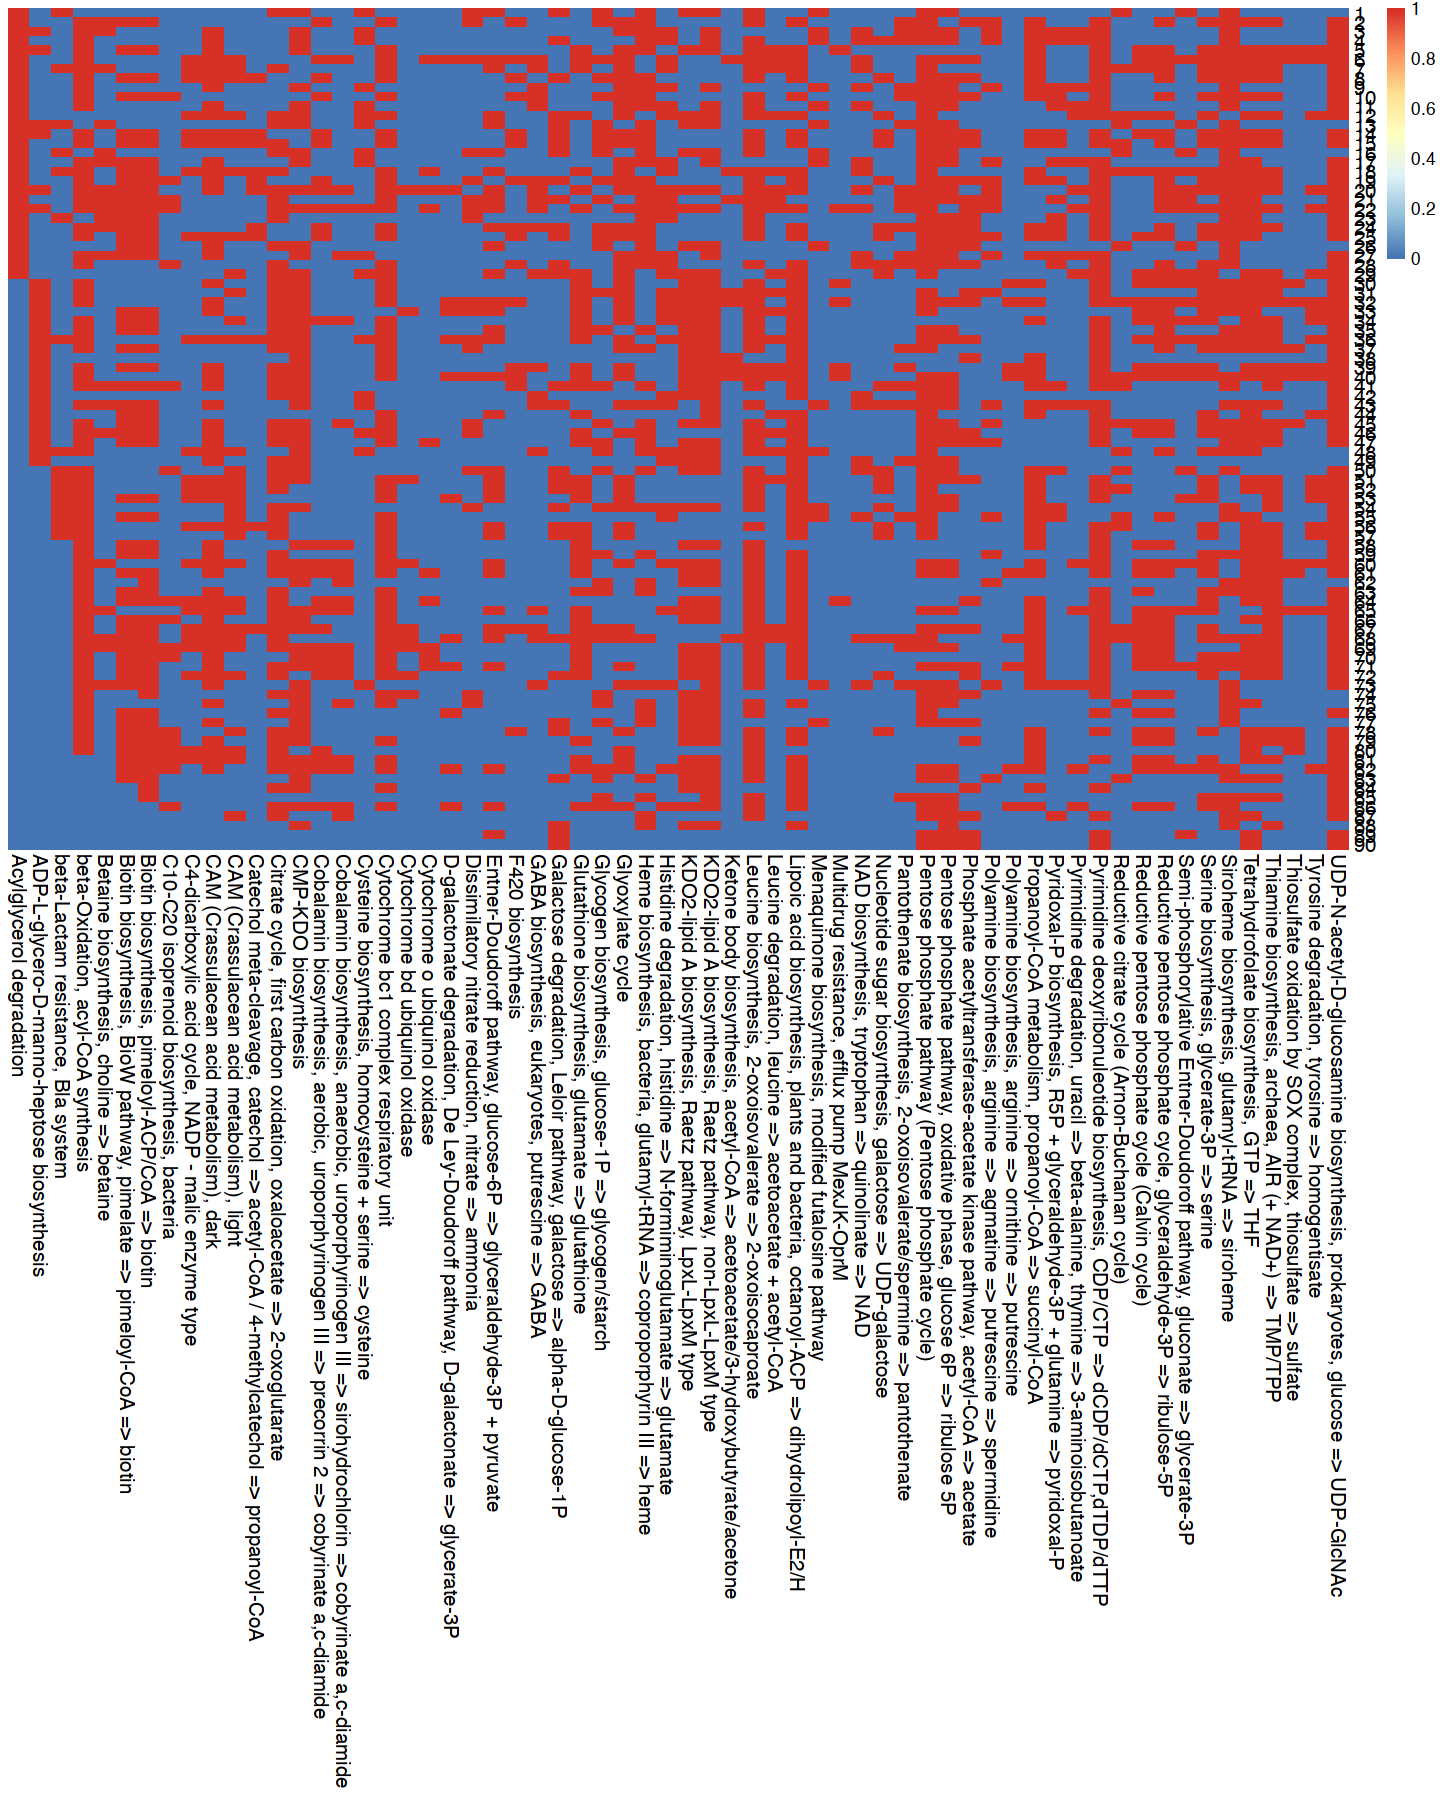

In [165]:
df <- deseq_module_table
deseq_rows <- deseq_module_table$bin_name
df <- df %>% dplyr::select(-bin_name)
rownames(df) <- deseq_rows

df[is.na(df)] <- 0

options(repr.plot.width = 12, repr.plot.height = 15)
pheatmap((df), 
         # color=rev(magma(15)[1:14]), 
         # cluster_cols=ids, 
         cluster_cols=FALSE,
         cluster_rows=FALSE,
         na_col="white",
         # labels_row=as.character(tax_coverage_df_long$bin_tax_name),
         #labels_col=as.character(metagenome_info$Sample_code), #to change col names
         fontsize_row=12, fontsize_col=12,
         treeheight_row=30)

#save as pdf (uncomment these lines)
        # filename="/SCIENCE/Nelson_lab/data_files_nelson/el_paso_metagenomics/rps3_analyses/rps3_heatmap.pdf", width=4.5, height=7)


In [166]:
bin_info[!(bin_info$bins %in%  deseq_module_table$bin_name), ] 

bins total_length num_contigs N50 GC_content percent_completion
     percent_redundancy t_domain t_phylum t_class t_order t_family t_genus
     t_species bin_tax_name

In [167]:
# Build a table of number of times each KO number is detected in each bin, use the constructed kegg table of modules of interest from google sheets

kegg_table <- kegg_df #%>% filter(module_is_complete== "TRUE") #%>% subset(str_detect(kofam_hits_in_module, 'K00134'))
kegg_modules <- kegg_modules %>% filter(!is.na(KO)) %>% filter(Include == 'Y')

for (row in 1:nrow(kegg_modules)) {
    KO <- kegg_modules[row, "KO"]
    label <- as.character(kegg_modules[row, "Label"])
    # label <- row.Label
    kegg_table[,label] <- 0
    kegg_table[label][str_detect(kegg_table$kofam_hits_in_module, as.character(KO)),] <- 1
    }


kegg_table <- kegg_table %>% group_by(bin_name) %>% dplyr::summarise_at(vars(K10944_pmoA_amoA:K17069_MET17), sum, na.rm= TRUE)
detect <- rowSums(subset(kegg_table, select= -c(bin_name))) != 0
kegg_table[detect,]


bin_name                                    K10944_pmoA_amoA
1  ARSTAG_AR_4_27_bin_23_1                     0               
2  ARSTAG_AR_4_27_bin_26_4                     0               
3  ARSTAG_AR_4_27_bin_3_2                      0               
4  ARSTAG_AR_4_27_bin_5_5                      0               
5  ARSTAG_ARBF_1_post_bin_10                   0               
6  ARSTAG_ARBF_1_post_bin_18_1                 0               
7  ARSTAG_ARBF_1_post_bin_2_3                  0               
8  ARSTAG_ARBF_1_post_bin_26_2                 0               
9  ARSTAG_ARBF_1_post_bin_27                   0               
10 ARSTAG_ARBF_1_post_bin_3                    3               
11 ARSTAG_ARBF_1_post_bin_31_1                 0               
12 ARSTAG_ARBF_1_post_bin_36_2                 0               
13 ARSTAG_ARBF_1_post_bin_mycob_7              0               
14 ARSTAG_ARBF_12345_pre_bin_16_2              0               
15 ARSTAG_ARBF_12345_pre_bin_2_2               0               
16 ARSTAG_ARBF_12345_pre_bin_26                0               
17 ARSTAG_ARBF_12345_pre_bin_30                0               
18 ARSTAG_ARBF_12345_pre_bin_4_1               0               
19 ARSTAG_ARBF_12345_pre_bin_40_2              0               
20 ARSTAG_ARBF_12345_pre_bin_nitr_1            3               
21 ARSTAG_ARBF_2_post_bin_13_1                 0               
22 ARSTAG_ARBF_2_post_bin_13_2                 0               
23 ARSTAG_ARBF_2_post_bin_16_2                 0               
24 ARSTAG_ARBF_2_post_bin_29_1                 0               
25 ARSTAG_ARBF_2_post_bin_3_2                  0               
26 ARSTAG_ARBF_2_post_bin_31_2                 0               
27 ARSTAG_ARBF_2_post_bin_43_1                 0               
28 ARSTAG_ARBF_2_post_bin_5_1                  3               
29 ARSTAG_ARBF_2_post_bin_8_1                  0               
30 ARSTAG_ARBF_3_post_bin_1                    0               
⋮  ⋮                                           ⋮               
58 ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_meth_1 0               
59 ARSTAG_CONTROL_BFSLIDECONTROL_41_bin_n_1    0               
60 ARSTAG_CONTROL_MOCK1E10_111821_bin_1        0               
61 ARSTAG_CONTROL_MOCK1E10_111821_bin_1_2      0               
62 ARSTAG_CONTROL_MOCK1E10_111821_bin_3        0               
63 ARSTAG_CONTROL_MOCK1E8_111821_bin_0         0               
64 ARSTAG_CONTROL_MOCK1E8_111821_bin_1         0               
65 ARSTAG_CONTROL_MOCK1E8_111821_bin_9         0               
66 ARSTAG_TAPRES_TAPRES_23_bin_11              0               
67 ARSTAG_TAPRES_TAPRES_23_bin_31_4            0               
68 ARSTAG_TAPRES_TAPRES_23_bin_8_1             0               
69 ARSTAG_TAPRES_TAPRES_23_bin_mycob_1_3       0               
70 ARSTAG_TAPRES_TAPRES_23_bin_unknown_1       3               
71 ARSTAG_TAPRES_TAPRES_40_bin_1_5             0               
72 ARSTAG_TAPRES_TAPRES_40_bin_11              0               
73 ARSTAG_TAPRES_TAPRES_40_bin_13_3            0               
74 ARSTAG_TAPRES_TAPRES_40_bin_29_1            0               
75 ARSTAG_TAPRES_TAPRES_40_bin_33_1            0               
76 ARSTAG_TAPRES_TAPRES_40_bin_35_2            0               
77 ARSTAG_TAPRES_TAPRES_41_bin_0_1             0               
78 ARSTAG_TAPRES_TAPRES_41_bin_0_4             0               
79 ARSTAG_TAPRES_TAPRES_41_bin_1               3               
80 ARSTAG_TAPRES_TAPRES_41_bin_21_1            0               
81 ARSTAG_TAPRES_TAPRES_41_bin_21_2            0               
82 ARSTAG_TAPRES_TAPRES_41_bin_21_3            0               
83 ARSTAG_TAPRES_TAPRES_41_bin_22_2            0               
84 ARSTAG_TAPRES_TAPRES_41_bin_26_2            0               
85 ARSTAG_TAPRES_TAPRES_41_bin_27_2            0               
86 ARSTAG_TAPRES_TAPRES_41_bin_28_3            0               
87 ARSTAG_TAPRES_TAPRES_41_bin_nitro_3         0               
   K10945_pmoB_amoB K10946_pmoC_amo

In [168]:
kegg_complete <- kegg_tax %>% filter(module_is_complete == TRUE)
unique(kegg_complete$module_subcategory)
# unique(kegg_complete$module_name)
# head(kegg_complete)

[1] "Central carbohydrate metabolism"          
 [2] "Other carbohydrate metabolism"            
 [3] "Carbon fixation"                          
 [4] "Methane metabolism"                       
 [5] "Nitrogen metabolism"                      
 [6] "Sulfur metabolism"                        
 [7] "Photosynthesis"                           
 [8] "ATP synthesis"                            
 [9] "Fatty acid metabolism"                    
[10] "Lipid metabolism"                         
[11] "Purine metabolism"                        
[12] "Pyrimidine metabolism"                    
[13] "Serine and threonine metabolism"          
[14] "Cysteine and methionine metabolism"       
[15] "Branched-chain amino acid metabolism"     
[16] "Lysine metabolism"                        
[17] "Arginine and proline metabolism"          
[18] "Polyamine biosynthesis"                   
[19] "Histidine metabolism"                     
[20] "Aromatic amino acid metabolism"           
[21] "Other amino acid metabolism"              
[22] "Lipopolysaccharide metabolism"            
[23] "Cofactor and vitamin metabolism"          
[24] "Polyketide sugar unit biosynthesis"       
[25] "Aromatics degradation"                    
[26] "Drug resistance"                          
[27] "Metabolic capacity"                       
[28] "Terpenoid backbone biosynthesis"          
[29] "Biosynthesis of other antibiotics"        
[30] "Biosynthesis of other bacterial compounds"
[31] "Pathogenicity"

### Merge/Export parts of the table

In [171]:
bin_tax_name_table <- tax_coverage_df %>% dplyr::select(bins, bin_tax_name) 
# write df to a CSV
# write.csv(bin_tax_name_table,'/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/AR_metagenomics/figures/bin_tax_name_table.csv', row.names=FALSE)


bins                                   bin_tax_name               
1  ARSTAG_AR_4_27_bin_23_1                Xanthobacteraceae_1        
2  ARSTAG_AR_4_27_bin_26_4                Hyphomicrobium_3           
3  ARSTAG_AR_4_27_bin_3_2                 Nitrosomonas oligotropha_1 
4  ARSTAG_AR_4_27_bin_5_5                 Rhodovarius_1              
5  ARSTAG_ARBF_1_post_bin_10              Bryobacteraceae_1          
6  ARSTAG_ARBF_1_post_bin_18_1            Pirellulales_1             
7  ARSTAG_ARBF_1_post_bin_2_3             Bradyrhizobium_1           
8  ARSTAG_ARBF_1_post_bin_26_2            Sphingomonas_1             
9  ARSTAG_ARBF_1_post_bin_27              Caulobacter_1              
10 ARSTAG_ARBF_1_post_bin_3               Alphaproteobacteria_2      
11 ARSTAG_ARBF_1_post_bin_31_1            Bosea_1                    
12 ARSTAG_ARBF_1_post_bin_36_2            Hyphomicrobium_2           
13 ARSTAG_ARBF_1_post_bin_mycob_7         Mycobacterium_3            
14 ARSTAG_ARBF_12345_pre_bin_16_2         Sphingomonas_2             
15 ARSTAG_ARBF_12345_pre_bin_2_2          Sphingomonas_3             
16 ARSTAG_ARBF_12345_pre_bin_26           Obscuribacteraceae_1       
17 ARSTAG_ARBF_12345_pre_bin_30           Obscuribacteraceae_2       
18 ARSTAG_ARBF_12345_pre_bin_4_1          Methylobacterium_1         
19 ARSTAG_ARBF_12345_pre_bin_40_2         Rhizobiales_1              
20 ARSTAG_ARBF_12345_pre_bin_nitr_1       Nitrospira_3               
21 ARSTAG_ARBF_2_post_bin_13_1            Tabrizicola_1              
22 ARSTAG_ARBF_2_post_bin_13_2            Hylemonella_1              
23 ARSTAG_ARBF_2_post_bin_16_2            Reyranella_1               
24 ARSTAG_ARBF_2_post_bin_29_1            Bryobacteraceae_2          
25 ARSTAG_ARBF_2_post_bin_3_2             Methylophilus_1            
26 ARSTAG_ARBF_2_post_bin_31_2            Sphingopyxis_1             
27 ARSTAG_ARBF_2_post_bin_43_1            Mycobacterium_4            
28 ARSTAG_ARBF_2_post_bin_5_1             Nitrosomonas oligotropha_2 
29 ARSTAG_ARBF_2_post_bin_8_1             Hyphomicrobium zavarzinii_1
30 ARSTAG_ARBF_3_post_bin_1               Phenylobacterium_1         
⋮  ⋮                                      ⋮                          
61 ARSTAG_CONTROL_MOCK1E10_111821_bin_1   Listeria_1                 
62 ARSTAG_CONTROL_MOCK1E10_111821_bin_1_2 Bacillus_1                 
63 ARSTAG_CONTROL_MOCK1E10_111821_bin_3   Pseudomonas_1              
64 ARSTAG_CONTROL_MOCK1E8_111821_bin_0    Staphylococcus_1           
65 ARSTAG_CONTROL_MOCK1E8_111821_bin_1    Limosilactobacillus_1      
66 ARSTAG_CONTROL_MOCK1E8_111821_bin_9    Enterococcus_1             
67 ARSTAG_TAPRES_TAPRES_23_bin_11         Alphaproteobacteria_1      
68 ARSTAG_TAPRES_TAPRES_23_bin_31_4       Methylocystis_1            
69 ARSTAG_TAPRES_TAPRES_23_bin_40_1       Mycobacterium iranicum_1   
70 ARSTAG_TAPRES_TAPRES_23_bin_8_1        Obscuribacteraceae_3       
71 ARSTAG_TAPRES_TAPRES_23_bin_mycob_1_3  Mycobacterium_2            
72 ARSTAG_TAPRES_TAPRES_23_bin_unknown_1  Thiothrix_1                
73 ARSTAG_TAPRES_TAPRES_40_bin_1_5        Rhodocyclaceae_1           
74 ARSTAG_TAPRES_TAPRES_40_bin_11         Rhodocyclaceae_2           
75 ARSTAG_TAPRES_TAPRES_40_bin_13_3       Gallionella_1              
76 ARSTAG_TAPRES_TAPRES_40_bin_29_1       Gemmataceae_1              
77 ARSTAG_TAPRES_TAPRES_40_bin_33_1       Gammaproteobacteria_1      
78 ARSTAG_TAPRES_TAPRES_40_bin_35_2       Pirellulales_3             
79 ARSTAG_TAPRES_TAPRES_41_bin_0_1        Rhodocyclaceae_3           
80 ARSTAG_TAPRES_TAPRES_41_bin_0_4        Rhodobacteraceae_1         
81 ARSTAG_TAPRES_TAPRES_41_bin_1          Obscuribacter phosphatis_2 
82 ARSTAG_TAPRES_TAPRES_41_bin_21_1       Hyphomicrobiaceae_1        
83 ARSTAG_TAPRES_TAPRES_41_bin_21_2       Hyphomicrobium_4           
84 ARSTAG_TAPRES_TAPRES_41_bin_21_3       Hyphomicrobium_5           
85 ARSTAG_TAPRES_TAPRES_41_bin_22_2       Chryseoglobus_1            
86 ARSTAG_TAP

In [172]:
# genome name, % complete, GC, size (Mbp), taxonomy (all levels), fold-enriched pre/post or bulk/biofilm, presence/absence of key metabolic pathways (interesting, redox pathways)
coverage_norm_table["bin_name"] <- rownames(coverage_norm_table)
bin_coverage <- merge(coverage_norm_table,bin_info, by.y= "bins", by.x= "bin_name", all.y=T)
# kegg_cover <- merge(kegg_tax, perc_coverage_df_rename, by= "bins", all.y=T)

# bin_coverage

In [174]:
# Giant table
module_kegg_table <- merge(deseq_module_table, kegg_table,  by= "bin_name", all.y=T)
giant_bin_table_noname <- merge( module_kegg_table, bin_tax_name_table, by.y="bins", by.x= "bin_name")
giant_bin_table <- merge(bin_coverage, giant_bin_table_noname,  by= "bin_name")

# write df to a CSV
write.csv(giant_bin_table,'/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/AR_metagenomics/figures/giant_bin_table.csv', row.names=FALSE)



In [176]:
# Table with only bins enriched across phases based on deseq2
# deseq_giant_bin_table_noname <- merge( giant_bin_table,bin_tax_name_table, by.y="bins", by.x= "bin_name")
deseq_giant_bin_table <- giant_bin_table %>% filter(bin_name %in% enriched_p1 | bin_name %in% enriched_p2 | bin_name %in% enriched_bulk | bin_name %in% enriched_bf ) #filter for bins in enriched bins across phases 

# write df to a CSV
write.csv(deseq_giant_bin_table,'/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/AR_metagenomics/figures/deseq_giant_bin_table.csv', row.names=FALSE)


In [177]:
# write df to a CSV
quality_samp_table <- merge( quality_samp, id2code, by.x= "sample_id", by.y= "ggkbase_project_name")
quality_samp_table <- quality_samp_table %>% dplyr::select(-c(raw_file_F, raw_file_R,trim_file_F, trim_file_R, sample_id, sample_id_old)) %>% dplyr::rename( sample_id = sample_id.y)

# write.csv(quality_samp_table,'/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/AR_metagenomics/figures/quality_samp_table.csv', row.names=FALSE)
